# Data loading and EDA

In [2]:
# importing libraries
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
train_data = pd.read_csv('train.csv')
feature_data = pd.read_csv('features.csv')
store_data = pd.read_csv('stores.csv')
test_data = pd.read_csv('test.csv')

In [4]:
train_data.head()

Store  Dept        Date  Weekly_Sales  IsHoliday
0      1     1  2010-02-05      24924.50      False
1      1     1  2010-02-12      46039.49       True
2      1     1  2010-02-19      41595.55      False
3      1     1  2010-02-26      19403.54      False
4      1     1  2010-03-05      21827.90      False

In [5]:
feature_data.head()

Store        Date  Temperature  Fuel_Price  MarkDown1  MarkDown2  \
0      1  2010-02-05        42.31       2.572        NaN        NaN   
1      1  2010-02-12        38.51       2.548        NaN        NaN   
2      1  2010-02-19        39.93       2.514        NaN        NaN   
3      1  2010-02-26        46.63       2.561        NaN        NaN   
4      1  2010-03-05        46.50       2.625        NaN        NaN   

   MarkDown3  MarkDown4  MarkDown5         CPI  Unemployment  IsHoliday  
0        NaN        NaN        NaN  211.096358         8.106      False  
1        NaN        NaN        NaN  211.242170         8.106       True  
2        NaN        NaN        NaN  211.289143         8.106      False  
3        NaN        NaN        NaN  211.319643         8.106      False  
4        NaN        NaN        NaN  211.350143         8.106      False

In [6]:
store_data.head()

Store Type    Size
0      1    A  151315
1      2    A  202307
2      3    B   37392
3      4    A  205863
4      5    B   34875

In [7]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 421570 entries, 0 to 421569
Data columns (total 5 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
dtypes: bool(1), float64(1), int64(2), object(1)
memory usage: 13.3+ MB


In [7]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [8]:
store_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45 entries, 0 to 44
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Store   45 non-null     int64 
 1   Type    45 non-null     object
 2   Size    45 non-null     int64 
dtypes: int64(2), object(1)
memory usage: 1.2+ KB


In [741]:
df = train_data.merge(feature_data, on=['Store', 'IsHoliday', 'Date'], how='inner')

In [742]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 14 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
dtypes: bool(1), float64(10), int64(2), object(1)
memory usage: 45.4+ MB


In [743]:
df = df.merge(store_data, on=['Store'], how='left')

In [744]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 421570 entries, 0 to 421569
Data columns (total 16 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   Store         421570 non-null  int64  
 1   Dept          421570 non-null  int64  
 2   Date          421570 non-null  object 
 3   Weekly_Sales  421570 non-null  float64
 4   IsHoliday     421570 non-null  bool   
 5   Temperature   421570 non-null  float64
 6   Fuel_Price    421570 non-null  float64
 7   MarkDown1     150681 non-null  float64
 8   MarkDown2     111248 non-null  float64
 9   MarkDown3     137091 non-null  float64
 10  MarkDown4     134967 non-null  float64
 11  MarkDown5     151432 non-null  float64
 12  CPI           421570 non-null  float64
 13  Unemployment  421570 non-null  float64
 14  Type          421570 non-null  object 
 15  Size          421570 non-null  int64  
dtypes: bool(1), float64(10), int64(3), object(2)
memory usage: 51.9+ MB


In [745]:
df.to_csv('Final_data.csv', index_label=False)

In [134]:
df.tail()

Store  Dept        Date  Weekly_Sales  IsHoliday  Temperature  \
128051     13    49  2012-10-26       7770.71      False        46.97   
128052     13    50  2012-10-26       1486.00      False        46.97   
128053     13    52  2012-10-26       4738.93      False        46.97   
390991     41     4  2012-10-26      32699.78      False        41.80   
421569     45    98  2012-10-26       1076.80      False        58.85   

        Fuel_Price  MarkDown1  MarkDown2  MarkDown3  MarkDown4  MarkDown5  \
128051       3.755   10192.49     364.57      150.0    1714.15    5563.92   
128052       3.755   10192.49     364.57      150.0    1714.15    5563.92   
128053       3.755   10192.49     364.57      150.0    1714.15    5563.92   
390991       3.686    4864.30     101.34      250.6      47.24    1524.43   
421569       3.882    4018.91      58.08      100.0     211.94     858.33   

               CPI  Unemployment Type    Size  
128051  131.193097         5.621    A  219622  
128052  131.193097         5.621    A  219622  
128053  131.193097         5.621    A  219622  
390991  199.219532         6.195    A  196321  
421569  192.308899         8.667    B  118221

In [140]:
df.isnull().sum()

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday            0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
Type                 0
Size                 0
dtype: int64

In [24]:
print('First date in feature data: ',feature_data['Date'].min())
print('Last date in feature data: ', feature_data['Date'].max())

First date in feature data:  2010-02-05
Last date in feature data:  2013-07-26


In [25]:
print('First date in train data: ',train_data['Date'].min())
print('Last date in train data: ', train_data['Date'].max())

First date in train data:  2010-02-05
Last date in train data:  2012-10-26


In [27]:
print('First date in test data: ',test_data['Date'].min())
print('Last date in test data: ', test_data['Date'].max())

First date in test data:  2012-11-02
Last date in test data:  2013-07-26


## EDA on feature data

In [14]:
feature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


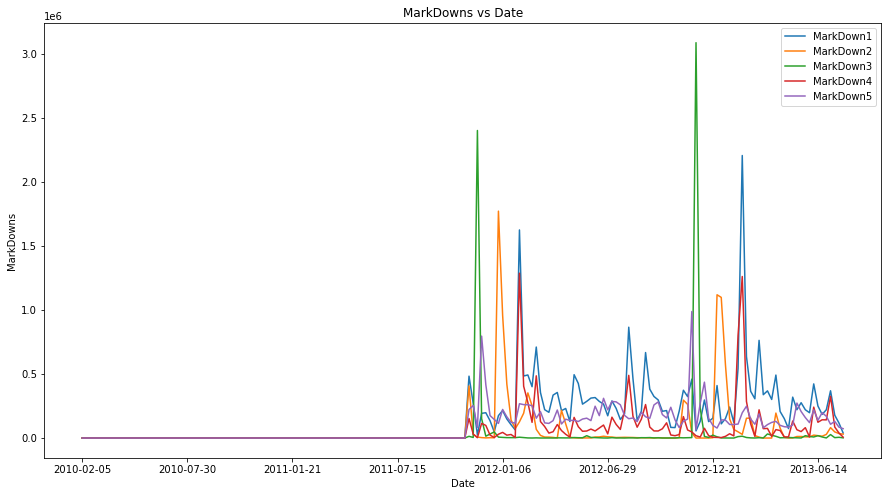

In [78]:
feature_data1 = feature_data.groupby('Date')['MarkDown1'].sum()
feature_data2 = feature_data.groupby('Date')['MarkDown2'].sum()
feature_data3 = feature_data.groupby('Date')['MarkDown3'].sum()
feature_data4 = feature_data.groupby('Date')['MarkDown4'].sum()
feature_data5 = feature_data.groupby('Date')['MarkDown5'].sum()
plt.figure(figsize=(15,8))
feature_data1.plot(label='MarkDown1')
feature_data2.plot(label='MarkDown2')
feature_data3.plot(label='MarkDown3')
feature_data4.plot(label='MarkDown4')
feature_data5.plot(label='MarkDown5')
plt.xlabel('Date')
plt.ylabel('MarkDowns')
plt.title('MarkDowns vs Date')
plt.legend()
plt.show()

#### 1. Markdown

In [61]:
feature_data_temp = feature_data.groupby('Date')['MarkDown1'].sum().reset_index()
feature_data_temp['MarkDown2'] = feature_data.groupby('Date')['MarkDown2'].sum().reset_index()['MarkDown2']
feature_data_temp['MarkDown3'] = feature_data.groupby('Date')['MarkDown3'].sum().reset_index()['MarkDown3']
feature_data_temp['MarkDown4'] = feature_data.groupby('Date')['MarkDown4'].sum().reset_index()['MarkDown4']
feature_data_temp['MarkDown5'] = feature_data.groupby('Date')['MarkDown5'].sum().reset_index()['MarkDown5']
feature_data_temp1 = feature_data_temp[feature_data_temp['MarkDown1']==0][feature_data_temp['Date']<'2012-01-01']
print('Date before markdown1 is null:',feature_data_temp1['Date'].max())
feature_data_temp2 = feature_data_temp[feature_data_temp['MarkDown2']==0][feature_data_temp['Date']<'2012-01-01']
print('Date before markdown2 is null:',feature_data_temp2['Date'].max())
feature_data_temp3 = feature_data_temp[feature_data_temp['MarkDown3']==0][feature_data_temp['Date']<'2012-01-01']
print('Date before markdown3 is null:',feature_data_temp3['Date'].max())
feature_data_temp4 = feature_data_temp[feature_data_temp['MarkDown4']==0][feature_data_temp['Date']<'2012-01-01']
print('Date before markdown4 is null:',feature_data_temp4['Date'].max())
feature_data_temp5 = feature_data_temp[feature_data_temp['MarkDown5']==0][feature_data_temp['Date']<'2012-01-01']
print('Date before markdown5 is null:',feature_data_temp5['Date'].max())

Date before markdown1 is null: 2011-11-04
Date before markdown2 is null: 2011-11-04
Date before markdown3 is null: 2011-11-04
Date before markdown4 is null: 2011-11-04
Date before markdown5 is null: 2011-11-04


##### Observation:
    All markdown values are null before date 04-11-2011.

#### 2. CPI

Text(0.5, 1.0, 'CPI vs Date')

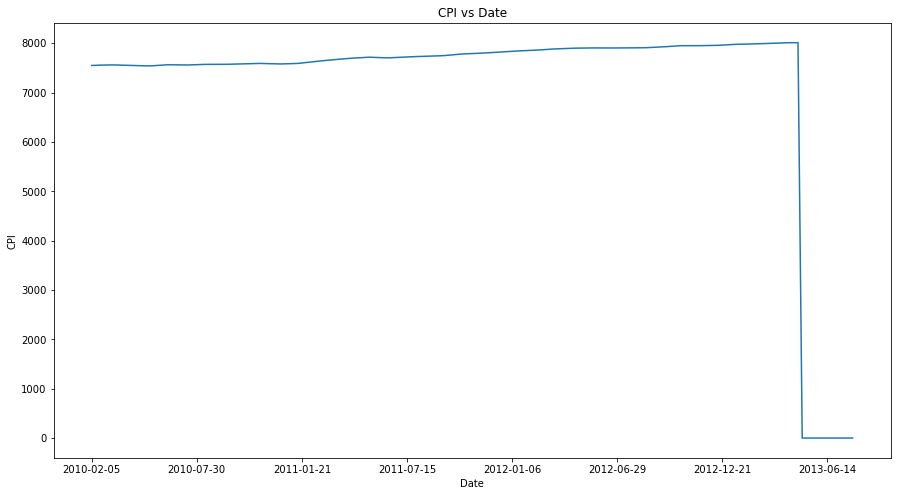

In [63]:
feature_data1 = feature_data.groupby('Date')['CPI'].sum()
plt.figure(figsize=(15,8))
feature_data1.plot()
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI vs Date')

In [66]:
CPI_temp = feature_data.groupby('Date')['CPI'].sum().reset_index()
CPI_temp1 = CPI_temp[CPI_temp['CPI']==0]
print('Date after CPI is null:',CPI_temp1['Date'].min())

Date after CPI is null: 2013-05-03


#### 3. Unemployment

Text(0.5, 1.0, 'Unemployment vs Date')

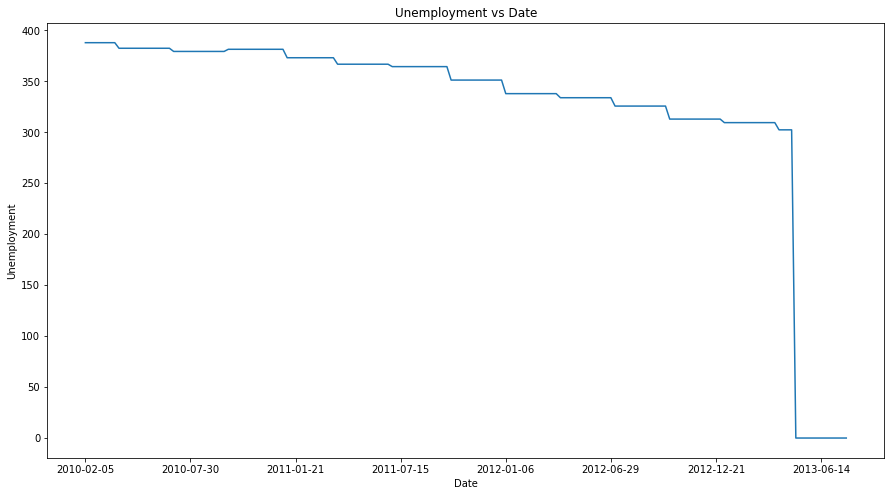

In [64]:
feature_data1 = feature_data.groupby('Date')['Unemployment'].sum()
plt.figure(figsize=(15,8))
feature_data1.plot()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment vs Date')

In [67]:
unemployment_temp = feature_data.groupby('Date')['CPI'].sum().reset_index()
unemployment_temp1 = unemployment_temp[unemployment_temp['CPI']==0]
print('Date after CPI is null:', unemployment_temp1['Date'].min())

Date after CPI is null: 2013-05-03


##### Observation:
    CPI and unemployment both are null after 03-05-2013.
    CPI is showing upward trend and unemployment is showing downward trend.

## EDA on merged data

#### 1. Weekly Sales

In [351]:
df['Weekly_Sales'].describeribe()

count    421570.000000
mean      15981.258123
std       22711.183519
min       -4988.940000
25%        2079.650000
50%        7612.030000
75%       20205.852500
max      693099.360000
Name: Weekly_Sales, dtype: float64

<AxesSubplot:xlabel='Weekly_Sales', ylabel='Density'>

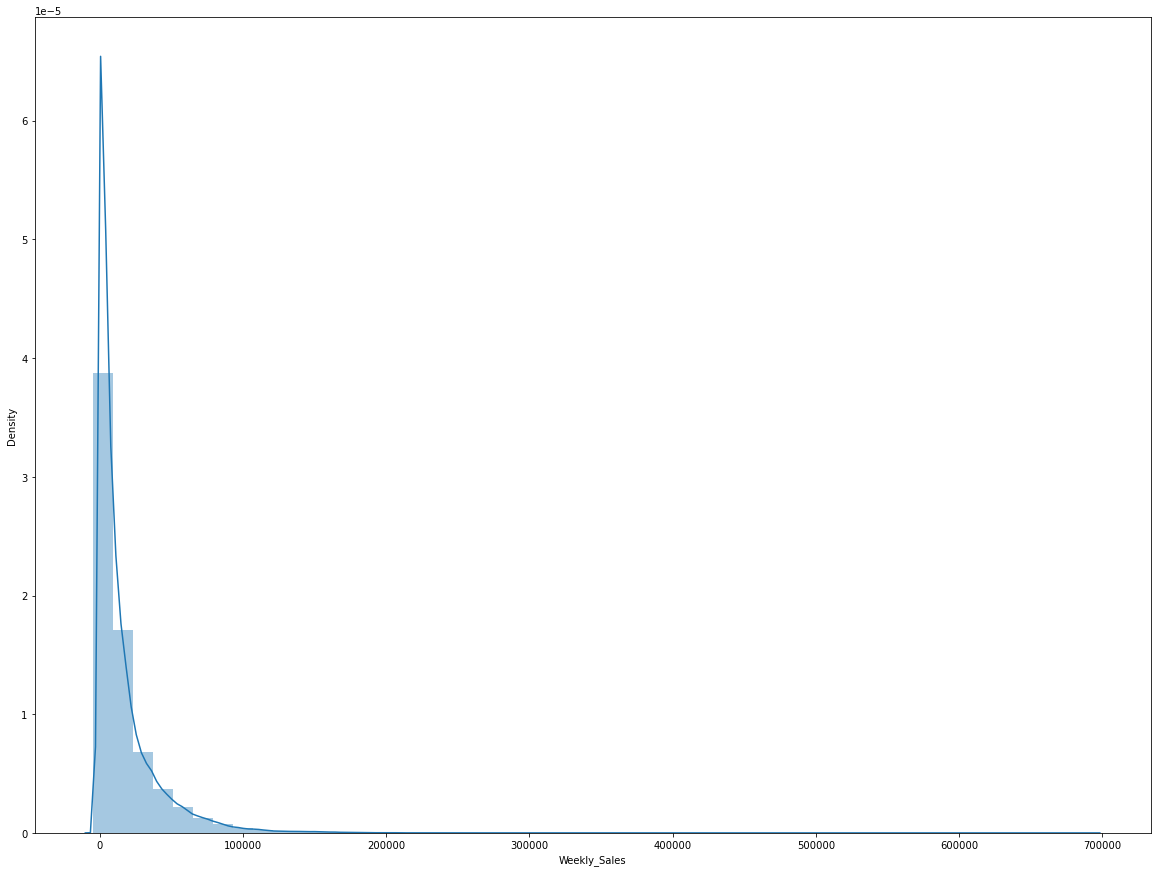

In [350]:
plt.figure(figsize=(20,15))
sns.distplot(df['Weekly_Sales'])

In [347]:
sales_neg = df[df['Weekly_Sales']<0]
print('Number of negative weekly sales datapoints: ',len(sales_neg))
sales_0 = df[df['Weekly_Sales']==0]
print('Number of zero weekly sales datapoints: ',len(sales_0))

Number of negative weekly sales datapoints:  1285
Number of zero weekly sales datapoints:  73


##### Observation:
    Weekly sales distribution is right skewed and there are outliers in the weekly sales column.
    A few weekly sales are negative.
    Many datapoints have smaller weekly sales and a few datapoints have larger weekly sales.

#### 2. Store

Unique Stores are:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45]


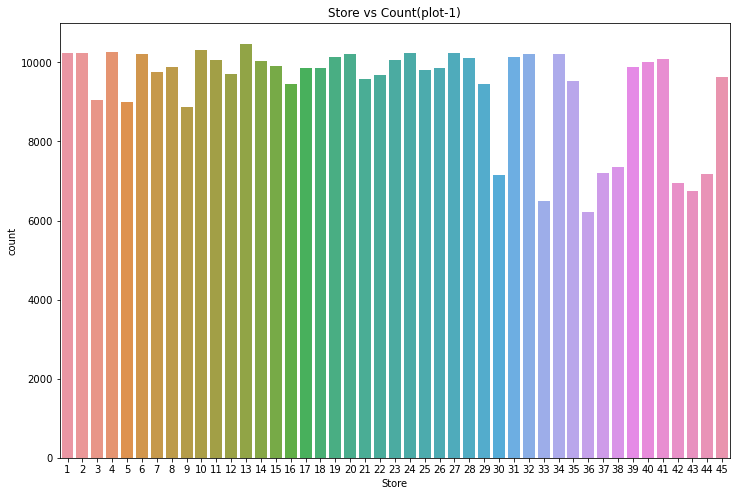

In [494]:
# Count plot of Store 
print('Unique Stores are: ', np.unique(df['Store']))
plt.figure(figsize=(12,8))
sns.countplot(df['Store'])
plt.title('Store vs Count(plot-1)')
plt.show()

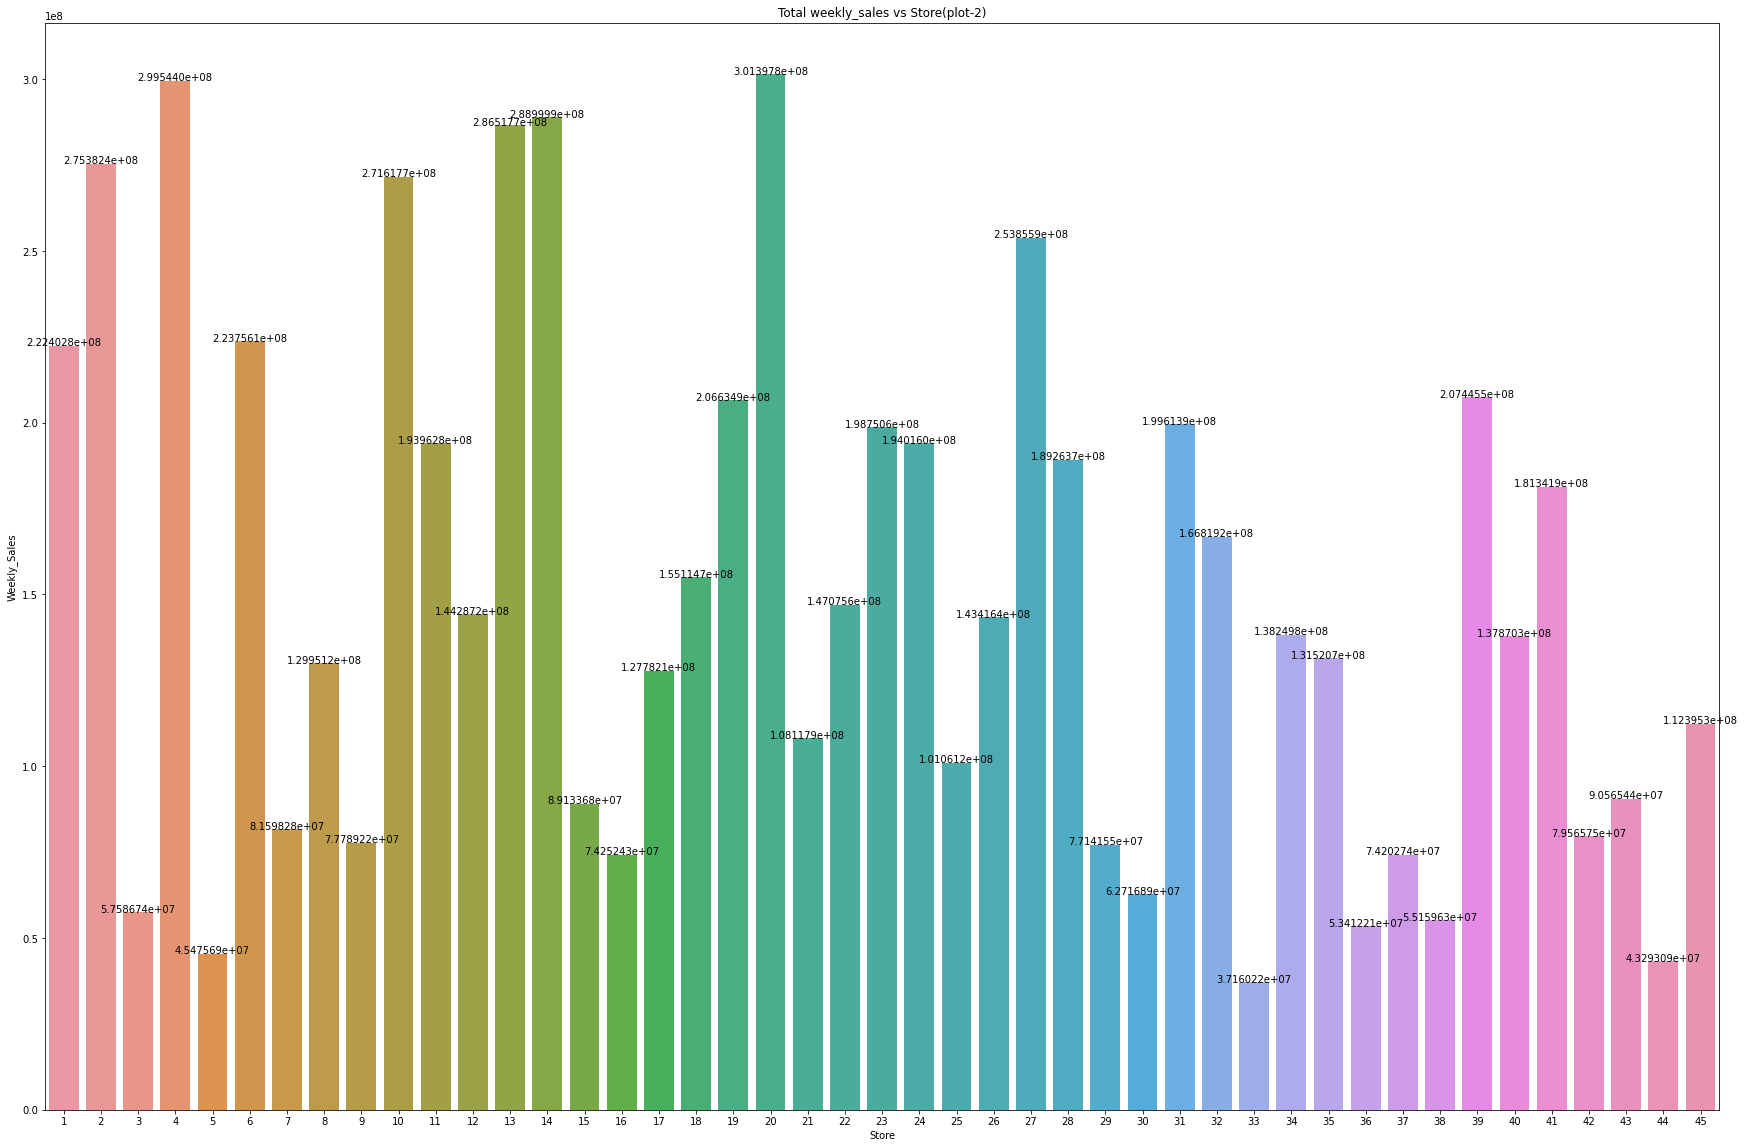

In [495]:
# Grouping each store and plotting sum of weekly sales.
df1 = df.groupby('Store')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))

ax = sns.barplot(x=df1['Store'], y=df1['Weekly_Sales'])
# https://www.codegrepper.com/code-examples/whatever/display+values+on+top+of+seaborn+bar+plot#:~:text=%E2%80%9Cdisplay%20values%20on%20top%20of%20seaborn%20bar%20plot%E2%80%9D%20Code%20Answer
for index, row in df1.iterrows():
    ax.text(row.name, row.Weekly_Sales, "{:e}".format(row.Weekly_Sales), ha="center")
plt.xlabel('Store')
plt.ylabel('Weekly_Sales')
plt.title('Total weekly_sales vs Store(plot-2)')
plt.show()

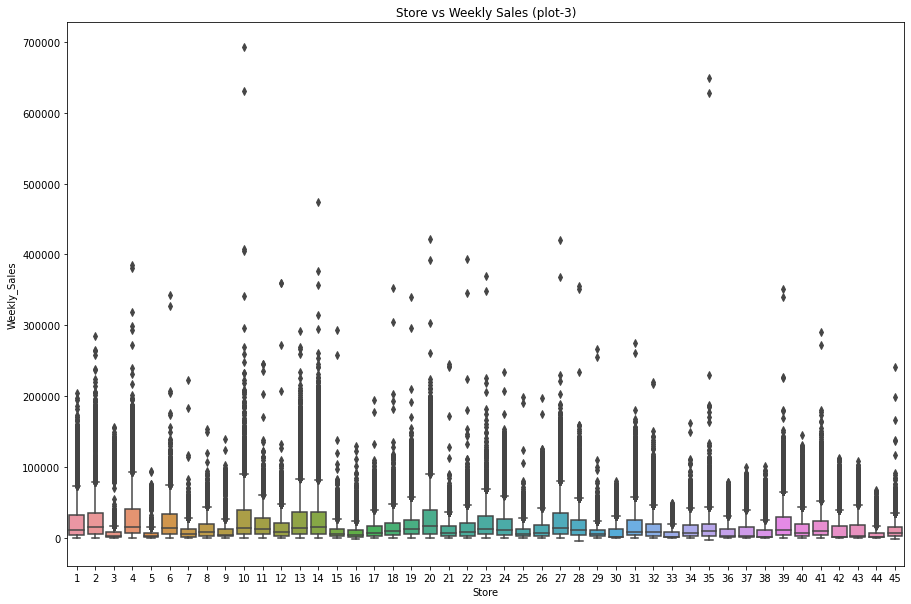

In [496]:
# Box plot of weekly sales over stores
plt.figure(figsize=(15,10))
sns.boxplot(x=df['Store'], y=df['Weekly_Sales'])
plt.title('Store vs Weekly Sales (plot-3)')
plt.show()

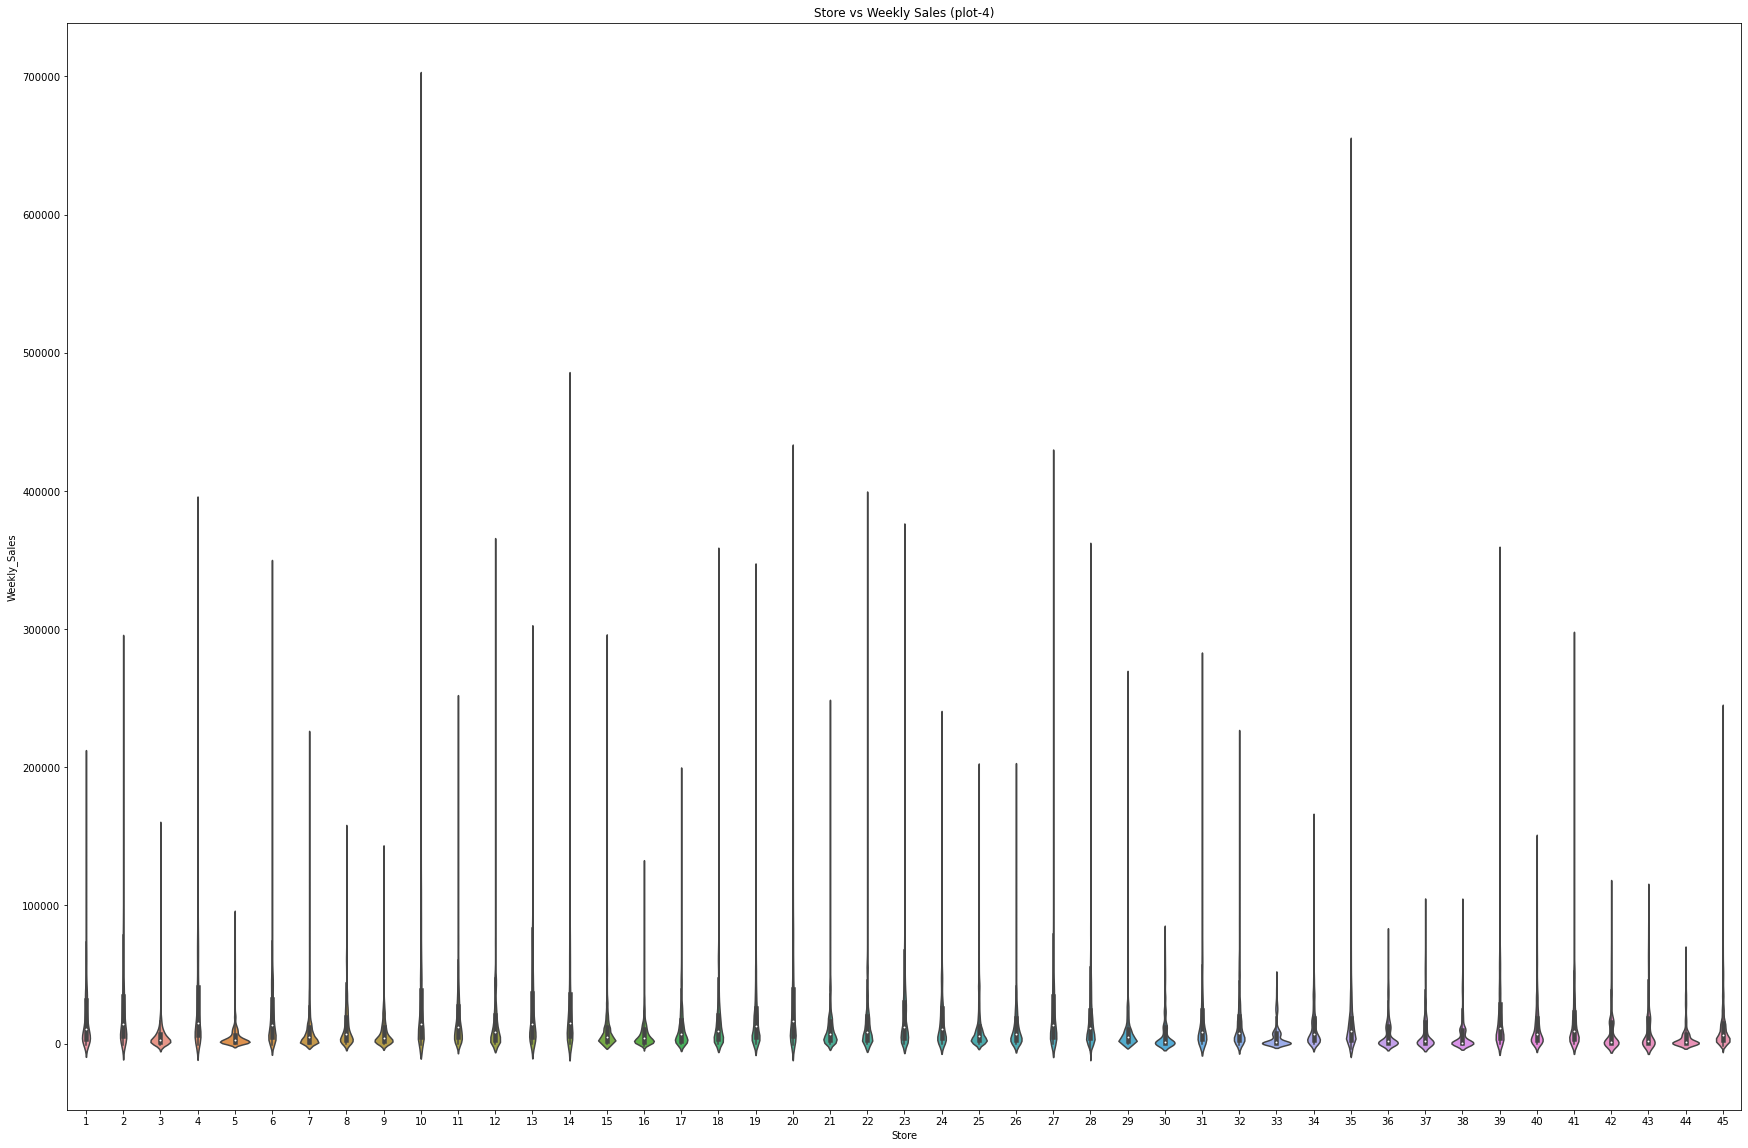

In [497]:
# Violin plot of weekly sales over stores.
plt.figure(figsize=(30,20))
sns.violinplot(x=df['Store'], y=df['Weekly_Sales'])
plt.title('Store vs Weekly Sales (plot-4)')
plt.show()

##### Observation:
    1.From plot-1, Store feature is almost balanced.
    2.From plot-2, A few Stores have many datapoints but have low total weekly sales like 3, 5, 9, 16 etc.
    3.From plot-2, Few Store like 33 have more datapoints than 36 but have less total weekly sales than 36.
    4.From plot-3, Median of Weekly sales for each store is different. We can say it's an important feature.
    5.From plot-4, There is skewness in weekly sales for all the stores.
    6.From plot-3/4, Many outliers in weekly sales for store 10 and store 35.

#### 3. Dept

Unique Dept are:  [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 22 23 24 25
 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49
 50 51 52 54 55 56 58 59 60 65 67 71 72 74 77 78 79 80 81 82 83 85 87 90
 91 92 93 94 95 96 97 98 99]


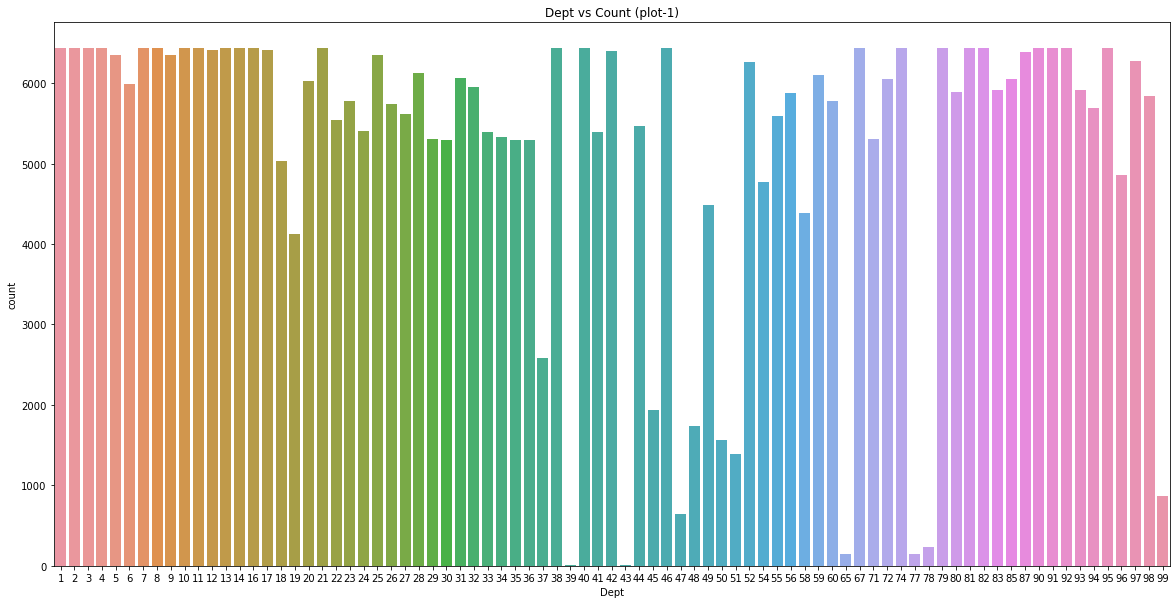

In [498]:
# Count plot of Dept 
print('Unique Dept are: ',np.unique(df['Dept']))
plt.figure(figsize=(20,10))
sns.countplot(df['Dept'])
plt.title('Dept vs Count (plot-1)')
plt.show()

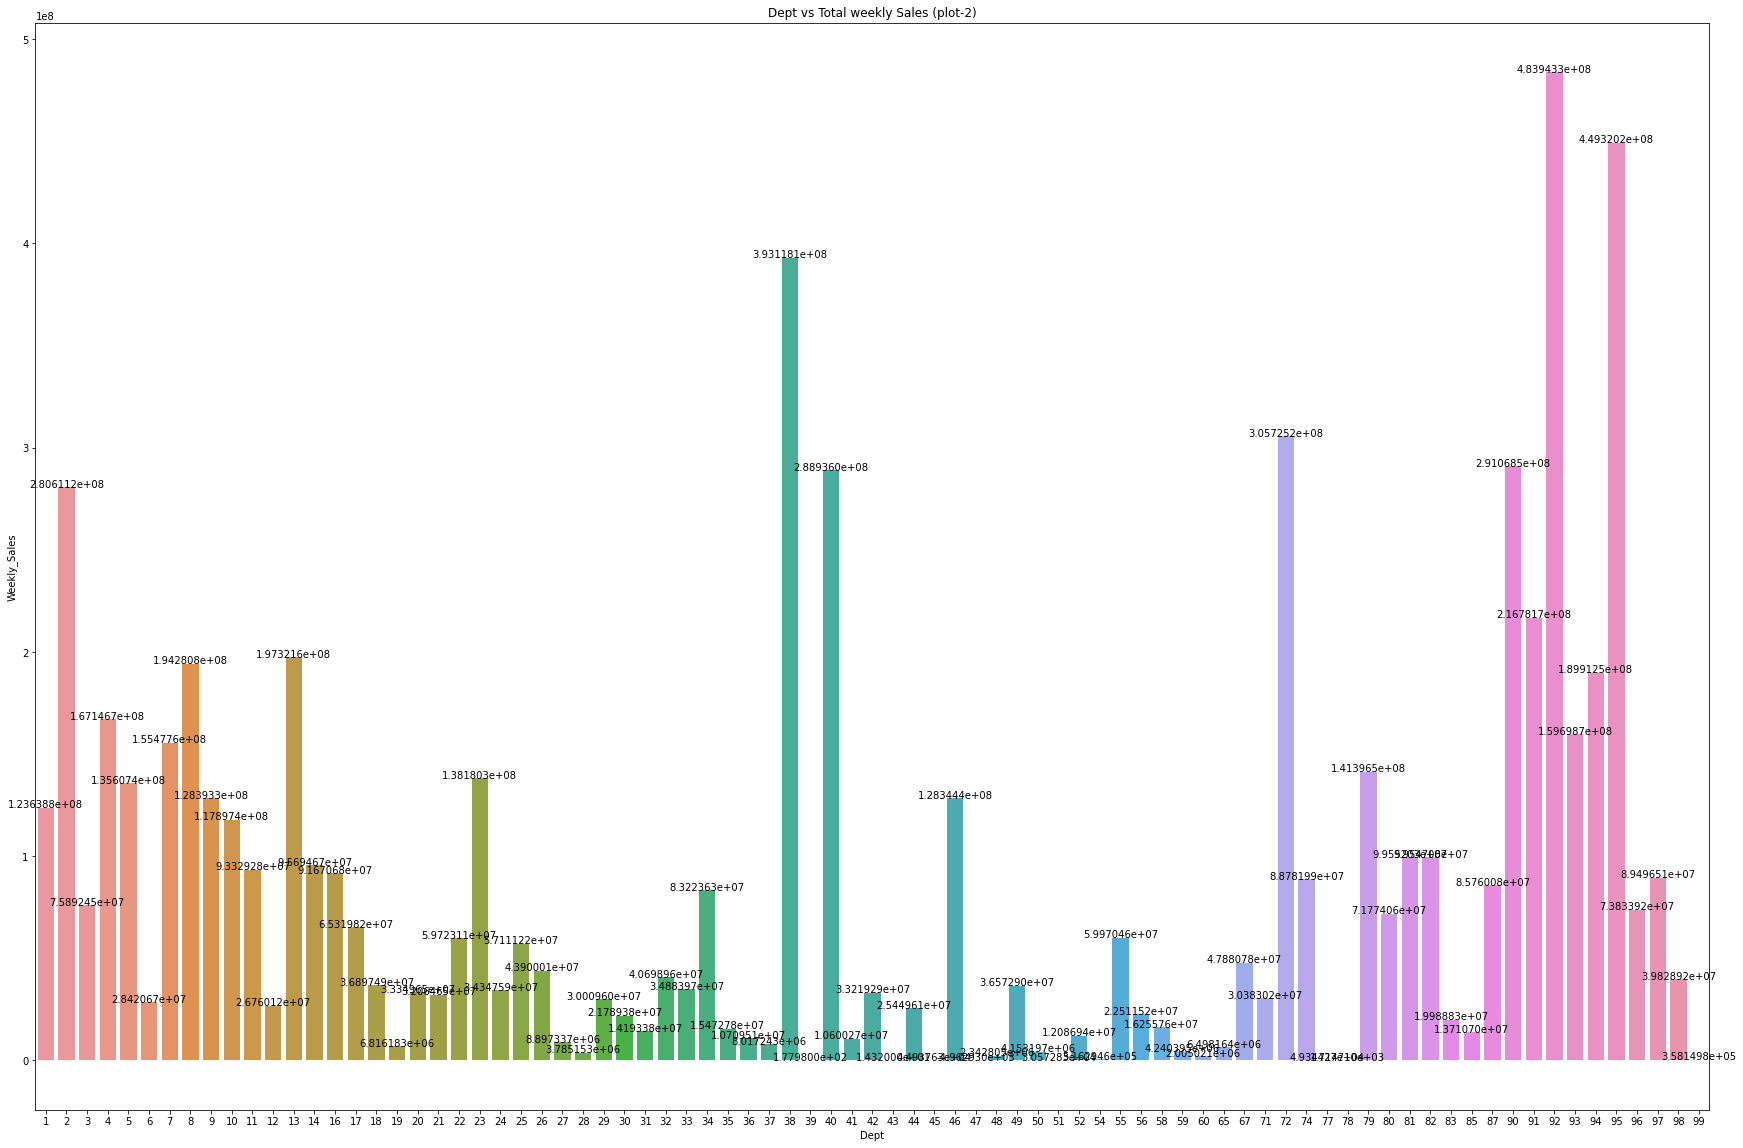

In [499]:
# Grouping each store and plotting sum of weekly sales.
df1 = df.groupby('Dept')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))

ax = sns.barplot(x=df1['Dept'], y=df1['Weekly_Sales'])
# https://www.codegrepper.com/code-examples/whatever/display+values+on+top+of+seaborn+bar+plot#:~:text=%E2%80%9Cdisplay%20values%20on%20top%20of%20seaborn%20bar%20plot%E2%80%9D%20Code%20Answer
for index, row in df1.iterrows():
    ax.text(row.name, row.Weekly_Sales, "{:e}".format(row.Weekly_Sales), ha="center")
plt.xlabel('Dept')
plt.ylabel('Weekly_Sales')
plt.title('Dept vs Total weekly Sales (plot-2)')
plt.show()

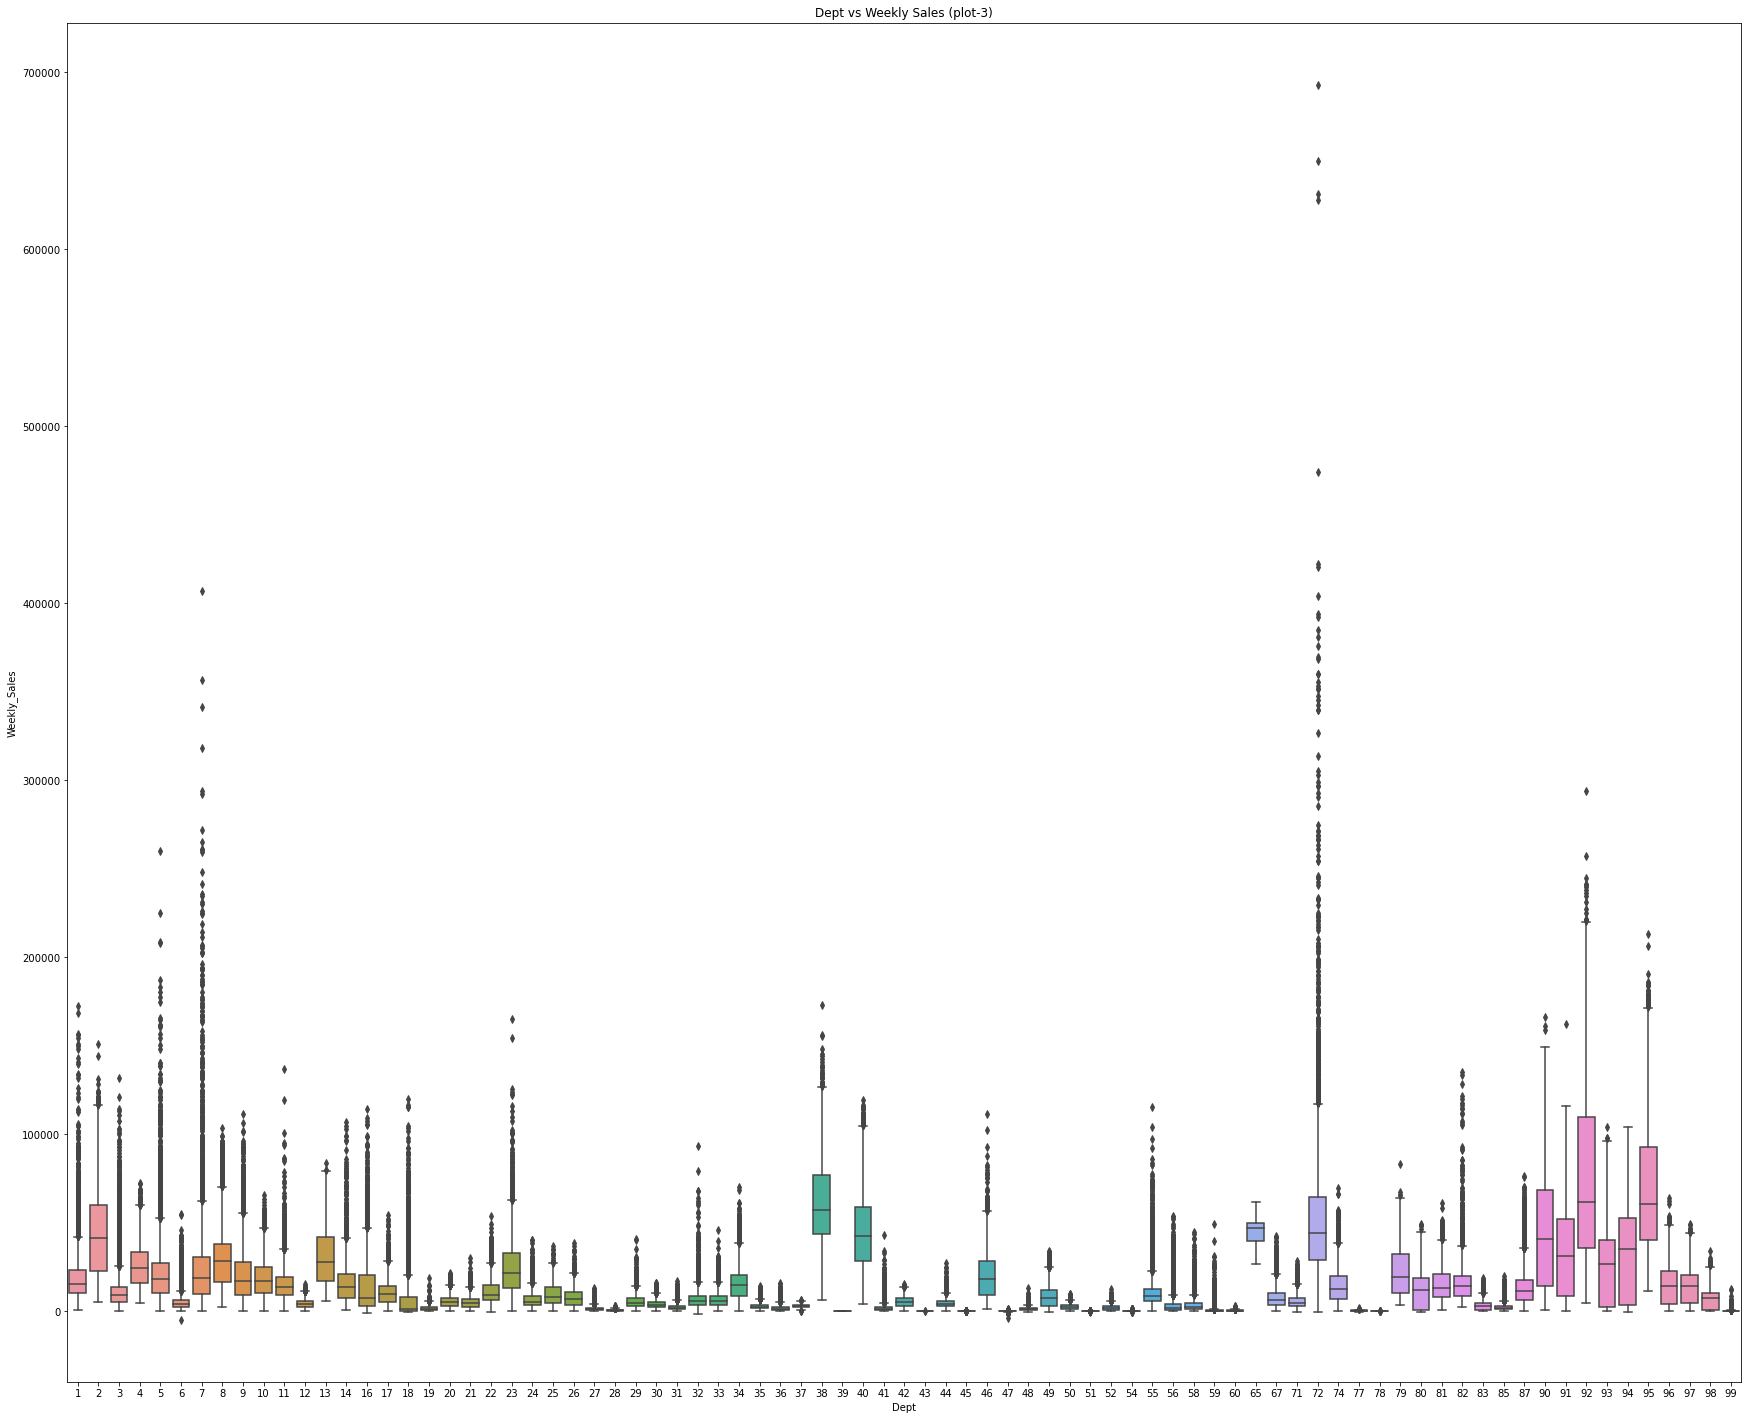

In [500]:
# Box plot of weekly sales over dept
plt.figure(figsize=(30,25))
sns.boxplot(x=df['Dept'], y=df['Weekly_Sales'])
plt.title('Dept vs Weekly Sales (plot-3)')
plt.show()

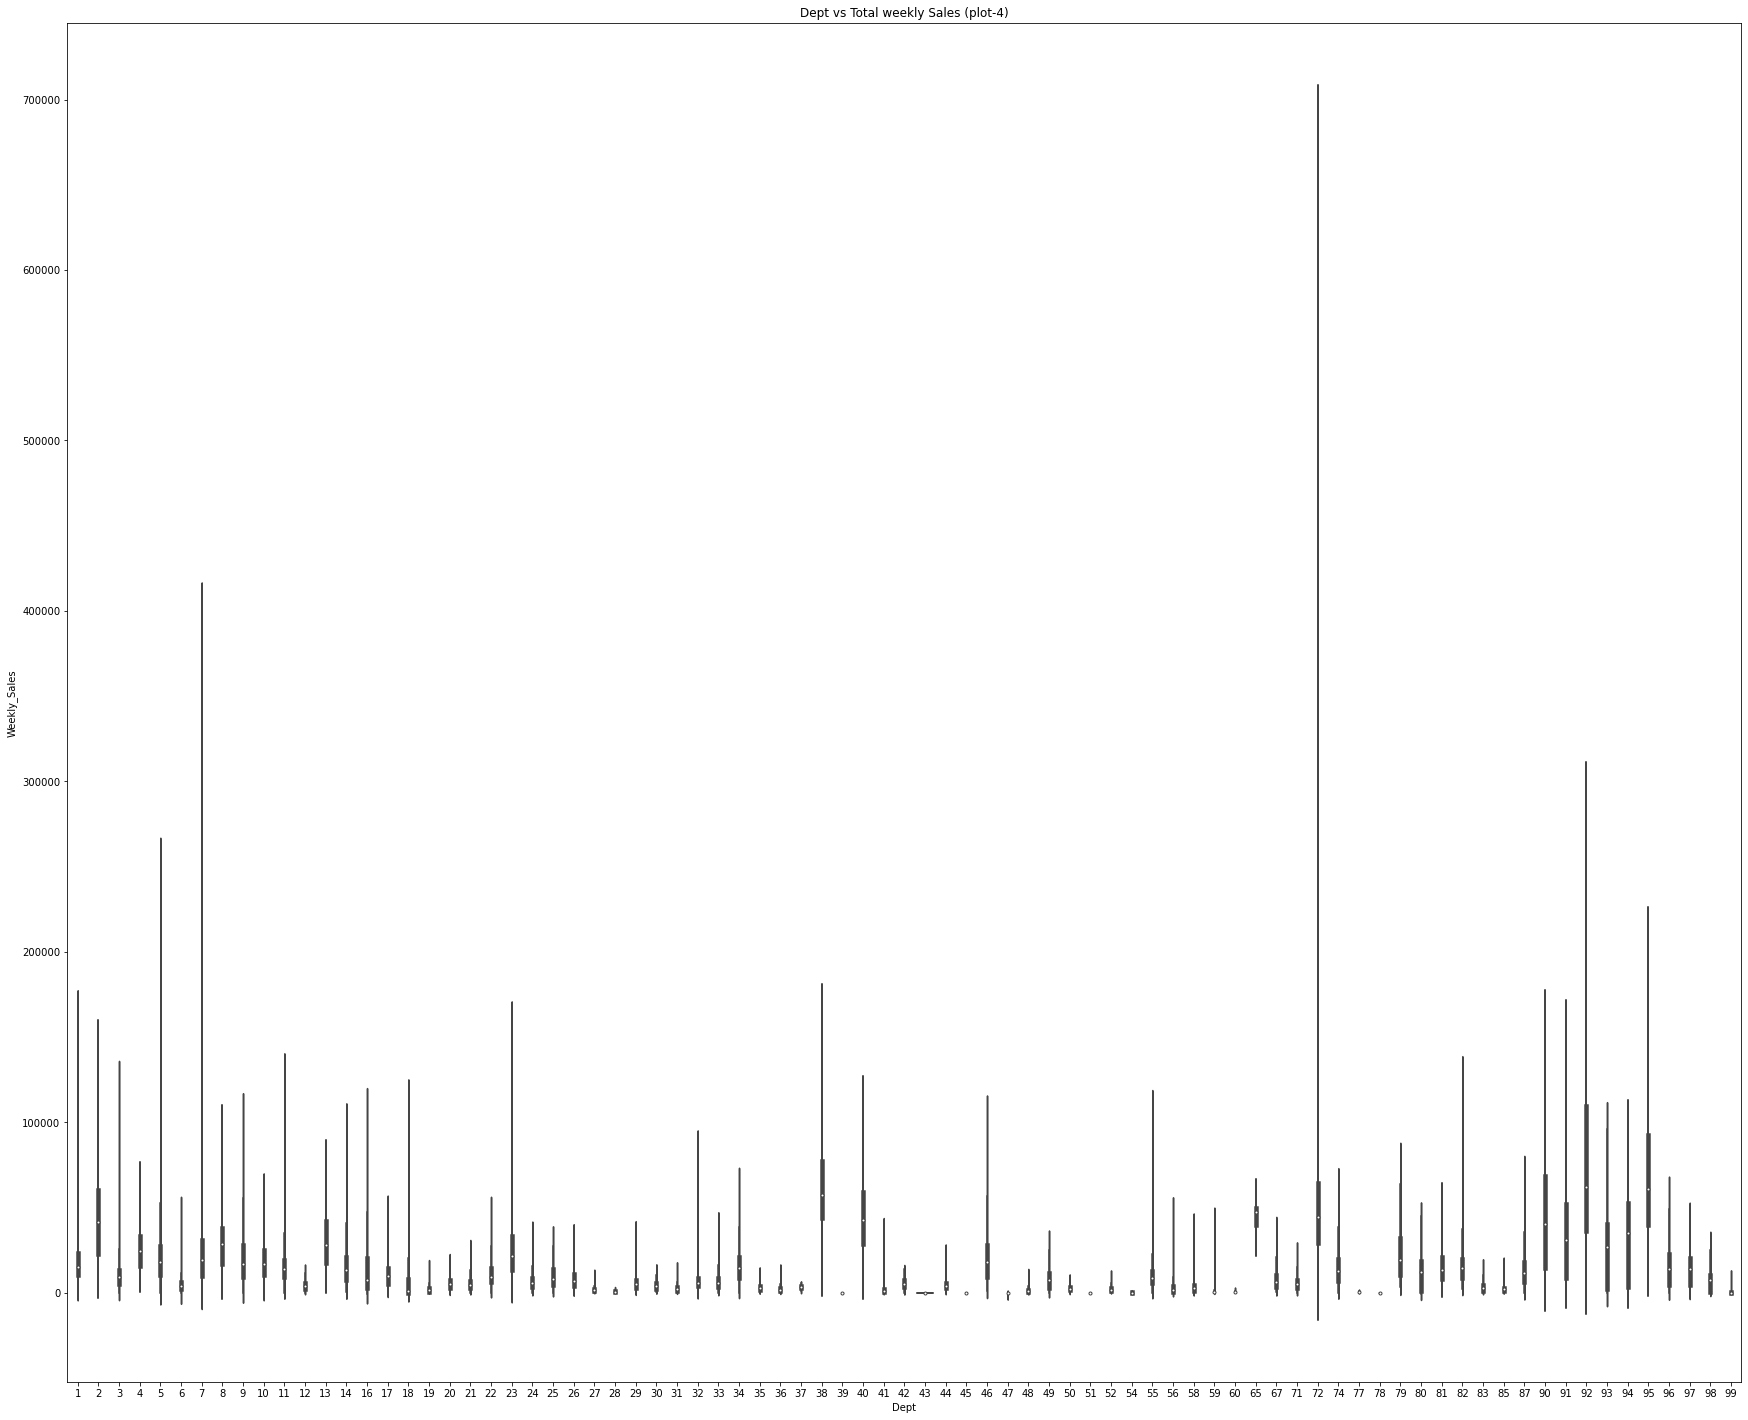

In [501]:
# Violin plot of weekly sales over dept.
plt.figure(figsize=(30,25))
sns.violinplot(x=df['Dept'], y=df['Weekly_Sales'])
plt.title('Dept vs Total weekly Sales (plot-4)')
plt.show()

##### Observation:
    1.From plot-1&2, Dept 39, 43, 47, 65, 77, 78 and 99 have a few deta points hence low total weekly sales.
    2.From plot-1&2, many depts have many datapoints and have low total weekly sales like 6, 12, 28, 60 etc.
    3.From plot-1&2, a few depts like 65 has less number of datapoints but has more total weekly sales compared to 
    it's datapoints. It have more weekly sales than dept 60 which more datapoints than dept 65.
    4.From plot-3, Median of Weekly sales for each dept is different. We can say it's an important feature.
    5.From plot-4, There is a skewness in weekly sales for all the Dept.
    6.From plot-3&4, Large no of outliers in weekly sales for Dept 10.

#### 4. Date

Total number weeks in train data:  143
First date in train data:  2010-02-05
Last date in train data:  2012-10-26


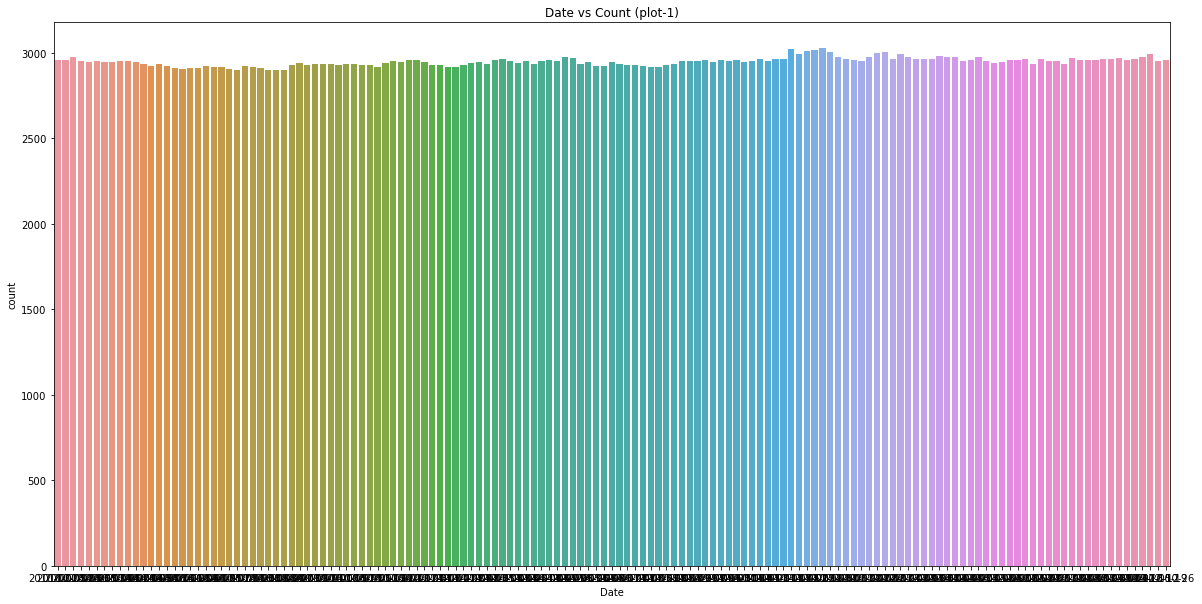

In [502]:
# Count plot of dates.
print('Total number weeks in train data: ',len(np.unique(df['Date'])))
print('First date in train data: ',df['Date'].min())
print('Last date in train data: ', df['Date'].max())
plt.figure(figsize=(20,10))
sns.countplot(df['Date'])
plt.title('Date vs Count (plot-1)')
plt.show()

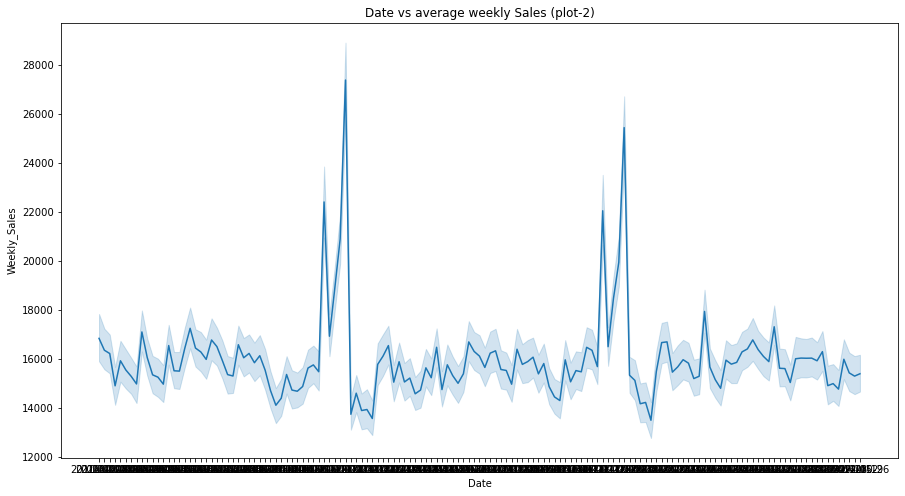

In [511]:
plt.figure(figsize=(15,8))
sns.lineplot(df['Date'], df['Weekly_Sales'])
plt.title('Date vs average weekly Sales (plot-2)')
plt.show()

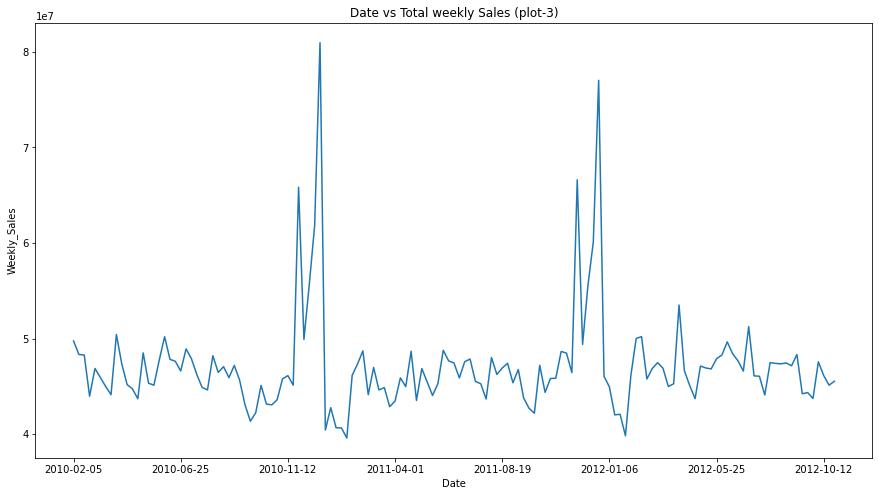

In [505]:
# Grouping dates and plotting sun of weekly sales
df1 = df.groupby('Date')['Weekly_Sales'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Weekly_Sales')
plt.title('Date vs Total weekly Sales (plot-3)')
plt.show()

##### Observation:
    1. From plot-1, almost equal number of datapoints in each date.
    2. From plot-2, There is a sudden huge hike in sales at the end of november month and at the end of december month 
    sales drop drastically.
    3. From plot-2&3, There is a seasonal trend/pattern observed in the plot of weekly sales over dates.
    4. It is an important feature.

#### 4. IsHoliday

Unique IsHoliday are:  [False  True]
Value counts of IsHoliday:
   index  IsHoliday
0  False     391909
1   True      29661


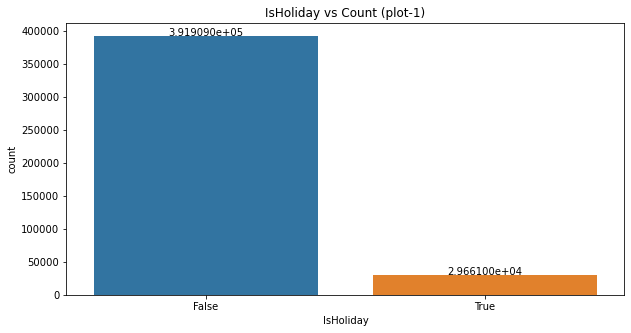

In [512]:
# Count plot of IsHoliday
print('Unique IsHoliday are: ',np.unique(df['IsHoliday']))
print('Value counts of IsHoliday:')
x = df['IsHoliday'].value_counts().reset_index()
print(x)
plt.figure(figsize=(10,5))
ax = sns.countplot(df['IsHoliday'])
for index, row in x.iterrows():
    ax.text(row.name, row.IsHoliday, "{:e}".format(row.IsHoliday), ha="center")

plt.title('IsHoliday vs Count (plot-1)')
plt.show()

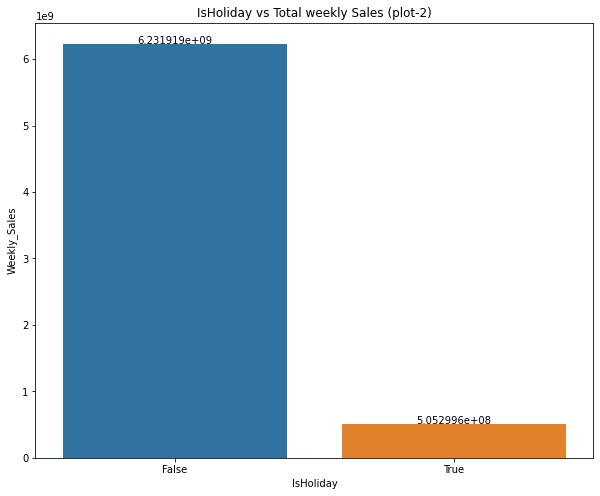

In [513]:
# Grouping holiday and non-holiday weeks separately. Plotting total weekly sales
df1 = df.groupby('IsHoliday')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(10,8))
ax = sns.barplot(x=df1['IsHoliday'], y=df1['Weekly_Sales'])
# https://www.codegrepper.com/code-examples/whatever/display+values+on+top+of+seaborn+bar+plot#:~:text=%E2%80%9Cdisplay%20values%20on%20top%20of%20seaborn%20bar%20plot%E2%80%9D%20Code%20Answer
for index, row in df1.iterrows():
    ax.text(row.name, row.Weekly_Sales, "{:e}".format(row.Weekly_Sales), ha="center")
plt.xlabel('IsHoliday')
plt.ylabel('Weekly_Sales')
plt.title('IsHoliday vs Total weekly Sales (plot-2)')
plt.show()

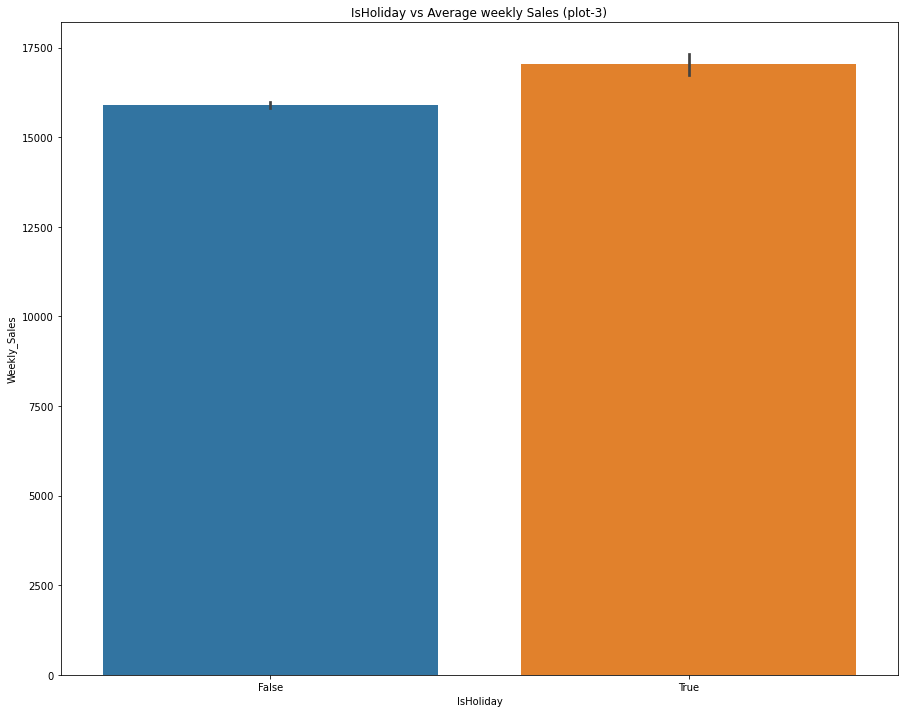

In [519]:
# Bar plot of weekly sales over IsHoliday
plt.figure(figsize=(15,12))
sns.barplot(x=df['IsHoliday'], y=df['Weekly_Sales'])
plt.title('IsHoliday vs Average weekly Sales (plot-3)')
plt.show()

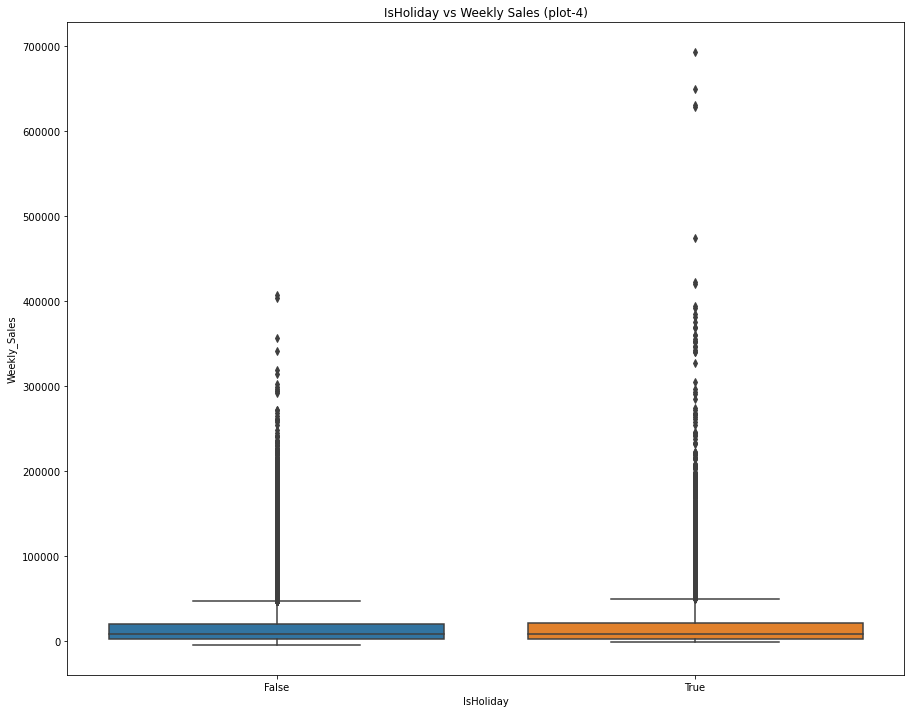

In [517]:
# Box plot of weekly sales over IsHoliday
plt.figure(figsize=(15,12))
sns.boxplot(x=df['IsHoliday'], y=df['Weekly_Sales'])
plt.title('IsHoliday vs Weekly Sales (plot-4)')
plt.show()

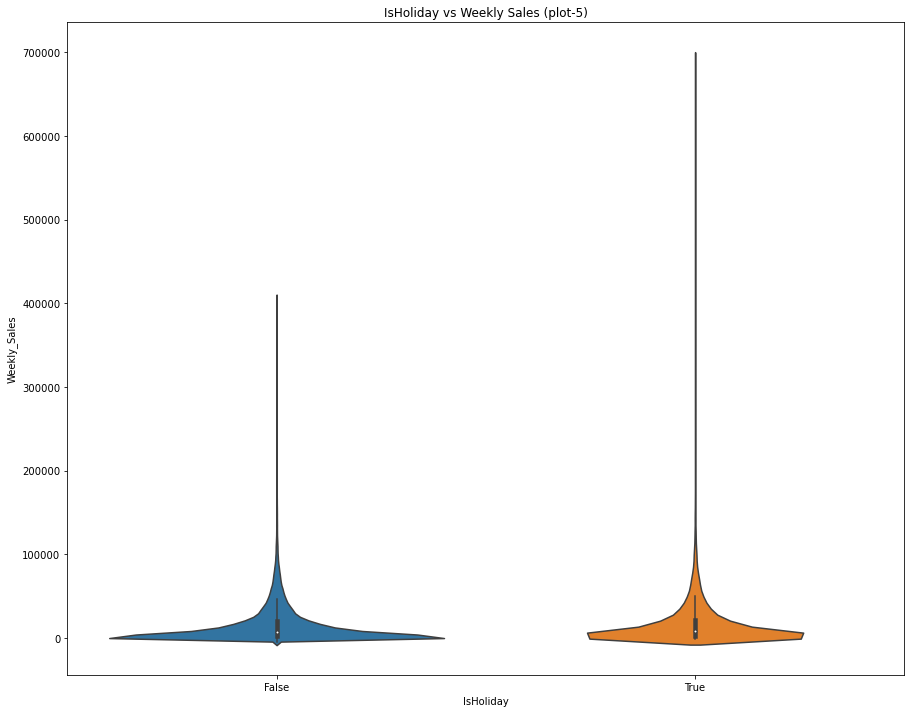

In [518]:
# Violin plot over IsHoliday
plt.figure(figsize=(15,12))
sns.violinplot(x=df['IsHoliday'], y=df['Weekly_Sales'])
plt.title('IsHoliday vs Weekly Sales (plot-5)')
plt.show()

##### Observation:
    1.From plot-1, Number of holiday weeks is very less compared to number of non-holiday weeks.
    2.From plot-4, When holiday weeks, median of weekly sales are more than non-holiday weeks.
    3.From plot-1&2, Number of non-holiday weeks is around 13 times of holiday weeks but weekly sales of non-holiday 
    weeks is 12 times of total weekly sales of holiday weeks. 
    4.From plot-2, Non-holiday weeks have total weekly sales more than holiday weeks.
    5.From plot-3, Non-holiday weeks have average weekly sales less than holiday weeks.
    6.From plot-4&5, More number of outliers in weekly sales when holiday weeks.
    7.We can say holiday weeks are making impact on weekly sales. It is an important feature.

#### 5. Temperature

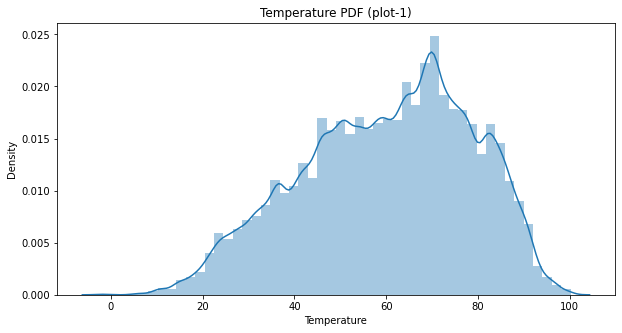

In [520]:
plt.figure(figsize=(10,5))
sns.distplot(df['Temperature'])
plt.title('Temperature PDF (plot-1)')
plt.show()

In [244]:
print('Maximun temperature: ', df['Temperature'].max())
print('Minimun temperature: ', df['Temperature'].min())

Maximun temperature:  100.14
Minimun temperature:  -2.06


In [245]:
# Temperature categorizing
def temp(x):
    if x<0:
        return 0
    elif x>0 and x<10:
        return 10
    elif x>10 and x<20:
        return 20
    elif x>20 and x<30:
        return 30
    elif x>30 and x<40:
        return 40
    elif x>40 and x<50:
        return 50
    elif x>50 and x<60:
        return 60
    elif x>60 and x<70:
        return 70
    elif x>70 and x<80:
        return 80
    elif x>80 and x<90:
        return 90
    elif x>90 and x<100:
        return 100
    else:
        return 110


list_of_temp = df['Temperature']
new_list = list_of_temp.map(temp)
df['temp_cat'] = new_list

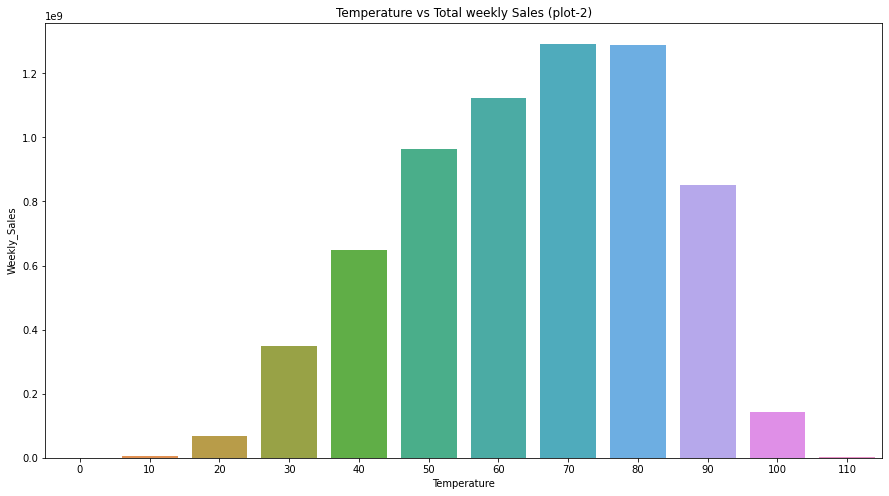

In [521]:
# Grouping temperature categories and plotting total weekly sales.
df1 = df.groupby('temp_cat')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=df1['temp_cat'], y=df1['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly_Sales')
plt.title('Temperature vs Total weekly Sales (plot-2)')
plt.show()

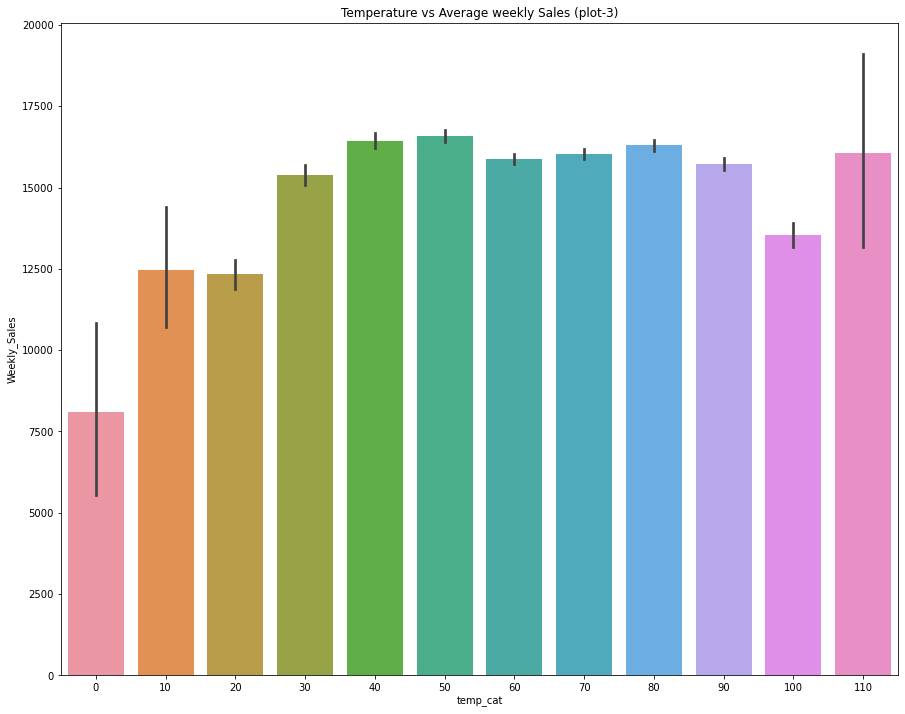

In [523]:
# Bar plot of weekly sales over temperature categories
plt.figure(figsize=(15,12))
sns.barplot(x=df['temp_cat'], y=df['Weekly_Sales'])
plt.title('Temperature vs Average weekly Sales (plot-3)')
plt.show()

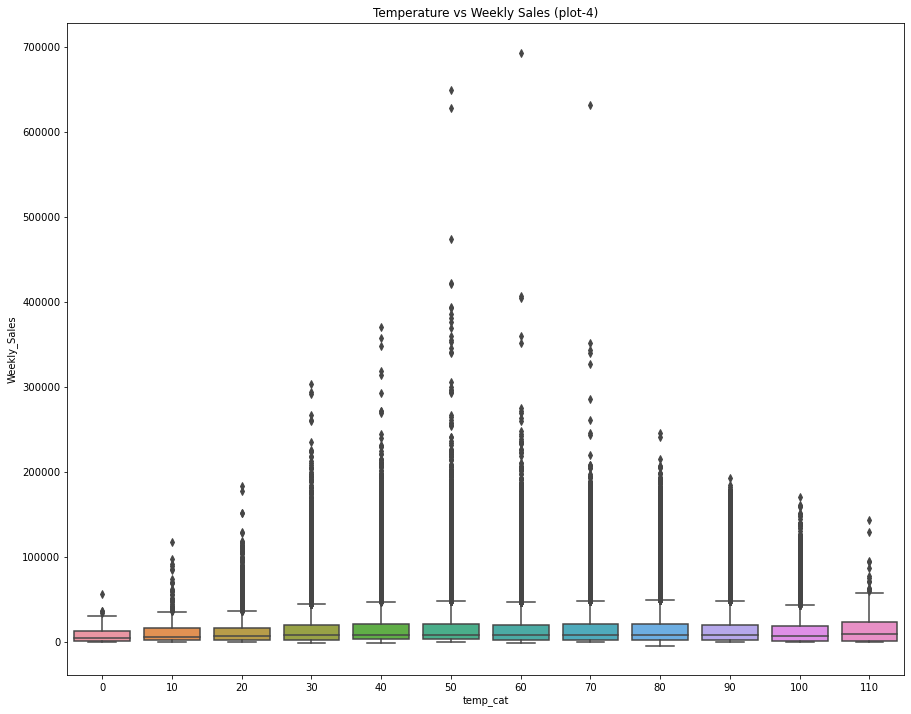

In [525]:
# Bar plot of weekly sales over IsHoliday
plt.figure(figsize=(15,12))
sns.boxplot(x=df['temp_cat'], y=df['Weekly_Sales'])
plt.title('Temperature vs Weekly Sales (plot-4)')
plt.show()

##### Observation:
    Temperature is mostly between 50 to 80 in the dataset therefore most weekly sales are in between temperature 50 to 80.
    We can see high weekly sales when temperature is moderate.

#### 6. Fuel Price

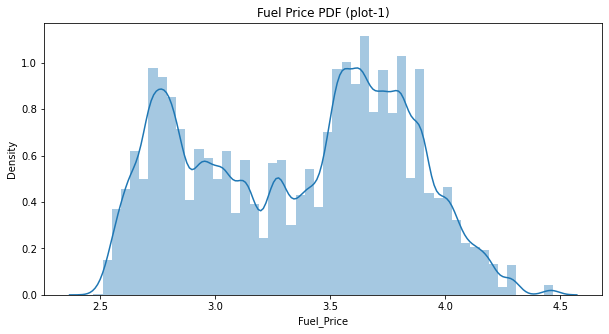

In [526]:
plt.figure(figsize=(10,5))
sns.distplot(df['Fuel_Price'])
plt.title('Fuel Price PDF (plot-1)')
plt.show()

In [247]:
print('Maximun Fuel_Price: ', df['Fuel_Price'].max())
print('Minimun Fuel_Price: ', df['Fuel_Price'].min())

Maximun Fuel_Price:  4.468
Minimun Fuel_Price:  2.472


In [252]:
# Fuel Price categorizing
def fuel(x):
    if x>2 and x<2.25:
        return 2
    elif x>2.25 and x<2.5:
        return 2.25
    elif x>2.5 and x<2.75:
        return 2.5
    elif x>2.75 and x<3:
        return 2.75
    elif x>3 and x<3.25:
        return 3
    elif x>3.25 and x<3.5:
        return 3.25
    elif x>3.5 and x<3.75:
        return 3.5
    elif x>3.75 and x<4:
        return 3.75
    elif x>4 and x<4.25:
        return 4
    else:
        return 4.25


list_of_fuel = df['Fuel_Price']
new_list = list_of_fuel.map(fuel)
df['Fuel_Price_Cat'] = new_list

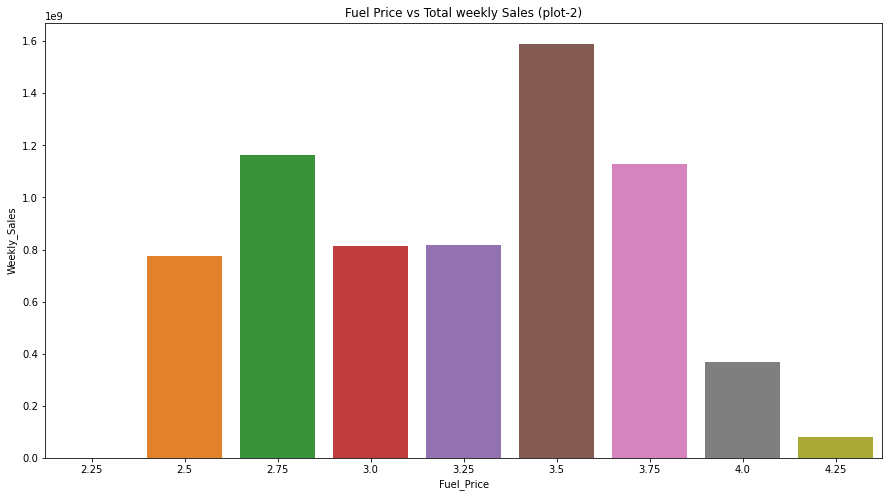

In [527]:
# Grouping fuel price and plotting total weekly sales.
df1 = df.groupby('Fuel_Price_Cat')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=df1['Fuel_Price_Cat'], y=df1['Weekly_Sales'])
plt.xlabel('Fuel_Price')
plt.ylabel('Weekly_Sales')
plt.title('Fuel Price vs Total weekly Sales (plot-2)')
plt.show()

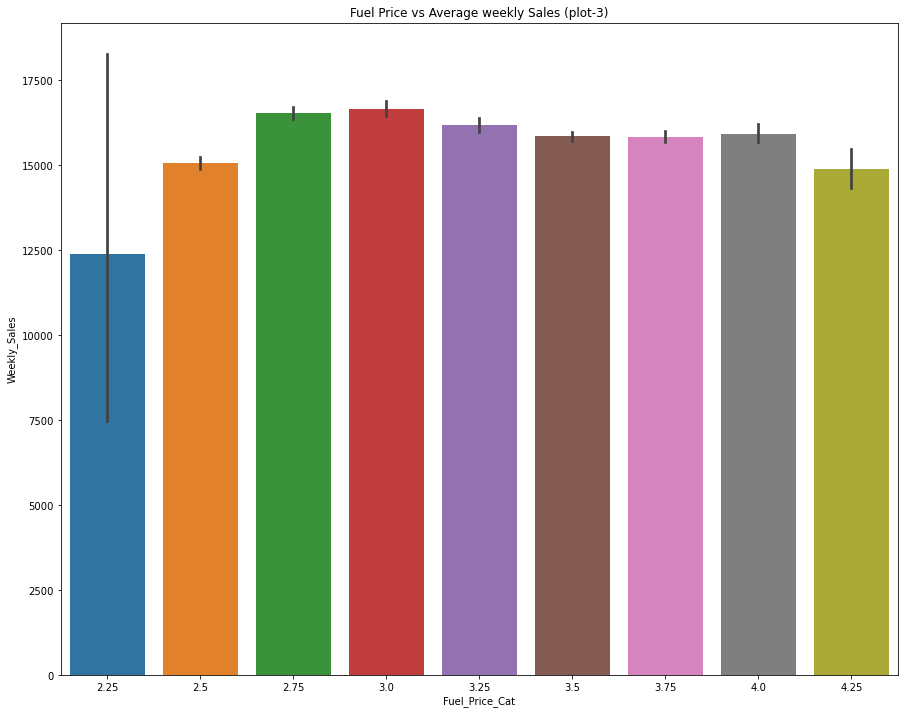

In [529]:
# Bar plot of weekly sales over temperature categories
plt.figure(figsize=(15,12))
sns.barplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'])
plt.title('Fuel Price vs Average weekly Sales (plot-3)')
plt.show()

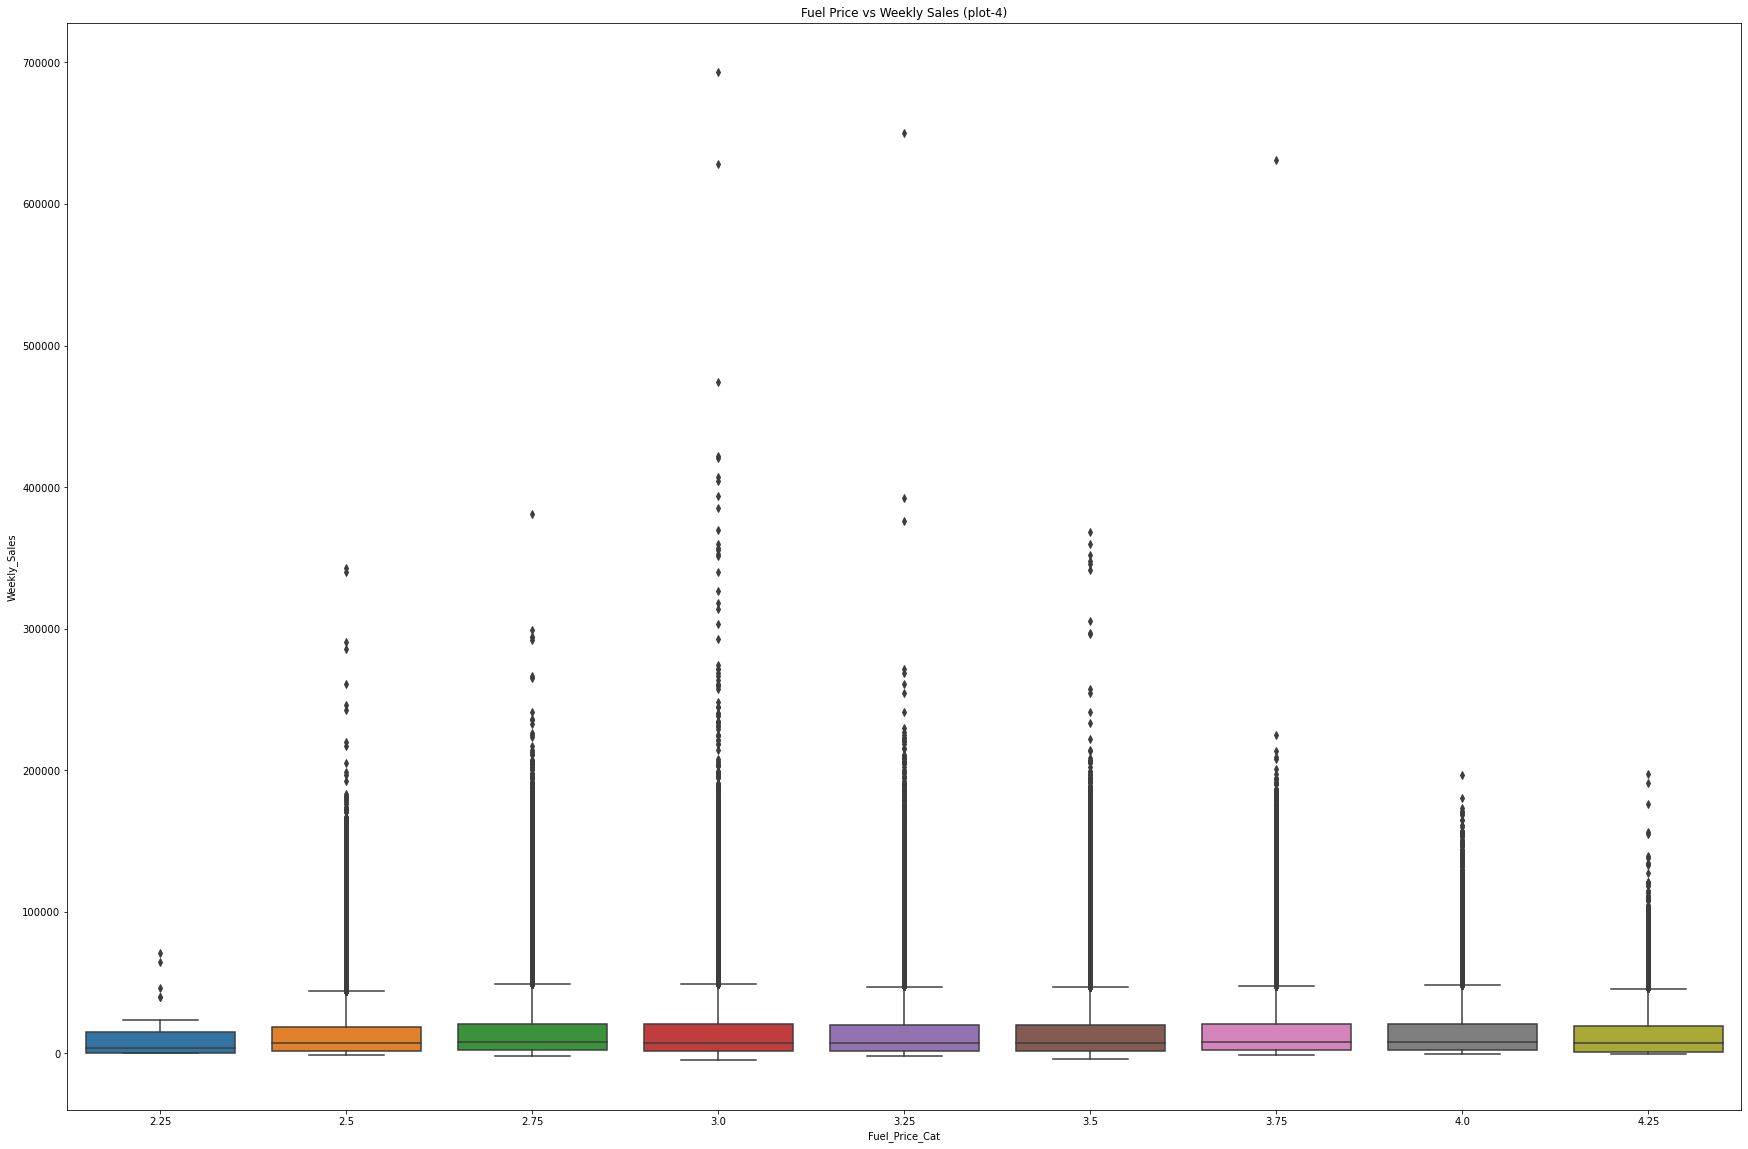

In [530]:
# Bar plot of weekly sales over temperature categories
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'])
plt.title('Fuel Price vs Weekly Sales (plot-4)')
plt.show()

##### Observation:
    1.From group + barplot, Fuel price is mostly between 2.75 to 3 and 3.5 to 3.75 in the dataset therefore most 
    weekly sales are in between fuel price 2.75 to 3 and 3.5 to 3.75.
    2. From barplot, total weekly sales are high when fuel price is between 3.5 to 3.75 but average weekly sales are 
    high when fuel price is between 2.5 to 3.

###### 7. Markdowns:

In [548]:
df.isnull().sum()

Store                  0
Dept                   0
Date                   0
Weekly_Sales           0
IsHoliday              0
Temperature            0
Fuel_Price             0
MarkDown1         270889
MarkDown2         310322
MarkDown3         284479
MarkDown4         286603
MarkDown5         270138
CPI                    0
Unemployment           0
Type                   0
Size                   0
temp_cat               0
Fuel_Price_Cat         0
Markdown1_Cat     270889
Markdown2_Cat     311840
Markdown3_Cat     284803
Markdown4_Cat     286603
Markdown5_Cat     270138
dtype: int64

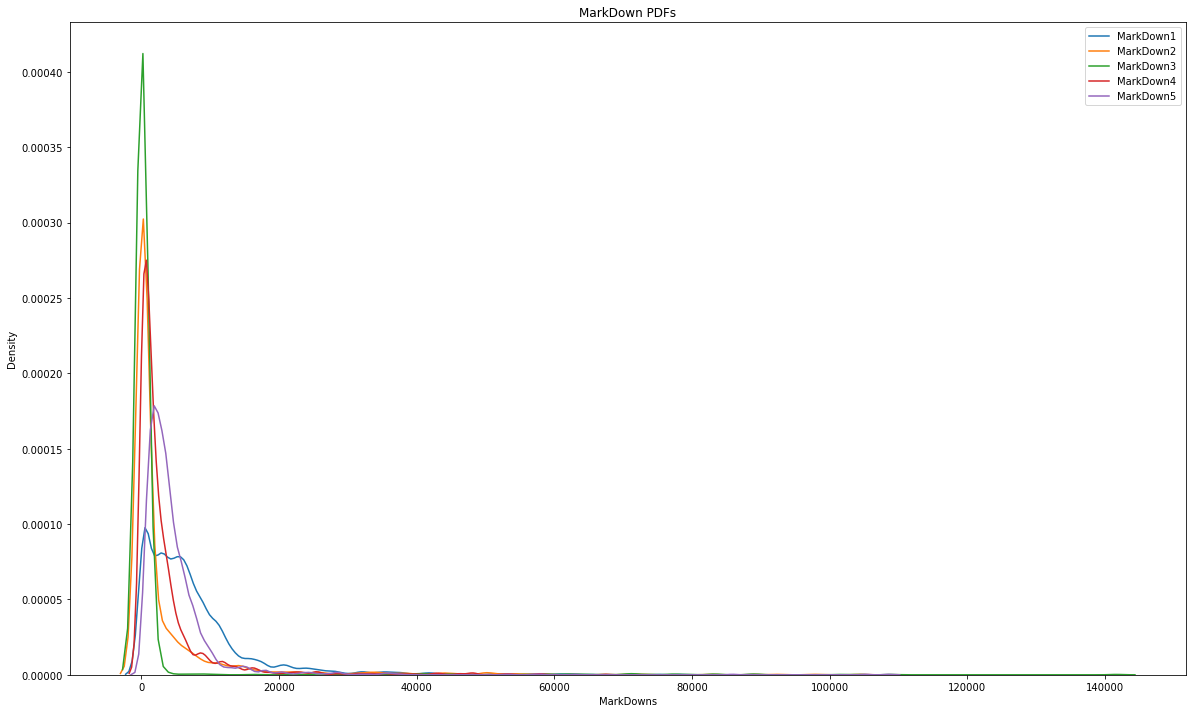

In [544]:
plt.figure(figsize=(20,12))
sns.kdeplot(df['MarkDown1'], label='MarkDown1')
sns.kdeplot(df['MarkDown2'], label='MarkDown2')
sns.kdeplot(df['MarkDown3'], label='MarkDown3')
sns.kdeplot(df['MarkDown4'], label='MarkDown4')
sns.kdeplot(df['MarkDown5'], label='MarkDown5')
plt.xlabel('MarkDowns')
plt.title('MarkDown PDFs')
plt.legend()
plt.show()

#### Observation:
    There are many smaller values and less larger values but Markdown1 has more larger values than other Markdowns.
    Markdown2 has highest number of null values and markdown5 has lowest.
    There is sharp drop in markdown3. It means there are many samller values and a few samller values.
    There are outliers in each markdown.

In [401]:
# Converting markdown real values to markdown categories
def markdown(x):
    if x>0 and x<5000:
        return 5000
    elif x>5000 and x<10000:
        return 10000
    elif x>10000 and x<15000:
        return 15000
    elif x>15000 and x<20000:
        return 20000
    elif x>20000 and x<25000:
        return 25000
    elif x>25000 and x<30000:
        return 30000
    elif x>30000 and x<35000:
        return 35000
    elif x>35000 and x<40000:
        return 40000
    elif x>40000 and x<45000:
        return 45000
    elif x>45000 and x<50000:
        return 50000
    elif x>50000 and x<55000:
        return 55000
    elif x>55000 and x<60000:
        return 60000
    elif x>60000 and x<65000:
        return 65000
    elif x>65000 and x<70000:
        return 70000
    elif x>70000 and x<75000:
        return 75000
    elif x>75000 and x<80000:
        return 80000
    elif x>80000 and x<85000:
        return 85000
    elif x>85000 and x<90000:
        return 90000
    elif x>90000 and x<95000:
        return 95000
    elif x>95000 and x<100000:
        return 100000
    elif x>100000:
        return 110000


list_of_markdown = df['MarkDown1']
new_list = list_of_markdown.map(markdown)
df['Markdown1_Cat'] = new_list

list_of_markdown = df['MarkDown2']
new_list = list_of_markdown.map(markdown)
df['Markdown2_Cat'] = new_list

list_of_markdown = df['MarkDown3']
new_list = list_of_markdown.map(markdown)
df['Markdown3_Cat'] = new_list

list_of_markdown = df['MarkDown4']
new_list = list_of_markdown.map(markdown)
df['Markdown4_Cat'] = new_list

list_of_markdown = df['MarkDown5']
new_list = list_of_markdown.map(markdown)
df['Markdown5_Cat'] = new_list

In [402]:
new_df_markdown = df[df['Date']>'2011-11-04']

###### a. Markdown1

count    150681.000000
mean       7246.420196
std        8291.221345
min           0.270000
25%        2240.270000
50%        5347.450000
75%        9210.900000
max       88646.760000
Name: MarkDown1, dtype: float64


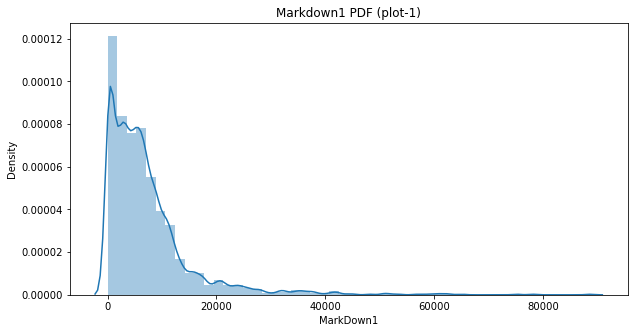

In [537]:
print(df['MarkDown1'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['MarkDown1'])
plt.title('Markdown1 PDF (plot-1)')
plt.show()

In [403]:
print('Min value of markdown1: ', new_df_markdown1['MarkDown1'].min())
print('Max value of markdown1: ', new_df_markdown1['MarkDown1'].max())

Min value of markdown1:  0.27
Max value of markdown1:  88646.76


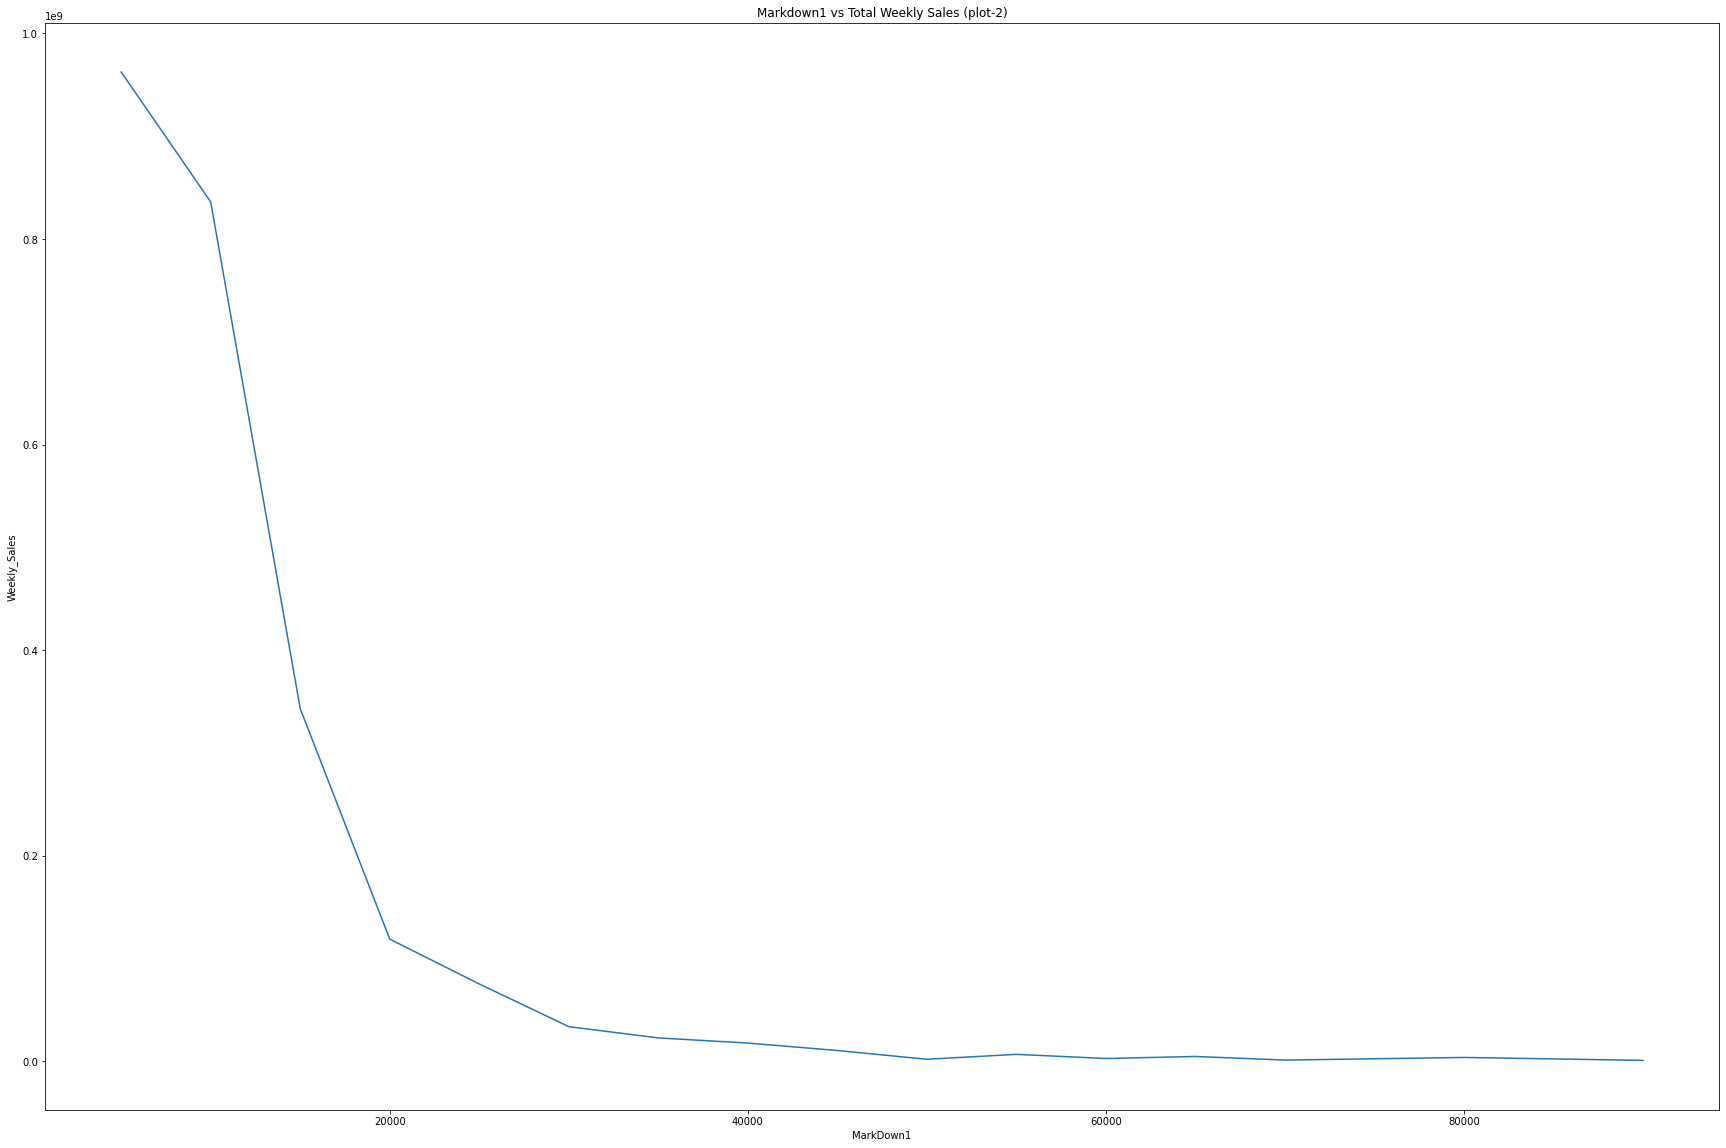

In [549]:
# Grouping markdown1 categories and plotting total weekly sales.
df1 = new_df_markdown1.groupby('Markdown1_Cat')['Weekly_Sales'].sum()
plt.figure(figsize=(30,20))
df1.plot()
plt.xlabel('MarkDown1')
plt.ylabel('Weekly_Sales')
plt.title('Markdown1 vs Total Weekly Sales (plot-2)')
plt.show()

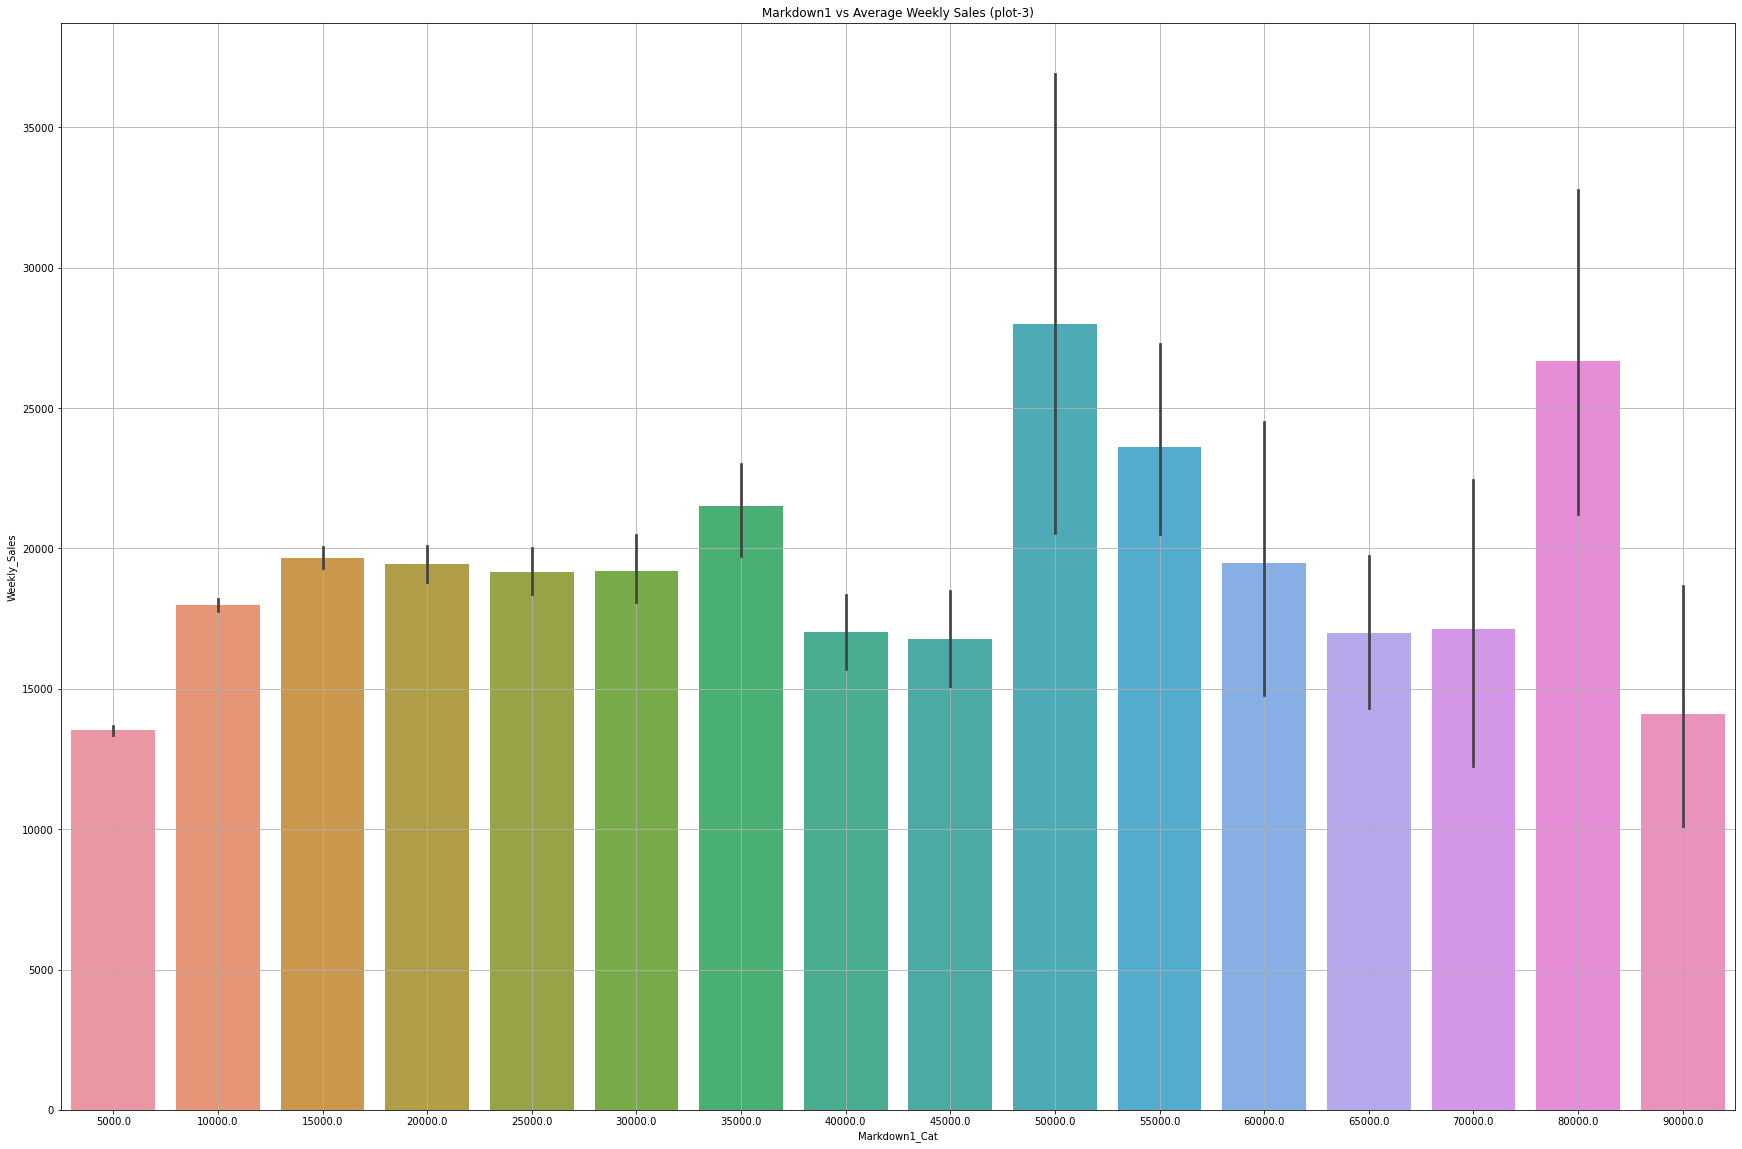

In [550]:
# Bar plot of weekly sales over markdown1 categories
plt.figure(figsize=(30,20))
sns.barplot(x=new_df_markdown1['Markdown1_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.grid()
plt.title('Markdown1 vs Average Weekly Sales (plot-3)')
plt.show()

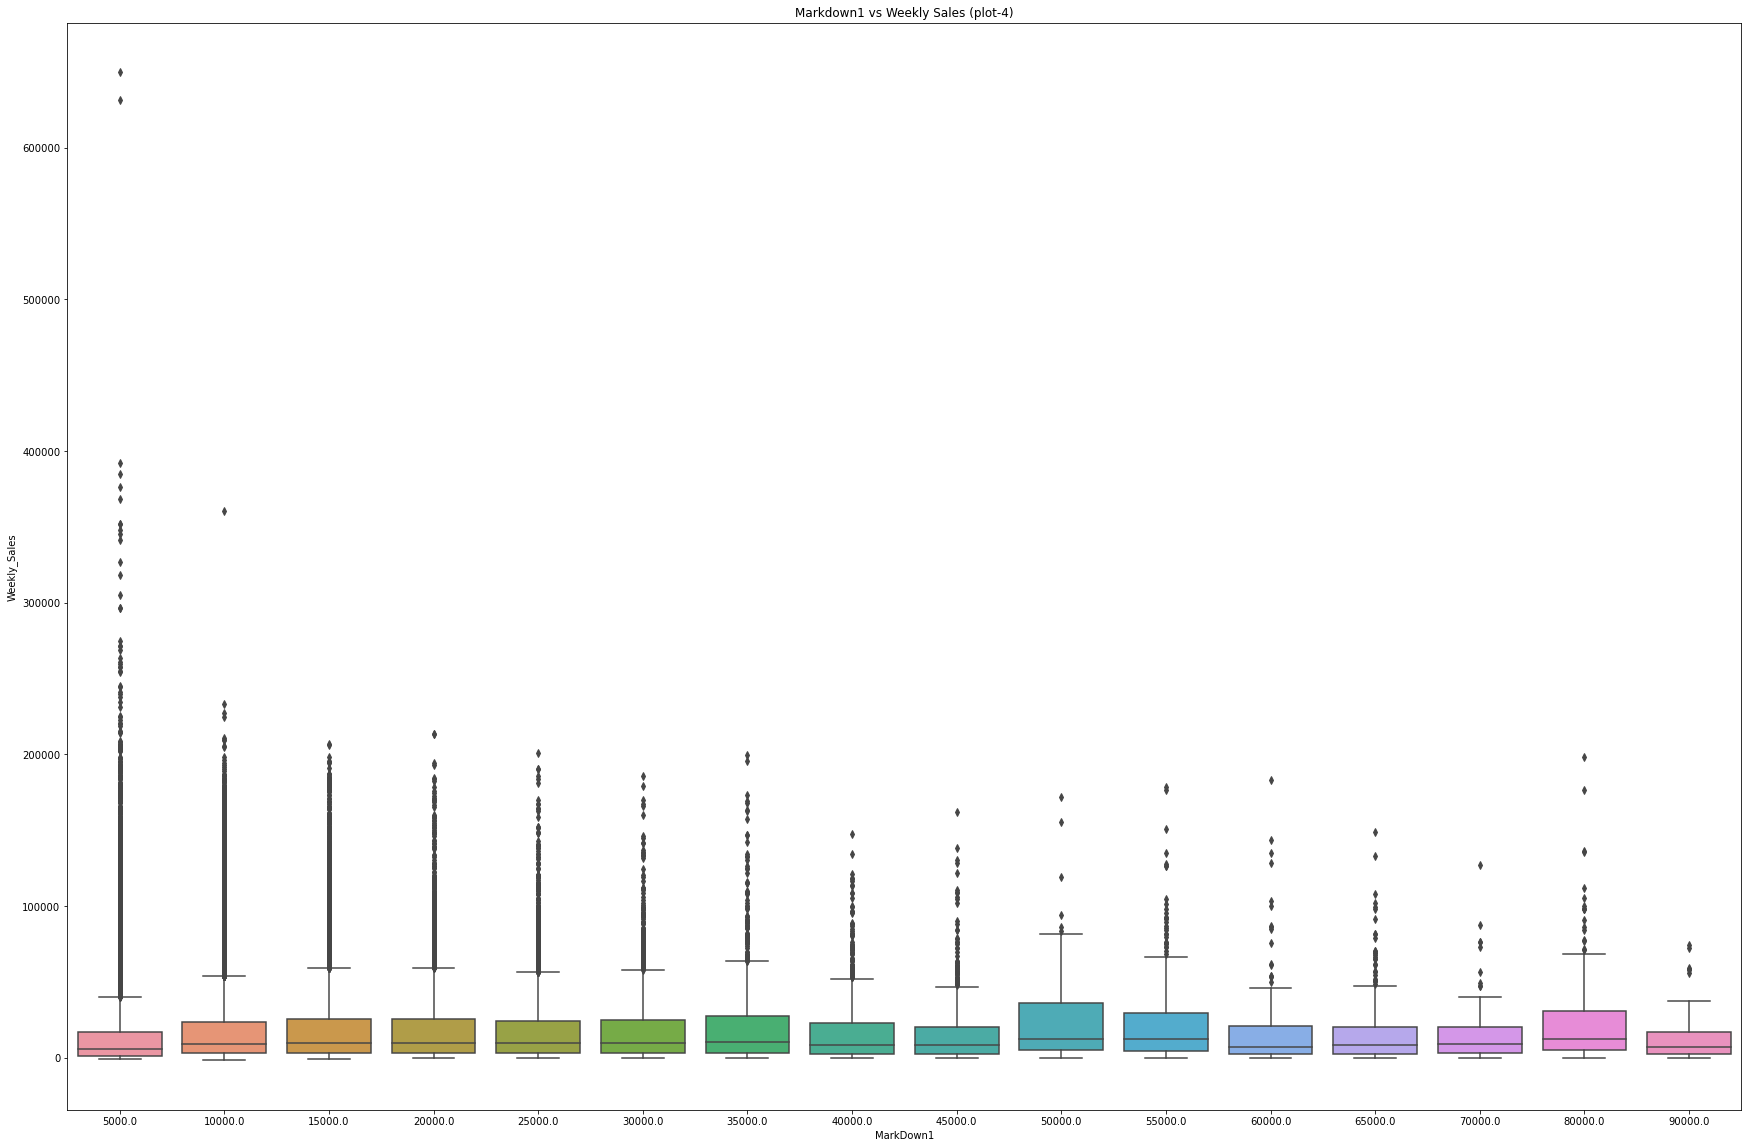

In [551]:
# Box plot of weekly sales over markdown1 categories
plt.figure(figsize=(30,20))
sns.boxplot(x=new_df_markdown1['Markdown1_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown1')
plt.ylabel('Weekly_Sales')
plt.title('Markdown1 vs Weekly Sales (plot-4)')
plt.show()

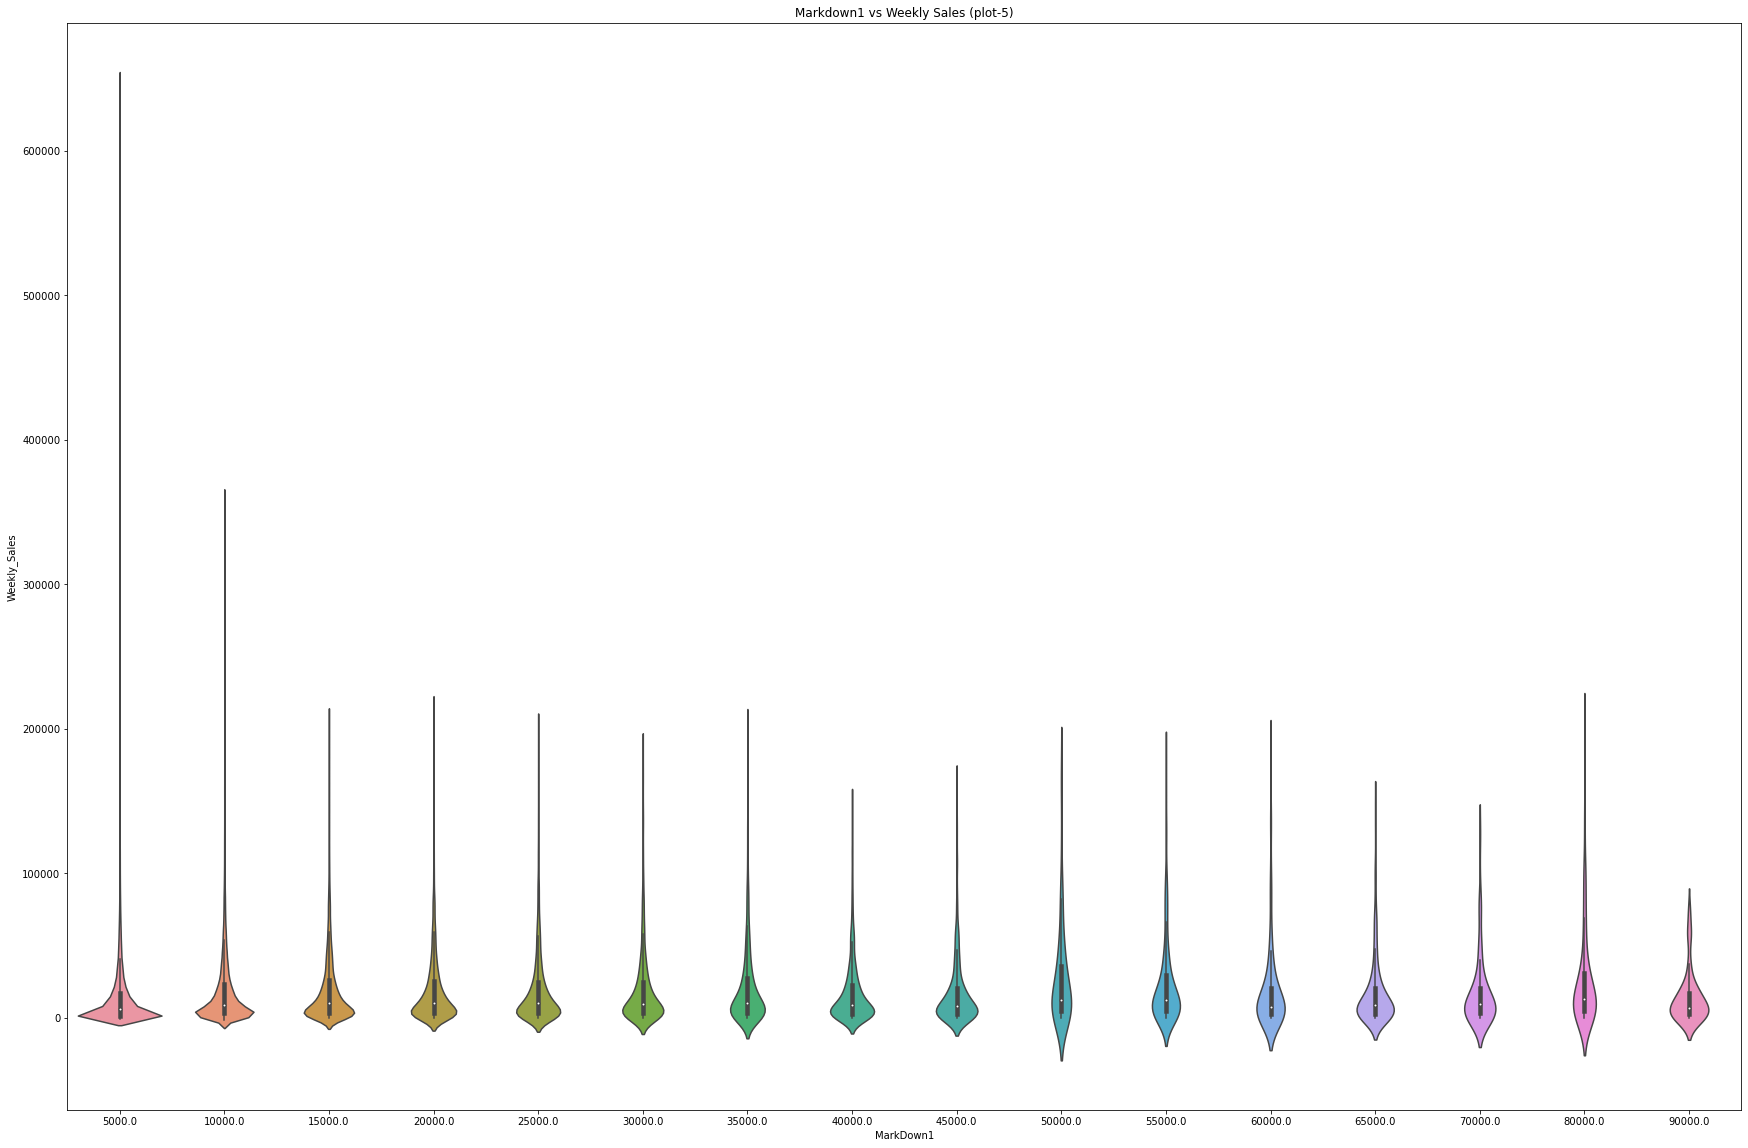

In [552]:
# Violin plot of weekly sales over markdown1 categories
plt.figure(figsize=(30,20))
sns.violinplot(x=new_df_markdown1['Markdown1_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown1')
plt.ylabel('Weekly_Sales')
plt.title('Markdown1 vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, There are many smaller values and less larger values.
    2. From plot-2, When Markdown1 value is low then we can see high total weekly sales.
    3. From plot-3, When Markdown1 value is high then we can see high mean weekly sales.
    4. From plot-4, Median of weekly sales for markdown value between 45000-50000 and 75000-80000 higher than other values.
    5. From plot-5, When Markdown value is low(0-5000). We can see high weekly sale. 
    6. Markdown1 is impacting the weekly sales.
    7. From plot-5, There are outliers present in each markdown1 calegory but markdown between 85000-90000 
    has less outliers.

###### b. Markdown2

count    111248.000000
mean       3334.628621
std        9475.357325
min        -265.760000
25%          41.600000
50%         192.000000
75%        1926.940000
max      104519.540000
Name: MarkDown2, dtype: float64


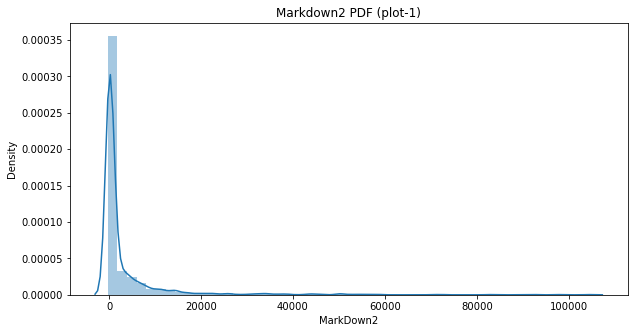

In [542]:
print(df['MarkDown2'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['MarkDown2'])
plt.title('Markdown2 PDF (plot-1)')
plt.show()

In [405]:
print('Min value of markdown2: ', new_df_markdown1['MarkDown2'].min())
print('Max value of markdown2: ', new_df_markdown1['MarkDown2'].max())

Min value of markdown2:  -265.76
Max value of markdown2:  104519.54


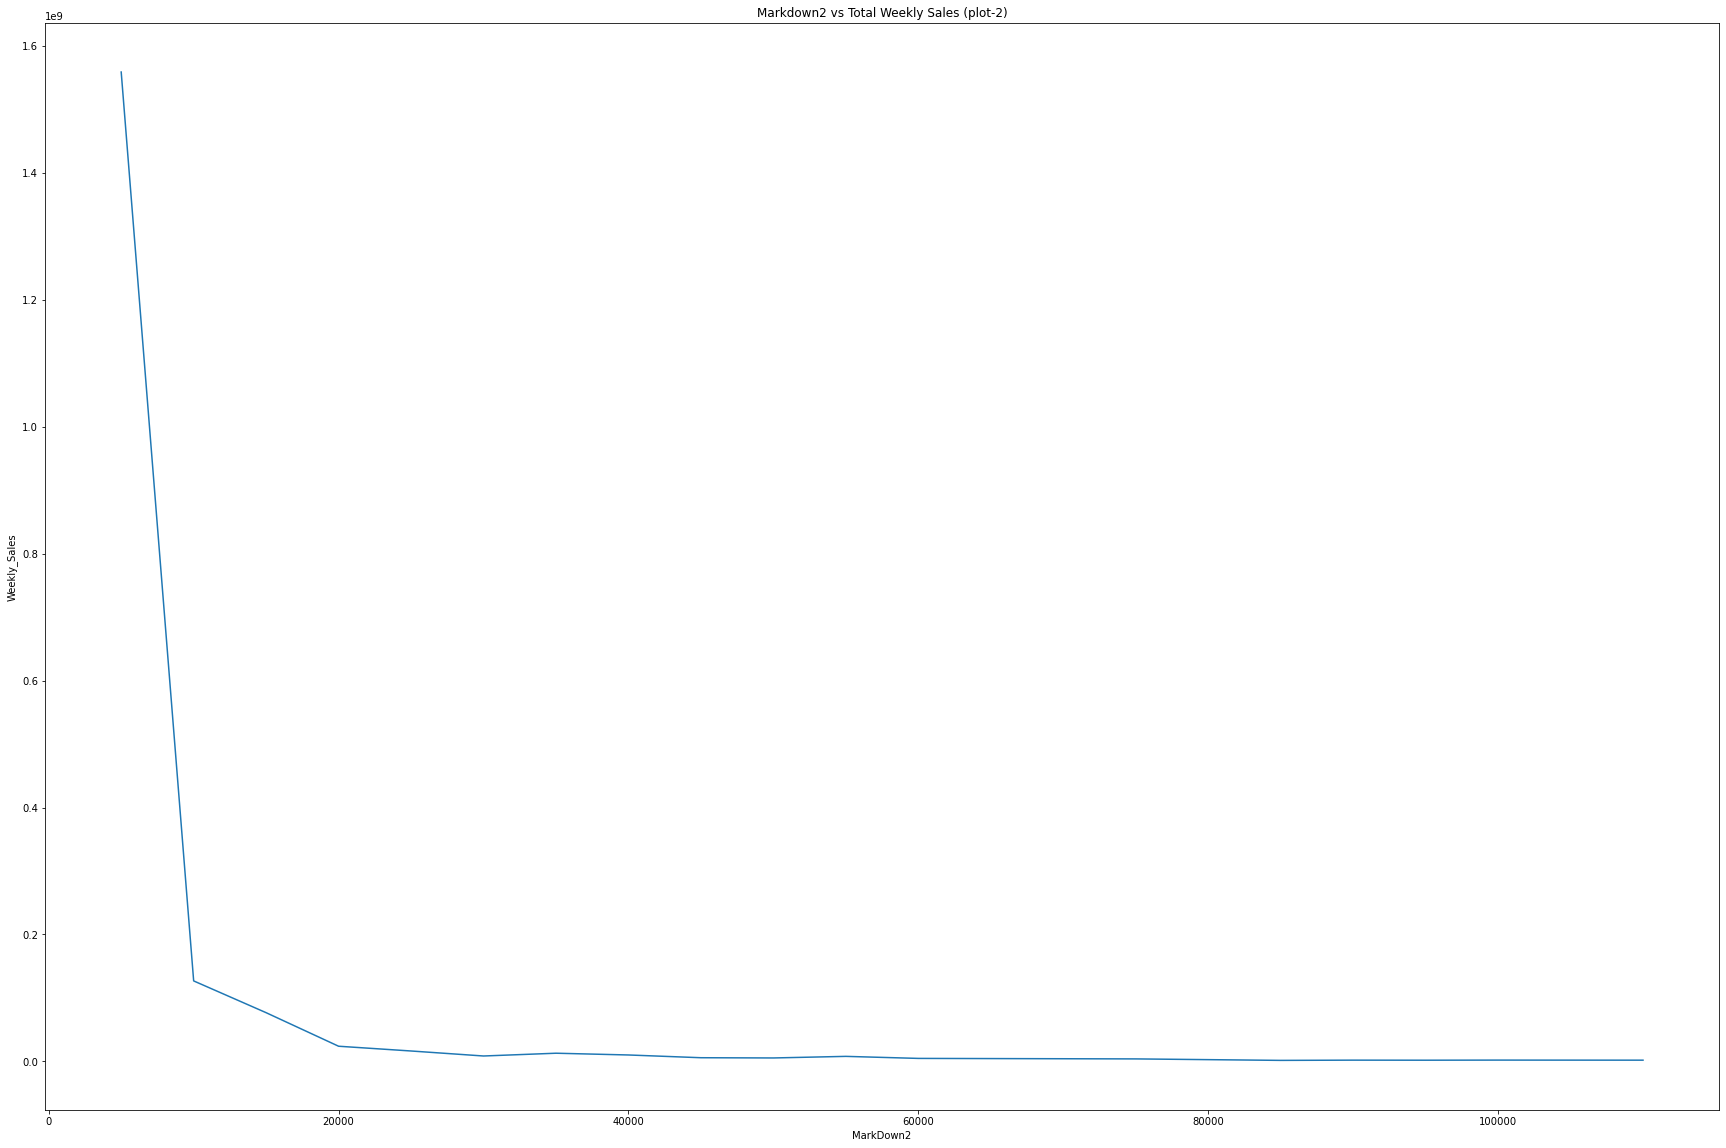

In [553]:
# Grouping markdown2 categories and plotting total weekly sales.
df1 = new_df_markdown1.groupby('Markdown2_Cat')['Weekly_Sales'].sum()
plt.figure(figsize=(30,20))
df1.plot()
plt.xlabel('MarkDown2')
plt.ylabel('Weekly_Sales')
plt.title('Markdown2 vs Total Weekly Sales (plot-2)')
plt.show()

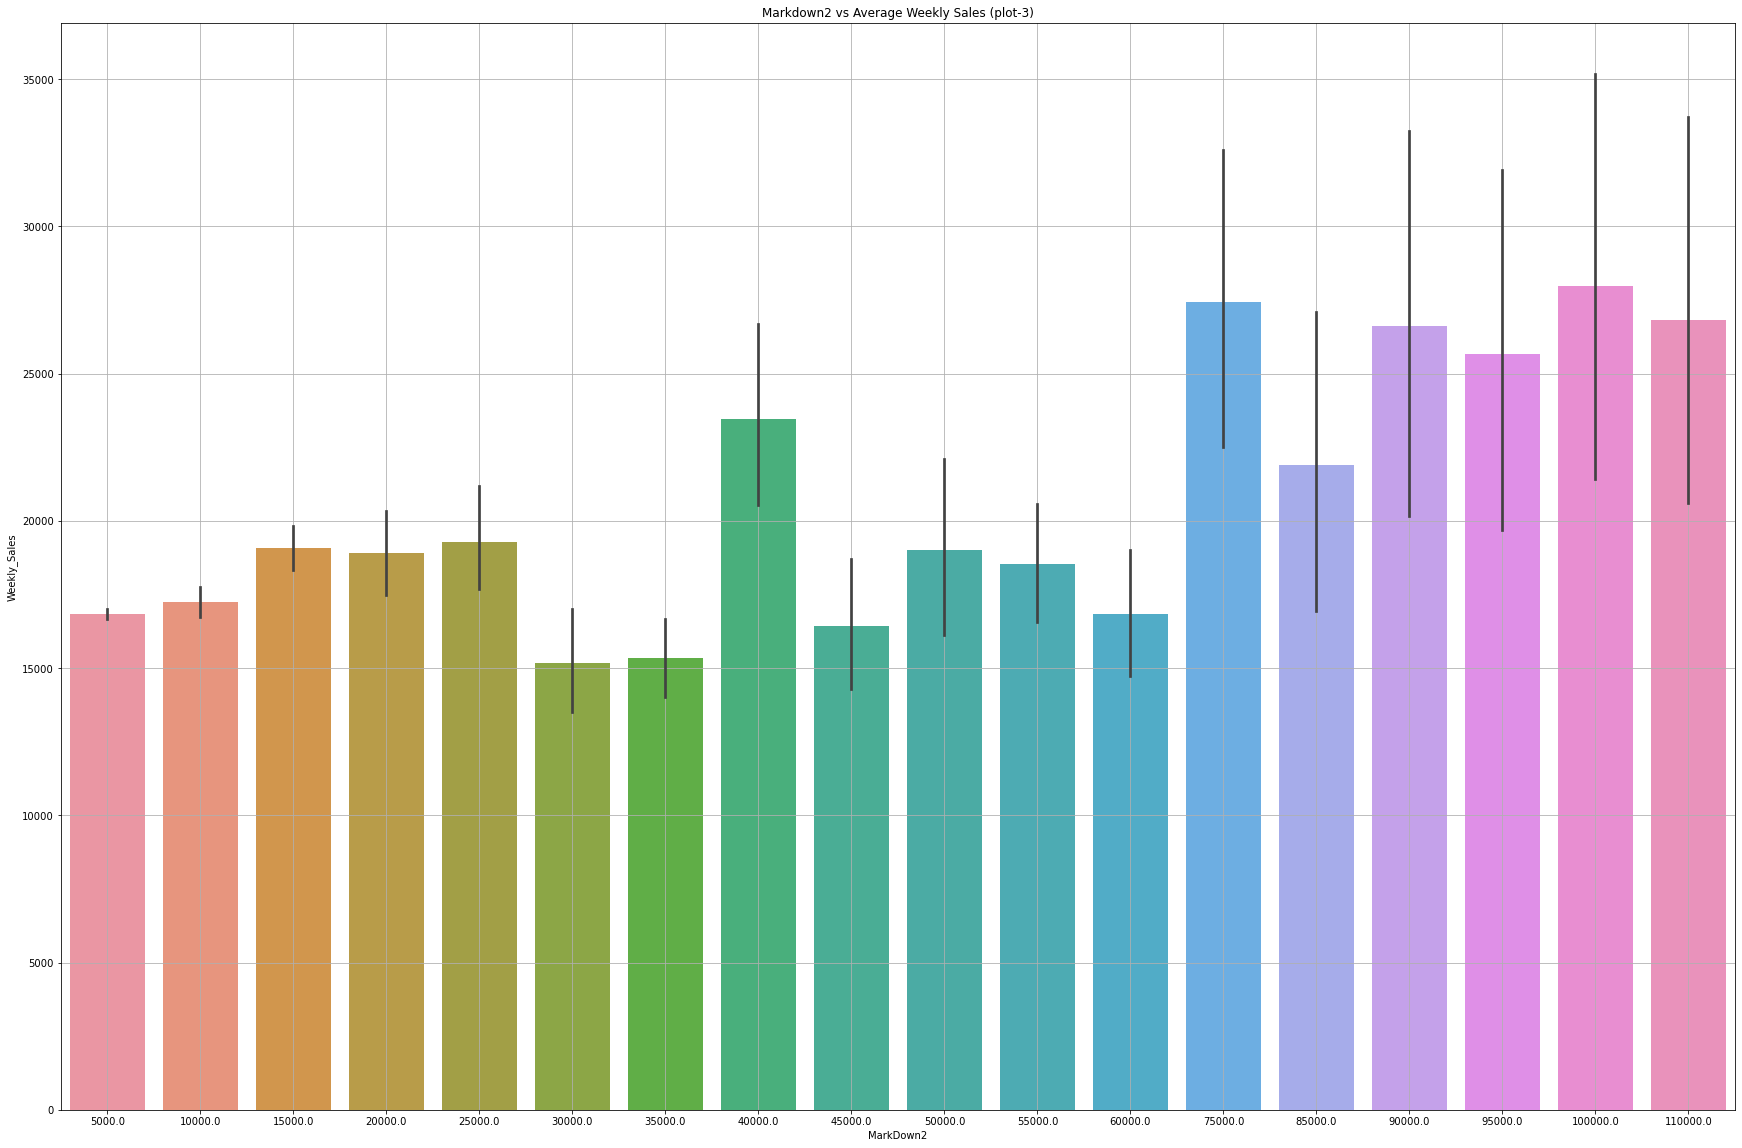

In [555]:
# Bar plot of weekly sales over Markdown2_Cat
plt.figure(figsize=(30,20))
sns.barplot(x=new_df_markdown1['Markdown2_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.grid()
plt.xlabel('MarkDown2')
plt.ylabel('Weekly_Sales')
plt.title('Markdown2 vs Average Weekly Sales (plot-3)')
plt.show()

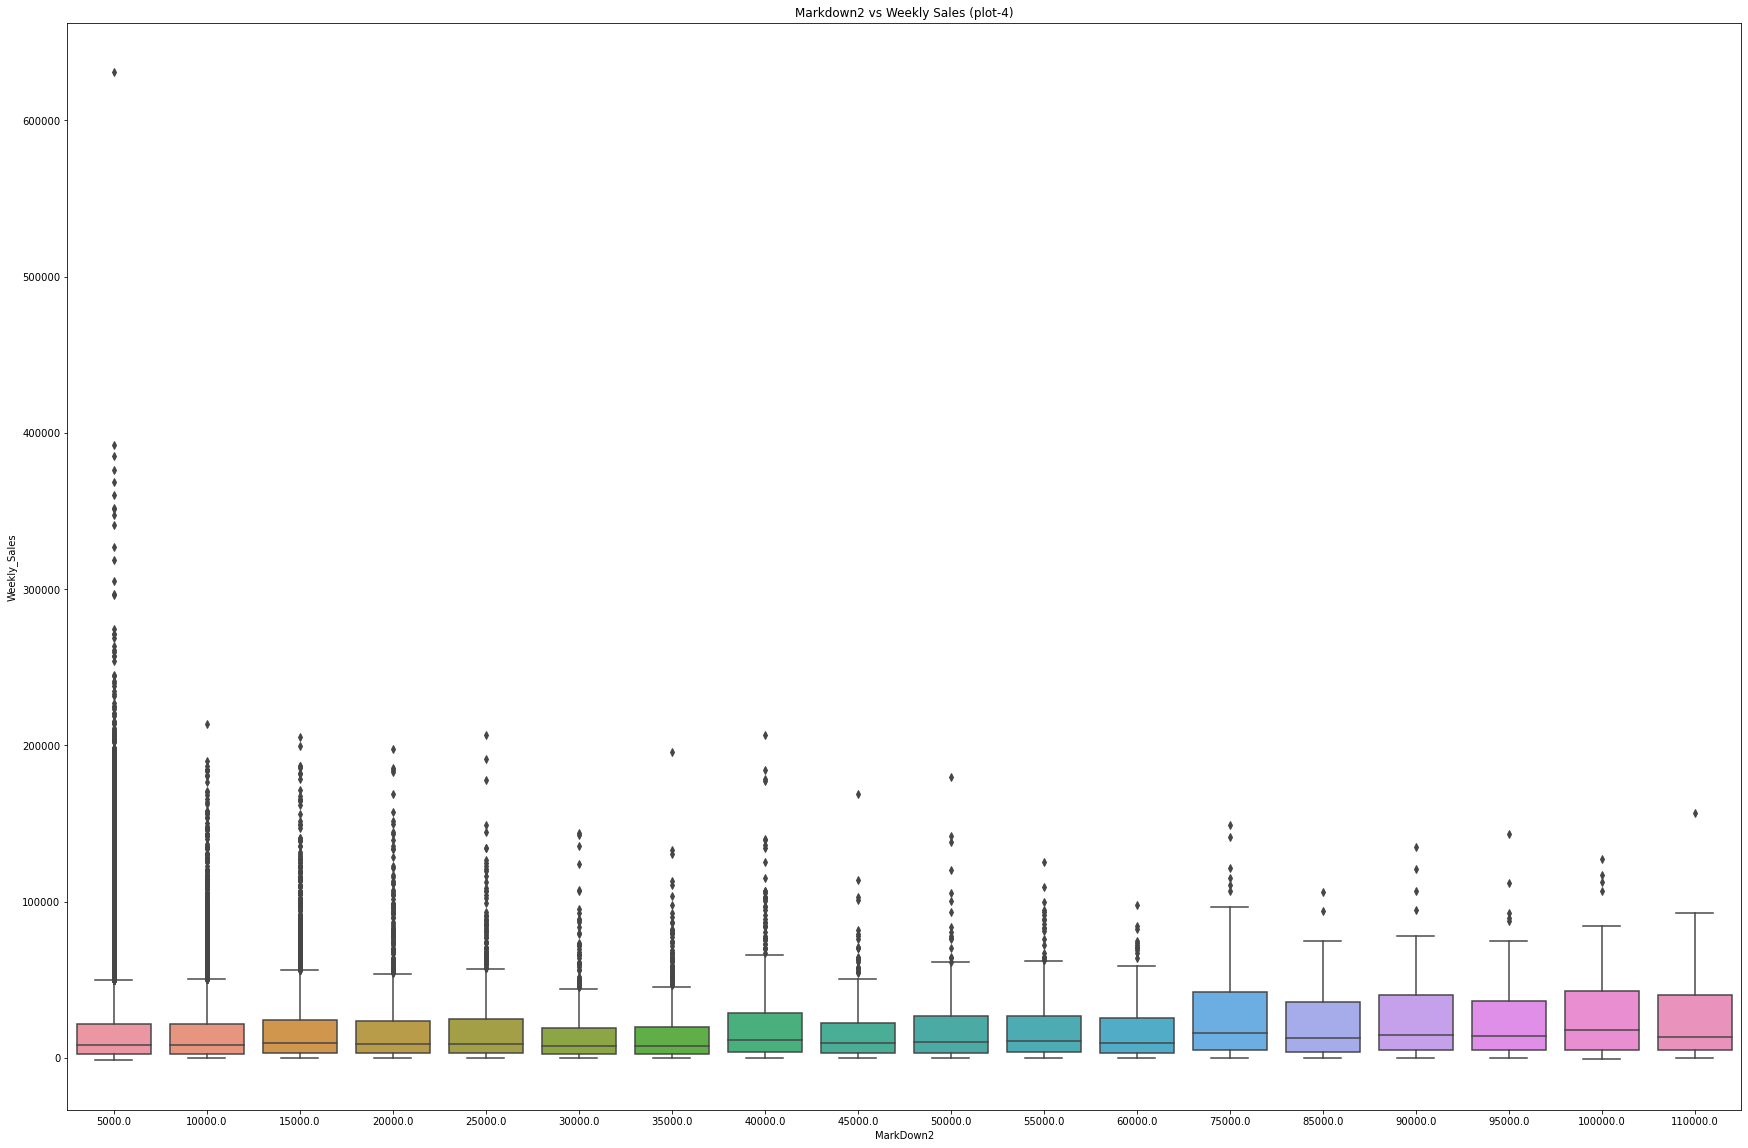

In [556]:
# Box plot of weekly sales over Markdown2_Cat
plt.figure(figsize=(30,20))
sns.boxplot(x=new_df_markdown1['Markdown2_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown2')
plt.ylabel('Weekly_Sales')
plt.title('Markdown2 vs Weekly Sales (plot-4)')
plt.show()

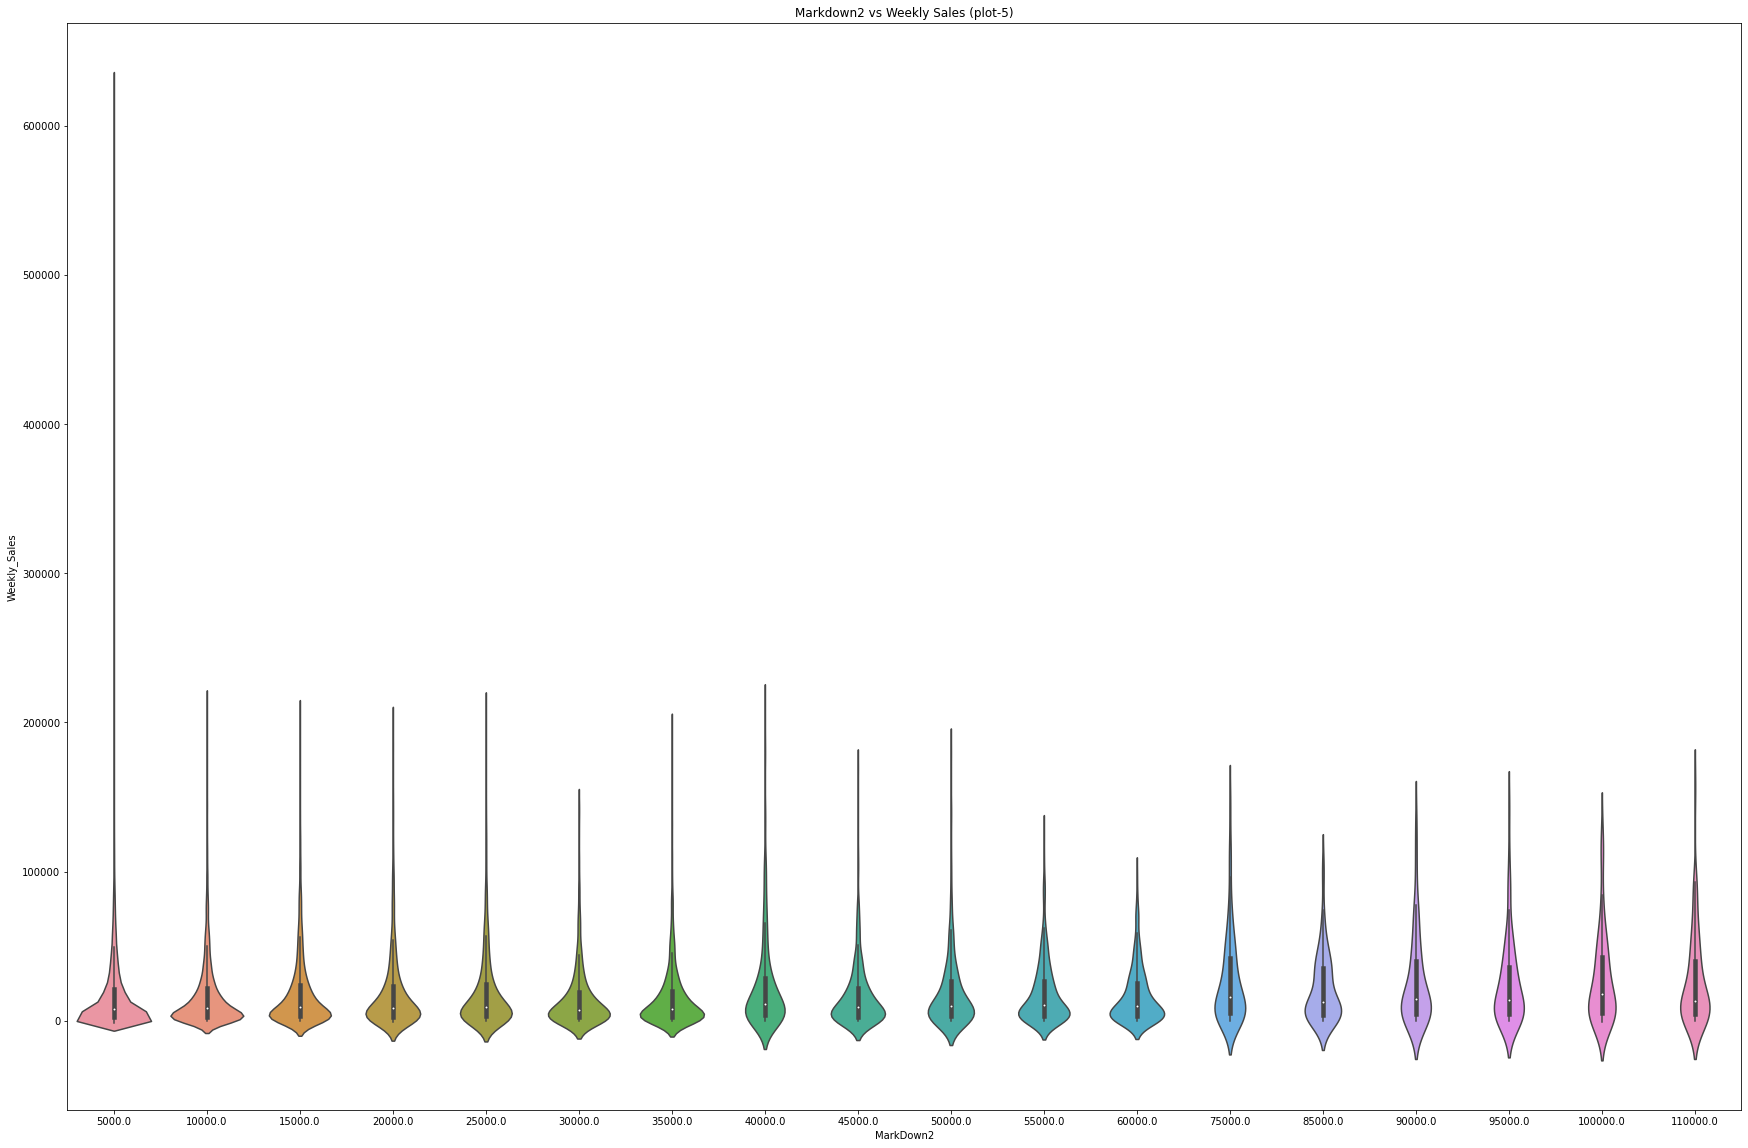

In [557]:
# Violin plot of weekly sales over Markdown2_Cat
plt.figure(figsize=(30,20))
sns.violinplot(x=new_df_markdown1['Markdown2_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown2')
plt.ylabel('Weekly_Sales')
plt.title('Markdown2 vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, There are many smaller values and less larger values.
    2.From plot-2, When Markdown2 value is low then we can see high total weekly sales.
    3.From plot-3, When Markdown2 value is high then we can see high mean weekly sales.
    4.Markdown2 is impacting the weekly sales.
    5.From plot-4, Median of weekly sales for large markdown values higher than small markdown
    values ex: between 70000-75000 and 95000-100000 higher than other values.
    6.From plot-5, When Markdown value is low(0-5000). We can see high weekly sale.
    7.From plot-5, There are outliers present in each markdown2 calegory but when markdown value
    is high we can see less outliers. 

##### c. Markdown3

count    137091.000000
mean       1439.421384
std        9623.078290
min         -29.100000
25%           5.080000
50%          24.600000
75%         103.990000
max      141630.610000
Name: MarkDown3, dtype: float64


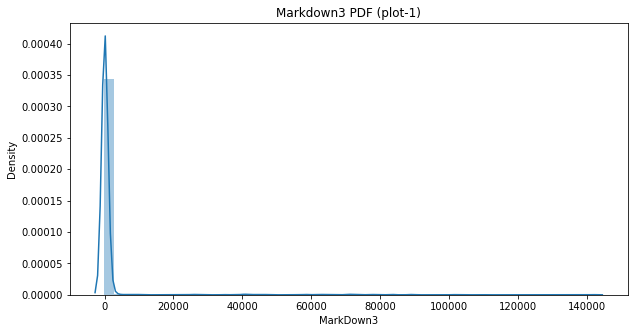

In [539]:
print(df['MarkDown3'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['MarkDown3'])
plt.title('Markdown3 PDF (plot-1)')
plt.show()

In [407]:
print('Min value of markdown3: ', new_df_markdown1['MarkDown3'].min())
print('Max value of markdown3: ', new_df_markdown1['MarkDown3'].max())

Min value of markdown3:  -29.1
Max value of markdown3:  141630.61


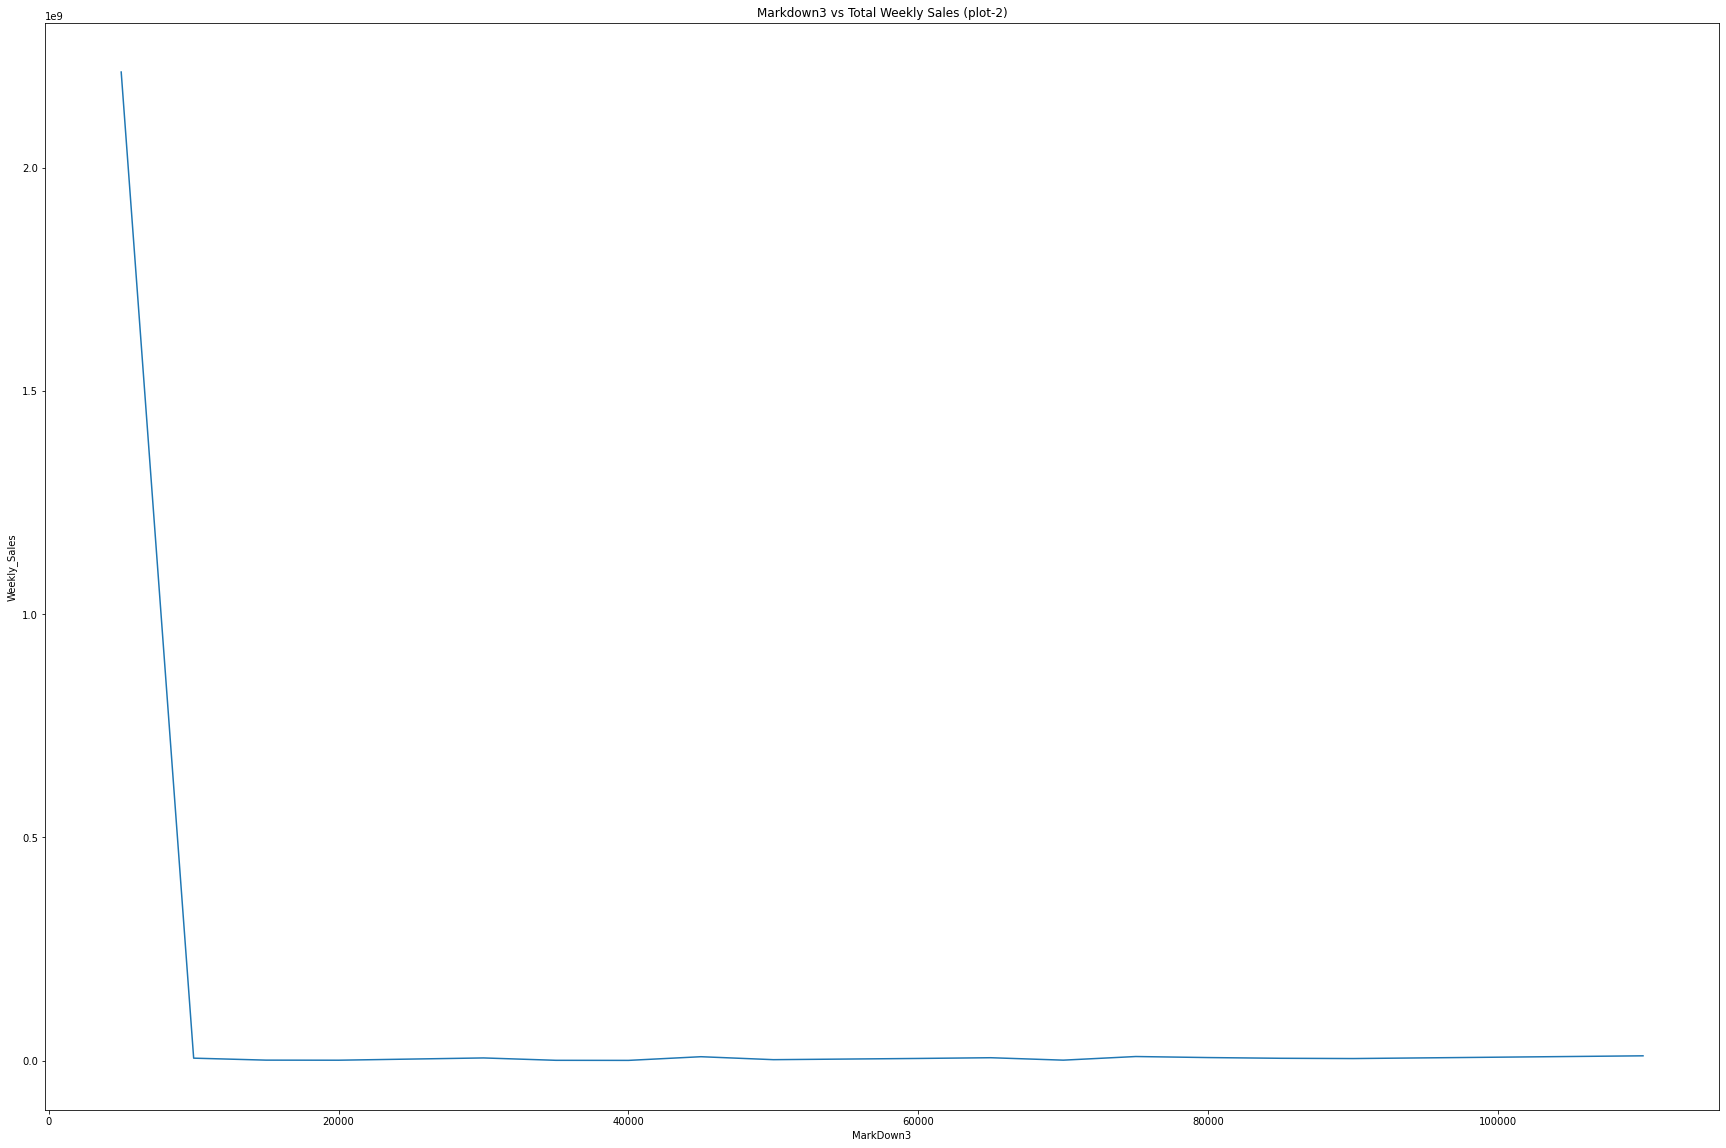

In [558]:
# Grouping Markdown3 Categories and plotting total weekly sales.
df1 = new_df_markdown1.groupby('Markdown3_Cat')['Weekly_Sales'].sum()
plt.figure(figsize=(30,20))
df1.plot()
plt.xlabel('MarkDown3')
plt.ylabel('Weekly_Sales')
plt.title('Markdown3 vs Total Weekly Sales (plot-2)')
plt.show()

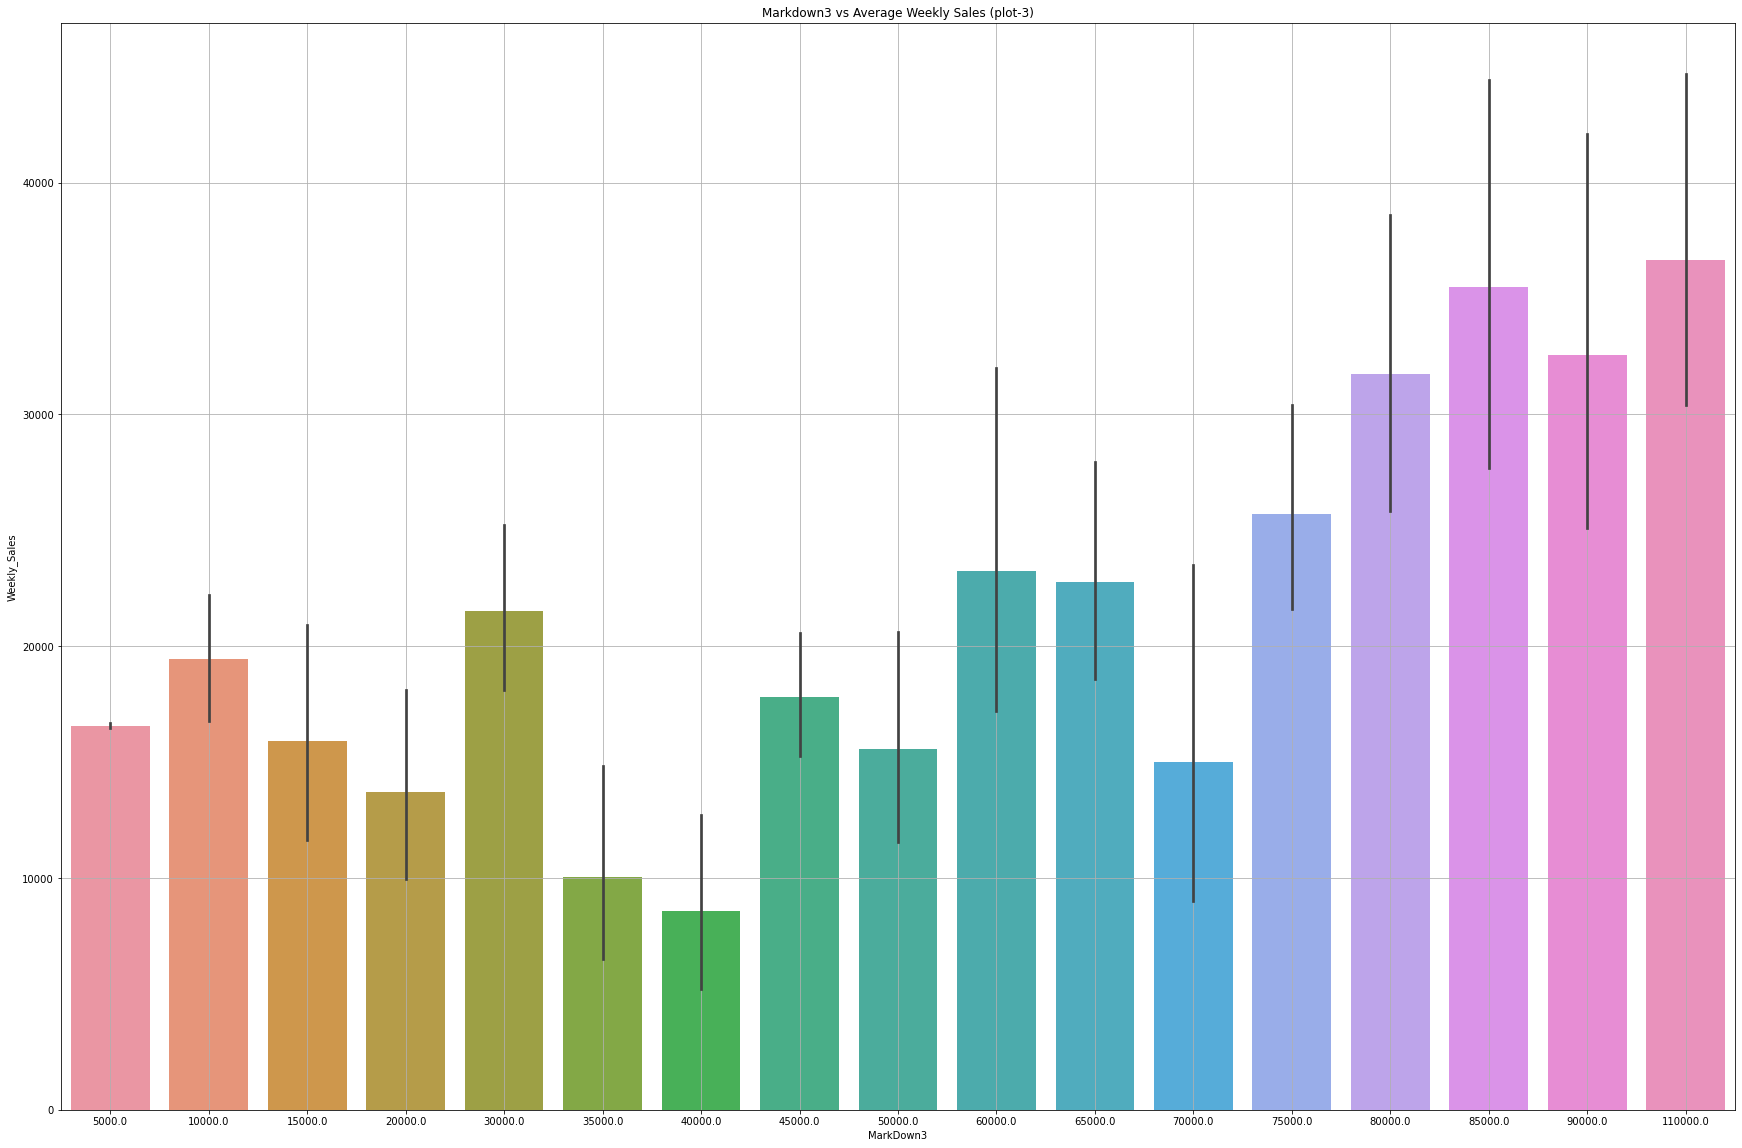

In [559]:
# Bar plot of weekly sales over markdown3 categories.
plt.figure(figsize=(30,20))
sns.barplot(x=new_df_markdown1['Markdown3_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.grid()
plt.xlabel('MarkDown3')
plt.ylabel('Weekly_Sales')
plt.title('Markdown3 vs Average Weekly Sales (plot-3)')
plt.show()

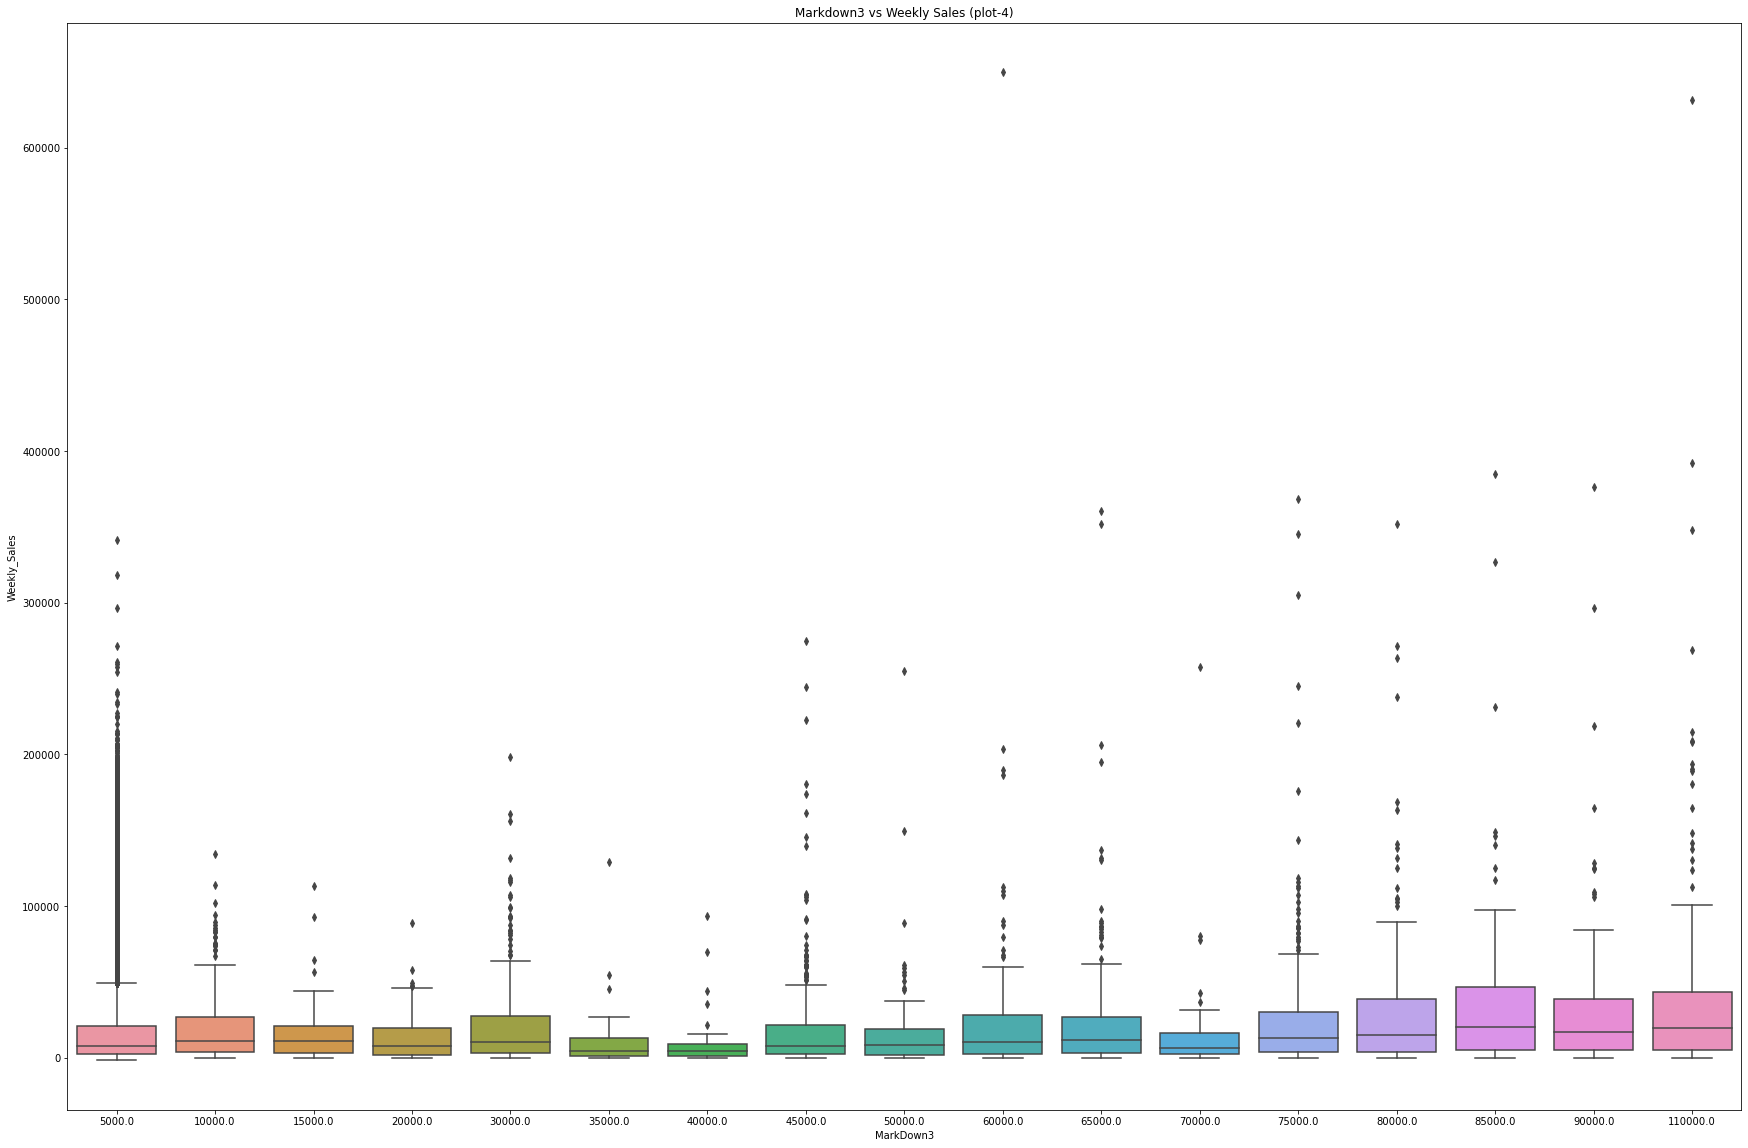

In [560]:
# Box plot of weekly sales over markdown3 categories.
plt.figure(figsize=(30,20))
sns.boxplot(x=new_df_markdown1['Markdown3_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown3')
plt.ylabel('Weekly_Sales')
plt.title('Markdown3 vs Weekly Sales (plot-4)')
plt.show()

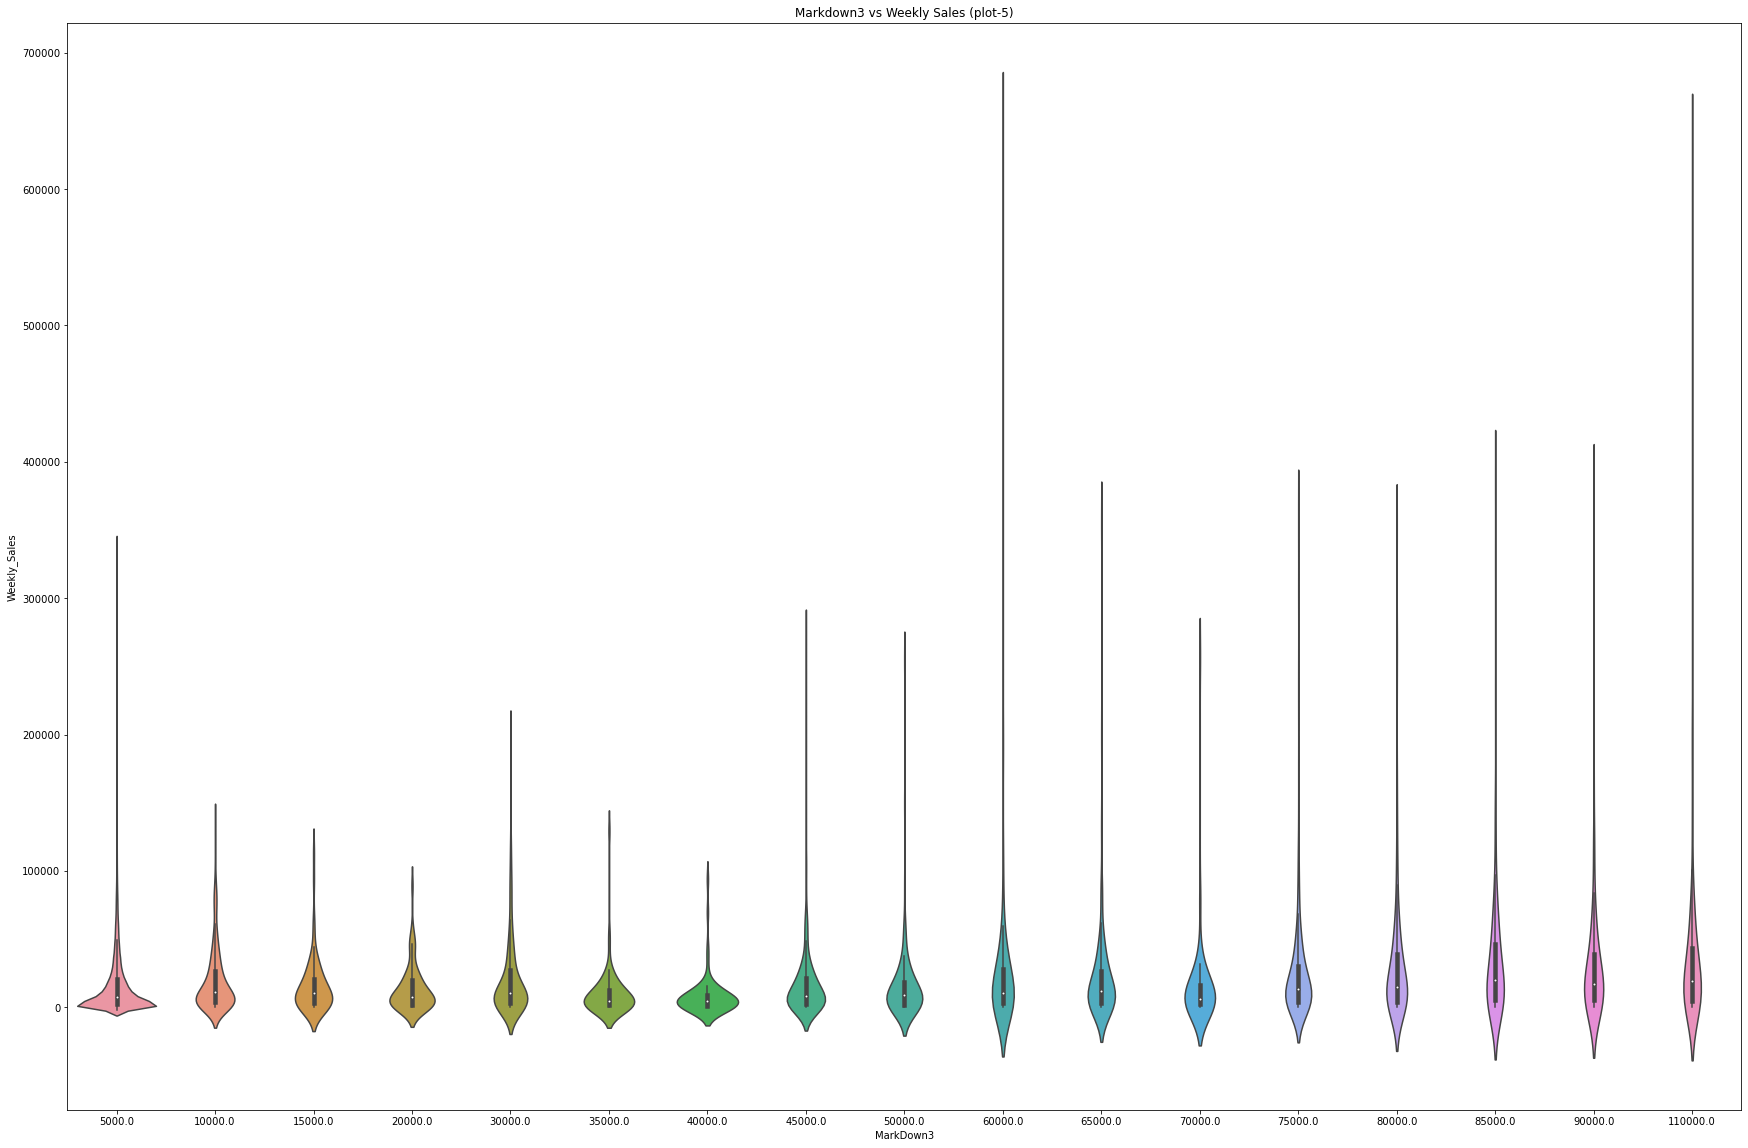

In [561]:
# Violin plot of weekly sales over markdown3 categories.
plt.figure(figsize=(30,20))
sns.violinplot(x=new_df_markdown1['Markdown3_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown3')
plt.ylabel('Weekly_Sales')
plt.title('Markdown3 vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, There are many smaller values and less larger values.
    2.From plot-2, When Markdown3 value is low then we can see high total weekly sales.
    3.From plot-3, When Markdown3 value is high then we can see high mean weekly sales.
    4.From plot-4, When Markdown value is high. We can see high weekly sale.
    5.From plot-4, Interquantile range of weekly sales for high markdown values are larger than low markdown values.
    6.Markdown3 is impacting the weekly sales.
    7.There is skewness present in each markdown categories i.e. outliers present in each markdown3 calegory.

##### d. Markdown4

count    134967.000000
mean       3383.168256
std        6292.384031
min           0.220000
25%         504.220000
50%        1481.310000
75%        3595.040000
max       67474.850000
Name: MarkDown4, dtype: float64


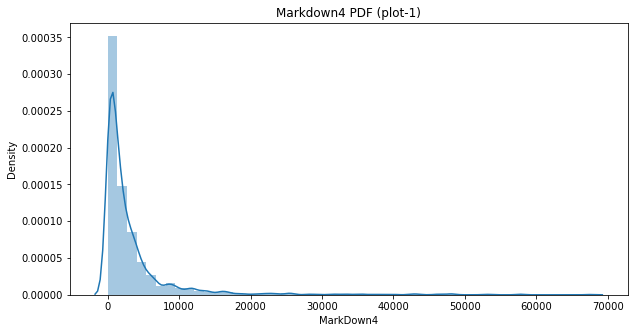

In [540]:
print(df['MarkDown4'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['MarkDown4'])
plt.title('Markdown4 PDF (plot-1)')
plt.show()

In [435]:
print('Min value of markdown4: ', new_df_markdown1['MarkDown4'].min())
print('Max value of markdown4: ', new_df_markdown1['MarkDown4'].max())

Min value of markdown4:  0.22
Max value of markdown4:  67474.85


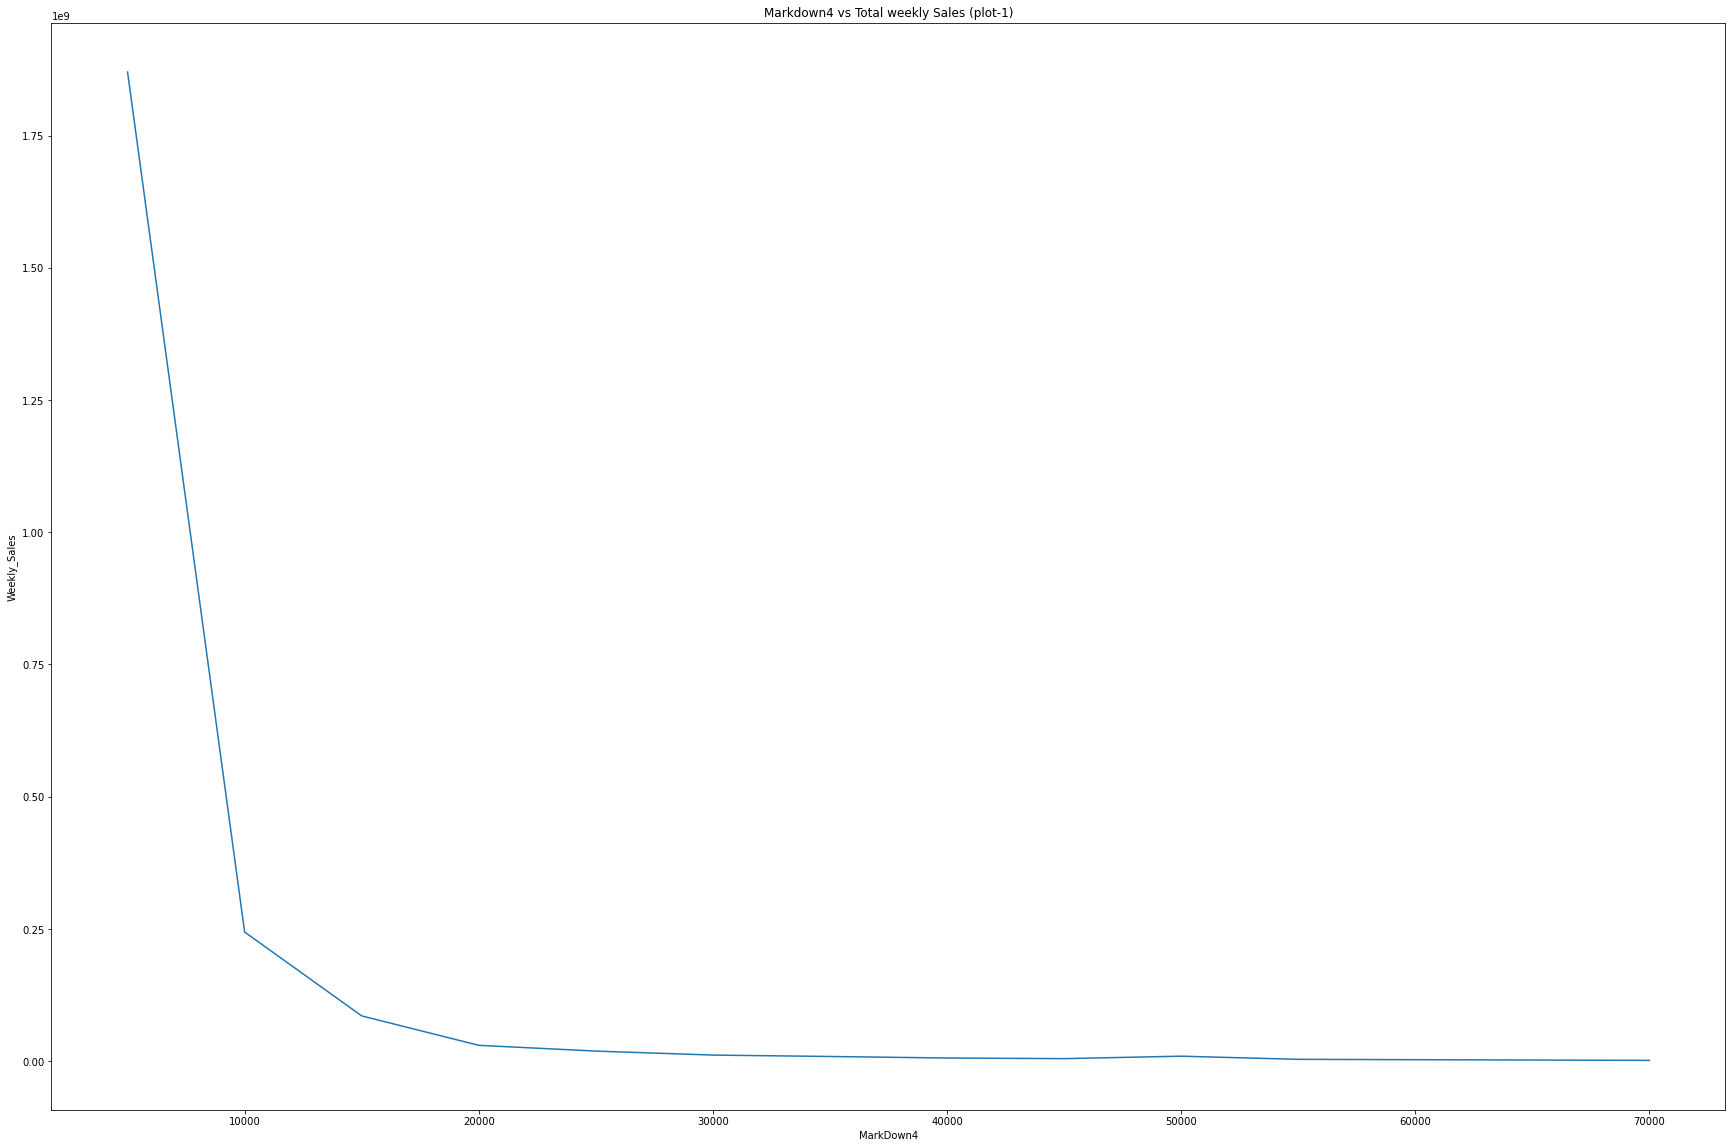

In [564]:
# Grouping Markdown4 categories and plotting total weekly sales.
df1 = new_df_markdown1.groupby('Markdown4_Cat')['Weekly_Sales'].sum()
plt.figure(figsize=(30,20))
df1.plot()
plt.xlabel('MarkDown4')
plt.ylabel('Weekly_Sales')
plt.title('Markdown4 vs Total weekly Sales (plot-1)')
plt.show()

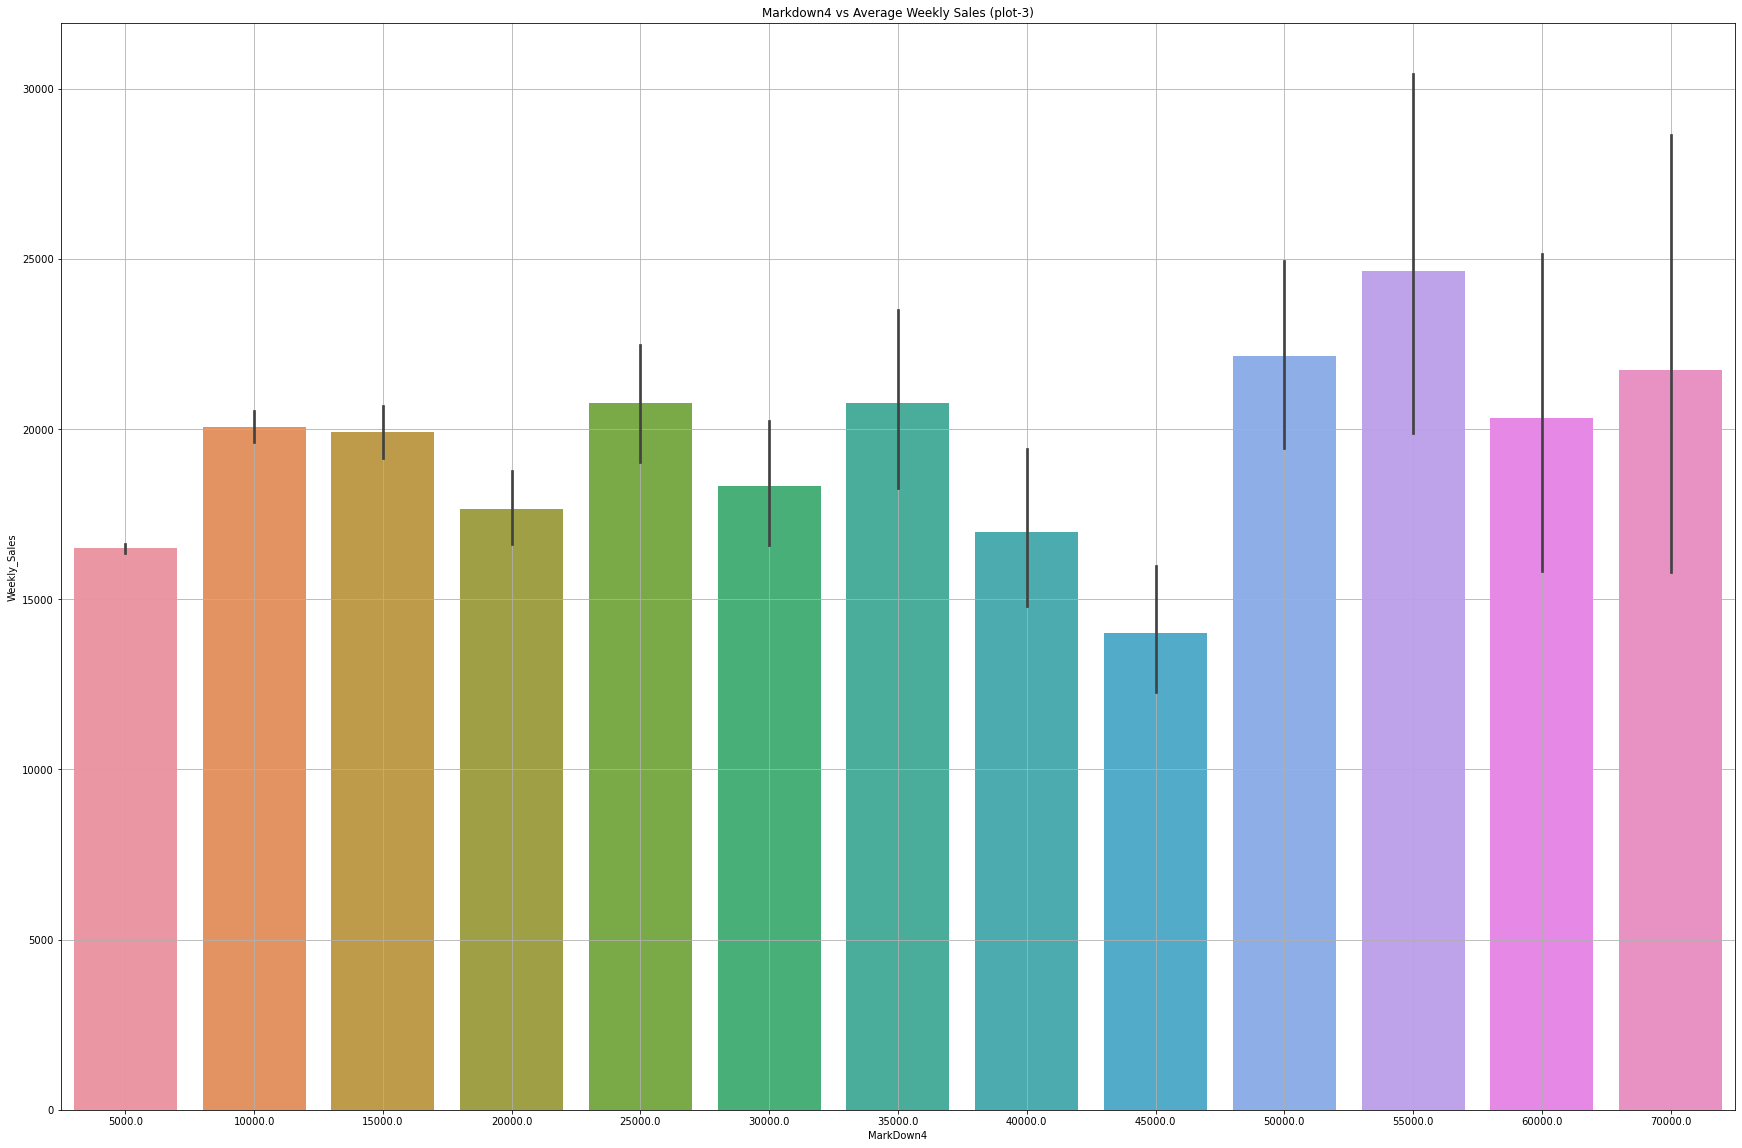

In [565]:
# Bar plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.barplot(x=new_df_markdown1['Markdown4_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.grid()
plt.xlabel('MarkDown4')
plt.ylabel('Weekly_Sales')
plt.title('Markdown4 vs Average Weekly Sales (plot-3)')
plt.show()

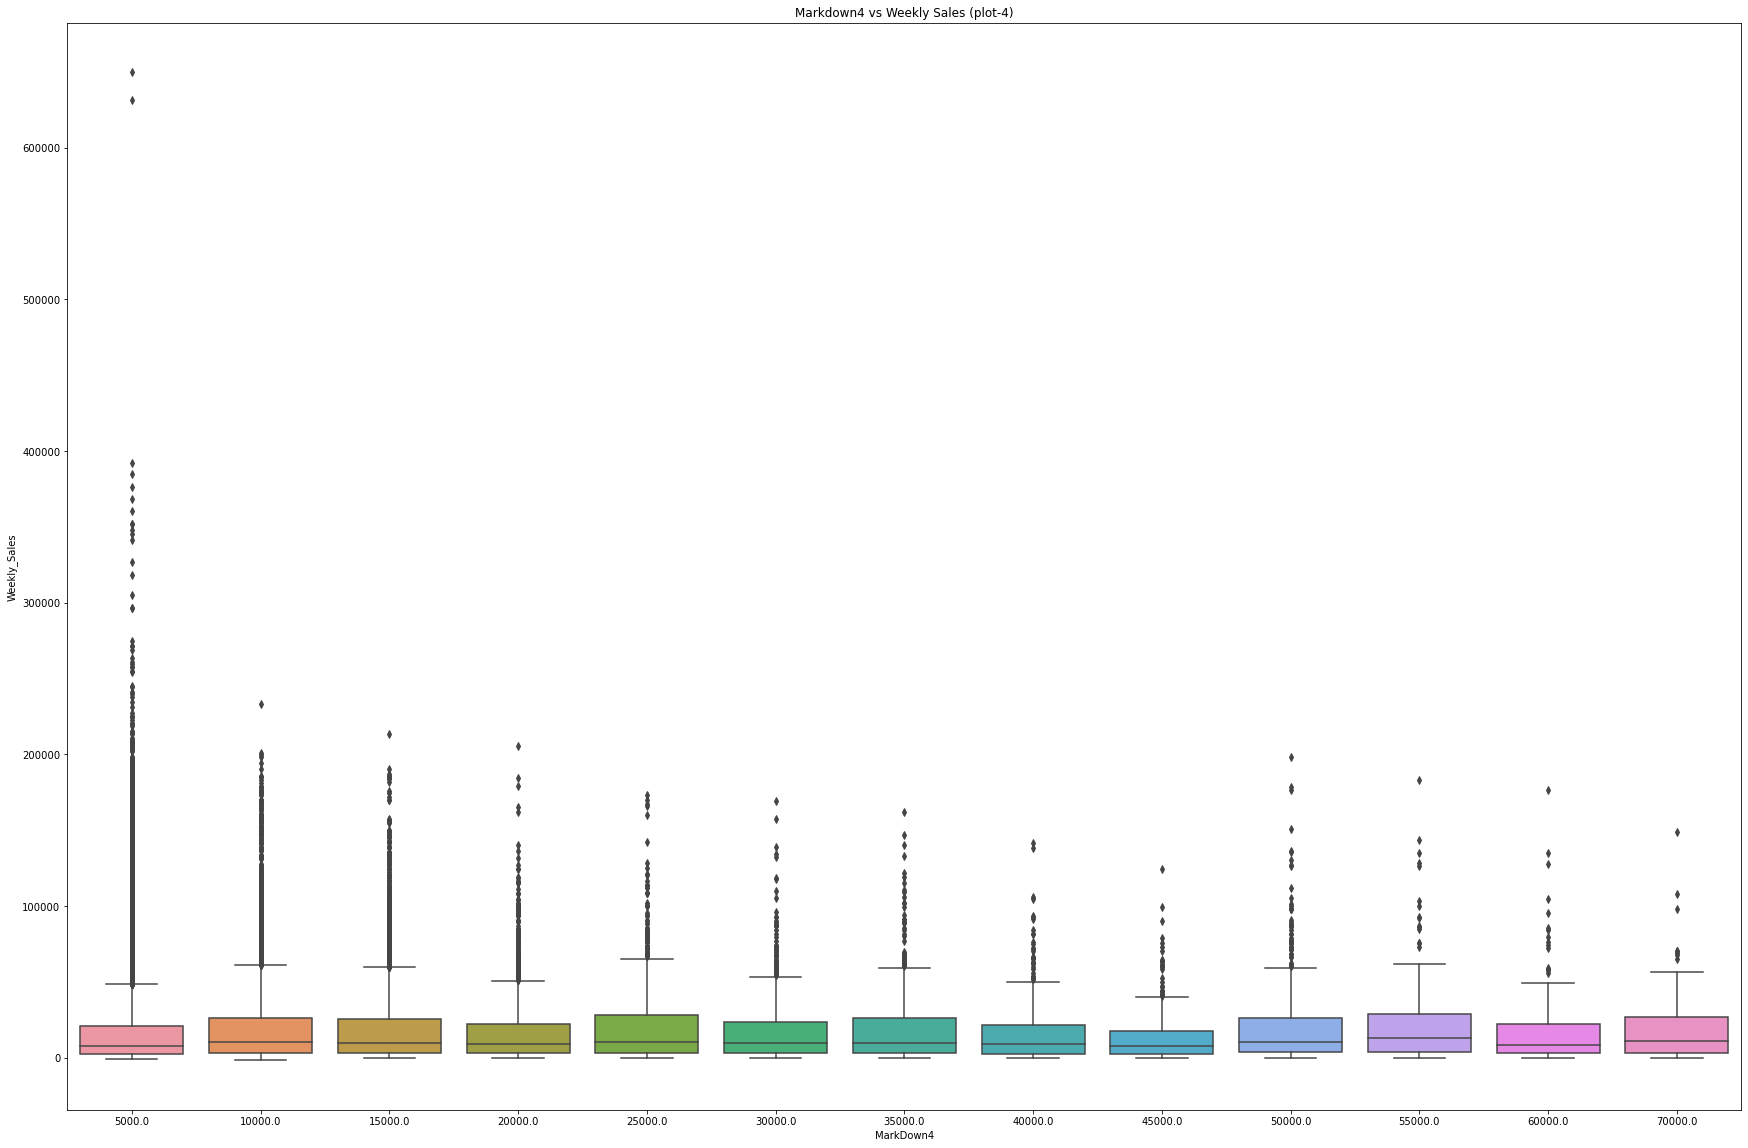

In [567]:
# Box plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.boxplot(x=new_df_markdown1['Markdown4_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown4')
plt.ylabel('Weekly_Sales')
plt.title('Markdown4 vs Weekly Sales (plot-4)')
plt.show()

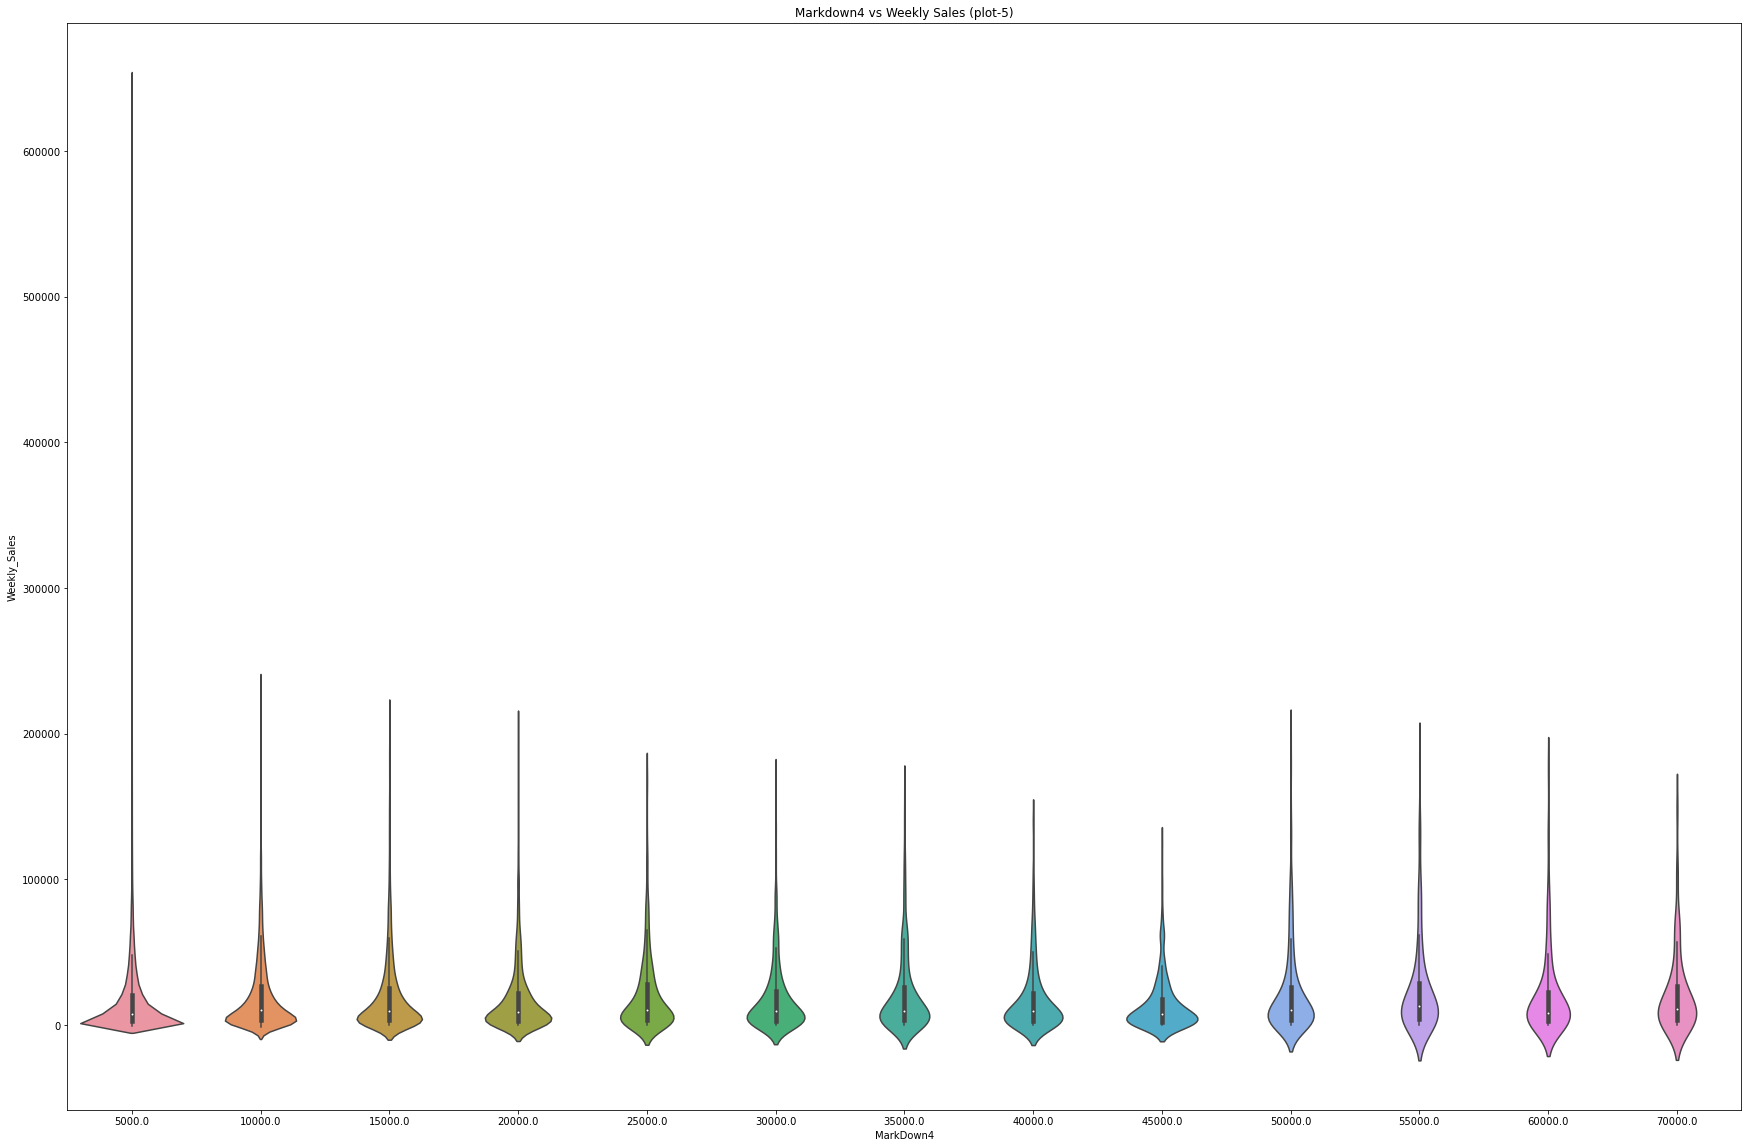

In [568]:
# Violin plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.violinplot(x=new_df_markdown1['Markdown4_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown4')
plt.ylabel('Weekly_Sales')
plt.title('Markdown4 vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, There are many smaller values and less larger values.
    2.From plot-2, When Markdown3 value is low then we can see high total weekly sales.
    3.From plot-3, When Markdown3 value is high then we can see slightly high average weekly sales.
    4.From plot-4, When Markdown value is low. We can see high weekly sale.
    5.We don't see much relationship with weekly sales.

##### Markdown5

count    151432.000000
mean       4628.975079
std        5962.887455
min         135.160000
25%        1878.440000
50%        3359.450000
75%        5563.800000
max      108519.280000
Name: MarkDown5, dtype: float64


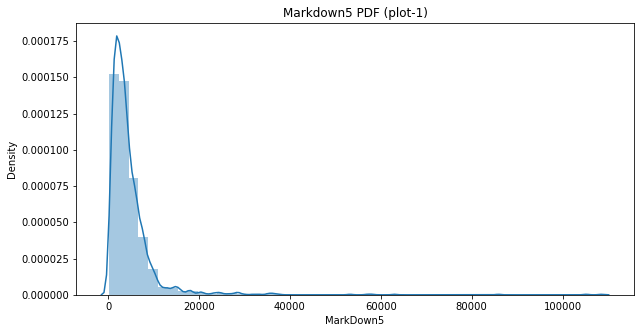

In [541]:
print(df['MarkDown5'].describe())
plt.figure(figsize=(10,5))
sns.distplot(df['MarkDown5'])
plt.title('Markdown5 PDF (plot-1)')
plt.show()

In [434]:
print('Min value of markdown5: ', new_df_markdown1['MarkDown5'].min())
print('Max value of markdown5: ', new_df_markdown1['MarkDown5'].max())

Min value of markdown5:  135.16
Max value of markdown5:  108519.28


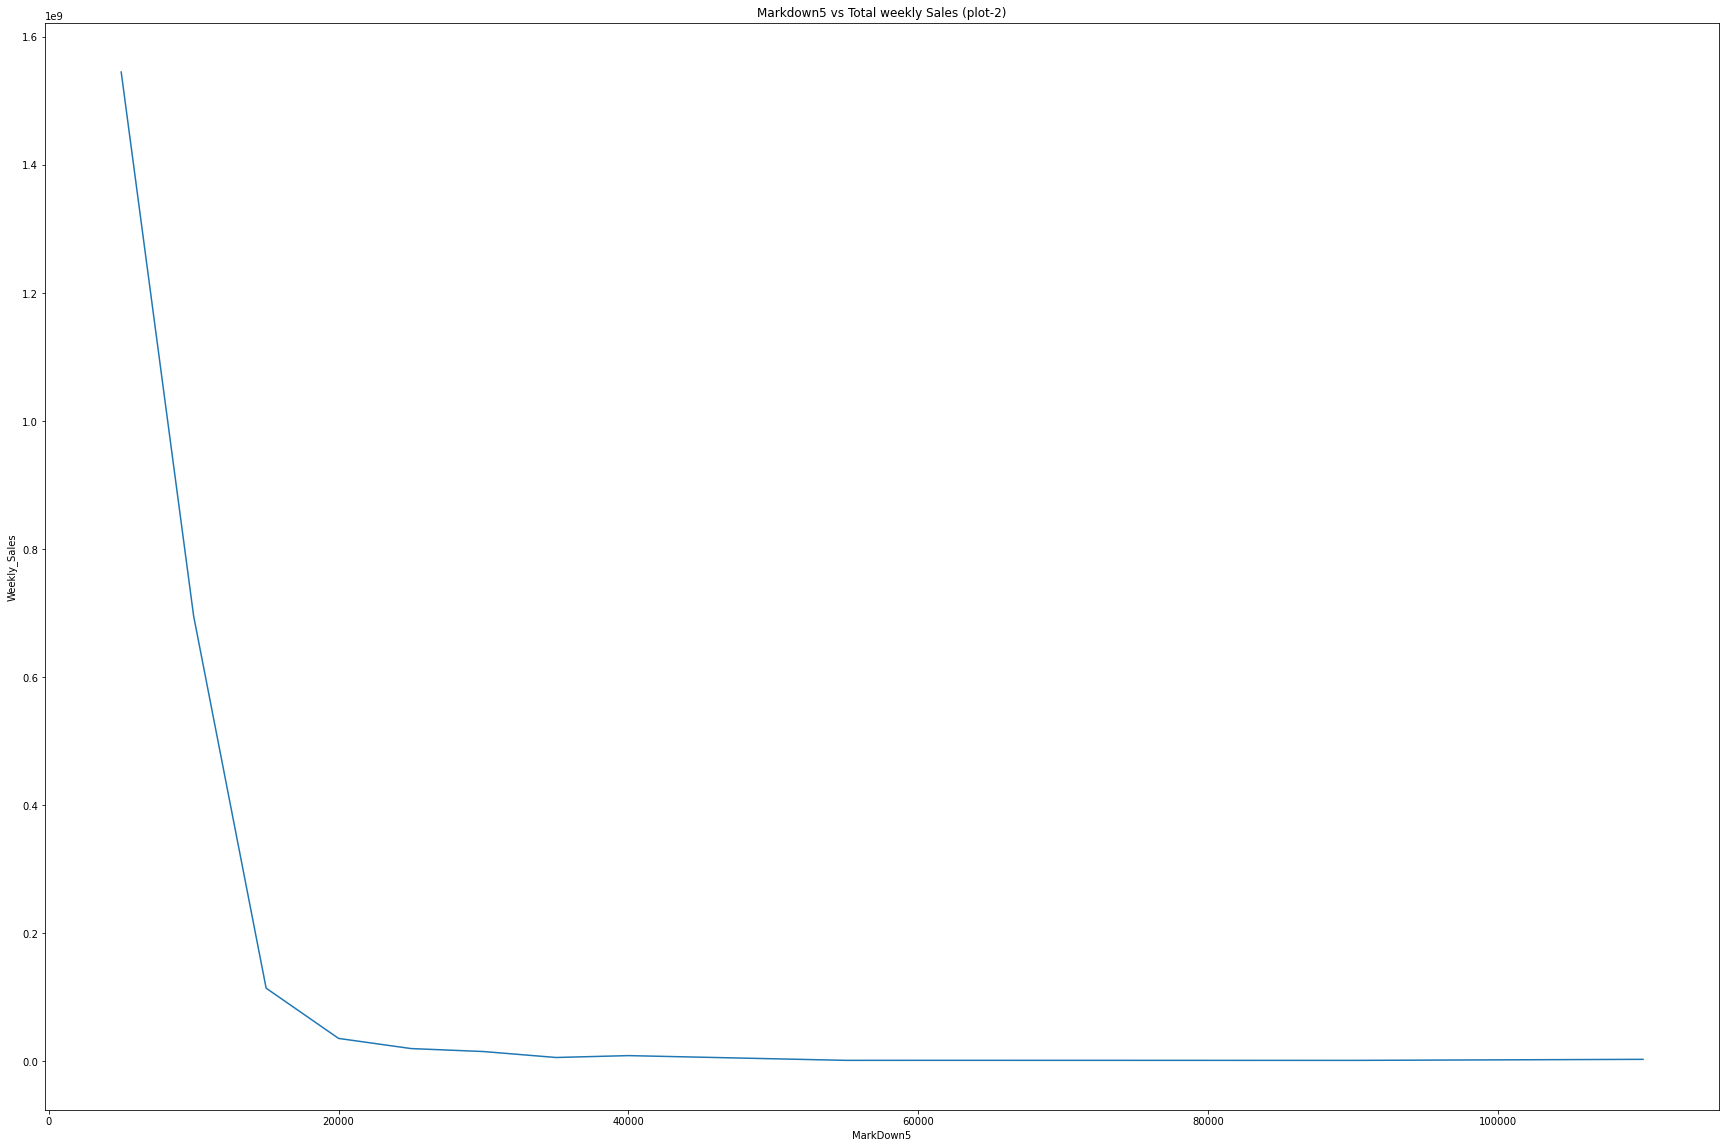

In [573]:
# Grouping Markdown4 categories and plotting total weekly sales.
df1 = new_df_markdown1.groupby('Markdown5_Cat')['Weekly_Sales'].sum()
plt.figure(figsize=(30,20))
df1.plot()
plt.xlabel('MarkDown5')
plt.ylabel('Weekly_Sales')
plt.title('Markdown5 vs Total weekly Sales (plot-2)')
plt.show()

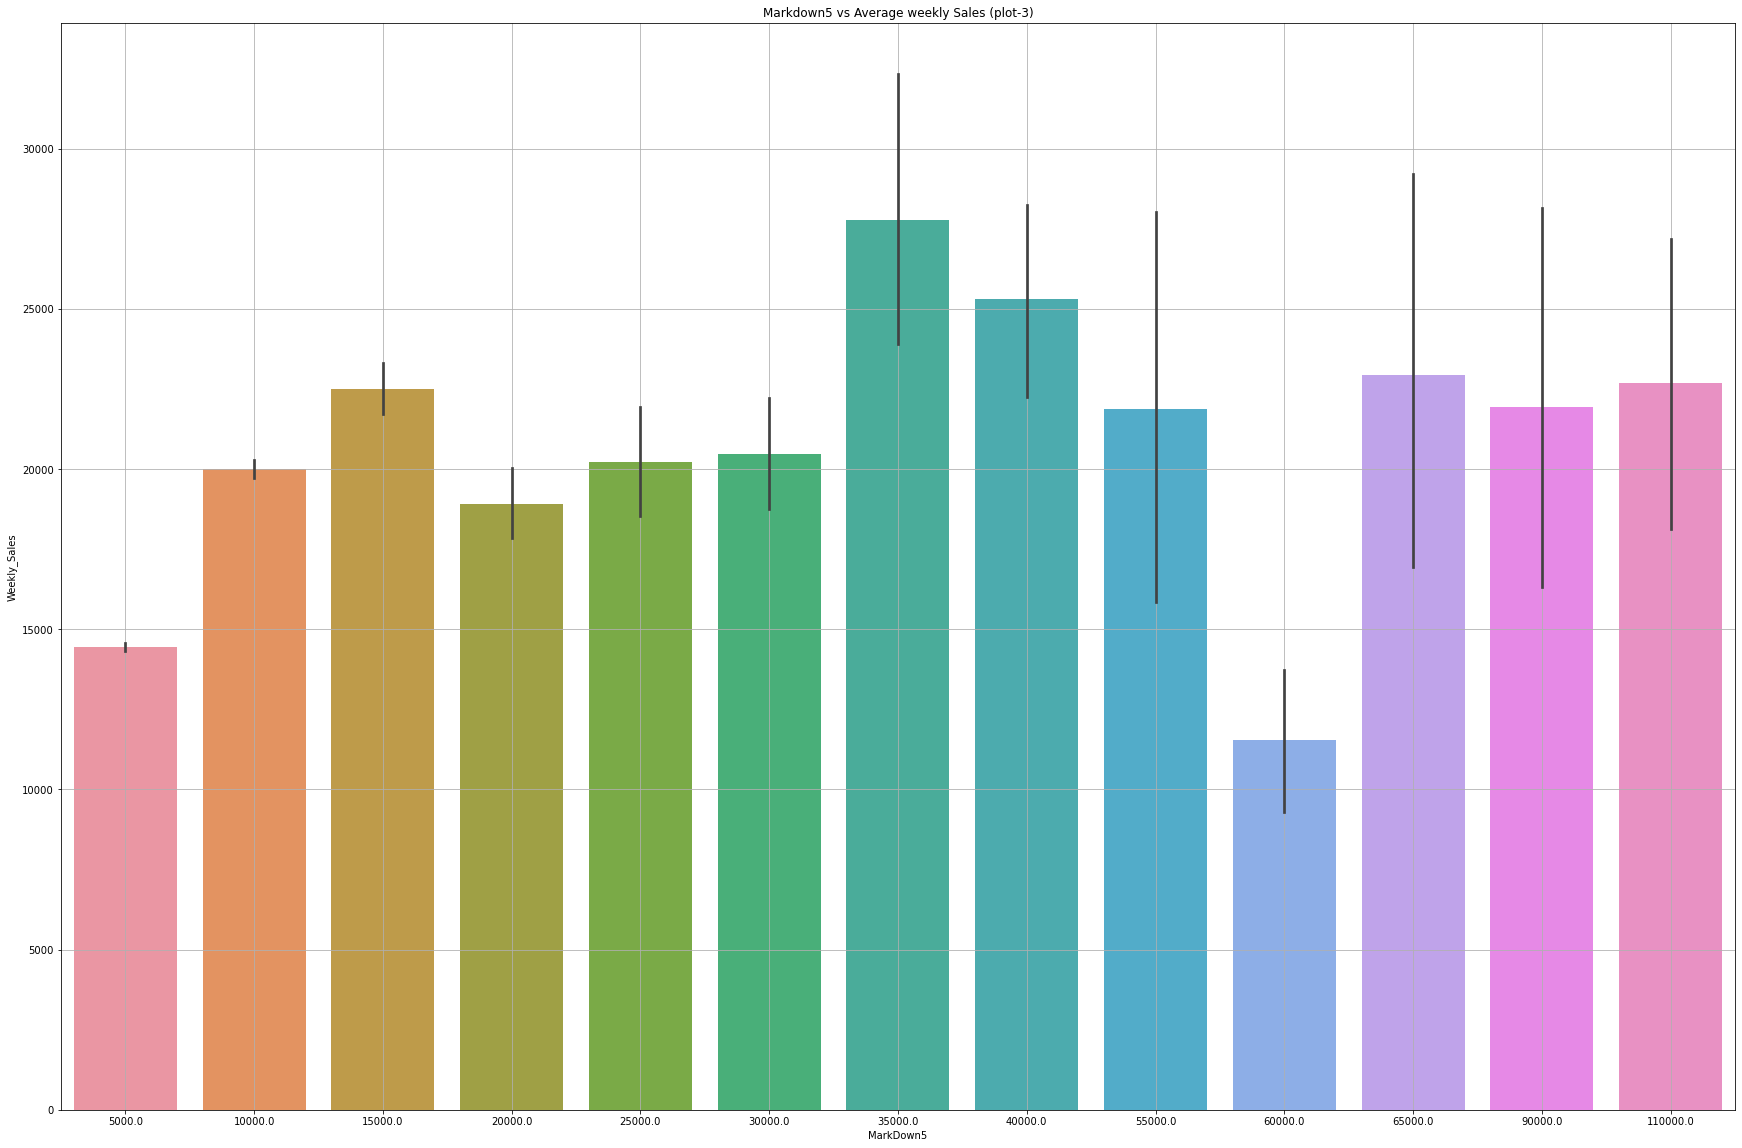

In [574]:
# Bar plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.barplot(x=new_df_markdown1['Markdown5_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.grid()
plt.xlabel('MarkDown5')
plt.ylabel('Weekly_Sales')
plt.title('Markdown5 vs Average weekly Sales (plot-3)')
plt.show()

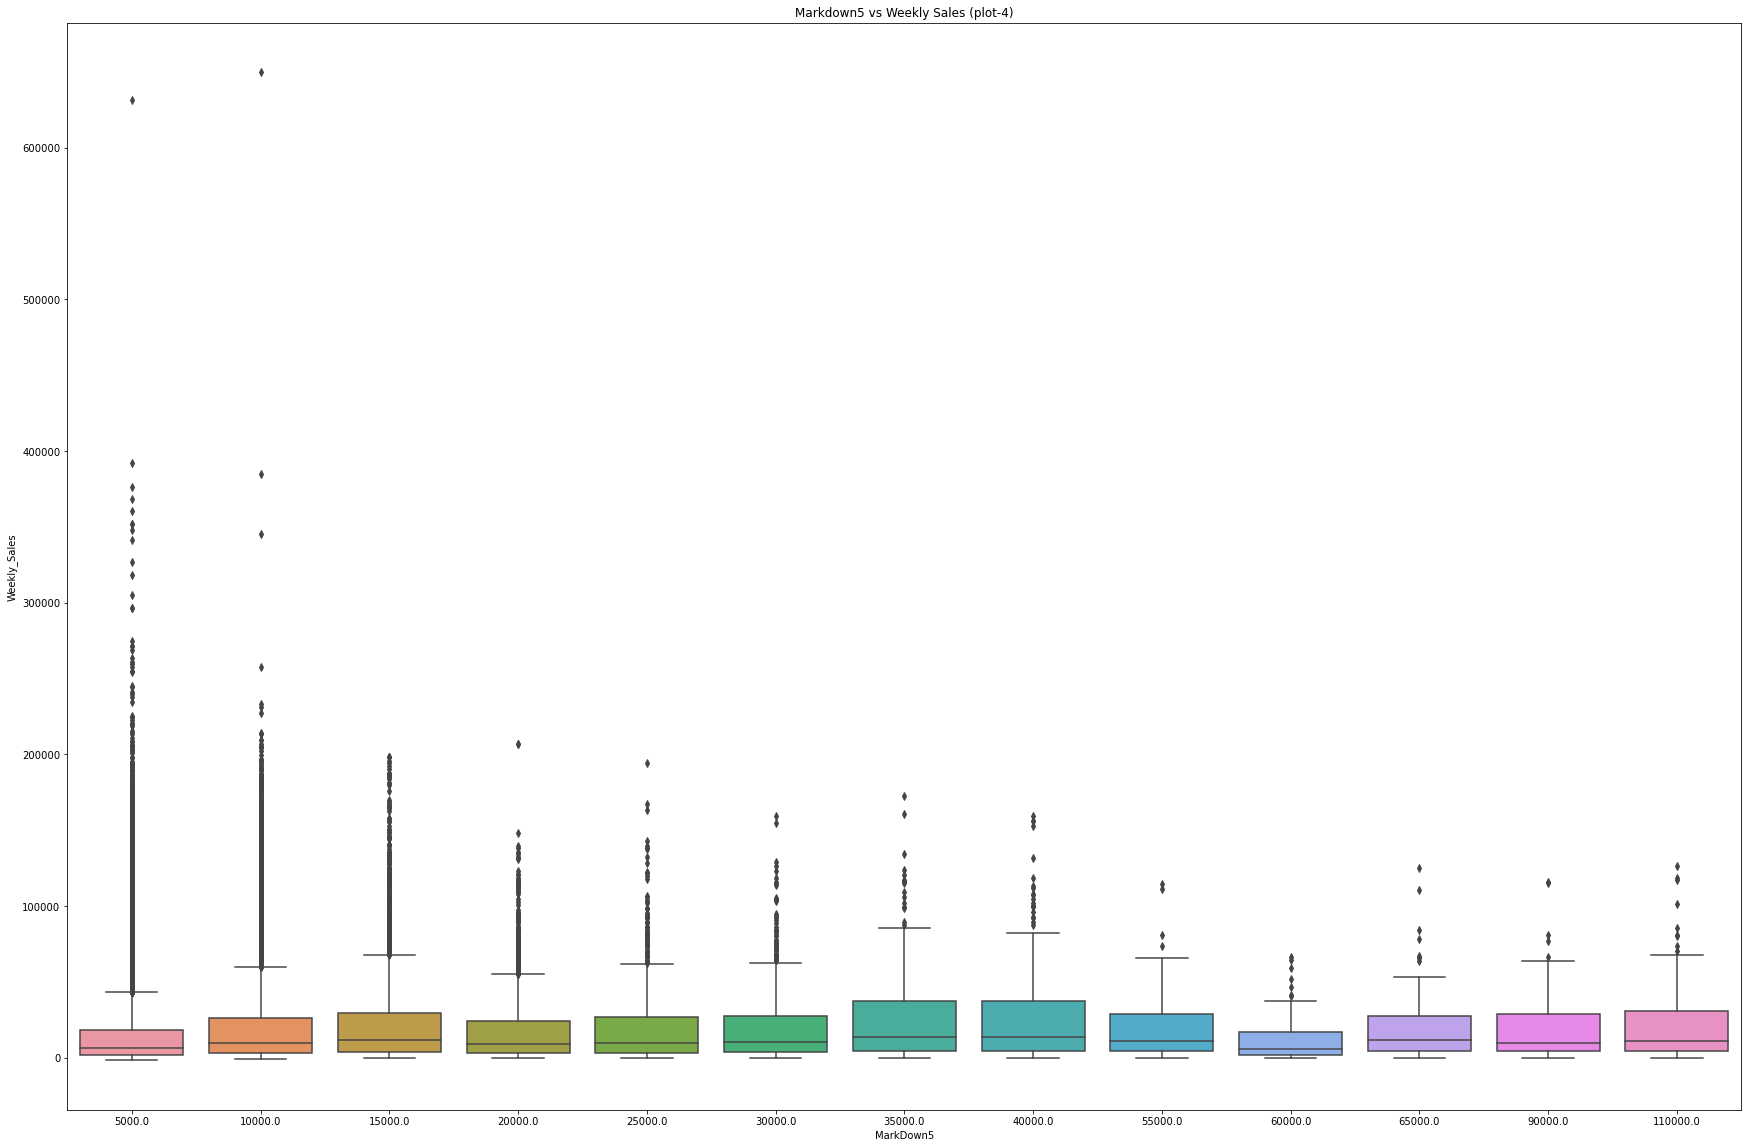

In [575]:
# Box plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.boxplot(x=new_df_markdown1['Markdown5_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown5')
plt.ylabel('Weekly_Sales')
plt.title('Markdown5 vs Weekly Sales (plot-4)')
plt.show()

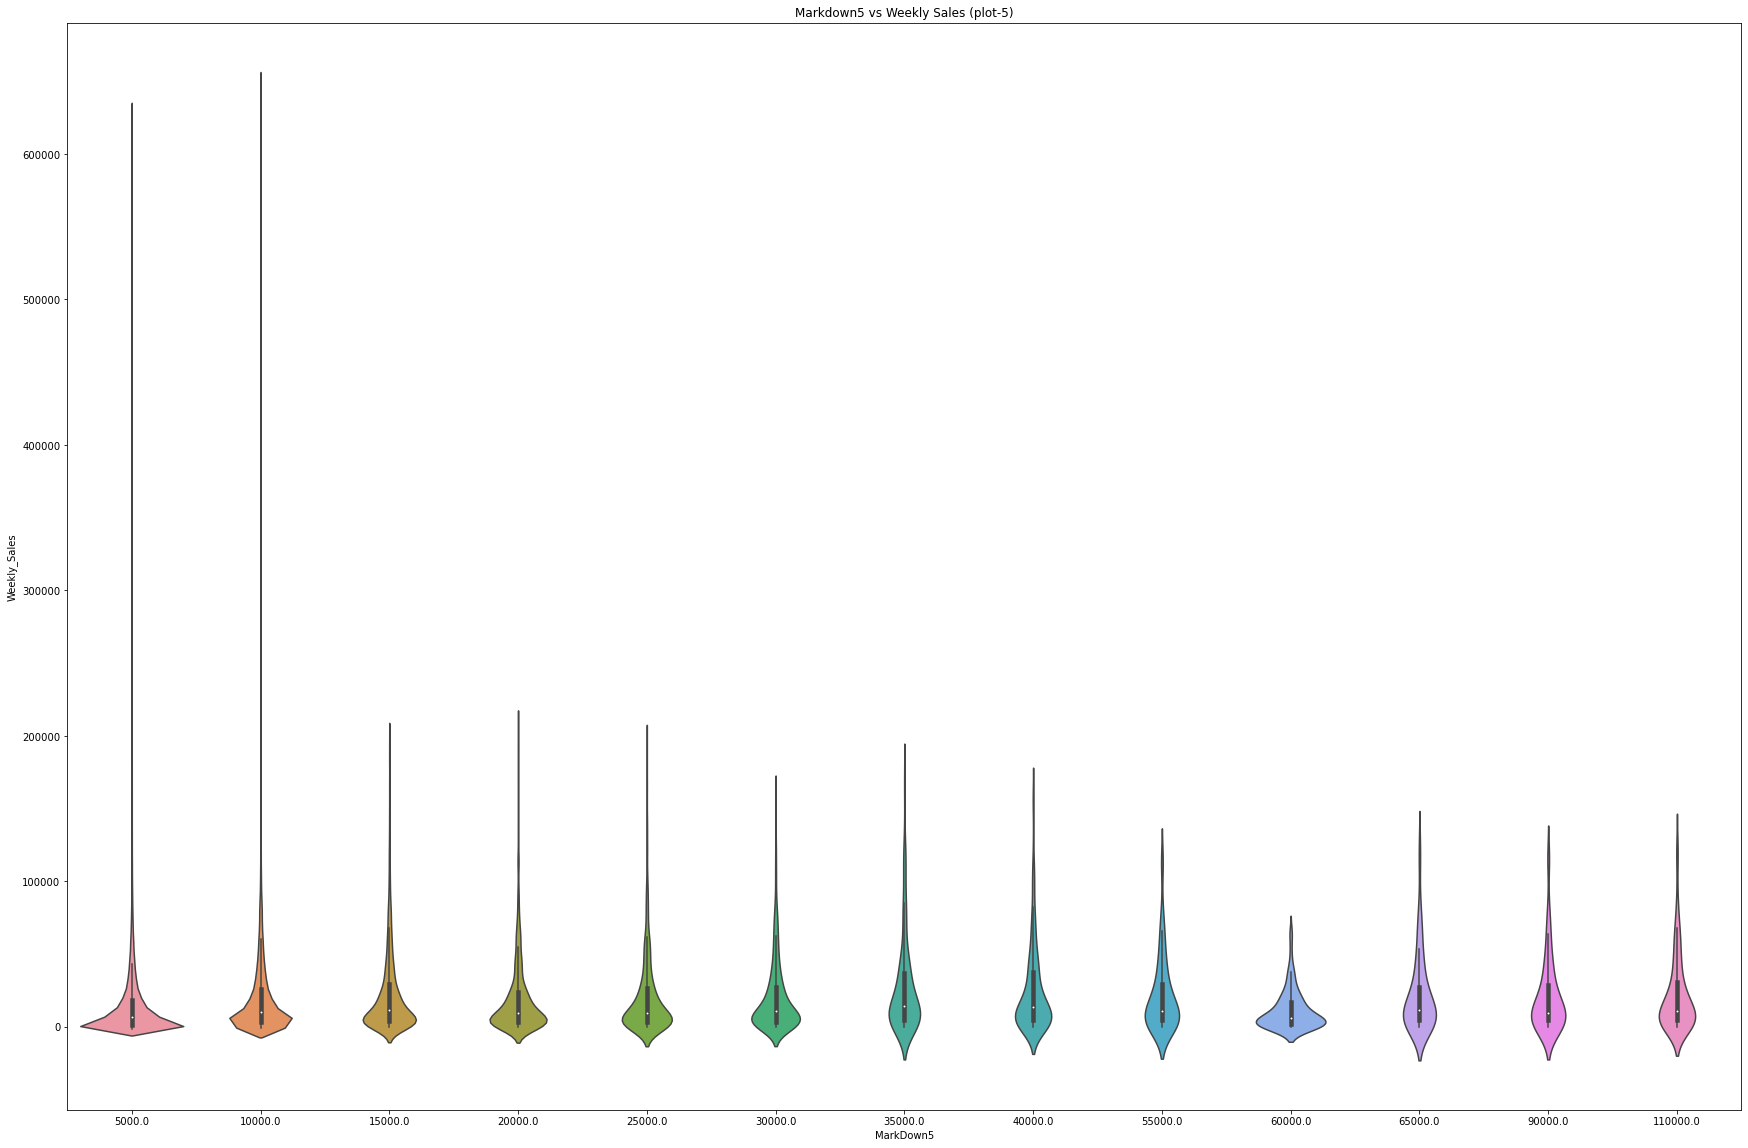

In [576]:
# Violin plot of weekly sales over Markdown4 categories.
plt.figure(figsize=(30,20))
sns.violinplot(x=new_df_markdown1['Markdown5_Cat'],y=new_df_markdown1['Weekly_Sales'])
plt.xlabel('MarkDown5')
plt.ylabel('Weekly_Sales')
plt.title('Markdown5 vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, There are many smaller values and less larger values.
    2.From plot-2, When Markdown5 value is low then we can see high total weekly sales.
    2.From plot-3, When Markdown5 value is moderate then we can see high average weekly sales.
    3.From plot-4, When Markdown value is low. We can see high weekly sale.
    4.From plot-4, Interquantile range of weekly sales for average markdown values are larger than lower or 
      higher markdown values.
    5.Markdown5 is impacting the weekly sales.
    6.From plot-5, There are skewness in each markdown5 i.e. outliers present in each markdown5 values calegory.

#### 12. CPI

In [338]:
df['CPI'].describe()

count    421570.000000
mean        171.201947
std          39.159276
min         126.064000
25%         132.022667
50%         182.318780
75%         212.416993
max         227.232807
Name: CPI, dtype: float64

<AxesSubplot:xlabel='CPI', ylabel='Density'>

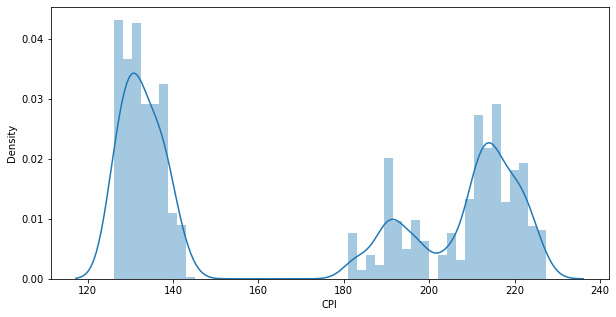

In [167]:
plt.figure(figsize=(10,5))
sns.distplot(df['CPI'])

Text(0.5, 1.0, 'Weekly_sales vs CPI')

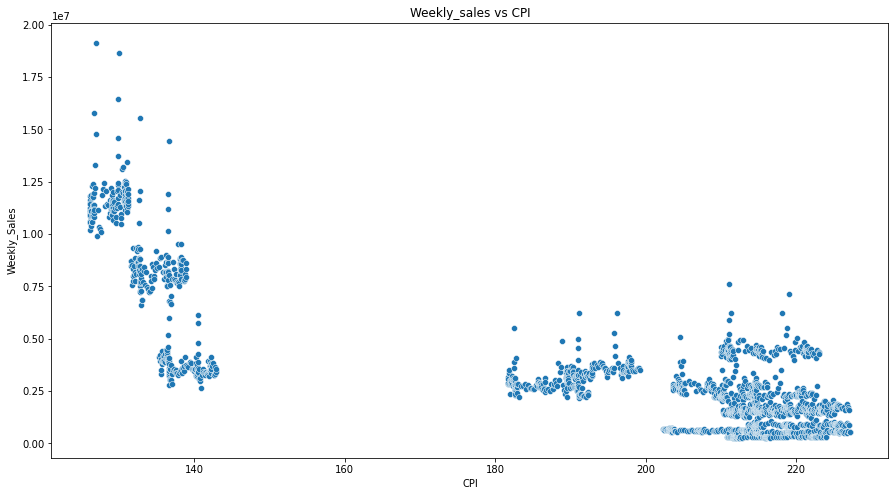

In [254]:
df1 = df.groupby('CPI')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.scatterplot(x=df1['CPI'],y=df1['Weekly_Sales'])
plt.xlabel('CPI')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_sales vs CPI')

#### Observation:
    1.Maximun CPI values are between 125 to 140.
    2.CPI between 150 to 175 there are no datapoints i.e. no sales between 150 to 175.
    3.Weekly sales values are high when CPI is low i.e. less than 150.
    4.Weekly sales values are low when CPI is high i.e. more than 180.
    5.Mean of CPI is 171.2 and Median of CPI is 182.3. We can not impute mean or median to null values because 
      there is no sales between 150 to 175 CPI.

#### 13. Unemployment

In [339]:
df['Unemployment'].describe()

count    421570.000000
mean          7.960289
std           1.863296
min           3.879000
25%           6.891000
50%           7.866000
75%           8.572000
max          14.313000
Name: Unemployment, dtype: float64

<AxesSubplot:xlabel='Unemployment', ylabel='Density'>

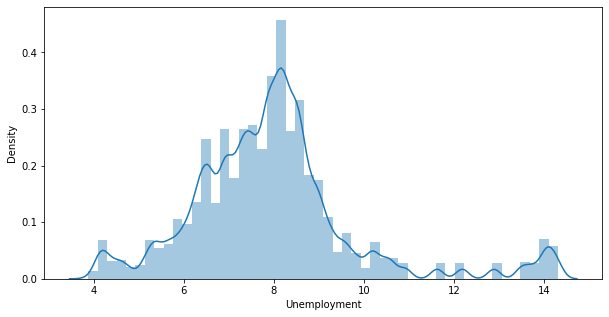

In [45]:
plt.figure(figsize=(10,5))
sns.distplot(df['Unemployment'])

Text(0.5, 1.0, 'Weekly_sales vs Unemployment')

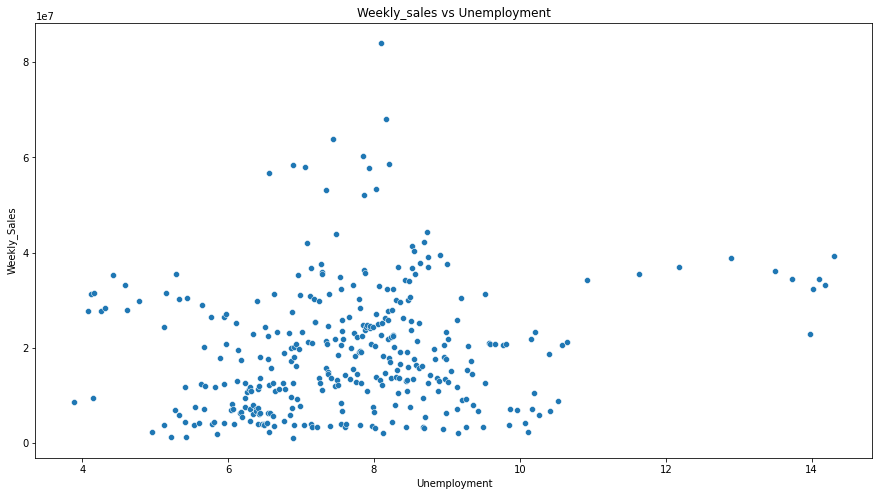

In [255]:
df1 = df.groupby('Unemployment')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.scatterplot(x=df1['Unemployment'],y=df1['Weekly_Sales'])
plt.xlabel('Unemployment')
plt.ylabel('Weekly_Sales')
plt.title('Weekly_sales vs Unemployment')

##### Observation:
    1.Most unemployment values are near 8 therefore high Weekly sales when unemployment values are near 8.
    2.Mean of unemployment is 7.96 and median is 7.86. We can impute mean or median because high Weekly sales 
      when unemployment values are near 8

#### 14. Type

Unique Store types are:  ['A' 'B' 'C']
Value counts of Type:
  index    Type
0     A  215478
1     B  163495
2     C   42597


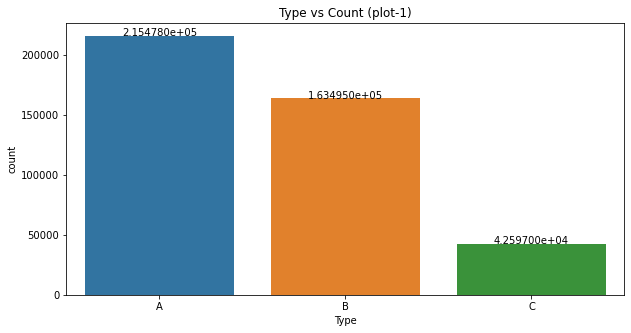

In [577]:
# Type vs Counts
print('Unique Store types are: ',np.unique(df['Type']))
print('Value counts of Type:')
x = df['Type'].value_counts().reset_index()
print(x)
plt.figure(figsize=(10,5))
ax = sns.countplot(df['Type'])
for index, row in x.iterrows():
    ax.text(row.name, row.Type, "{:e}".format(row.Type), ha="center")
plt.title('Type vs Count (plot-1)')
plt.show()

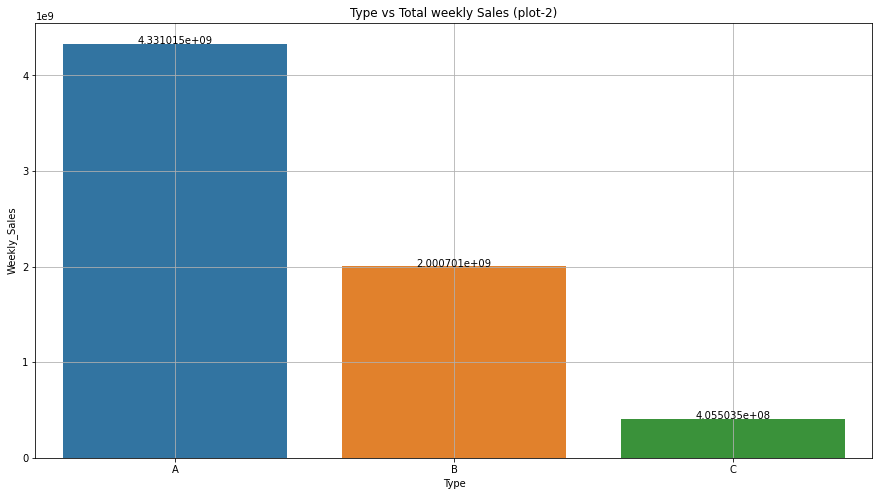

In [583]:
# Grouping Type and plotting total weekly sales.
df1 = df.groupby('Type')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
ax = sns.barplot(x=df1['Type'],y=df1['Weekly_Sales'])
# https://www.codegrepper.com/code-examples/whatever/display+values+on+top+of+seaborn+bar+plot#:~:text=%E2%80%9Cdisplay%20values%20on%20top%20of%20seaborn%20bar%20plot%E2%80%9D%20Code%20Answer
for index, row in df1.iterrows():
    ax.text(row.name, row.Weekly_Sales, "{:e}".format(row.Weekly_Sales), ha="center")
plt.xlabel('Type')
plt.ylabel('Weekly_Sales')
plt.grid()
plt.title('Type vs Total weekly Sales (plot-2)')
plt.show()

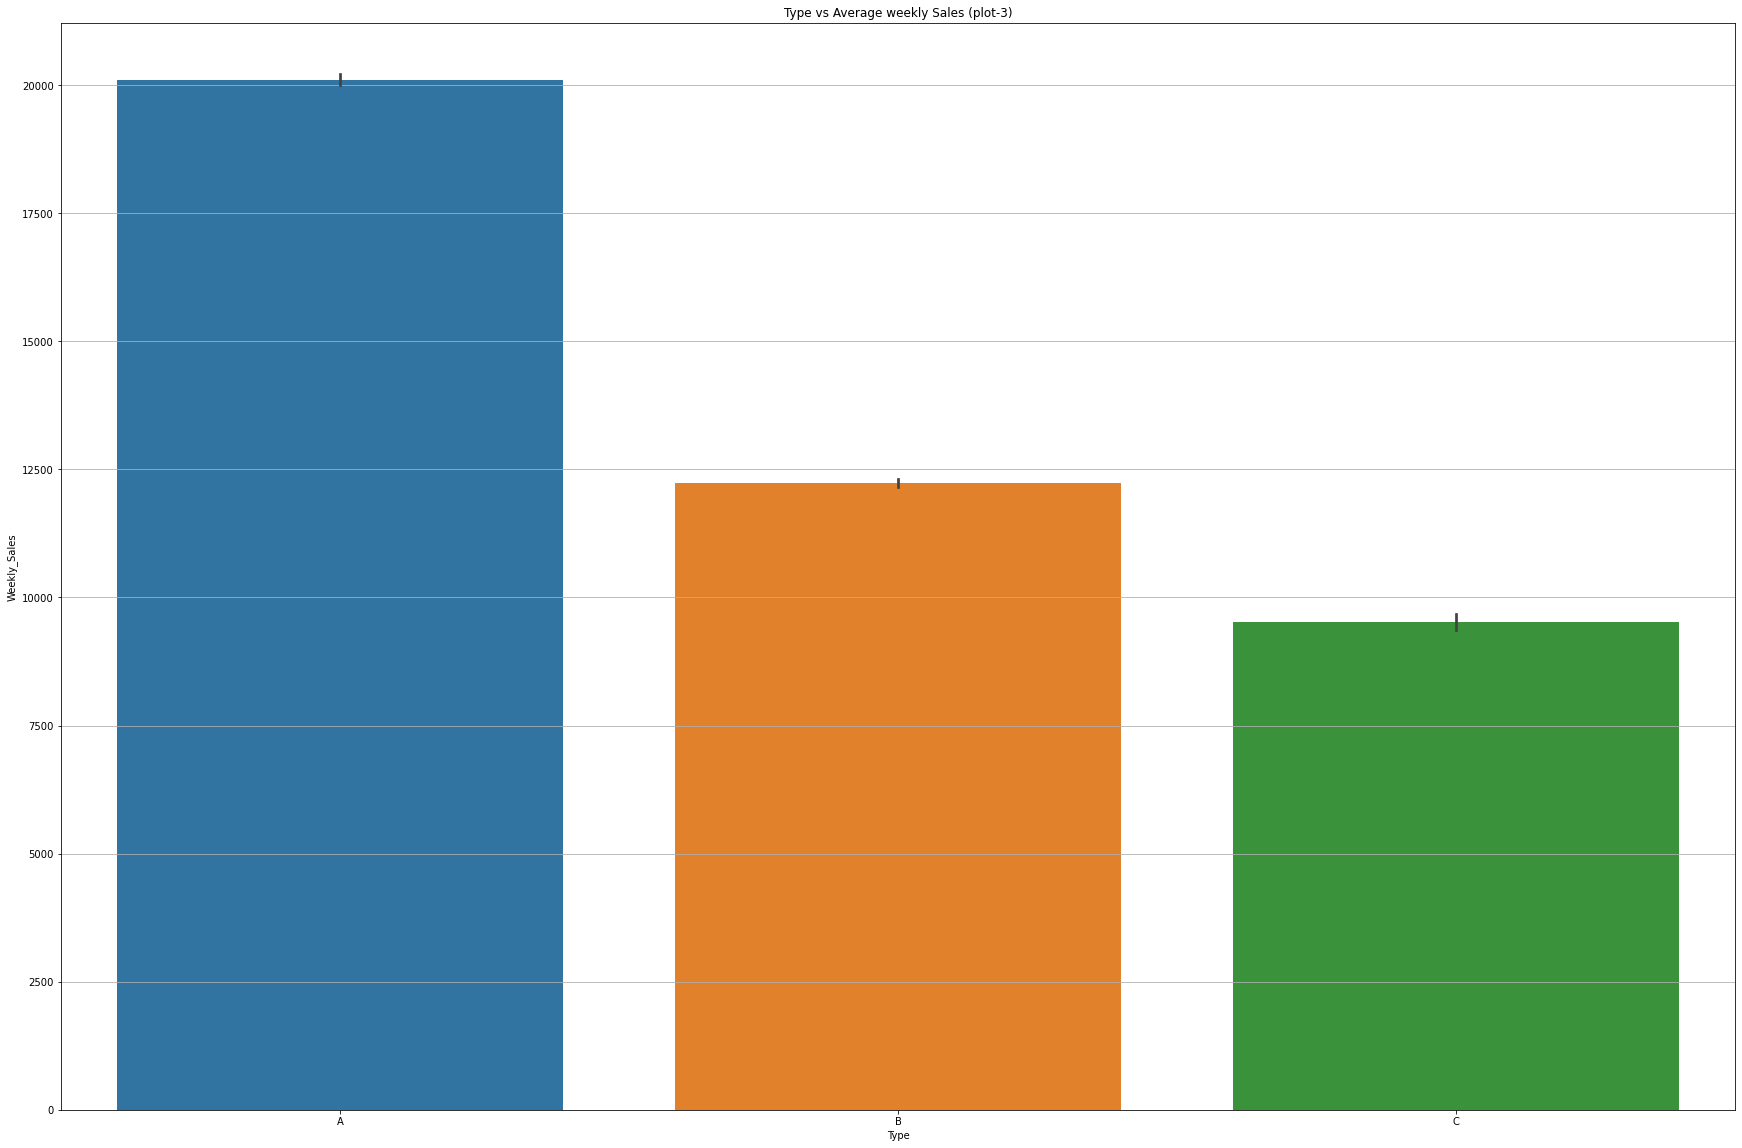

In [580]:
# Bar plot of Type vs weekly sales(Average)
plt.figure(figsize=(30,20))
plt.grid()
ax = sns.barplot(x=df['Type'],y=df['Weekly_Sales'])
plt.title('Type vs Average weekly Sales (plot-3)')
plt.show()

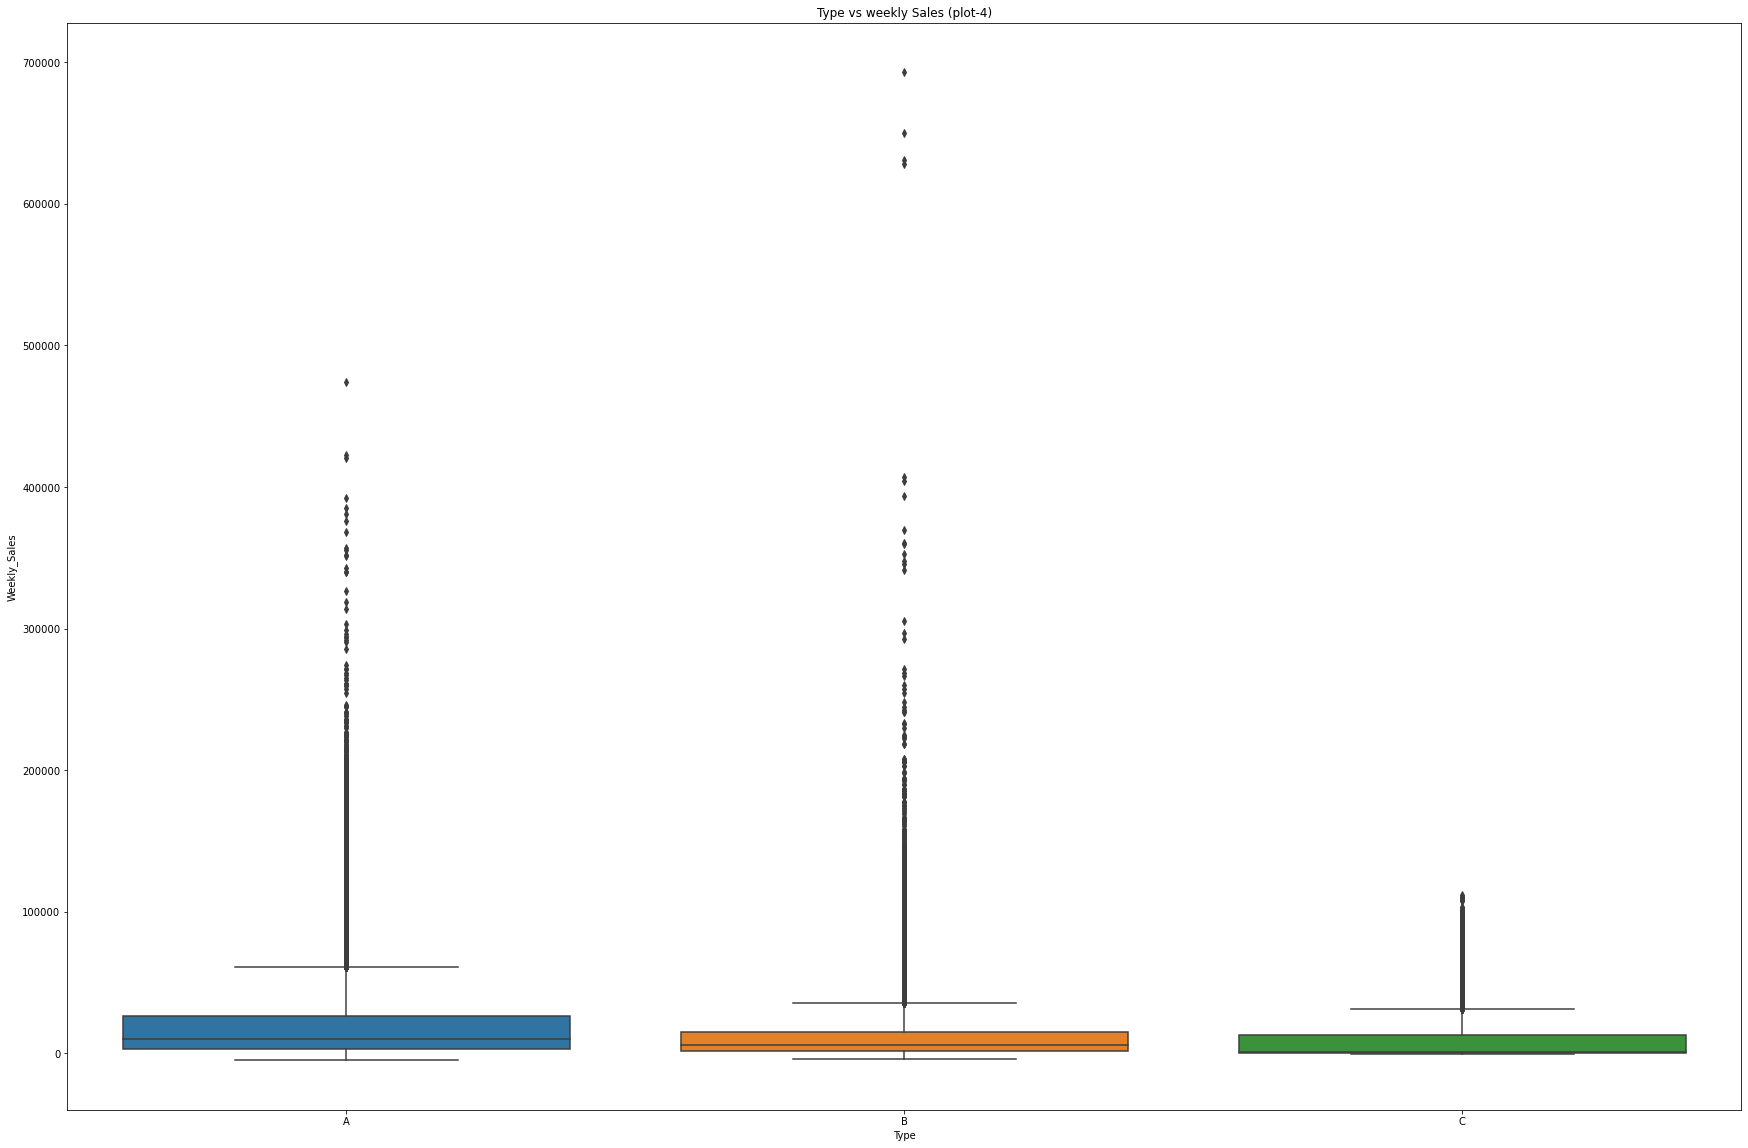

In [581]:
# Box plot of weekly sales over Type.
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Type'],y=df['Weekly_Sales'])
plt.title('Type vs weekly Sales (plot-4)')
plt.show()

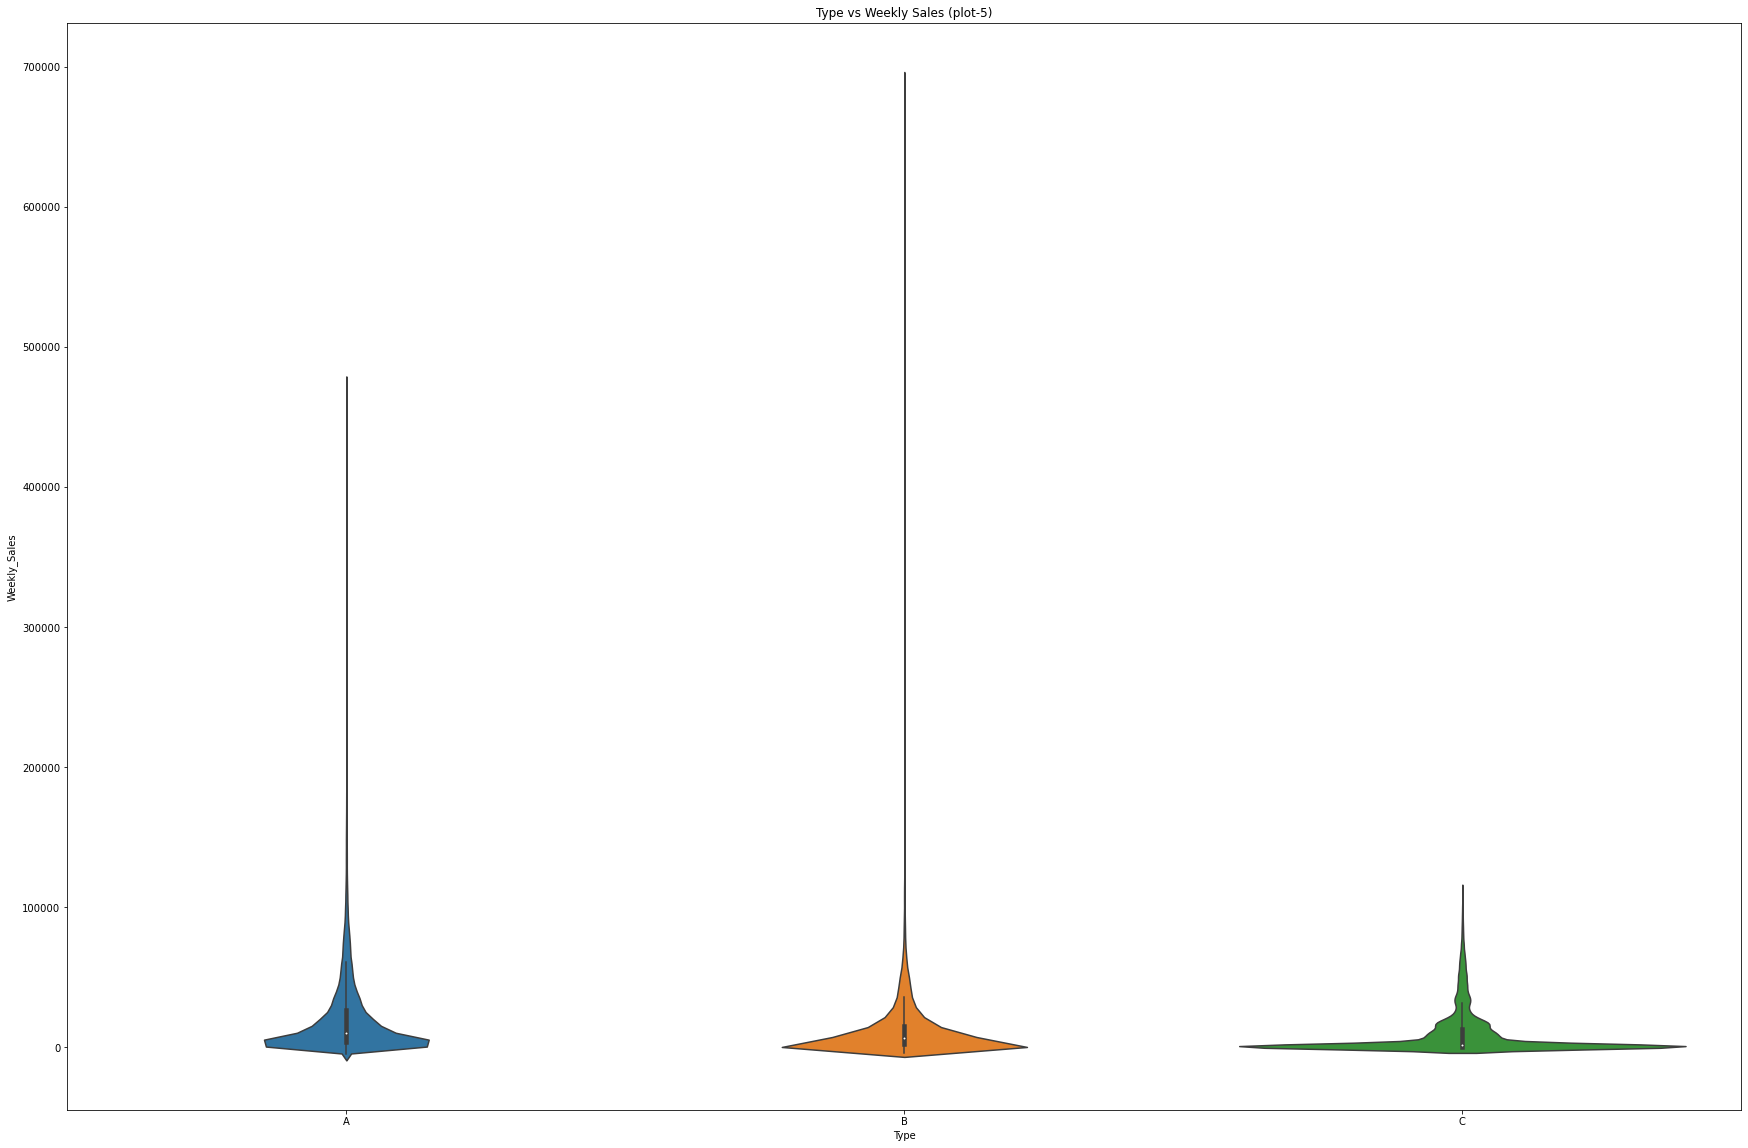

In [582]:
# Violin plot of weekly sales over Type.
plt.figure(figsize=(30,20))
sns.violinplot(x=df['Type'],y=df['Weekly_Sales'])
plt.title('Type vs Weekly Sales (plot-5)')
plt.show()

#### Observation:
    1.From plot-1, There are many stores of type A and less stores of type C.
    2.From plot-1&plot-2, number of Type A stores is around 1.3 times of Type B and 5 times of Type C stores.
      Total Weekly sales of Type A store is around 2 times of Type B and 10 times of Type C store. It means 
      Type A store is making good total weekly sales then Type B and Type C stores.
    3.From plot-3, Average weekly sales of Type C is around 80% of Type B but total weekly sales of type C is only
      25% of Type B.
    3.From plot-4, Median of weekly sales for each Type of store is different. Type A has higher median value.
    4.From plot-5, many weekly sales of type C store are 0 or close to 0 campared to type a and type b stores.
    5.From plot-5, There are few stores in type b where weekly sales are higher than 50,000 which is not in type a and type c.
    6.From plot-5, Weekly sales of Type C has less number of outliers compared to type a and type b.
    7.From plot-5, Weekly sales of Type b has more outliers compared to type a and type c.
    6.Hence we can say Type is an important feature.

#### 15. Size

Unique Store types are:  [ 34875  37392  39690  39910  41062  42988  57197  70713  93188  93638
 103681 112238 114533 118221 119557 120653 123737 125833 126512 128107
 140167 151315 152513 155078 155083 158114 184109 196321 200898 202307
 202505 203007 203742 203750 203819 204184 205863 206302 207499 219622]
Value counts of Type:
     index   Size
0    39690  20802
1    39910  20597
2   203819  20376
3   219622  10474
4   126512  10315
5   205863  10272
6   151315  10244
7   202307  10238
8   204184  10225
9   158114  10224
10  203742  10214
11  202505  10211
12  203007  10202
13  203750  10142
14  206302  10113
15  196321  10088
16  207499  10062
17  114533  10050
18  200898  10040
19  155083  10017
20  123737   9901
21  155078   9895
22  184109   9878
23   93188   9864
24  120653   9859
25  152513   9854
26  128107   9804
27   70713   9762
28  112238   9705
29  119557   9688
30  118221   9637
31  140167   9582
32  103681   9528
33   93638   9455
34   57197   9443
35   37392   9036
36

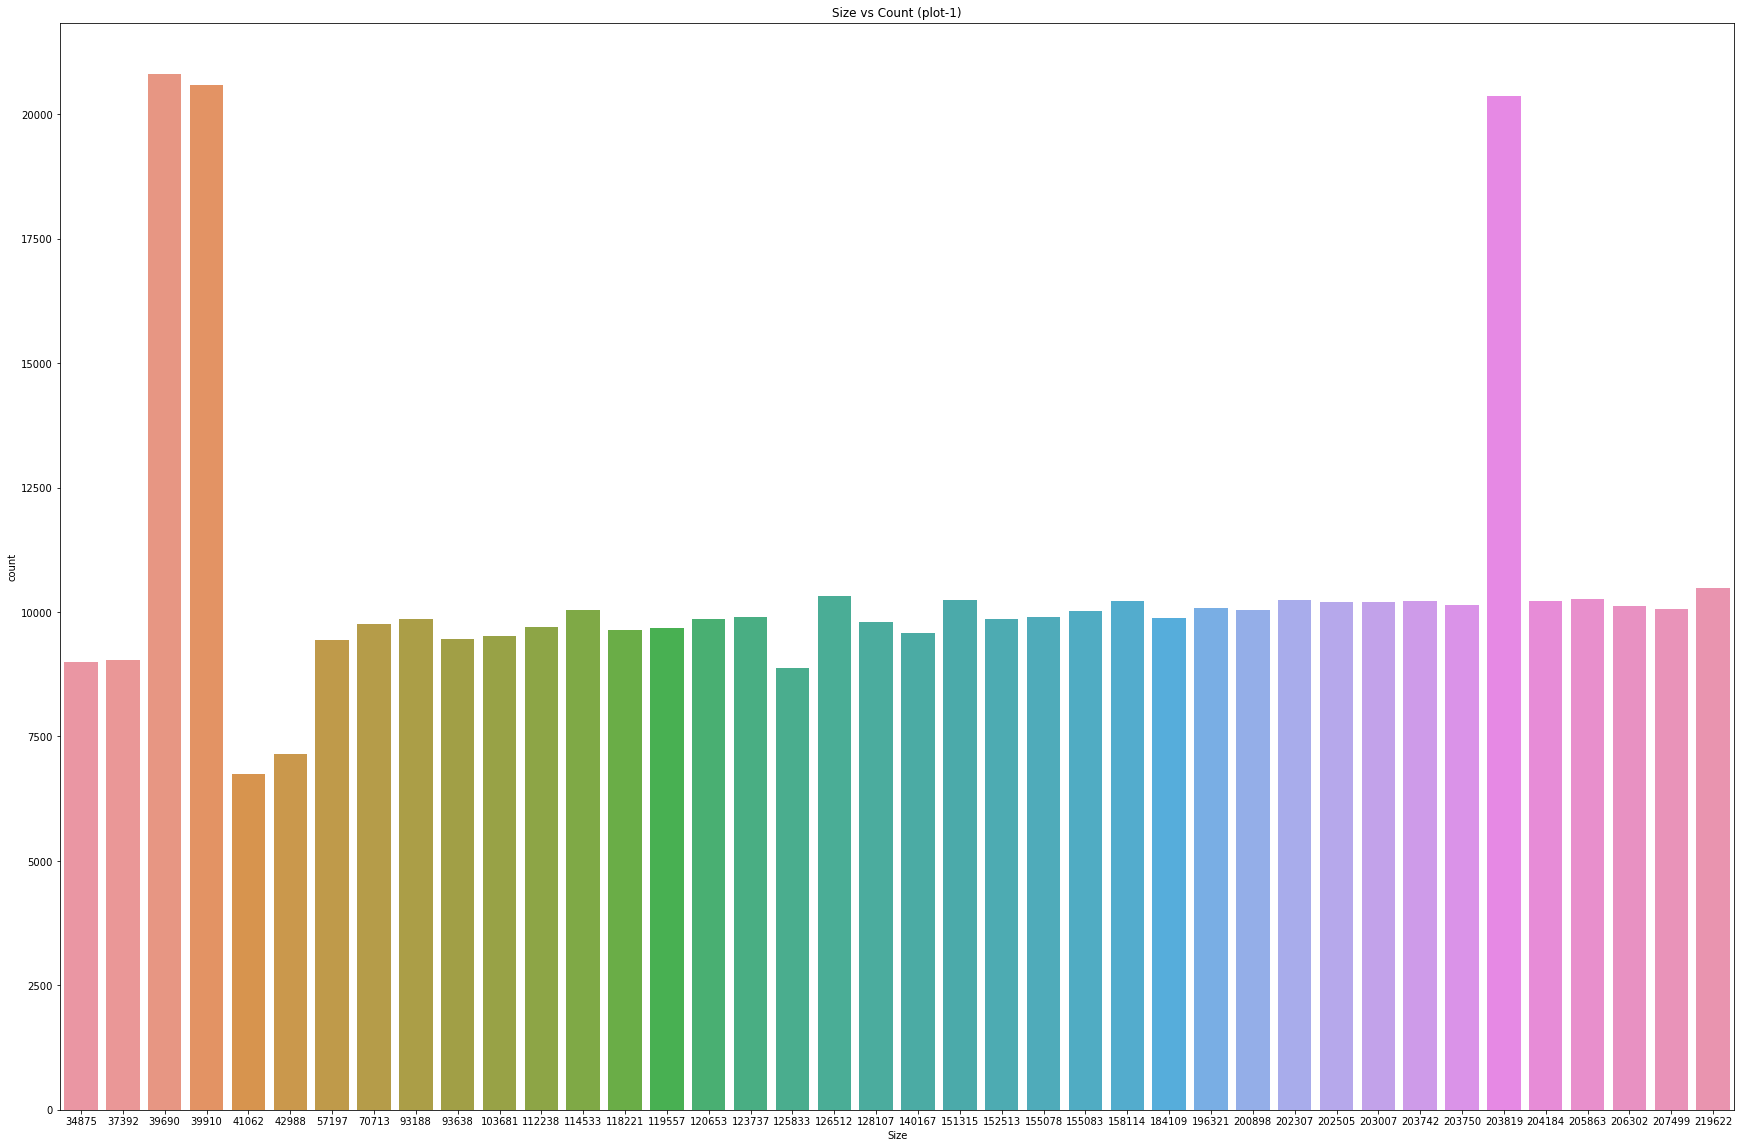

In [585]:
# Count plot of size
print('Unique Store types are: ',np.unique(df['Size']))
print('Value counts of Type:')
x = df['Size'].value_counts().reset_index()
print(x)
plt.figure(figsize=(30,20))
sns.countplot(df['Size'])
plt.title('Size vs Count (plot-1)')
plt.show()

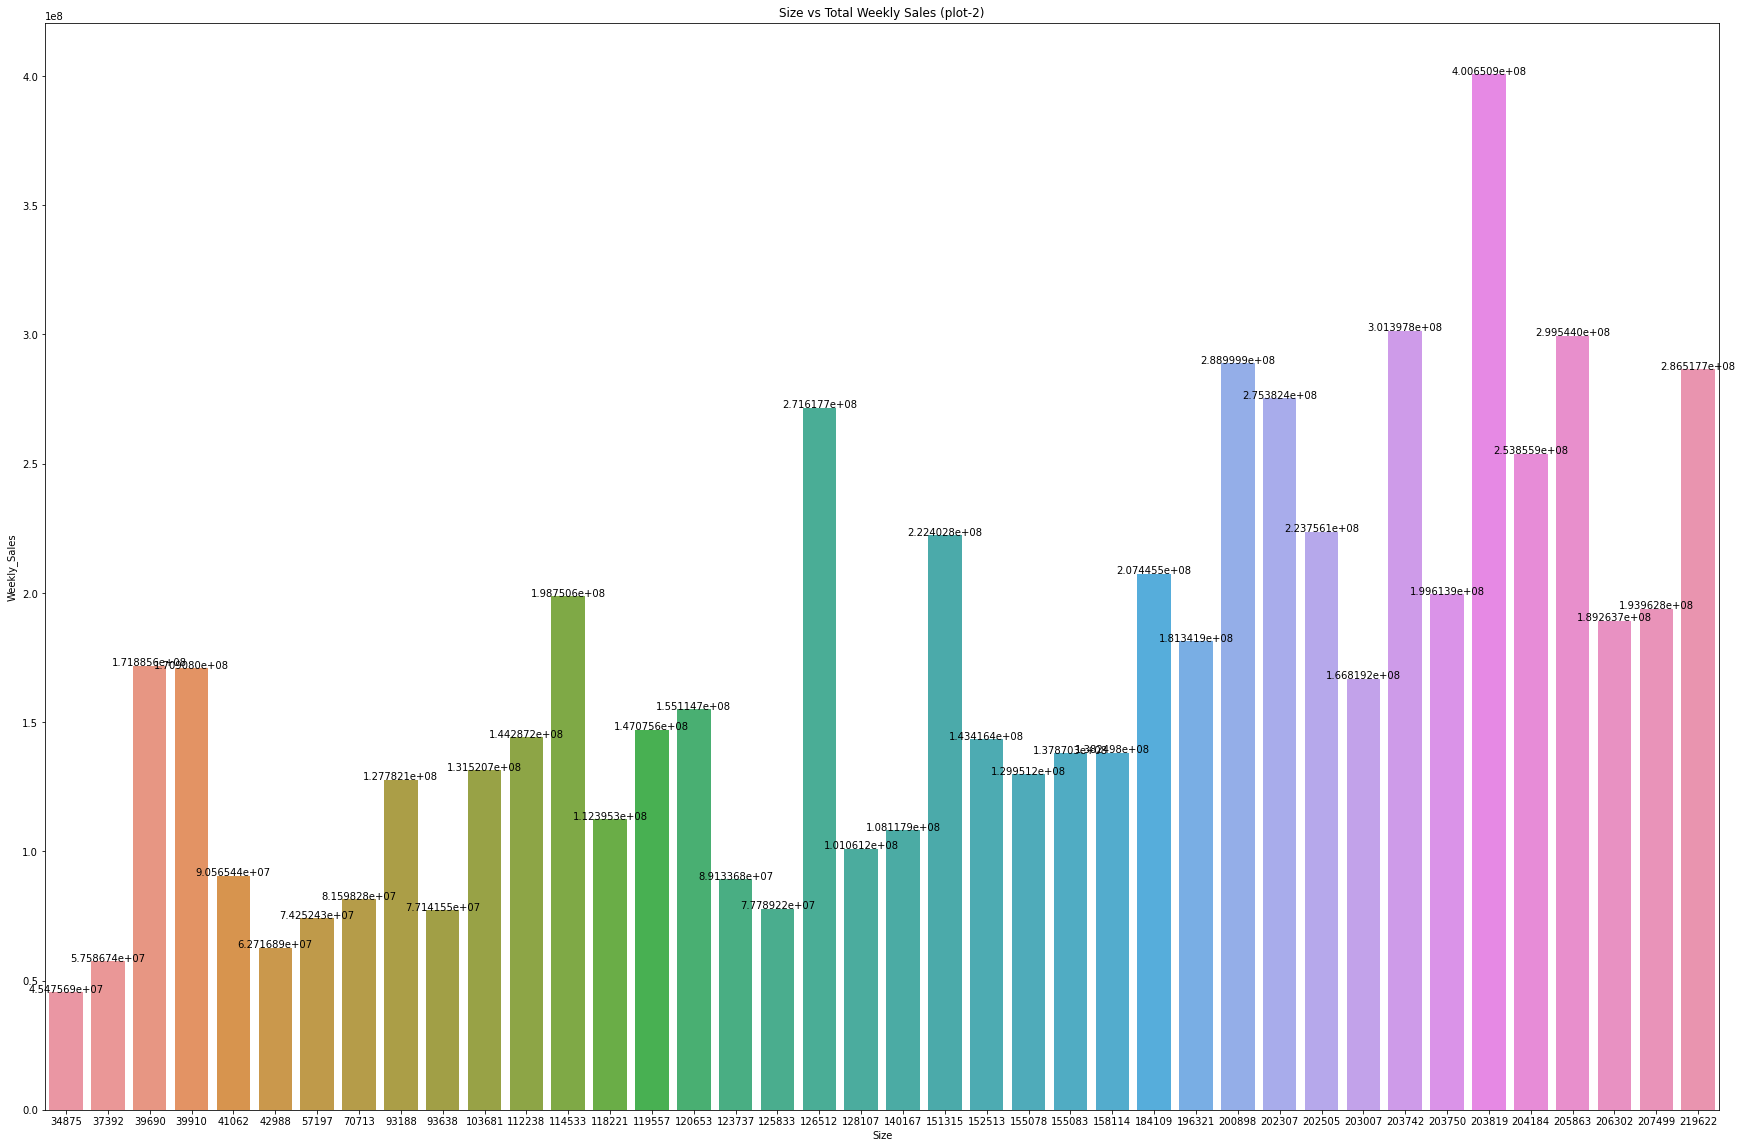

In [586]:
# Grouping size and plotting total weekly sales.
df1 = df.groupby('Size')['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
ax = sns.barplot(x=df1['Size'],y=df1['Weekly_Sales'])
# https://www.codegrepper.com/code-examples/whatever/display+values+on+top+of+seaborn+bar+plot#:~:text=%E2%80%9Cdisplay%20values%20on%20top%20of%20seaborn%20bar%20plot%E2%80%9D%20Code%20Answer
for index, row in df1.iterrows():
    ax.text(row.name, row.Weekly_Sales, "{:e}".format(row.Weekly_Sales), ha="center")
plt.xlabel('Size')
plt.ylabel('Weekly_Sales')
plt.title('Size vs Total Weekly Sales (plot-2)')
plt.show()

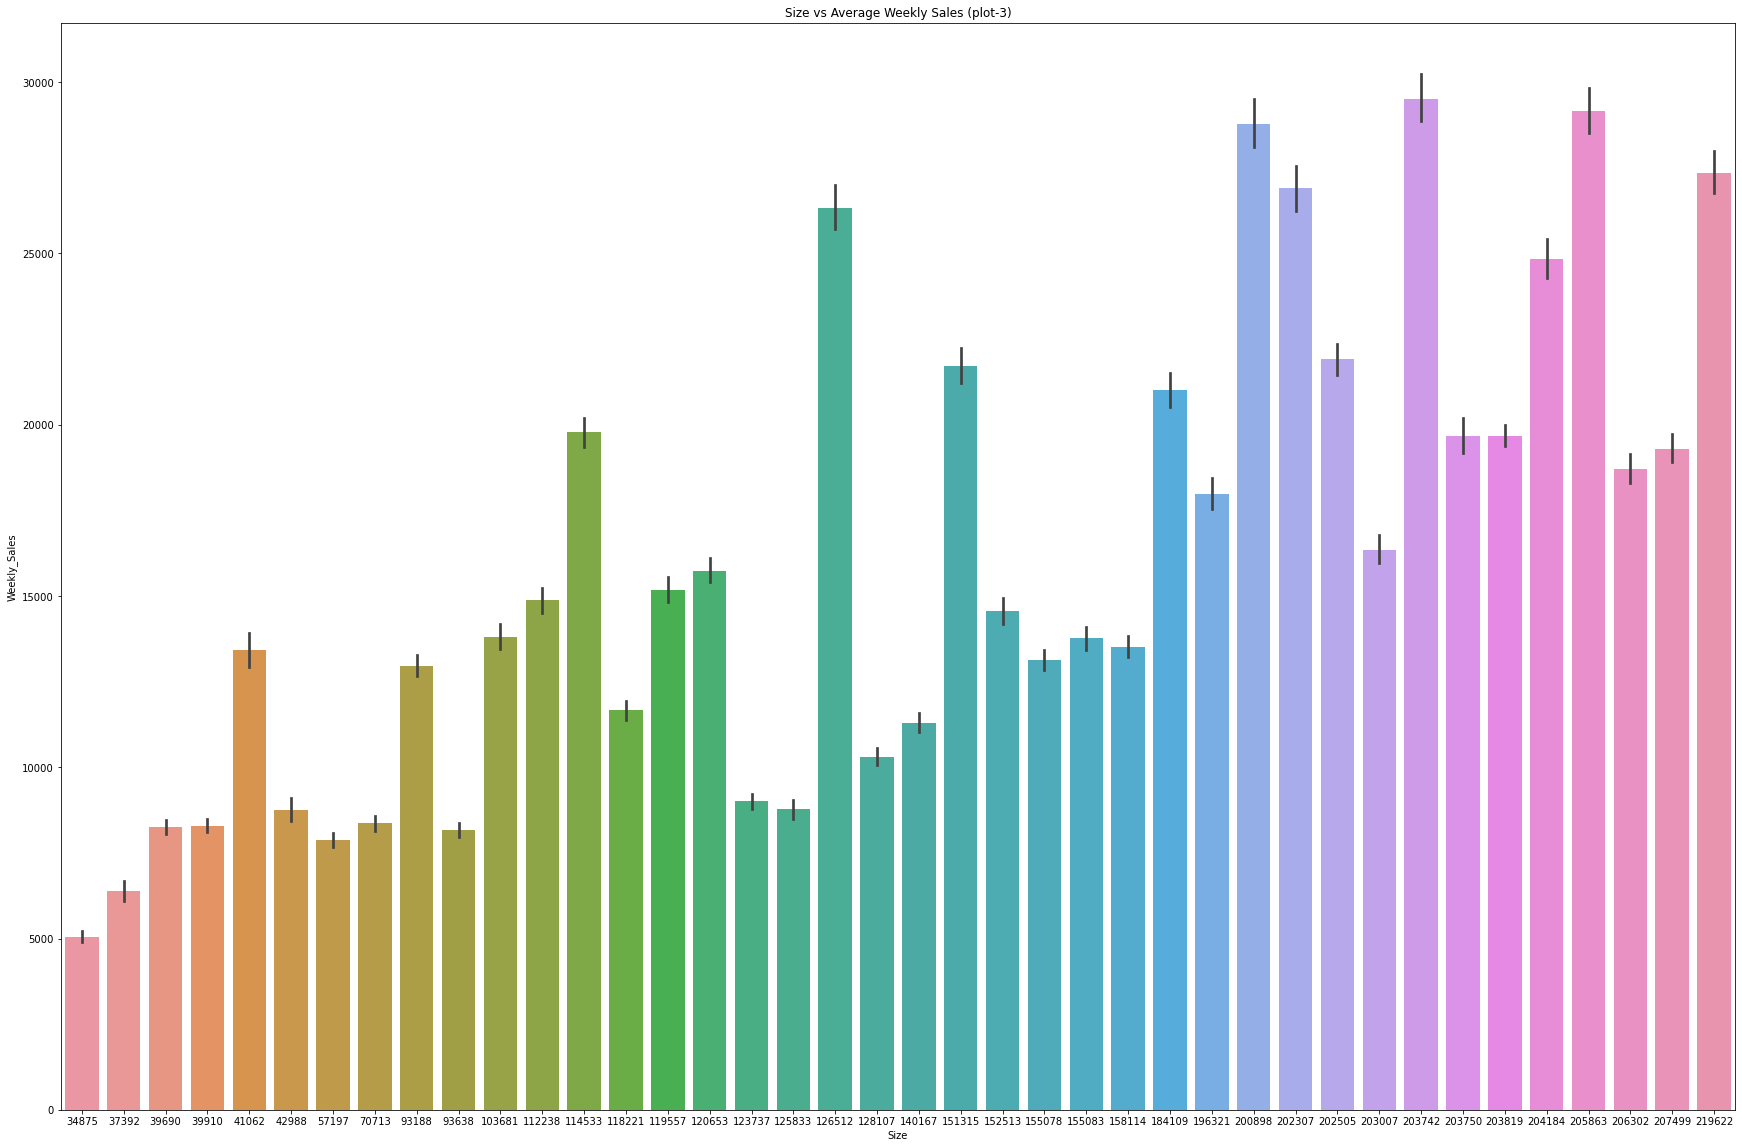

In [587]:
# Bar plot of weekly sales over size
plt.figure(figsize=(30,20))
sns.barplot(x=df['Size'],y=df['Weekly_Sales'])
plt.title('Size vs Average Weekly Sales (plot-3)')
plt.show()

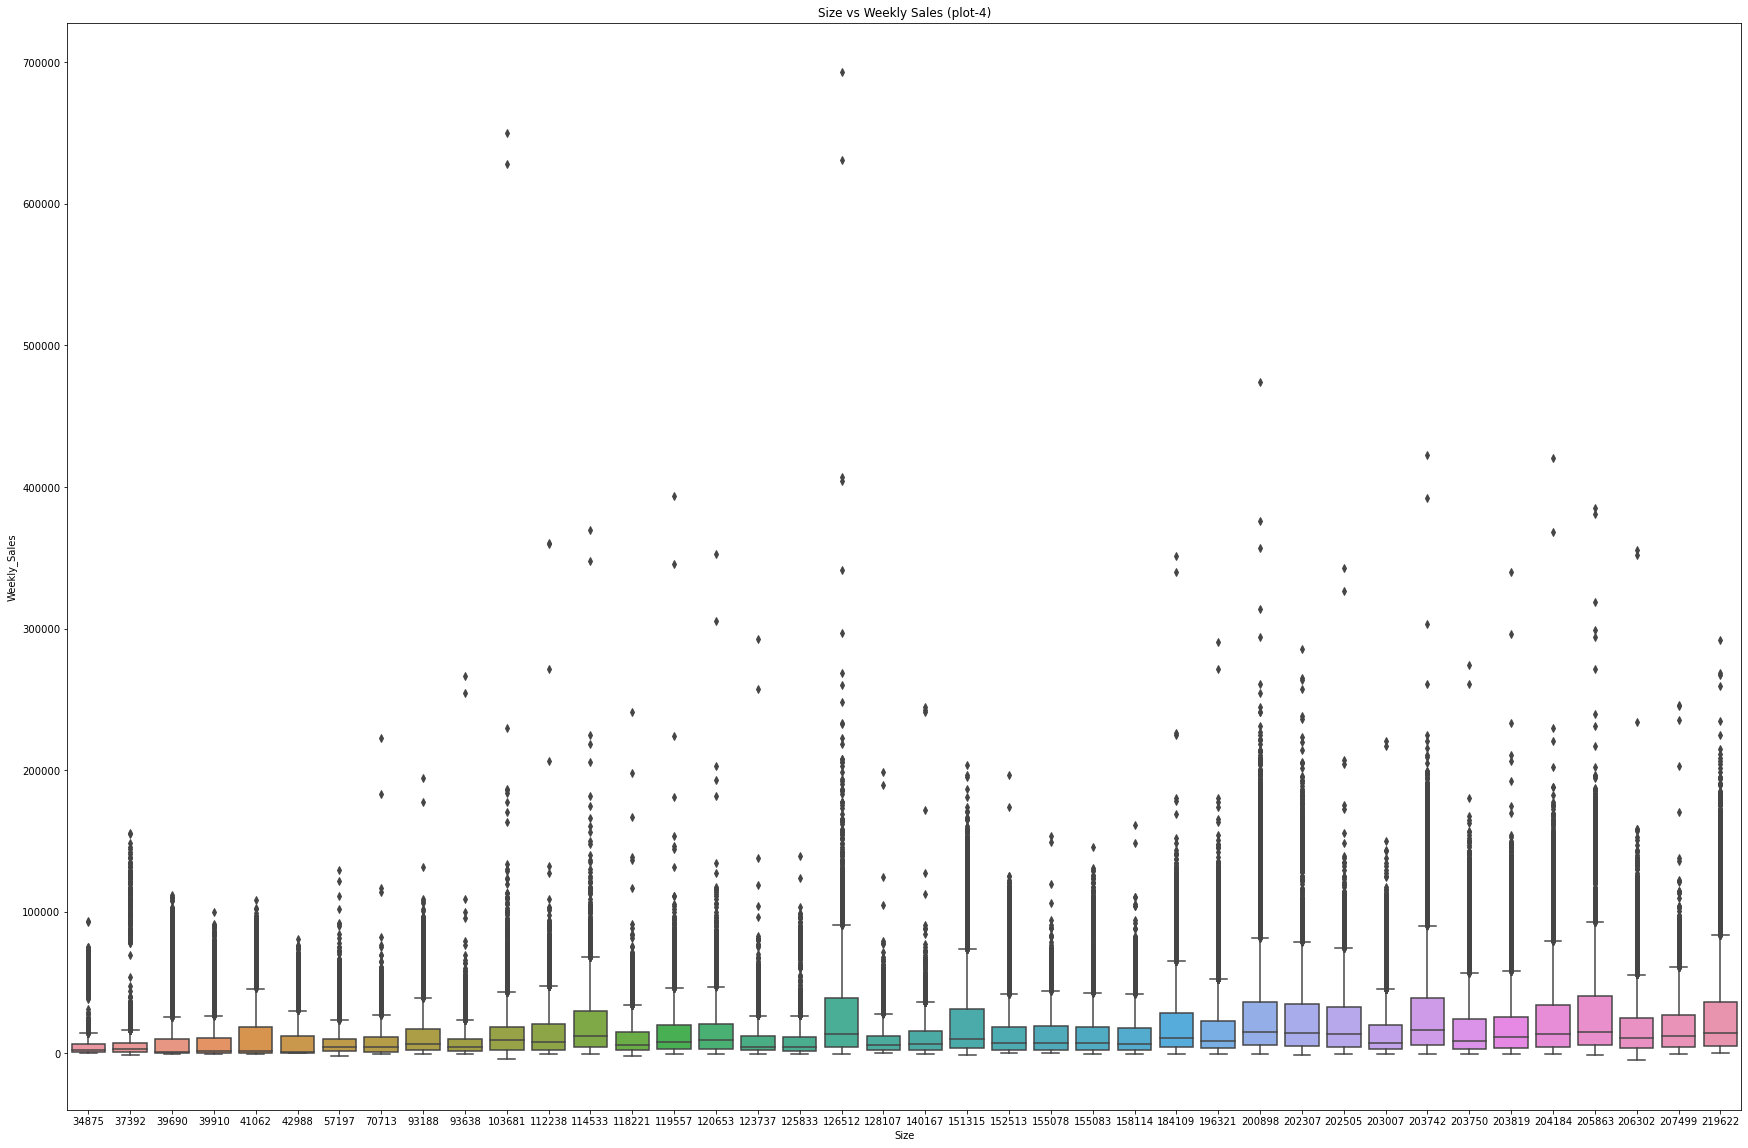

In [588]:
# Box plot of weekly sales over size
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Size'],y=df['Weekly_Sales'])
plt.title('Size vs Weekly Sales (plot-4)')
plt.show()

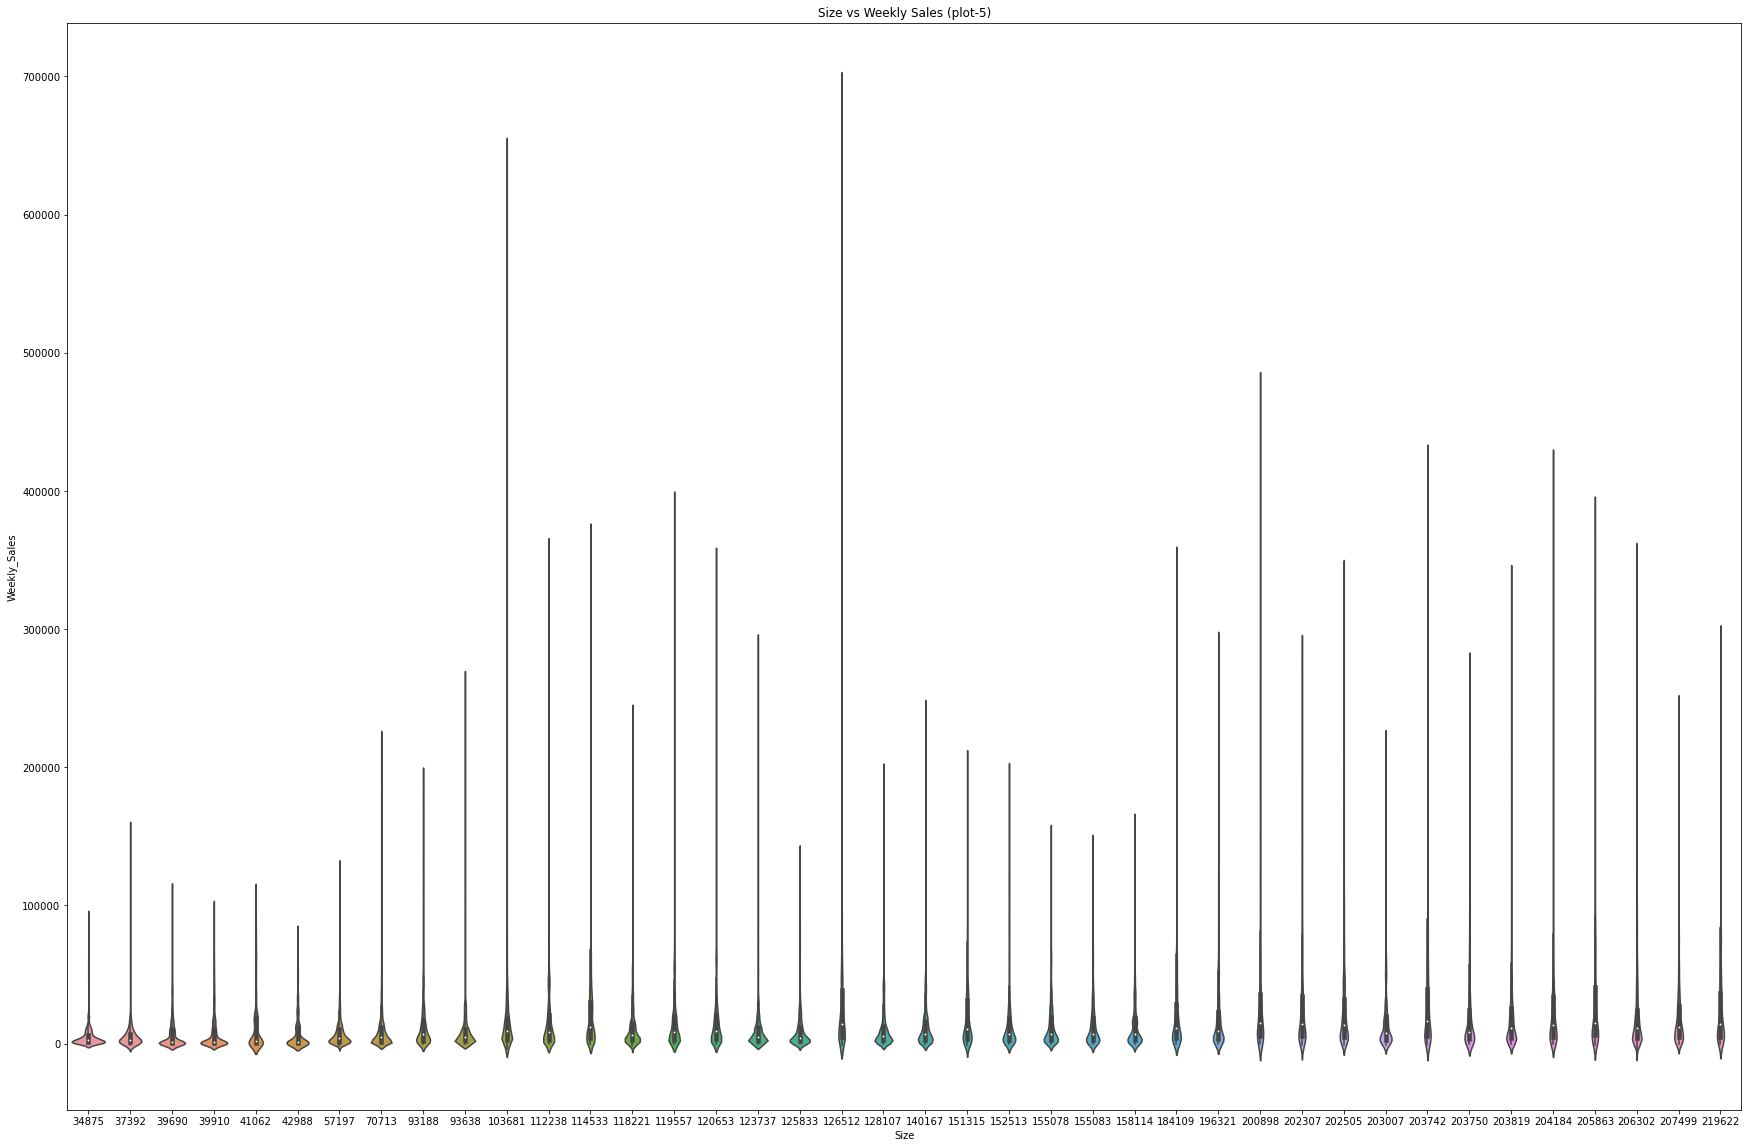

In [589]:
# Violin plot of weekly sales over size
plt.figure(figsize=(30,20))
sns.violinplot(x=df['Size'],y=df['Weekly_Sales'])
plt.title('Size vs Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1.From plot-1, All sizes have almost equal number of datapoints except 39690, 39910 and 203819. Size of 39690, 39910 
    and 203819 
    have large number of datapoints compared to other sizes.
    2.From plot-1,2&3, Sizes 39690 and 39910 have more number of datapoints than most of the datapoints but have total 
    or average weekly sales less than many sizes like 203742, 205863, 219622 etc.
    3.From plot-2&3, a few sizes have total weekly sales large weely sales compared to other sizes but have small 
    average weekly sales compared to other sizes.
    3.From plot-5, a few sizes like 103681 and 126512 have many outliers in weekly sales.
    4.From plot-2&3, if we see the total sales 203819 has highest total weekly sales but if we see the average sales 
    then 203742 has highest weekly sales.
    5.From plot-4, Median of Weekly sales for each size of store is different.
    6.Size is an important feature.

## Bivariate/Multivariate EDA

#### 1. Store

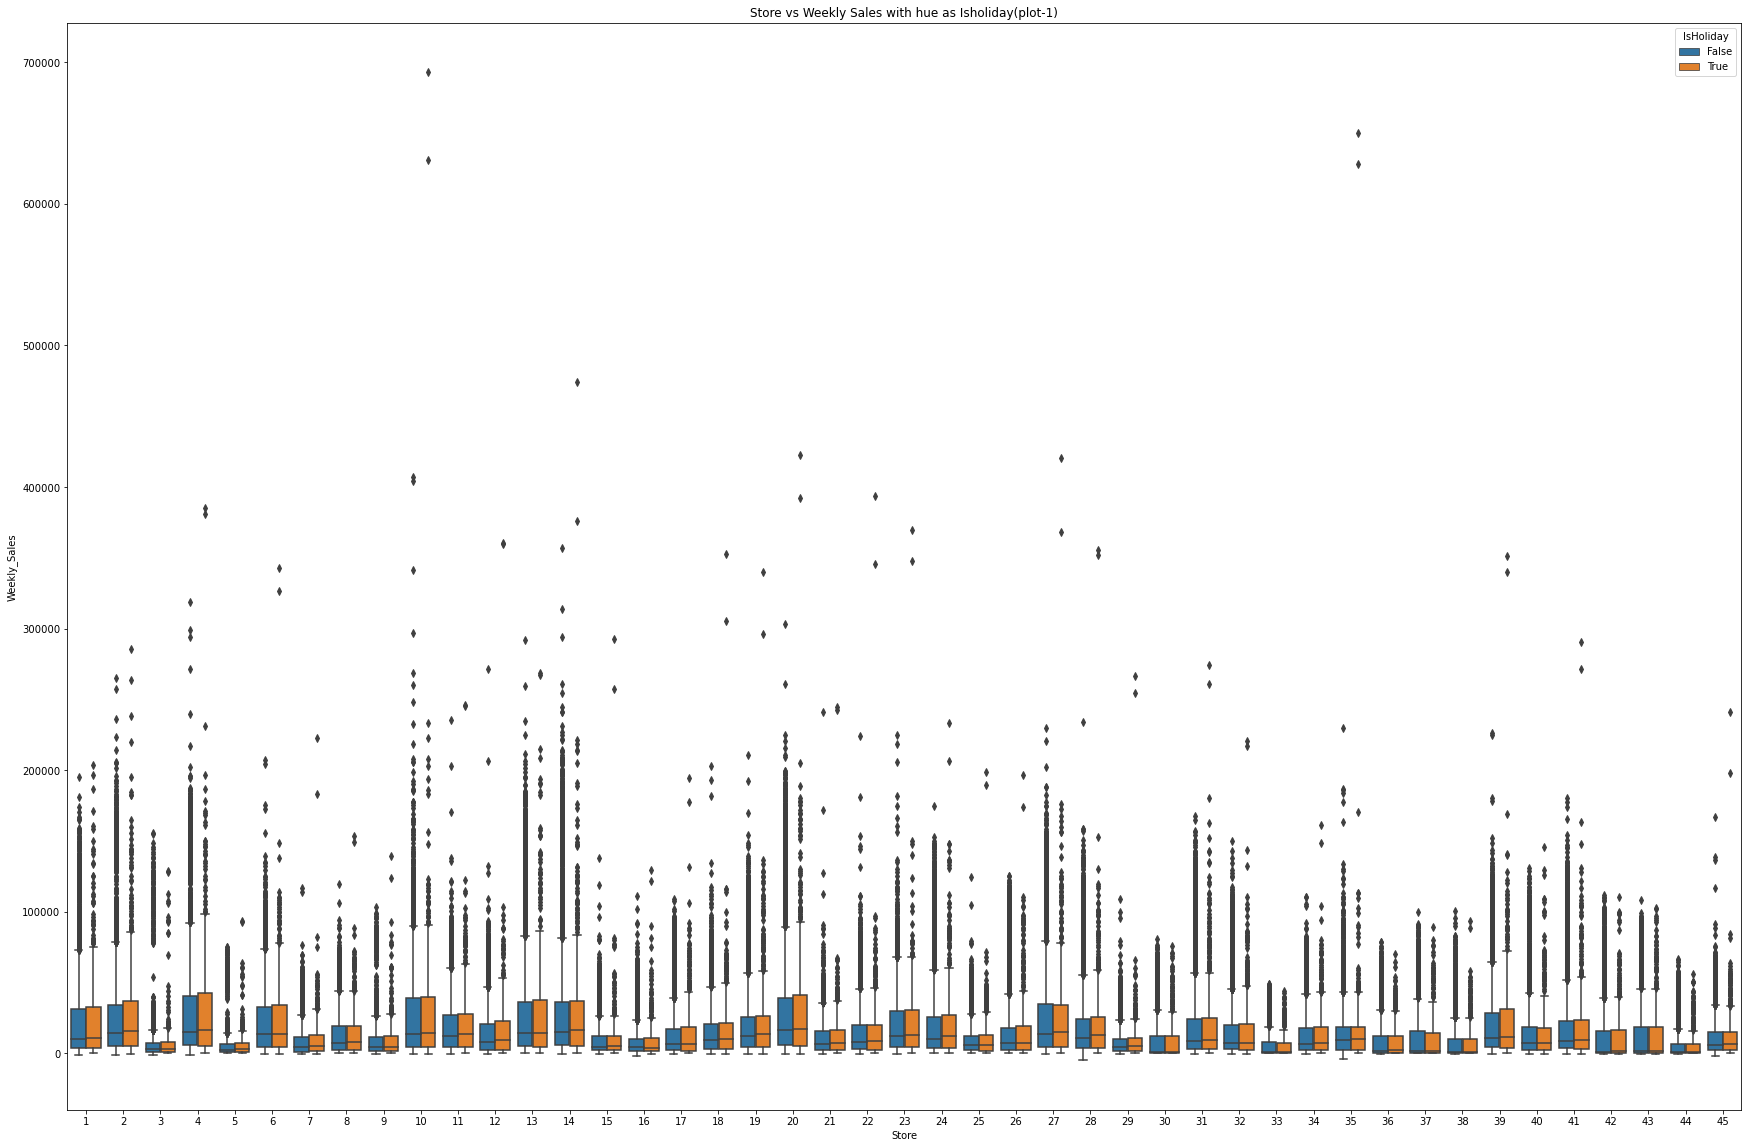

In [708]:
# Box plot of Store vs Weekly Sales with hue as Isholiday
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Store'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Store vs Weekly Sales with hue as Isholiday(plot-1)')
plt.show()

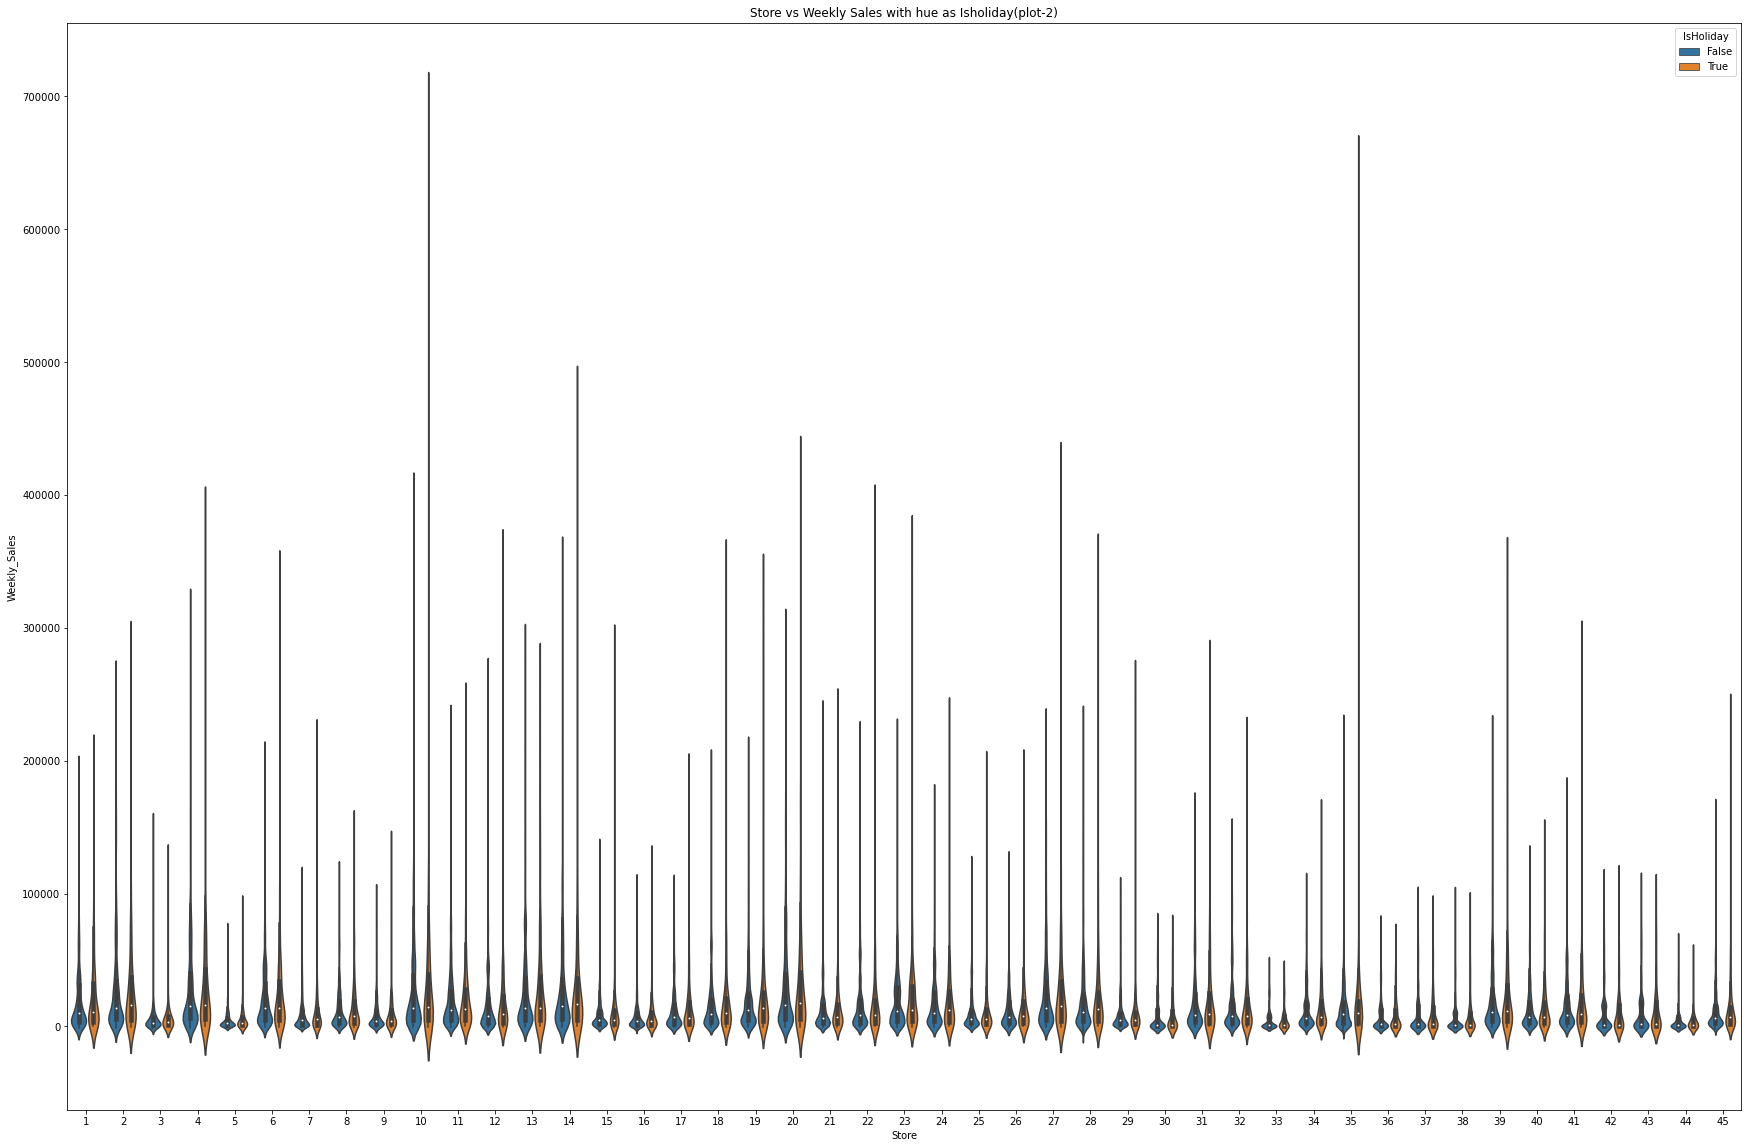

In [707]:
# Violin plot of Store vs Weekly Sales with hue as Isholiday
plt.figure(figsize=(30,20))
sns.violinplot(x=df['Store'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Store vs Weekly Sales with hue as Isholiday(plot-2)')
plt.show()

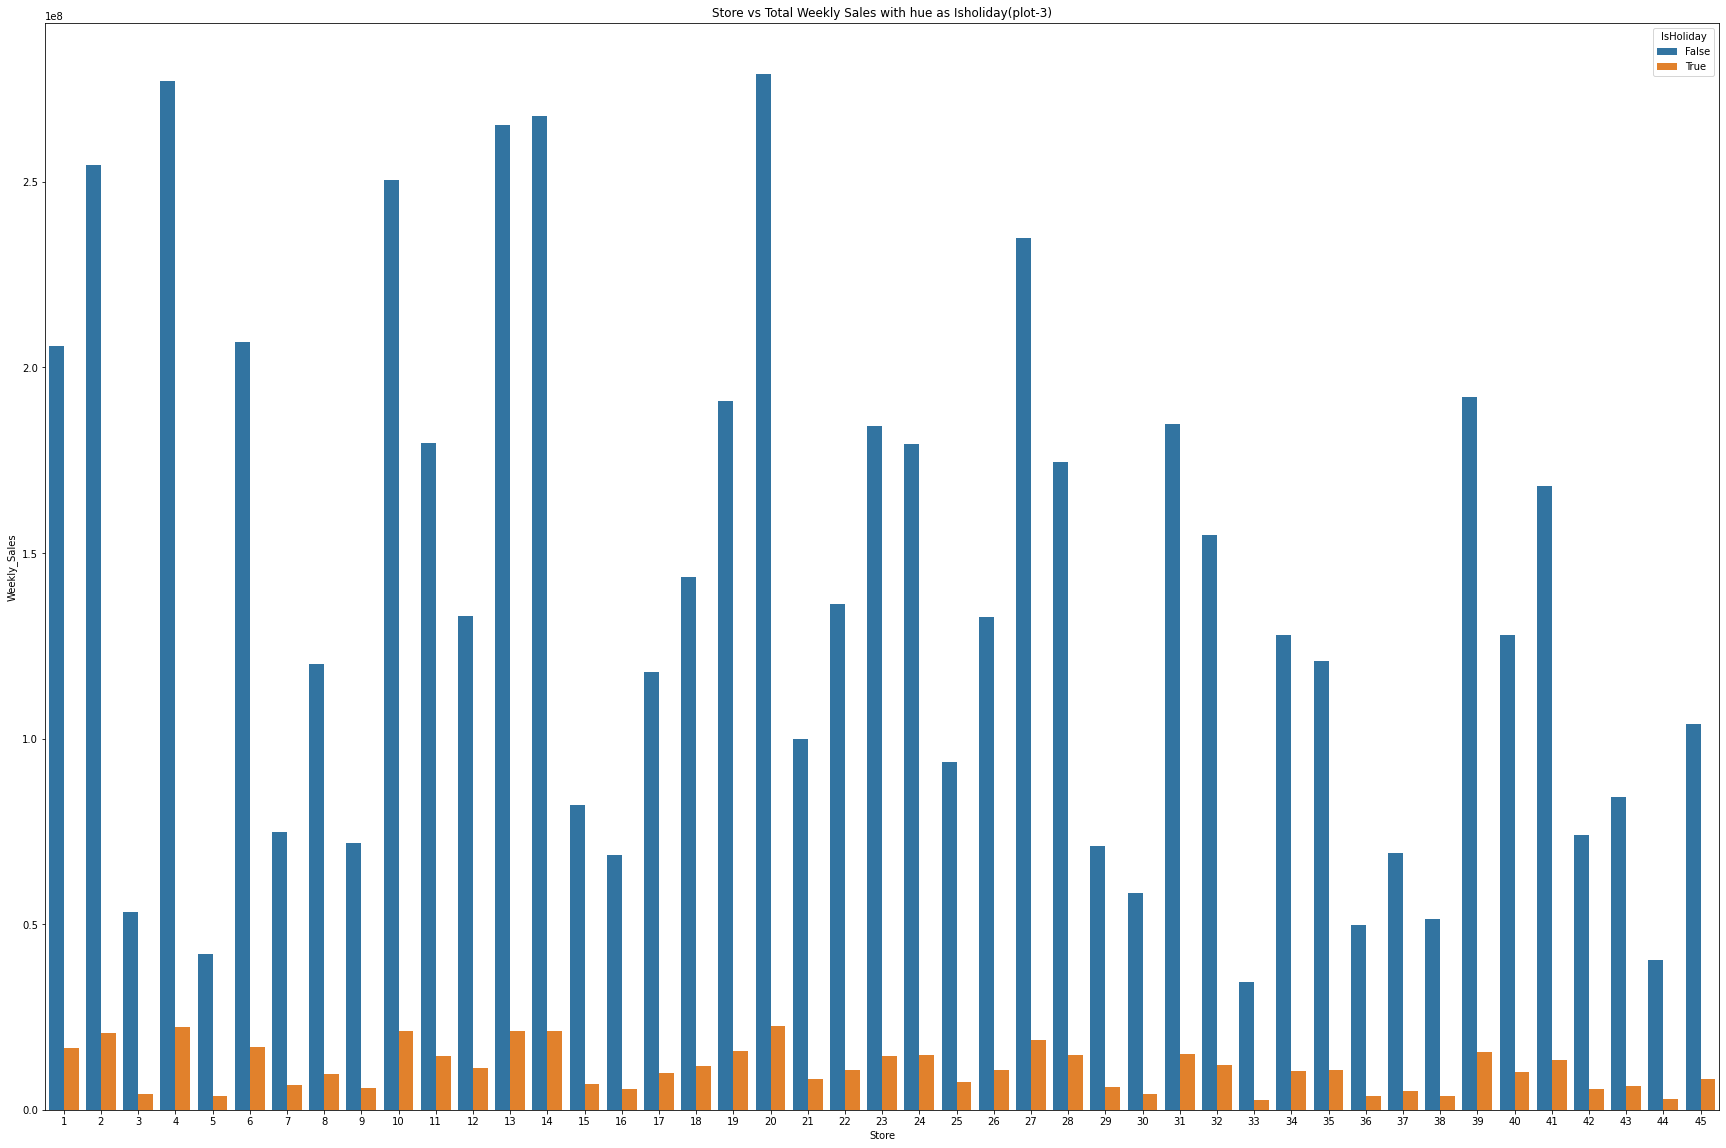

In [709]:
# grouping data by store and isholiday and plotting store vs total weekly Sales with hue as Isholiday
df1 = df.groupby(['Store','IsHoliday'])['Weekly_Sales'].sum().reset_index()
df1.head()
plt.figure(figsize=(30,20))
sns.barplot(x=df1['Store'], y=df1['Weekly_Sales'], hue=df1['IsHoliday'])
plt.title('Store vs Total Weekly Sales with hue as Isholiday(plot-3)')
plt.show()

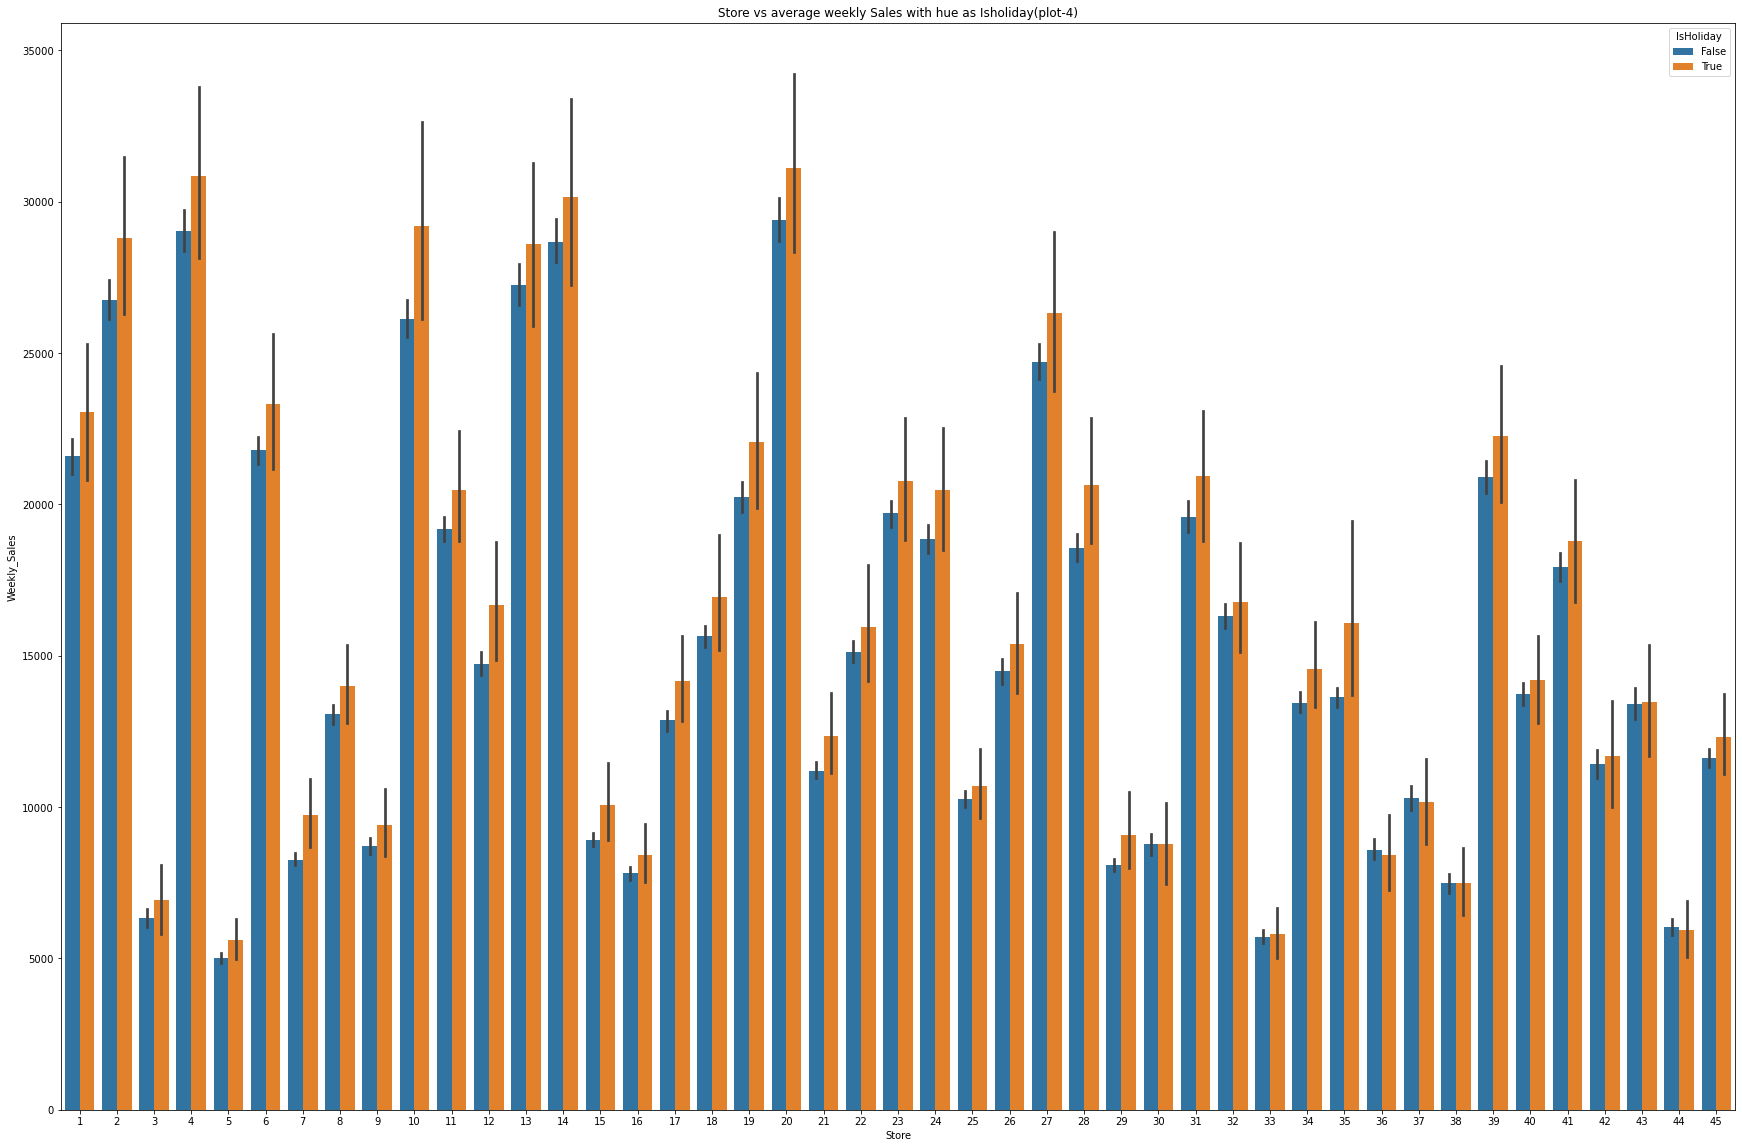

In [710]:
# Bar plot of Store vs average weekly Sales with hue as Isholiday
plt.figure(figsize=(30,20))
sns.barplot(x=df['Store'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Store vs average weekly Sales with hue as Isholiday(plot-4)')
plt.show()

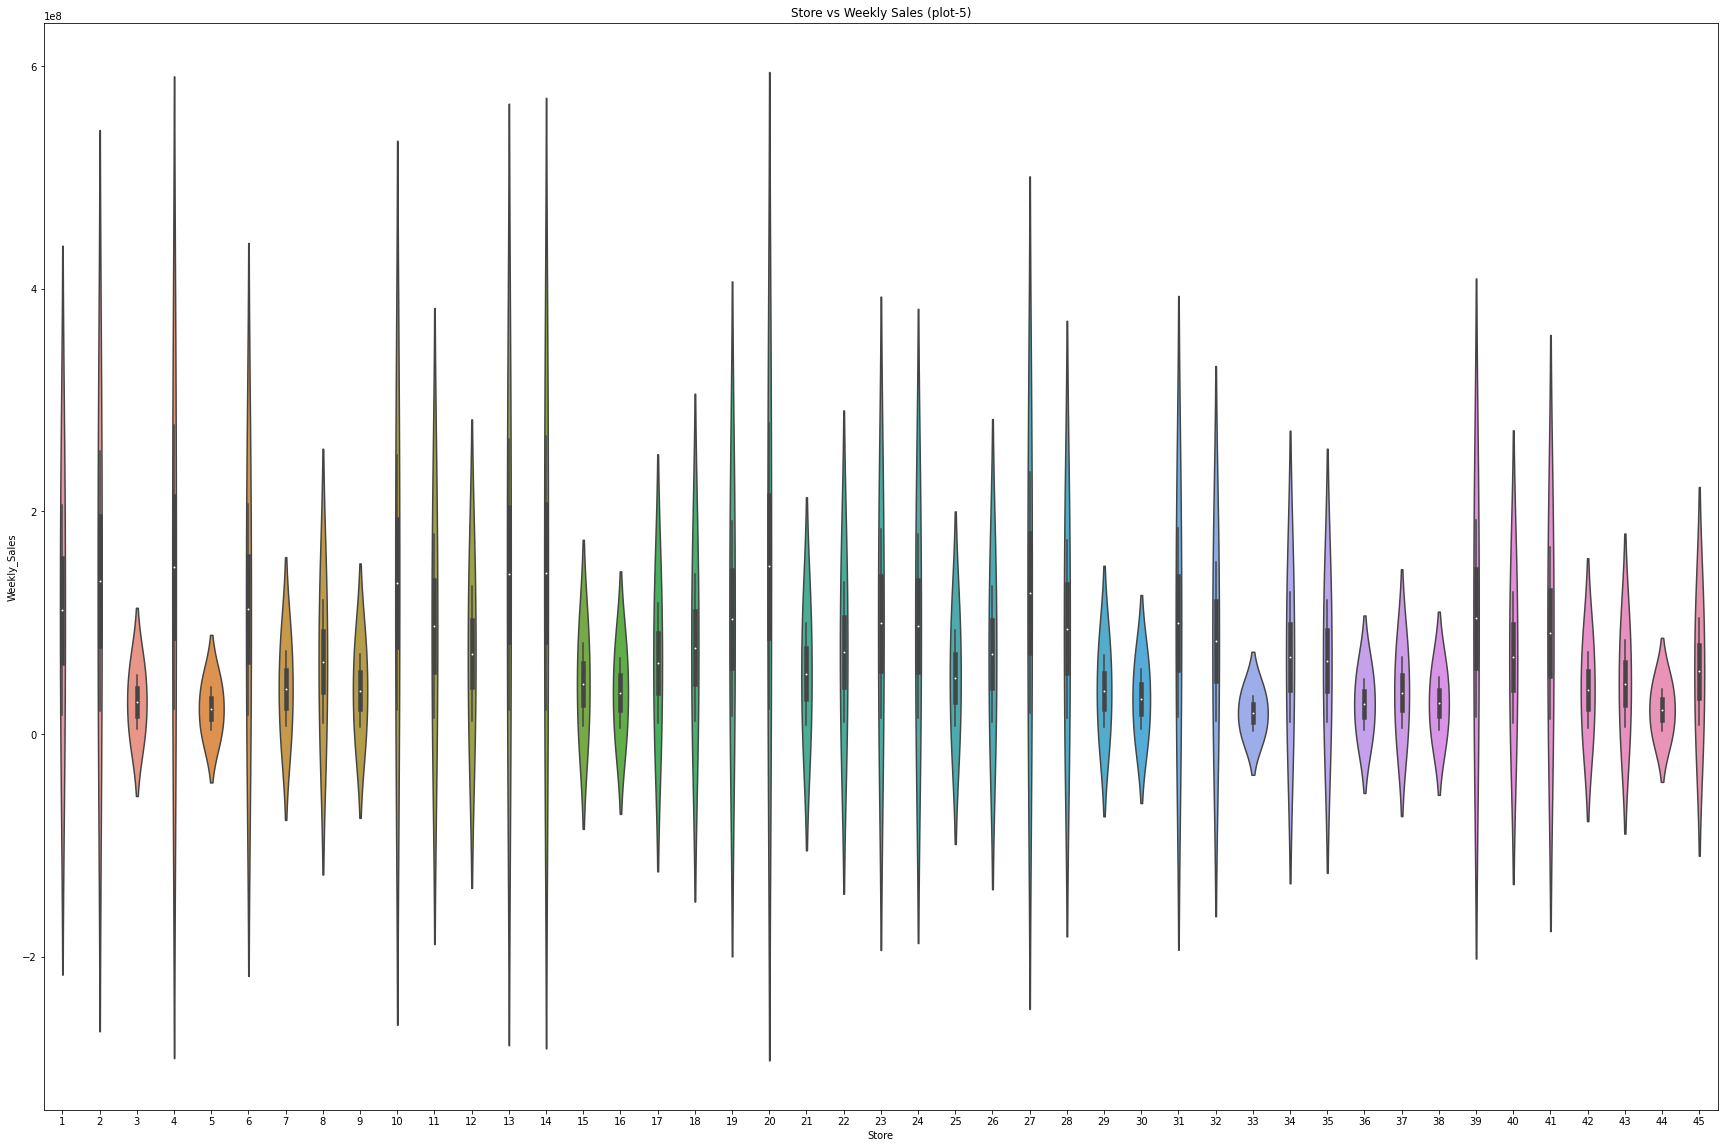

In [711]:
# grouping data by store and isholiday and violin plotting store vs weekly Sales.
df1 = df.groupby(['Store','IsHoliday'])['Weekly_Sales'].sum().reset_index()
df1.head()
plt.figure(figsize=(30,20))
sns.violinplot(x=df1['Store'], y=df1['Weekly_Sales'])
plt.title('Store vs Weekly Sales (plot-5)')
plt.show()

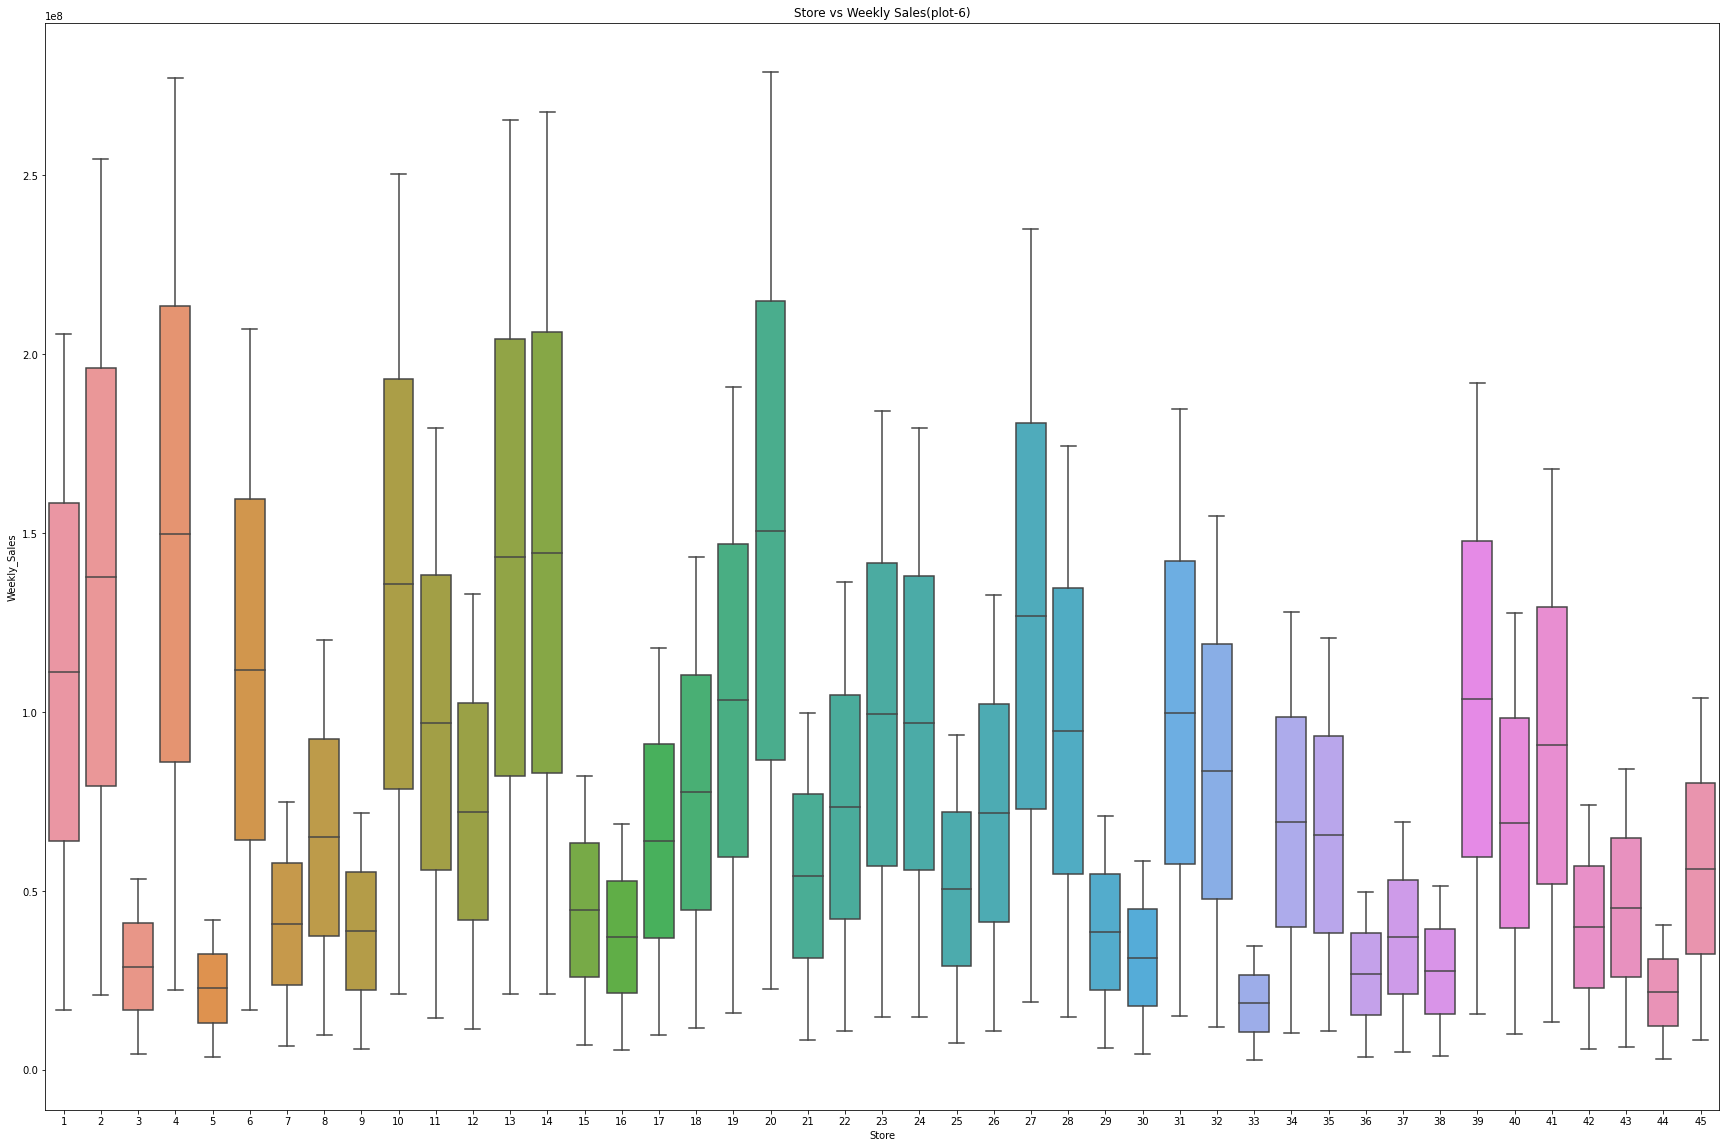

In [712]:
# grouping data by store and isholiday and box plotting store vs weekly Sales.
df1 = df.groupby(['Store','IsHoliday'])['Weekly_Sales'].sum().reset_index()
df1.head()
plt.figure(figsize=(30,20))
sns.boxplot(x=df1['Store'], y=df1['Weekly_Sales'])
plt.title('Store vs Weekly Sales(plot-6)')
plt.show()

##### Observation:
    1. From plot-1, When holidays, median of weekly sales for most of the stores are more than non-holidays.
    2. From plot-2, ouliers present in almost all stores.
    3. From plot-3, total weekly sales is more in alomost all stores during non-holidays than holidays beacuse more 
    number of weeks of non-holidays than holidays in data.
    4. From plot-4, average weekly sales is more in alomost all stores during holidays than non-holidays.
    5. Holiday weeks impact on store's sales. Hence Isholiday and store are important features.
    6. From plot-5, grouping dataset by store and Isholiday and taking sum of weekly sales. If we observe the violin plot 
    of store vs weekly sales, distribution of weekly sales over store are gaussian distributed.
    7. From plot-6, grouping dataset by store and Isholiday and taking sum of weekly sales. If we observe the box plot 
    of store vs weekly sales, medians of weekly sales for each store are very different and hence easily seperable.

### 2. Dept

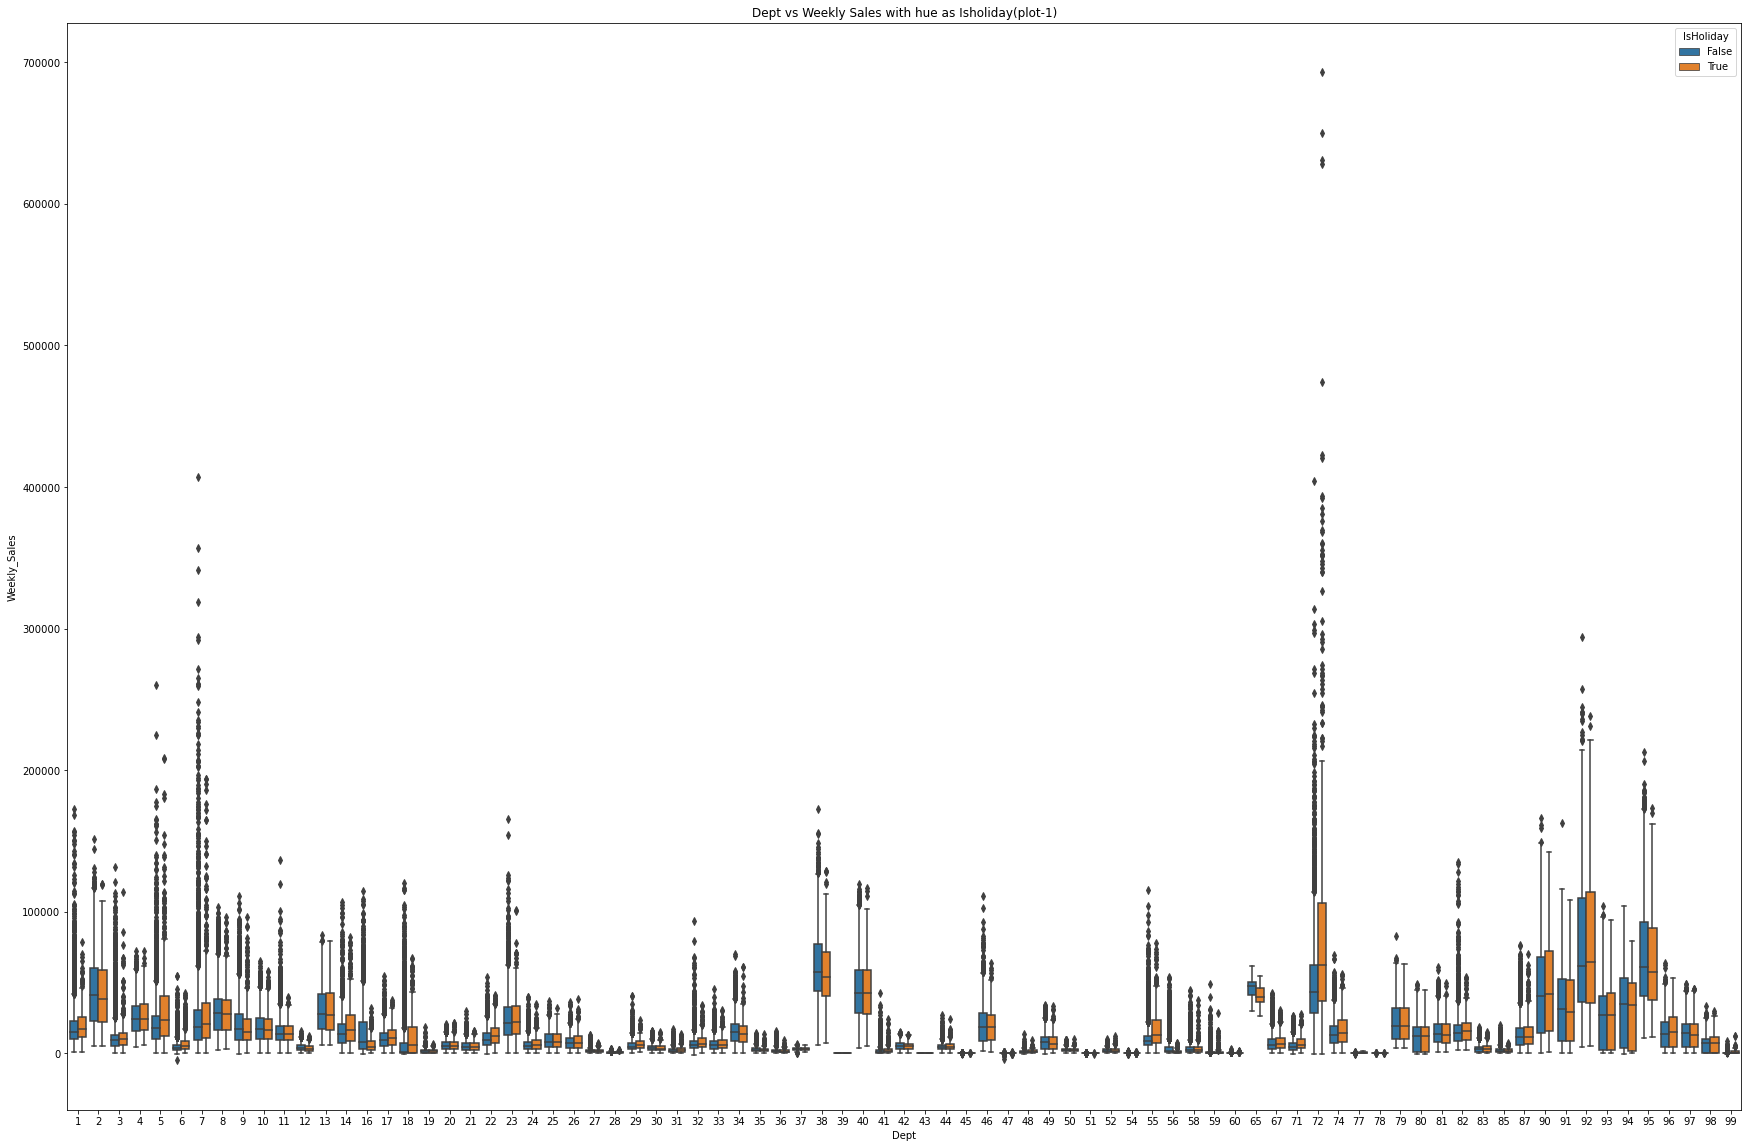

In [607]:
# Box plot of dept vs weekly sales with hue as IsHoliday
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Dept'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Dept vs Weekly Sales with hue as Isholiday(plot-1)')
plt.show()

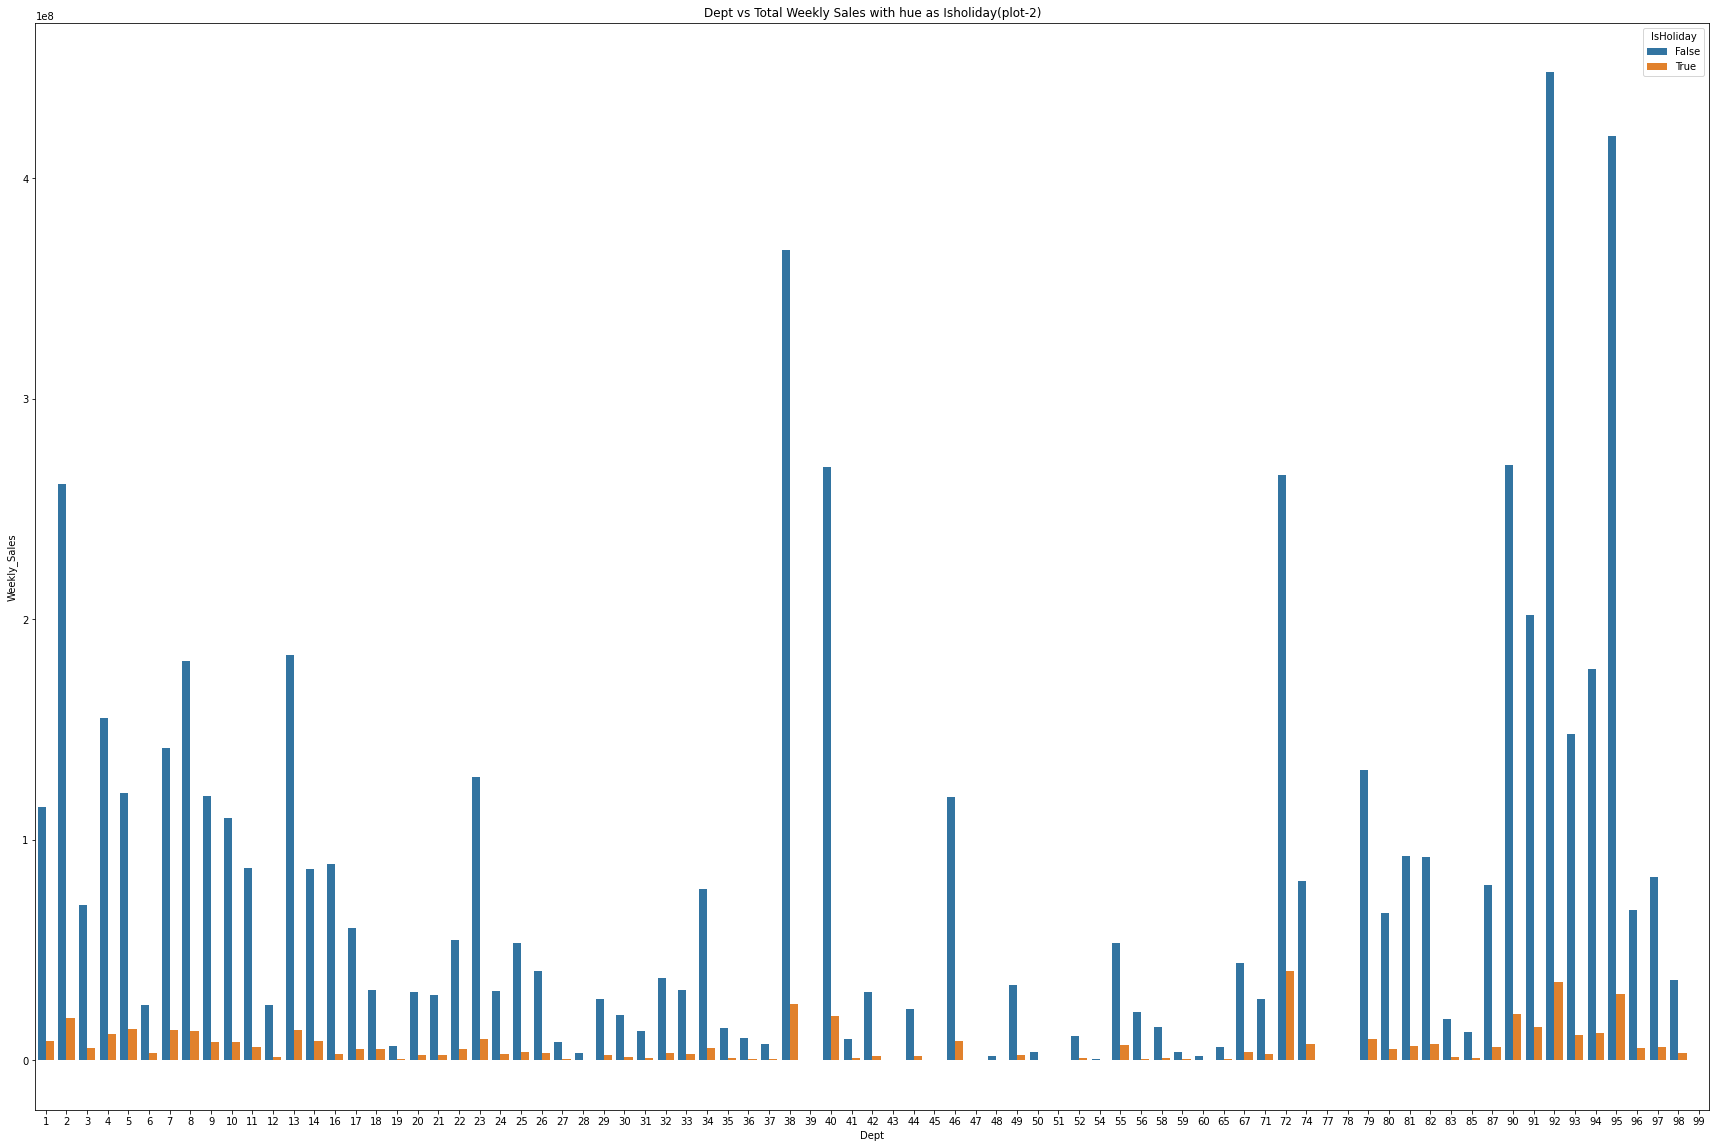

In [618]:
# grouping data by dept and isholiday and plotting store vs total weekly Sales with hue as Isholiday
df1 = df.groupby(['Dept','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.barplot(x=df1['Dept'], y=df1['Weekly_Sales'], hue=df1['IsHoliday'])
plt.title('Dept vs Total Weekly Sales with hue as Isholiday(plot-2)')
plt.show()

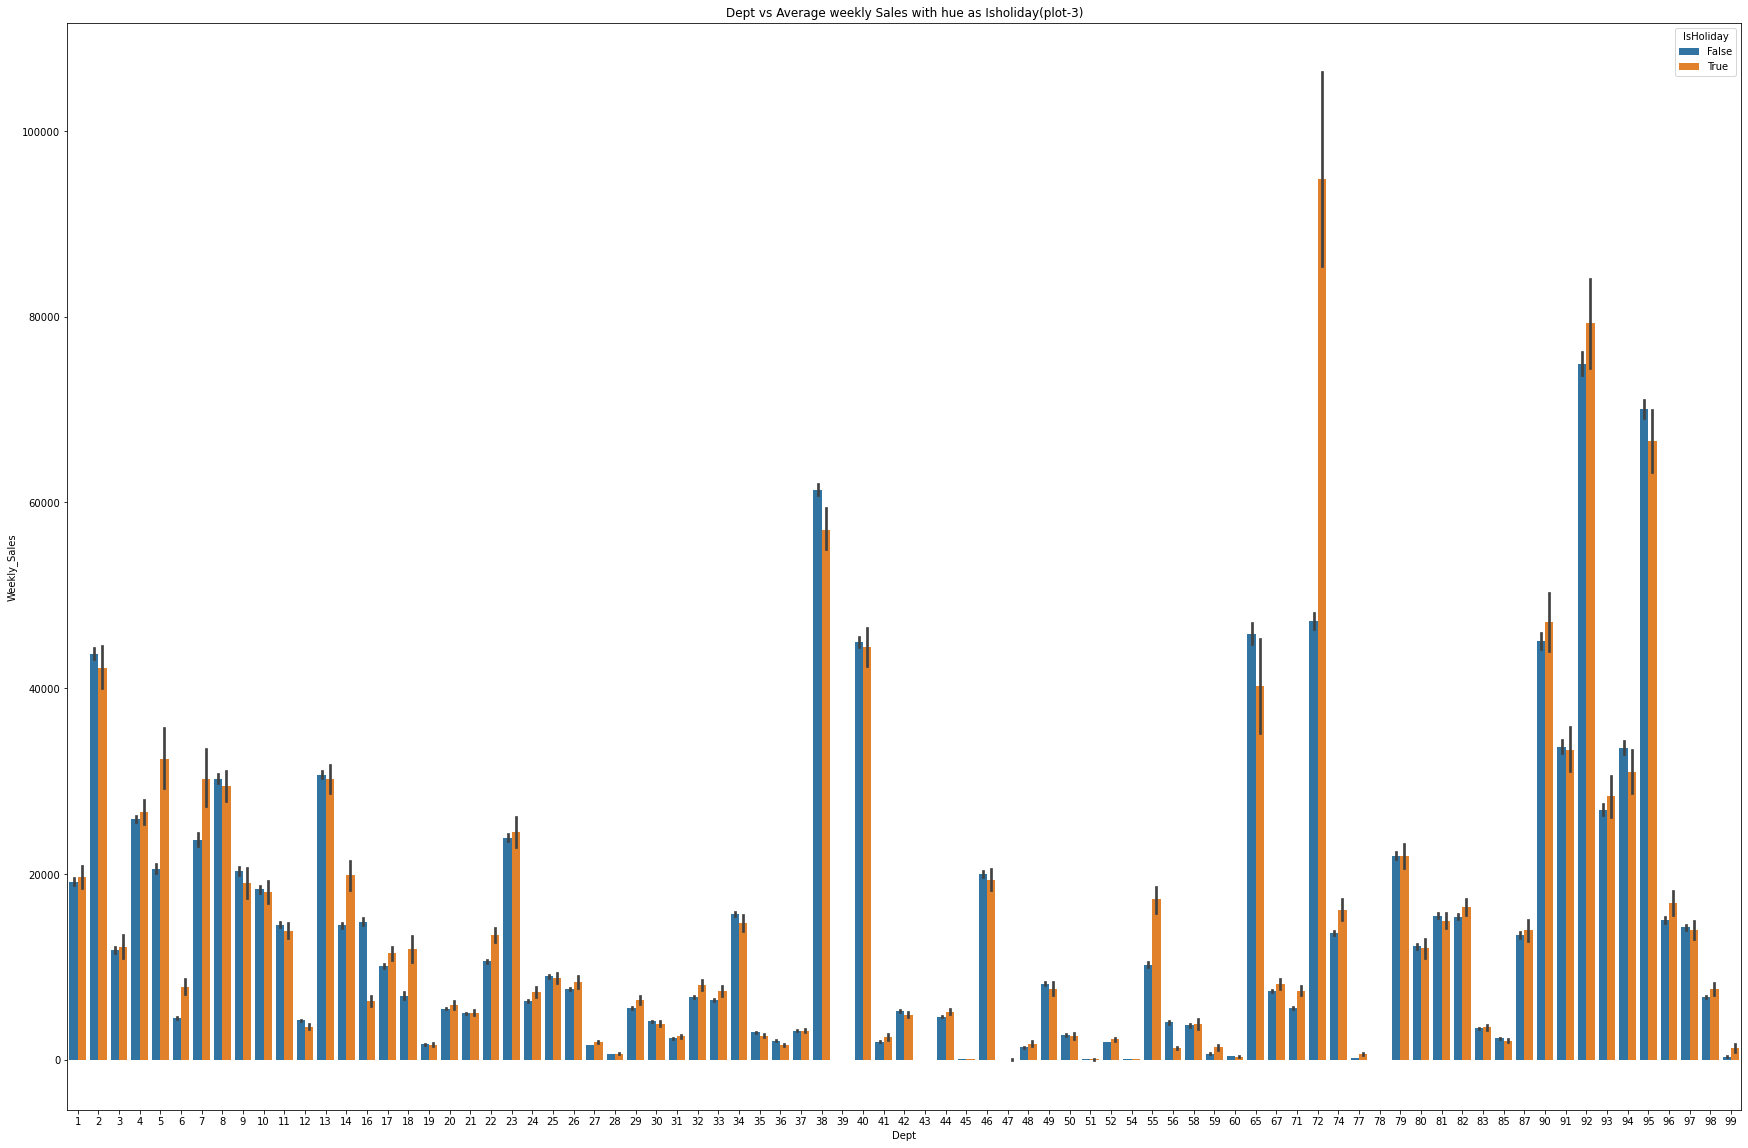

In [622]:
# Bar plot of dept vs weekly sales with hue as IsHoliday
plt.figure(figsize=(30,20))
sns.barplot(x=df['Dept'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Dept vs Average weekly Sales with hue as Isholiday(plot-3)')
plt.show()

##### Observation:
    1. From plot-1, when holidays, median of weekly sales for many depts are more than non-holidays.
    2. From plot-2, total weekly sales is more in all depts during non-holidays than holidays beacuse more 
    number of weeks of non-holidays than holidays in data.
    4. From plot-3, average weekly sales is more in alomost all depts during holidays than non-holidays.
    5. Holiday weeks impact on dept's sales. Hence Isholiday and depts are important features.
    3. From plot-3, very high average weekly sales in dept 72 in holiday weeks than non-holidays.
    4. From plot-2, epts where sales are highter when there are non-holiday weeks. 

##### Temperature.

<AxesSubplot:xlabel='temp_cat', ylabel='Weekly_Sales'>

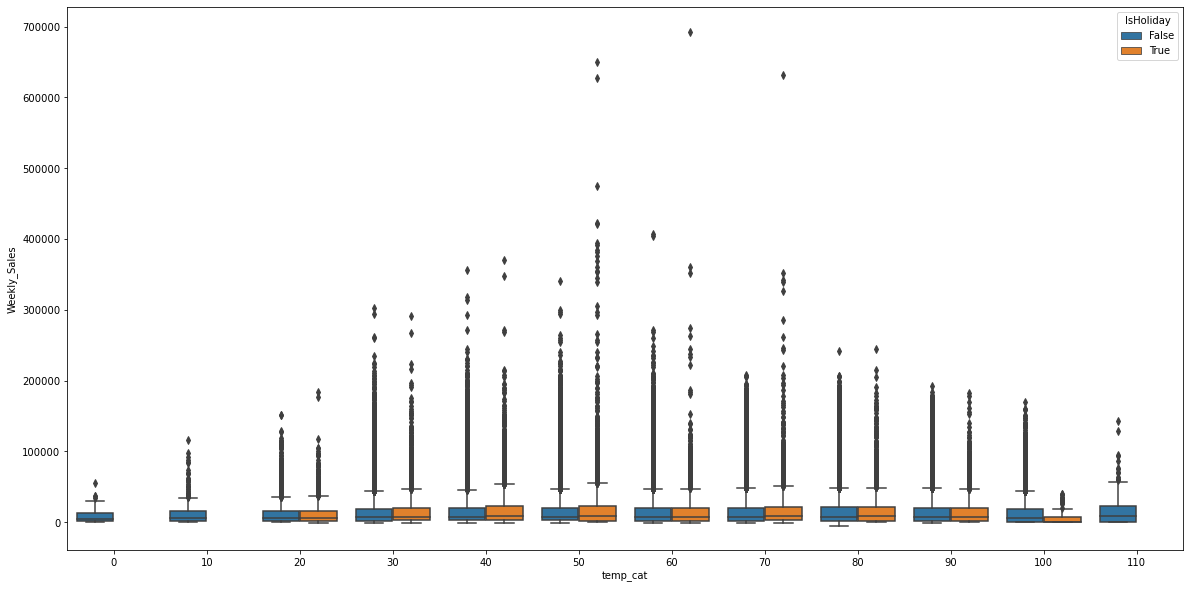

In [439]:
plt.figure(figsize=(20,10))
sns.boxplot(x=df['temp_cat'], y=df['Weekly_Sales'], hue=df['IsHoliday'])

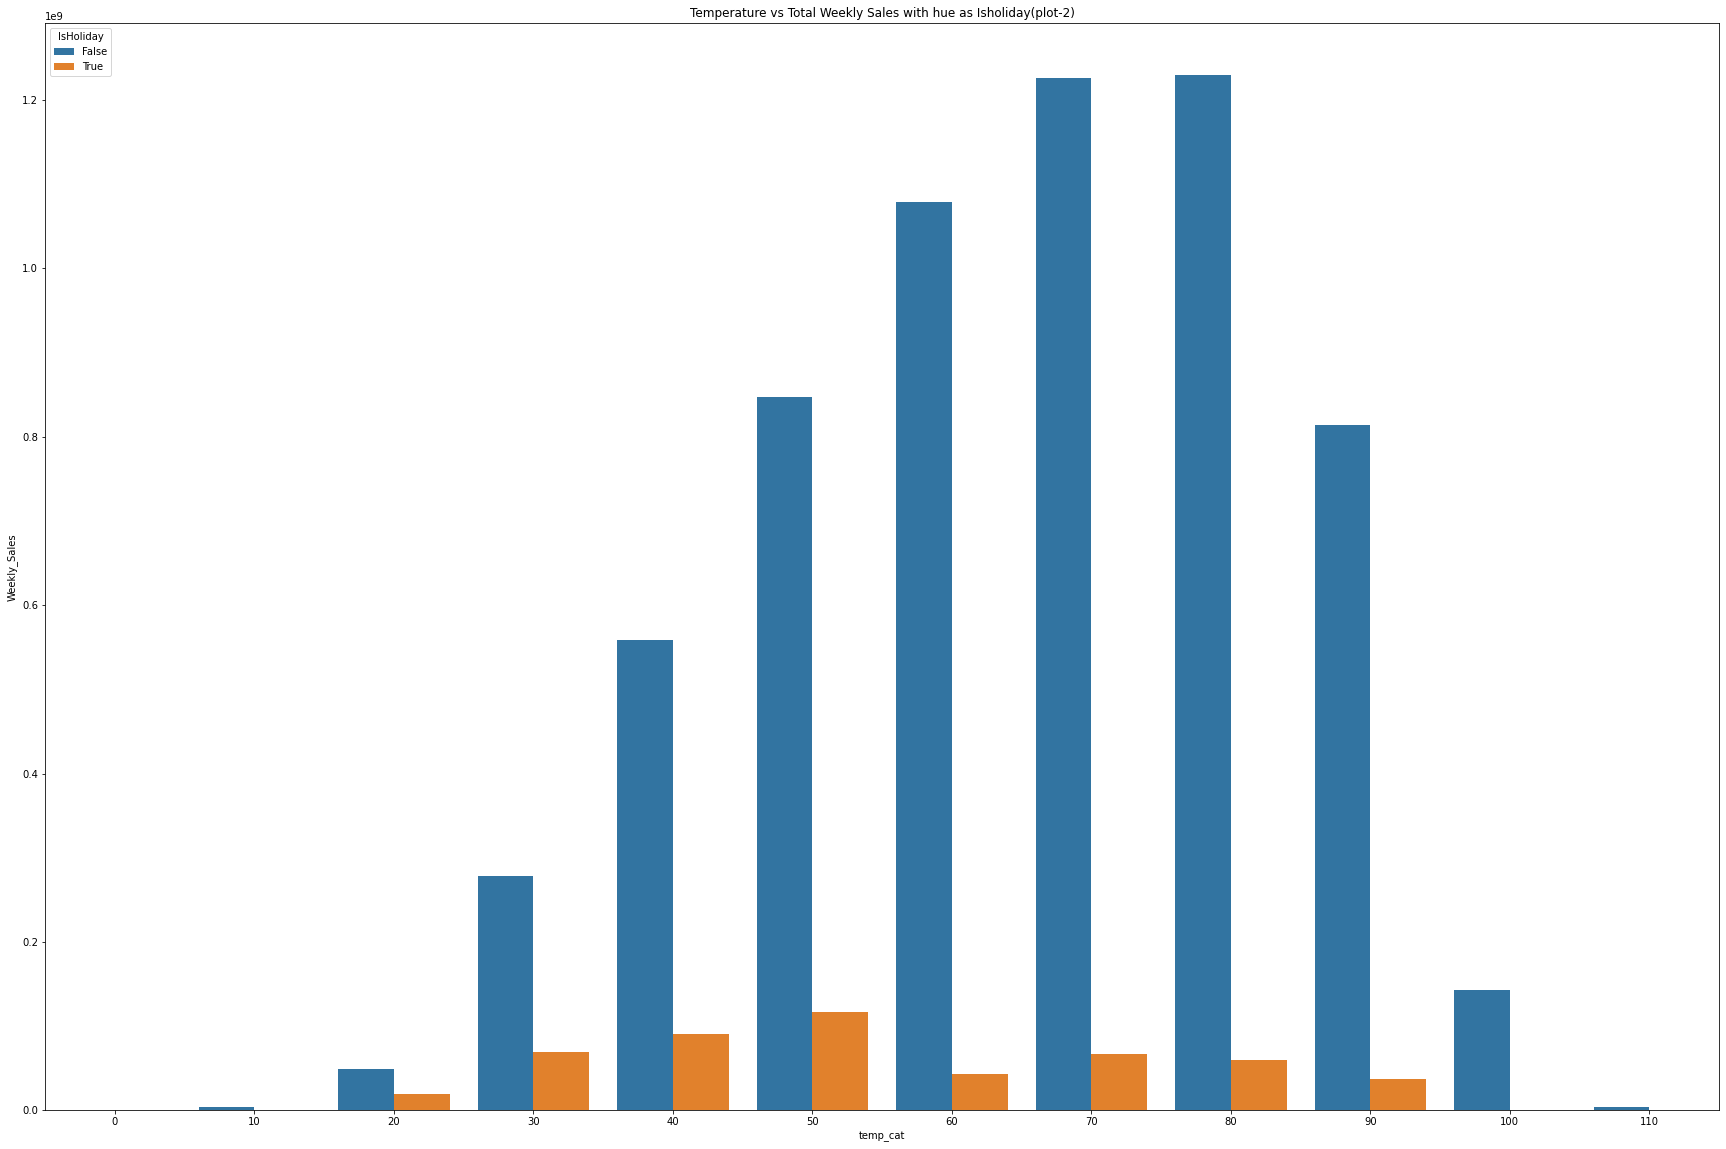

In [624]:
# grouping data by dept and isholiday and plotting store vs total weekly Sales with hue as Isholiday
df1 = df.groupby(['temp_cat','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.barplot(x=df1['temp_cat'], y=df1['Weekly_Sales'], hue=df1['IsHoliday'])
plt.title('Temperature vs Total Weekly Sales with hue as Isholiday(plot-2)')
plt.show()

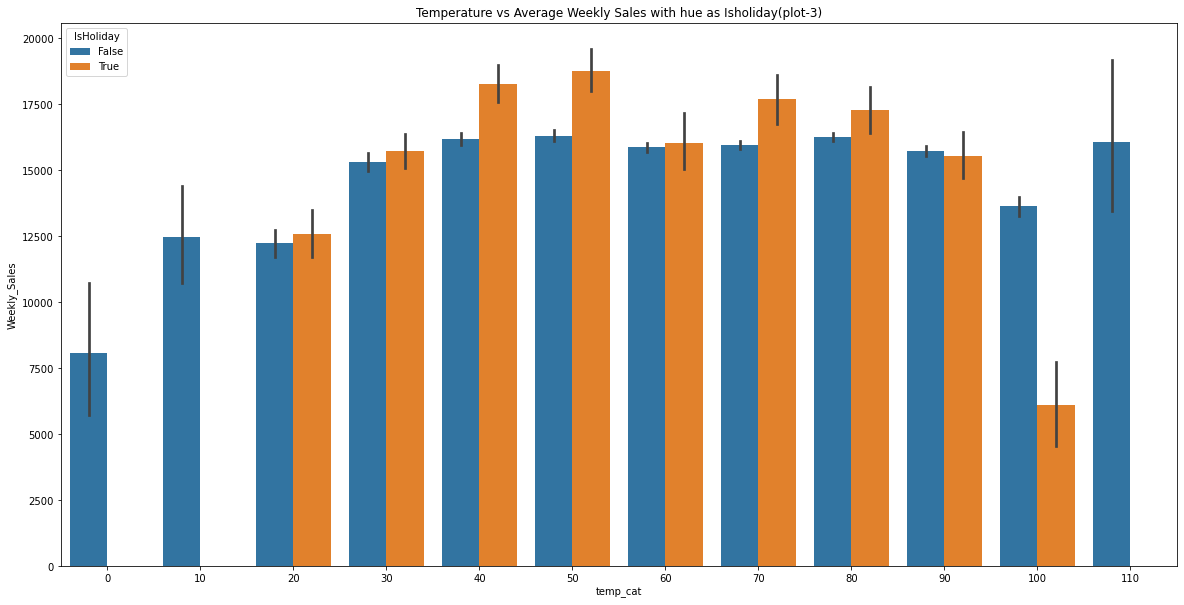

In [626]:
# Bar plot of dept vs weekly sales with hue as IsHoliday
plt.figure(figsize=(20,10))
sns.barplot(x=df['temp_cat'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Temperature vs Average Weekly Sales with hue as Isholiday(plot-3)')
plt.show()

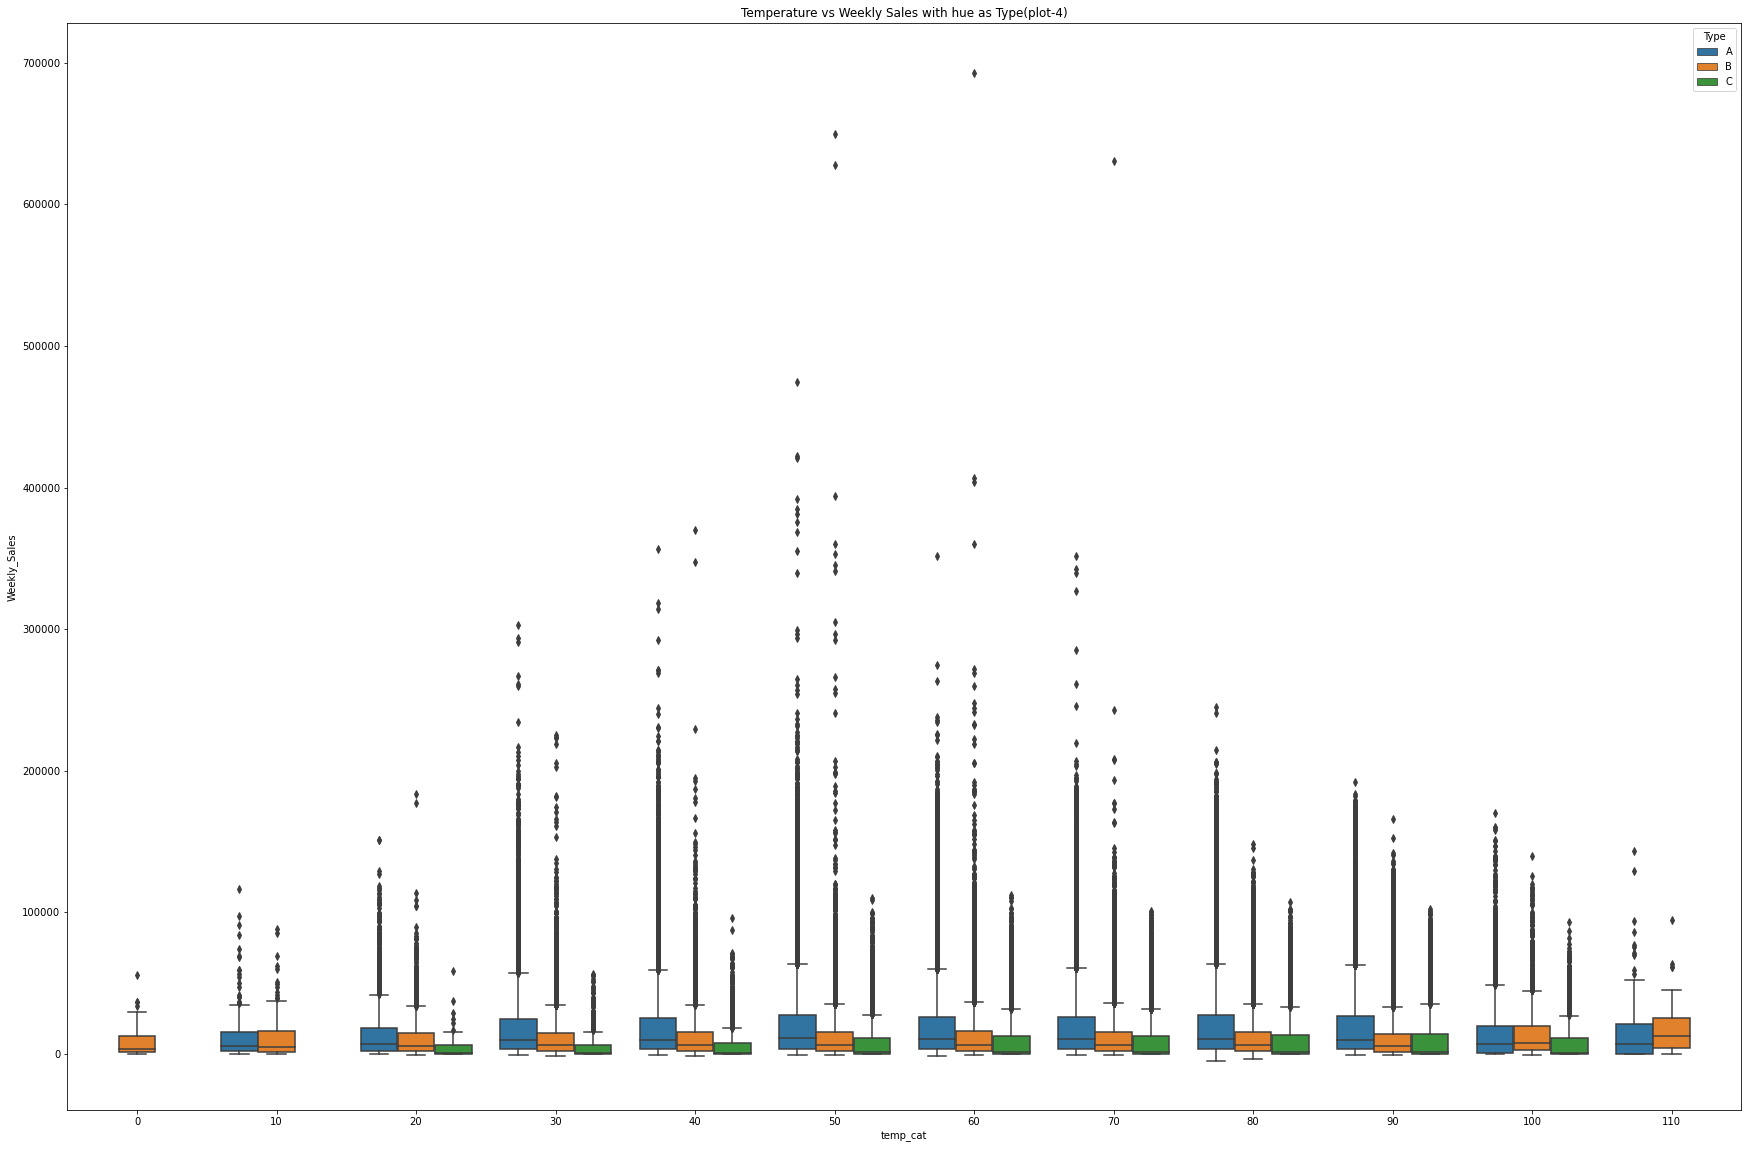

In [628]:
# Box plot of dept vs weekly sales with hue as Type
plt.figure(figsize=(30,20))
sns.boxplot(x=df['temp_cat'], y=df['Weekly_Sales'], hue=df['Type'])
plt.title('Temperature vs Weekly Sales with hue as Type(plot-4)')
plt.show()

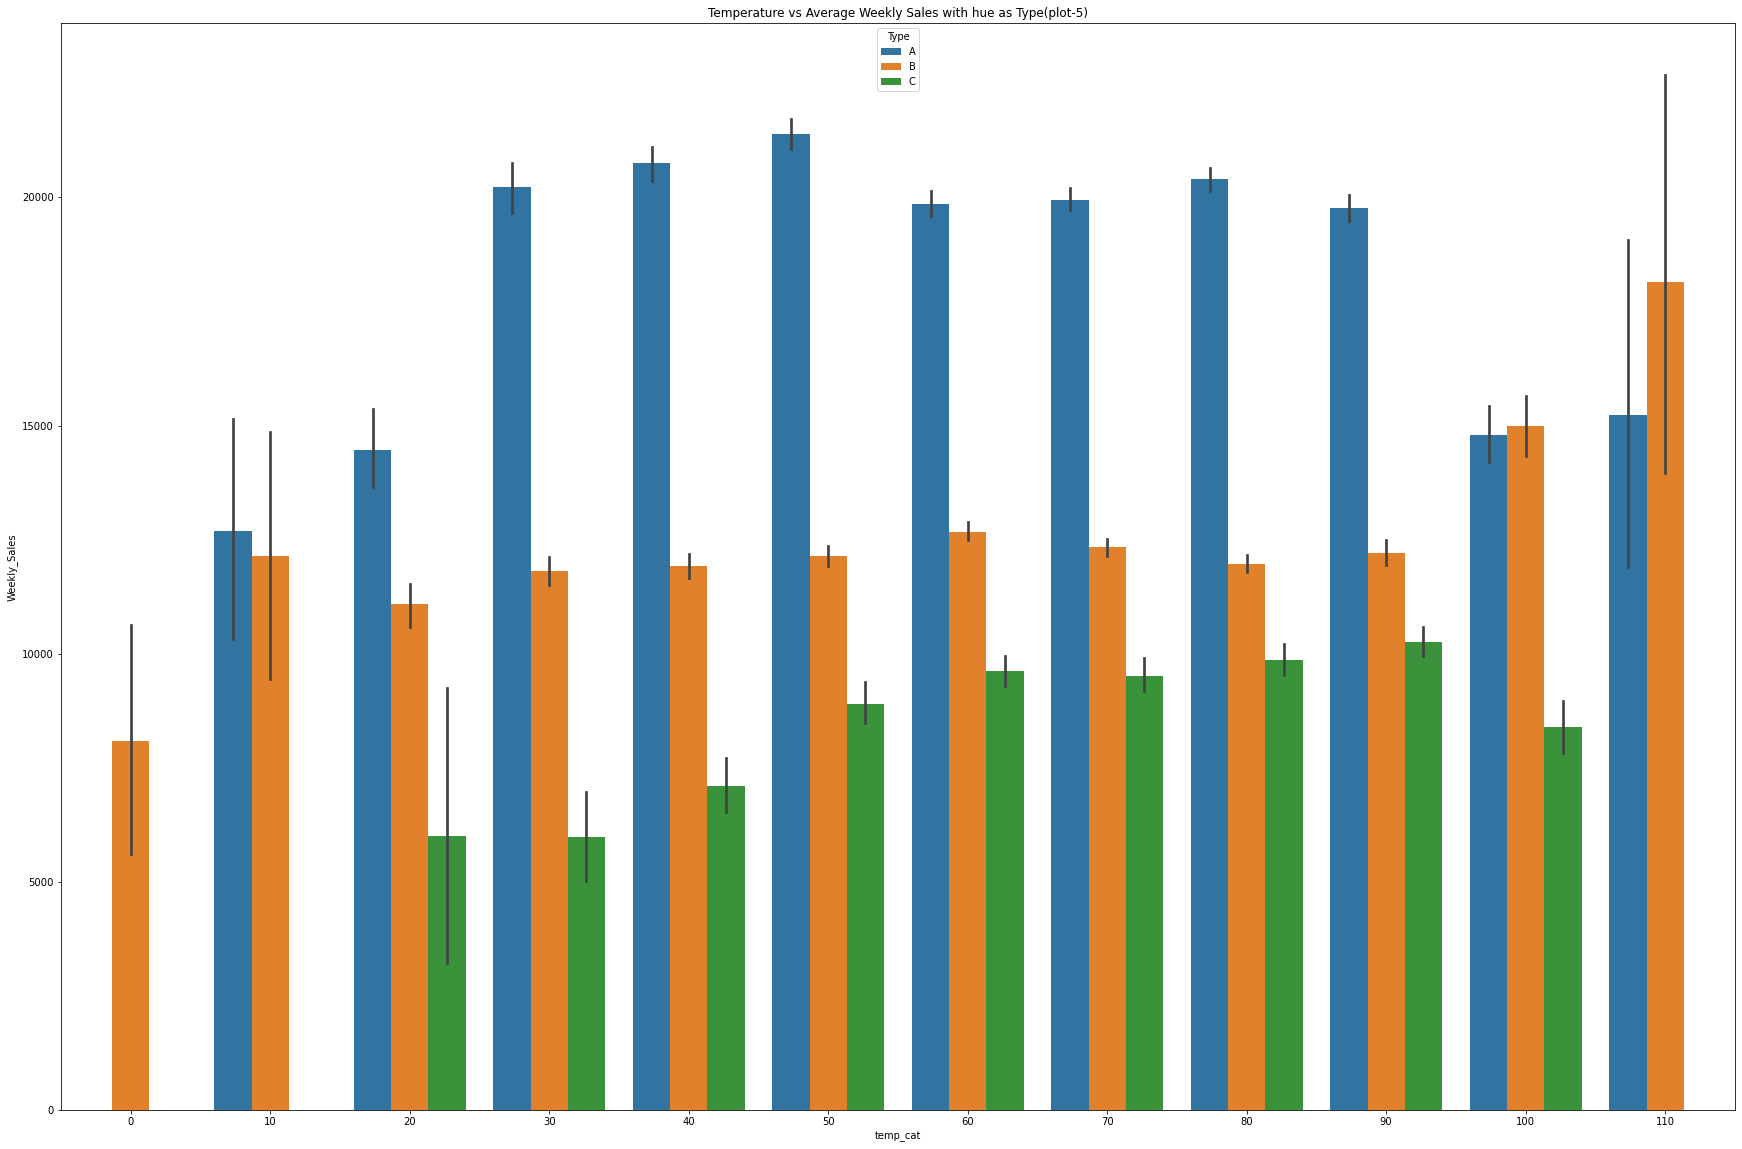

In [629]:
# Bar plot of dept vs weekly sales with hue as Type
plt.figure(figsize=(30,20))
sns.barplot(x=df['temp_cat'], y=df['Weekly_Sales'], hue=df['Type'])
plt.title('Temperature vs Average Weekly Sales with hue as Type(plot-5)')
plt.show()

##### Observation:
    1. From plot-1, when holidays and temperature between 35 to 50, median of weekly sales more than non-holidays.
    2. From plot-2, total weekly sales are high during non-holidays when temperature is between 60 to 80.
    3. From plot-2, total weekly sales are high during holidays when temperature is between 30 to 50.
    2. from plot-3, when temperature is moderate i.e. between 20 to 80, high average sales during holidays 
    than non-holidays.
    3. From plot-4, when temperature is high, median of weekly sales of type b stores more than type a and type c.
    3. From plot-5, when temperature is high, type b stores are making good average weekly sales than type a and c stores.
    4. From plot-5, when temperature is high or low, there are no sales in type c stores.

##### Fuel Price

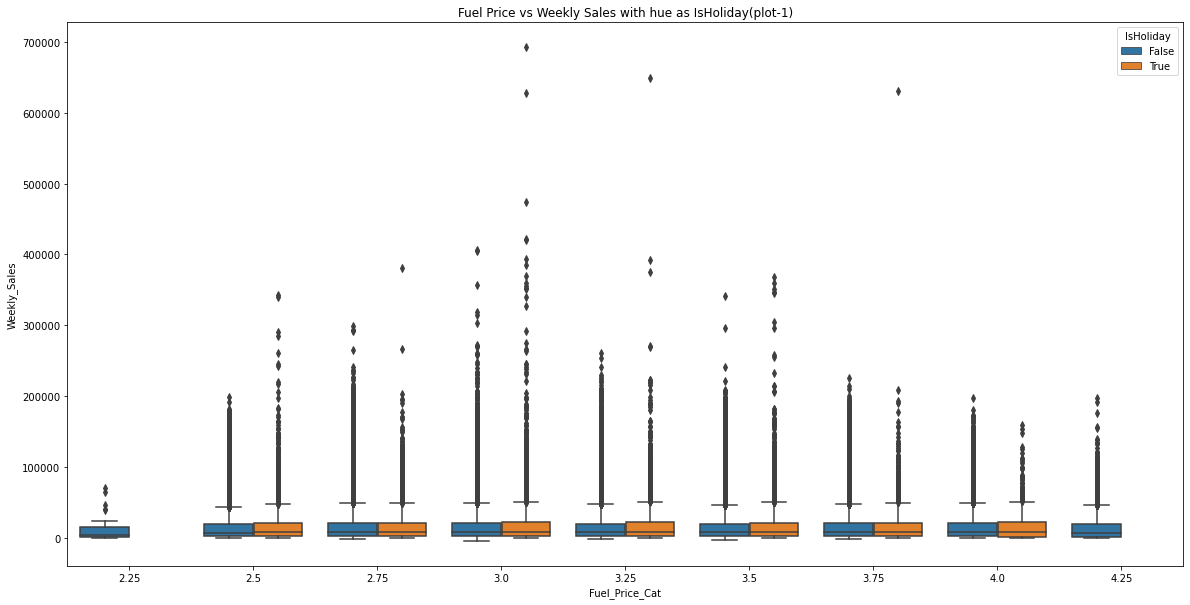

In [632]:
# Box plot of Fuel price vs weekly sales with hue as IsHoliday
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Fuel Price vs Weekly Sales with hue as IsHoliday(plot-1)')
plt.show()

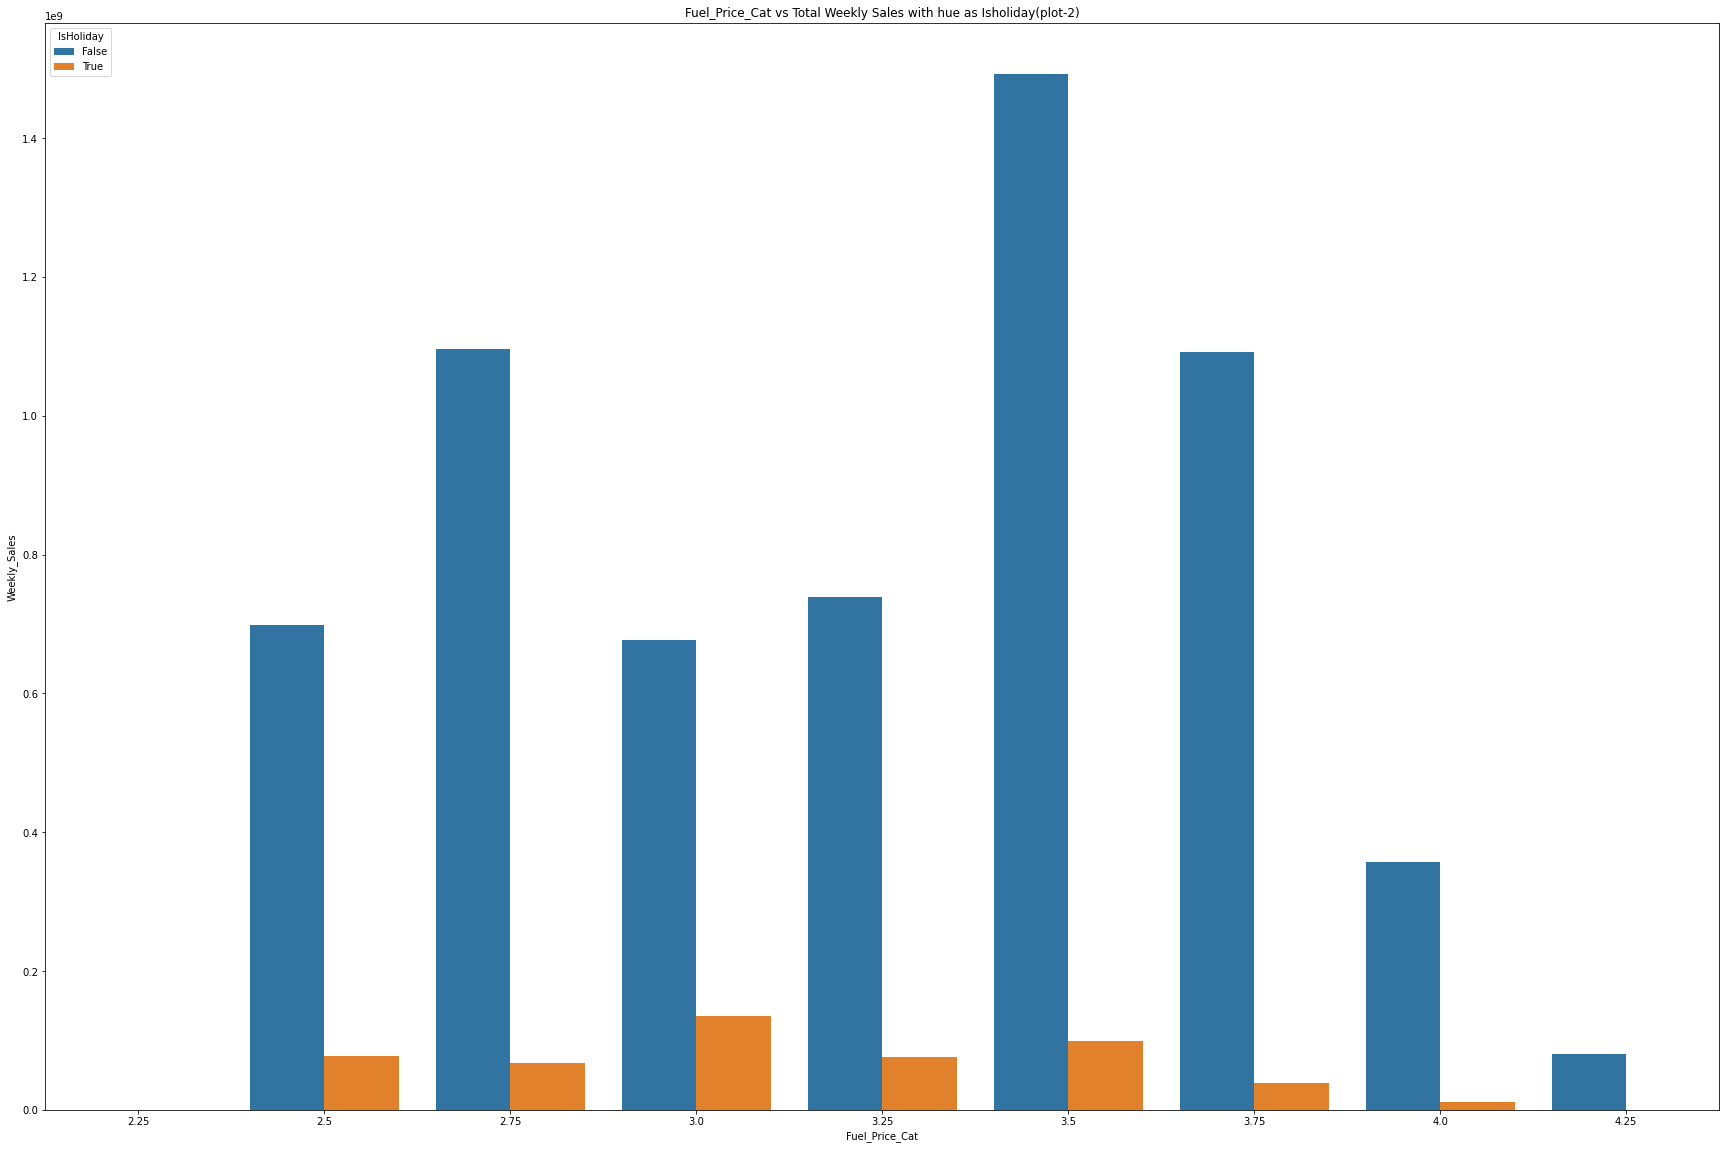

In [634]:
# grouping data by Fuel_Price_Cat and isholiday and plotting store vs total weekly Sales with hue as Isholiday
df1 = df.groupby(['Fuel_Price_Cat','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.barplot(x=df1['Fuel_Price_Cat'], y=df1['Weekly_Sales'], hue=df1['IsHoliday'])
plt.title('Fuel_Price_Cat vs Total Weekly Sales with hue as Isholiday(plot-2)')
plt.show()

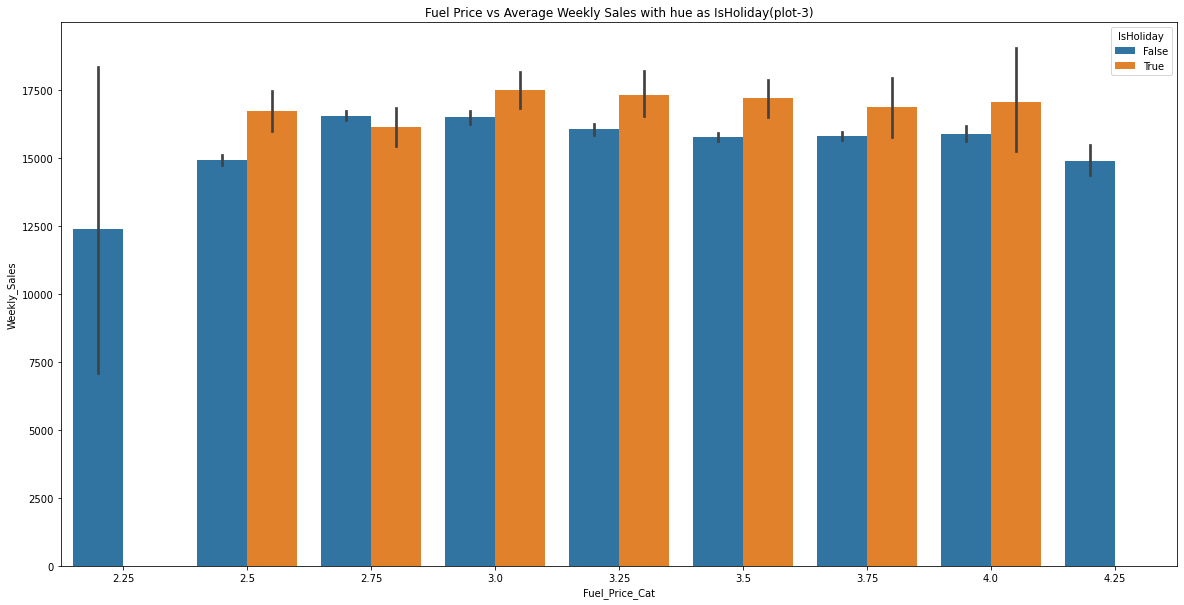

In [635]:
# Bar plot of Fuel price vs weekly sales with hue as IsHoliday
plt.figure(figsize=(20,10))
sns.barplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Fuel Price vs Average Weekly Sales with hue as IsHoliday(plot-3)')
plt.show()

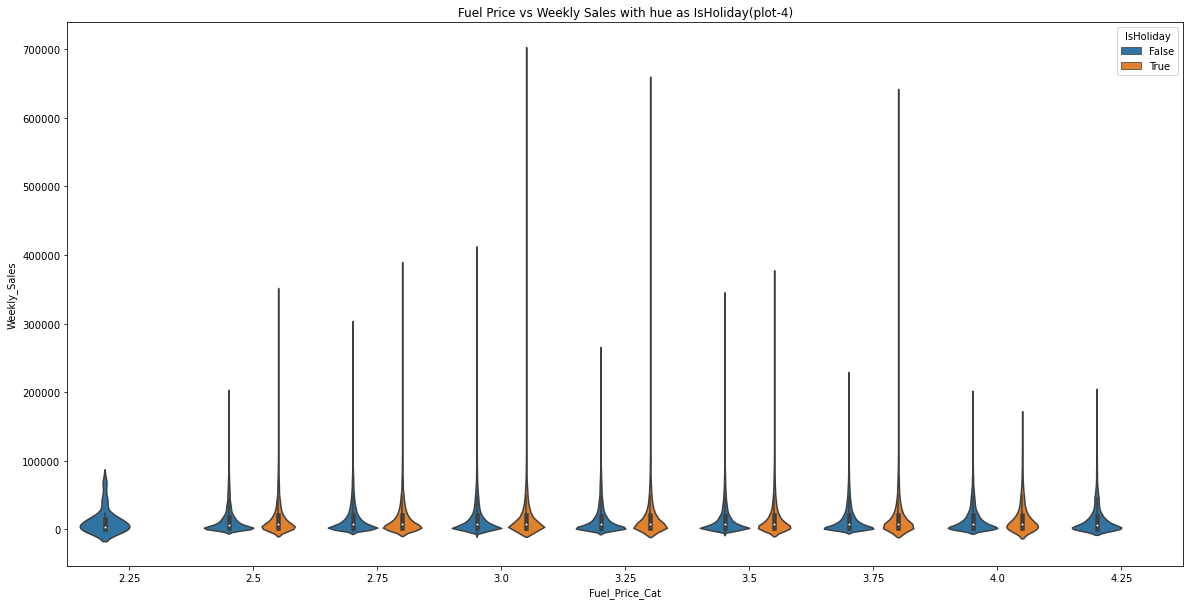

In [637]:
# Violin plot of Fuel price vs weekly sales with hue as IsHoliday
plt.figure(figsize=(20,10))
sns.violinplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Fuel Price vs Weekly Sales with hue as IsHoliday(plot-4)')
plt.show()

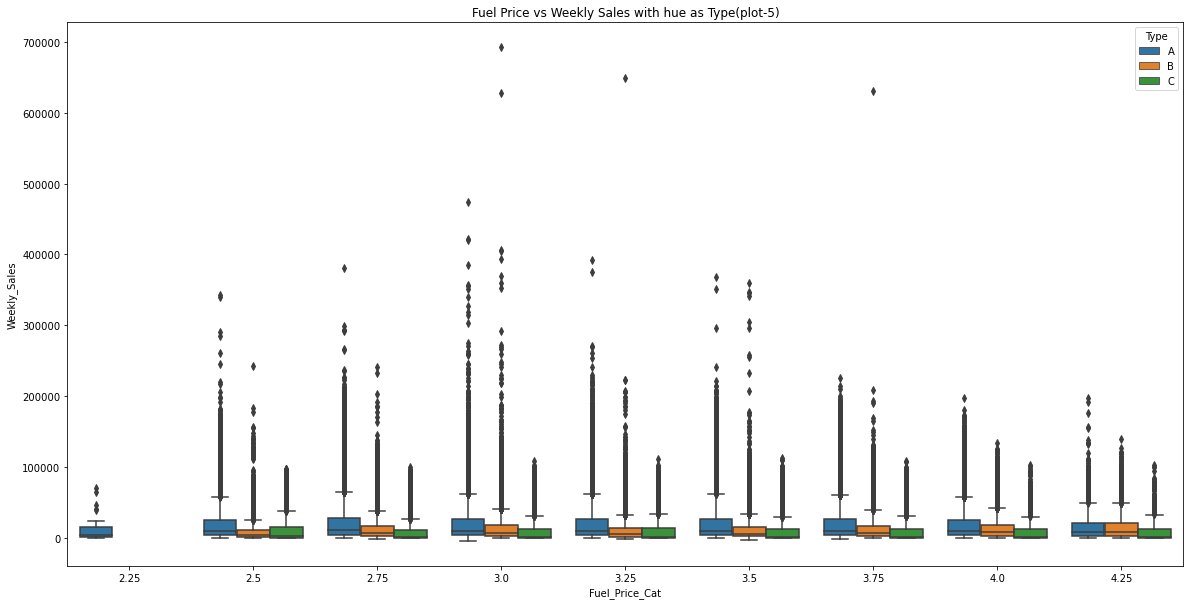

In [639]:
# Box plot of Fuel price vs weekly sales with hue as Type
plt.figure(figsize=(20,10))
sns.boxplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'], hue=df['Type'])
plt.title('Fuel Price vs Weekly Sales with hue as Type(plot-5)')
plt.show()

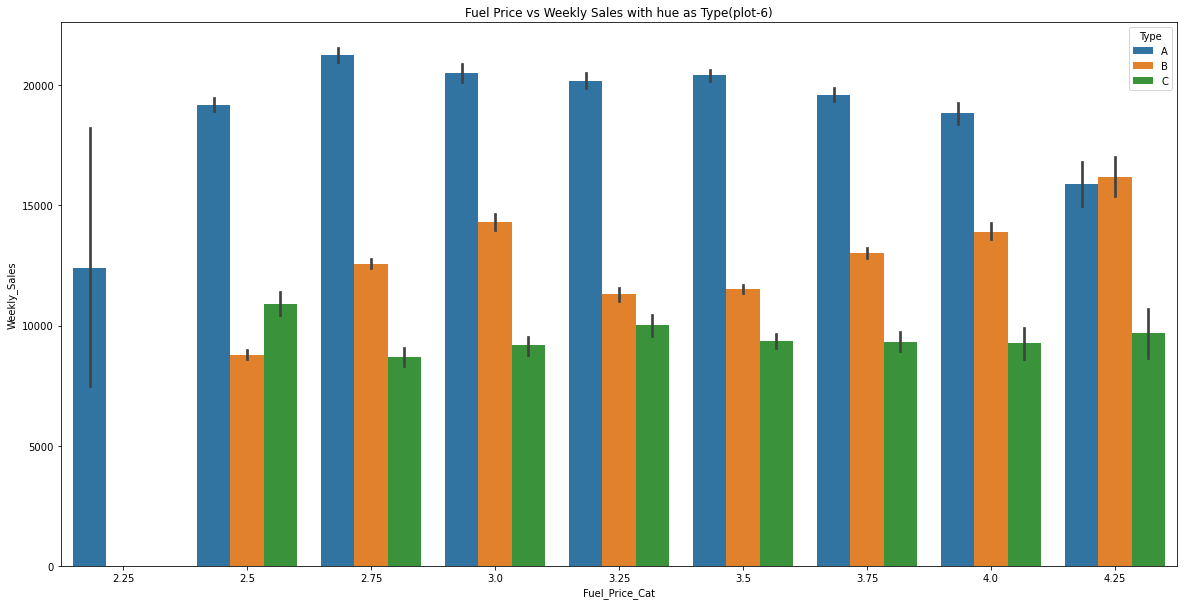

In [641]:
# Bar plot of Fuel price vs weekly sales with hue as Type
plt.figure(figsize=(20,10))
sns.barplot(x=df['Fuel_Price_Cat'], y=df['Weekly_Sales'], hue=df['Type'])
plt.title('Fuel Price vs Weekly Sales with hue as Type(plot-6)')
plt.show()

###### Observation:
    1. From plot-1, when the fuel price is between 3 to 3.25. Median of weekly sales in holiday weeks is more 
    than non-holiday weeks.
    2. From plot-2, when fuel price is between 2.75 to 3. Total weekly sales in holiday weeks is more than non-holiday 
    weeks.
    3. From plot-3, average weekly sales in holiday weeks is more than non-holiday weeks when fuel price is moderate.
    4. From plot-4&5, Many outlier when fuel price is moderate.
    5. From plot-6, when fuel price is high type b store is making good weekly sales

##### Date

Text(0.5, 1.0, 'MarkDown vs Date (Plot-1)')

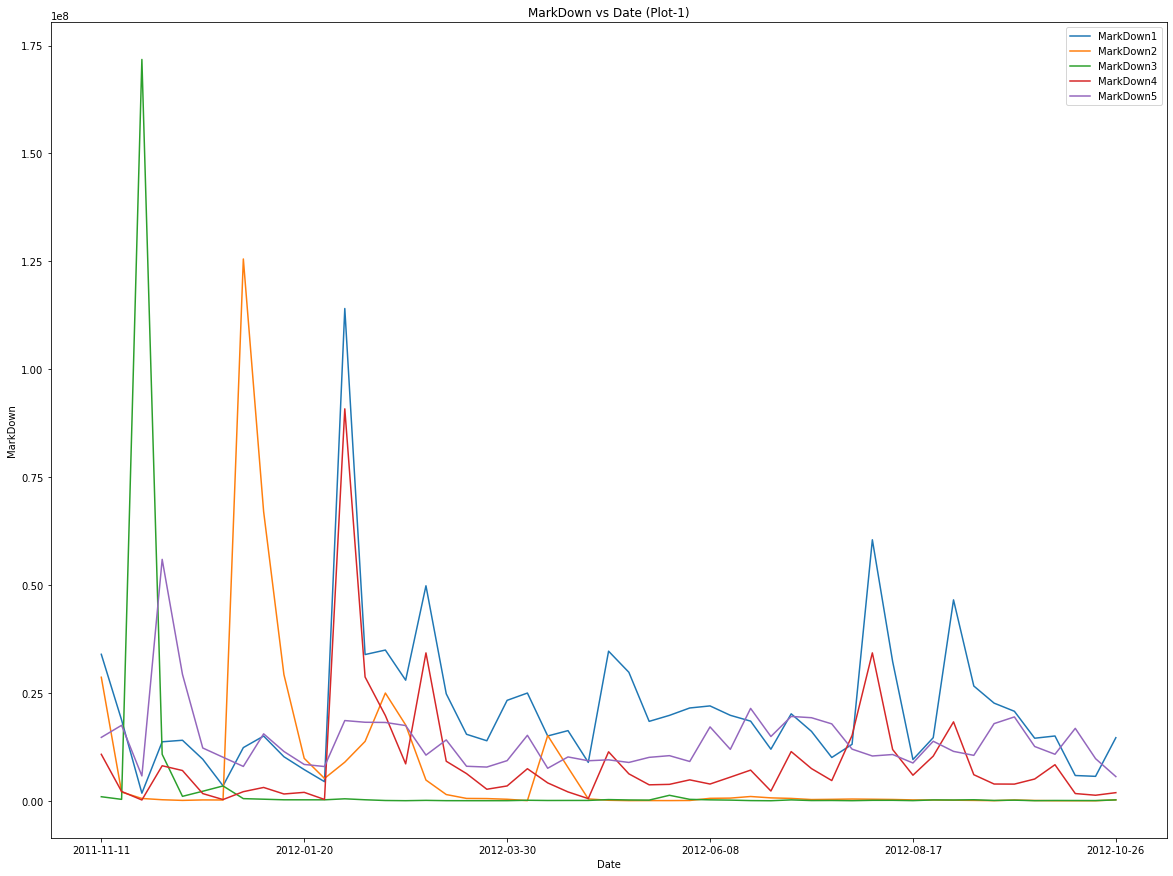

In [660]:
df1 = new_df_markdown.groupby('Date')['MarkDown1'].sum()
df2 = new_df_markdown.groupby('Date')['MarkDown2'].sum()
df3 = new_df_markdown.groupby('Date')['MarkDown3'].sum()
df4 = new_df_markdown.groupby('Date')['MarkDown4'].sum()
df5 = new_df_markdown.groupby('Date')['MarkDown5'].sum()
plt.figure(figsize=(20,15))
df1.plot(label='MarkDown1')
df2.plot(label='MarkDown2')
df3.plot(label='MarkDown3')
df4.plot(label='MarkDown4')
df5.plot(label='MarkDown5')
plt.xlabel('Date')
plt.ylabel('MarkDown')
plt.legend()
plt.title('MarkDown vs Date (Plot-1)')

Text(0.5, 1.0, 'CPI vs Date (Plot-2)')

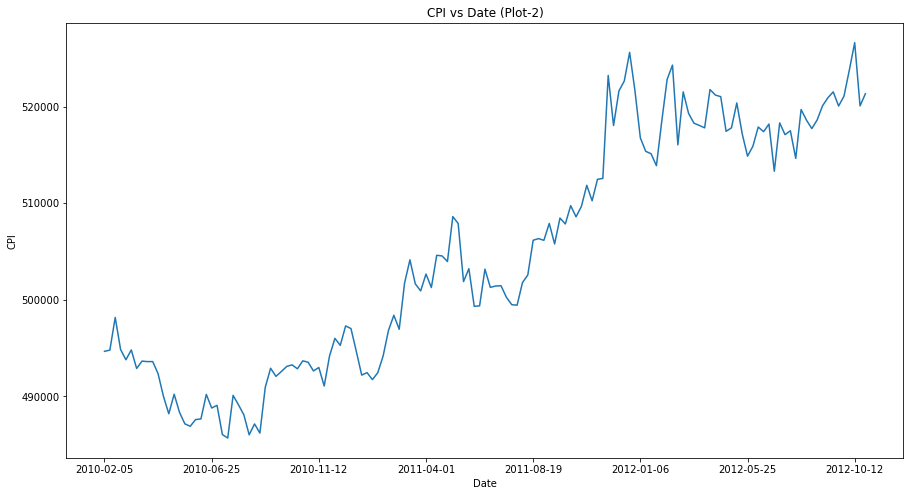

In [661]:
# Grouping date and plotting total CPI
df1 = df.groupby('Date')['CPI'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('CPI')
plt.title('CPI vs Date (Plot-2)')

Text(0.5, 1.0, 'Unemployment vs Date (Plot-3)')

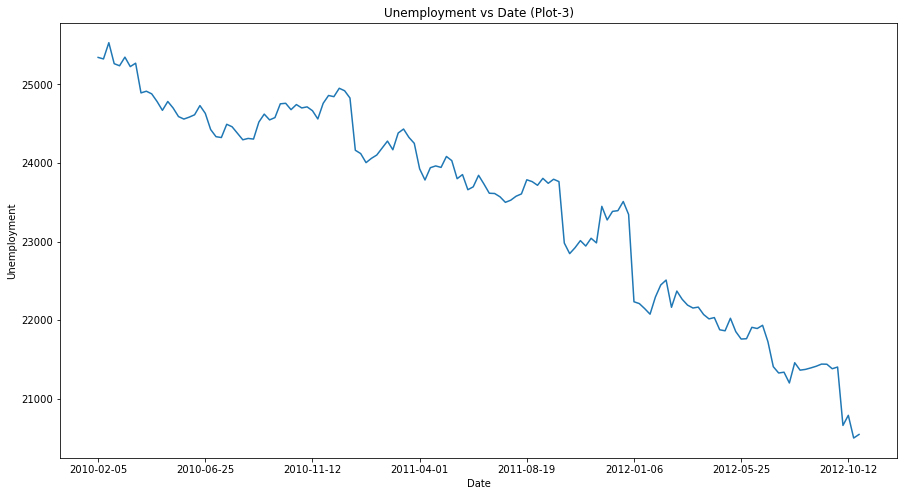

In [662]:
# Grouping date and plotting total unemployment
df1 = df.groupby('Date')['Unemployment'].sum()
plt.figure(figsize=(15,8))
df1.plot()
plt.xlabel('Date')
plt.ylabel('Unemployment')
plt.title('Unemployment vs Date (Plot-3)')

##### Observation:
    1. From plot-1, in the beginning, markdown 3&4 were highest then after that markdown 1 is highest and markdown 3 is lowest 
    till last date. 
    2. From plot-1, spike in markdown1 in the month-end of January. Spike in markdown2 in the month-start of January. 
    Spike in markdown3 in the month-end of november. Spike in markdown4 in the month-end of January. 
    Spike in markdown5 in the month-start of december.
    3. From plot-2, a upward trend is observed in CPI.
    4. From plot-3, a downward trend is observed in unemployment.

##### Markdown

Text(0.5, 1.0, 'Markdown1 vs Weekly sales with hue as Type')

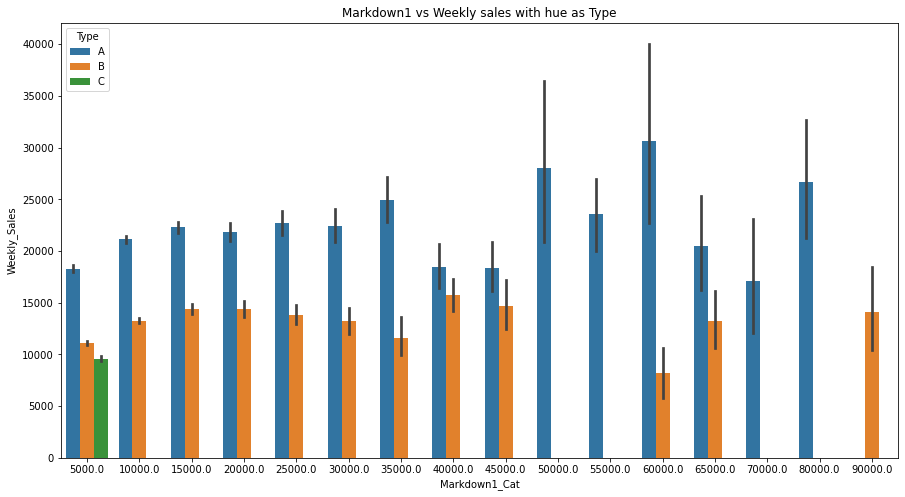

In [668]:
plt.figure(figsize=(15,8))
sns.barplot(df['Markdown1_Cat'], df['Weekly_Sales'], hue=df['Type'])
plt.title('Markdown1 vs Weekly sales with hue as Type (plot-1)')

Text(0.5, 1.0, 'Markdown2 vs Weekly sales with hue as Type (plot-2)')

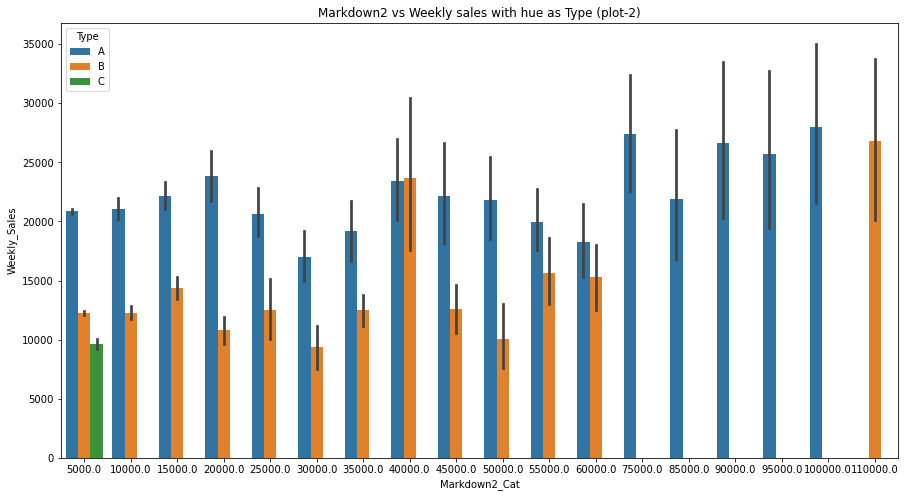

In [673]:
plt.figure(figsize=(15,8))
sns.barplot(df['Markdown2_Cat'], df['Weekly_Sales'], hue=df['Type'])
plt.title('Markdown2 vs Weekly sales with hue as Type (plot-2)')

Text(0.5, 1.0, 'Markdown3 vs Weekly sales with hue as Type (plot-3)')

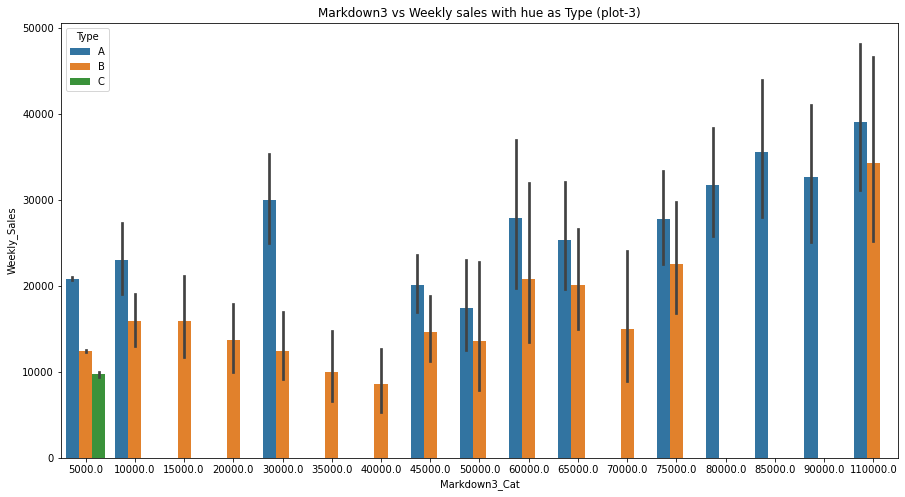

In [674]:
plt.figure(figsize=(15,8))
sns.barplot(df['Markdown3_Cat'], df['Weekly_Sales'], hue=df['Type'])
plt.title('Markdown3 vs Weekly sales with hue as Type (plot-3)')

Text(0.5, 1.0, 'Markdown4 vs Weekly sales with hue as Type (plot-4)')

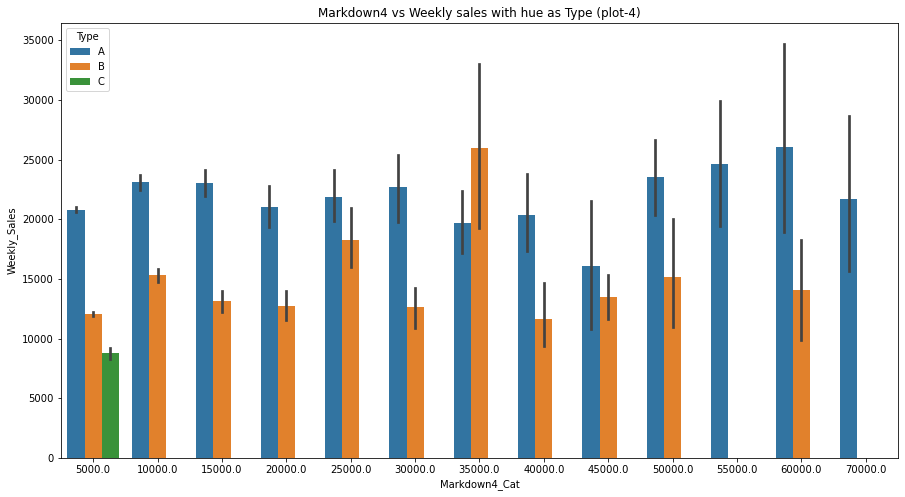

In [672]:
plt.figure(figsize=(15,8))
sns.barplot(df['Markdown4_Cat'], df['Weekly_Sales'], hue=df['Type'])
plt.title('Markdown4 vs Weekly sales with hue as Type (plot-4)')

Text(0.5, 1.0, 'Markdown5 vs Weekly sales with hue as Type (plot-5)')

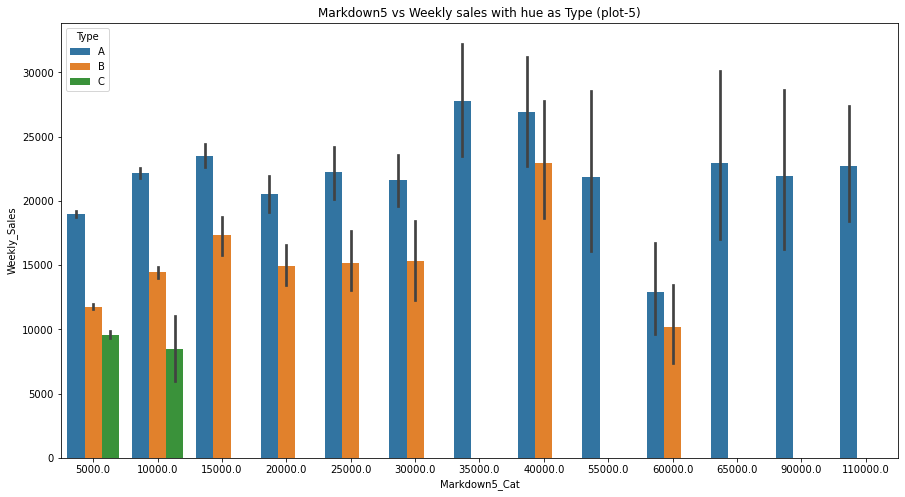

In [675]:
plt.figure(figsize=(15,8))
sns.barplot(df['Markdown5_Cat'], df['Weekly_Sales'], hue=df['Type'])
plt.title('Markdown5 vs Weekly sales with hue as Type (plot-5)')

##### Observation:
    Type C has not organised much markdown events. Type A organised the most. 

##### Type

Text(0.5, 1.0, 'Type vs Weekly sales with hue as IsHoliday (plot-1)')

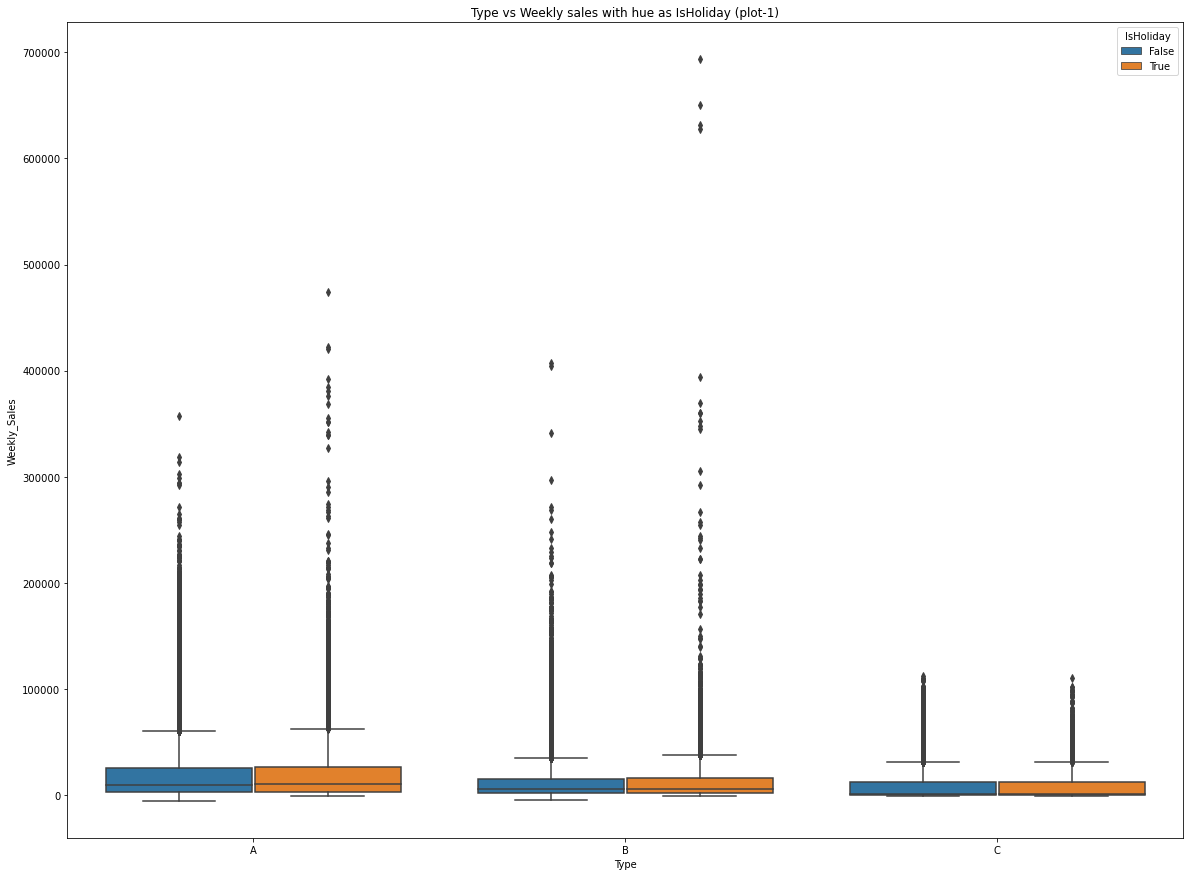

In [691]:
# Box plot of weekly sales over Type with hue as Isholiday
plt.figure(figsize=(20,15))
sns.boxplot(x=df['Type'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Type vs Weekly sales with hue as IsHoliday (plot-1)')

Text(0.5, 1.0, 'Type vs Averag weeekly sales with hue as IsHoliday (plot-2)')

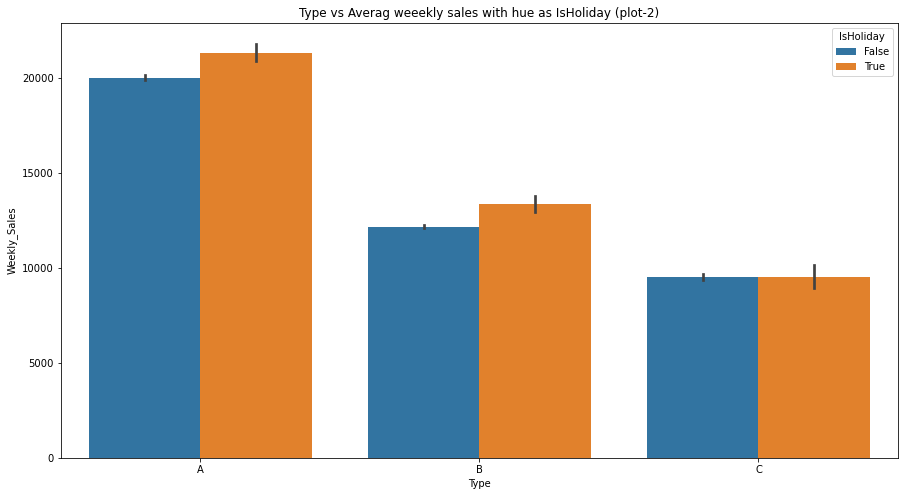

In [695]:
# Bar plot of weekly sales over Type with hue as Isholiday
plt.figure(figsize=(15,8))
sns.barplot(x=df['Type'], y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Type vs Averag weeekly sales with hue as IsHoliday (plot-2)')

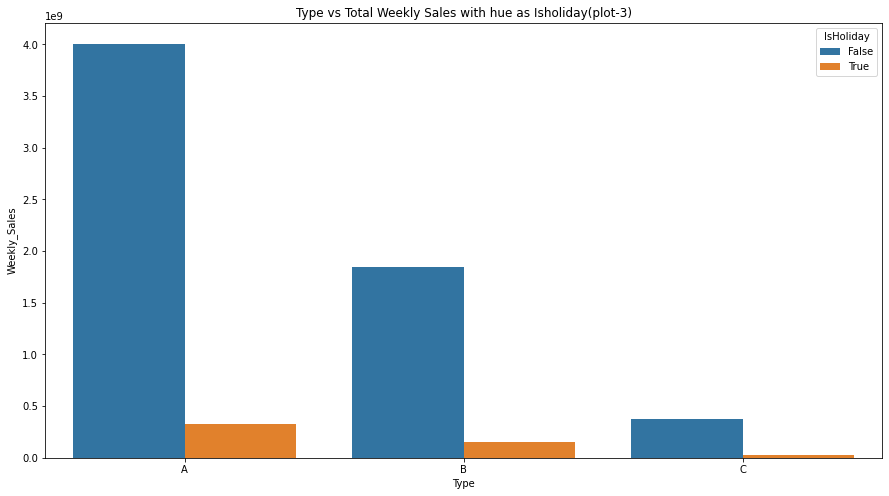

In [694]:
# grouping data by Type and isholiday and plotting store vs total weekly Sales with hue as Isholiday
df1 = df.groupby(['Type','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.barplot(x=df1['Type'], y=df1['Weekly_Sales'], hue=df1['IsHoliday'])
plt.title('Type vs Total Weekly Sales with hue as Isholiday(plot-3)')
plt.show()

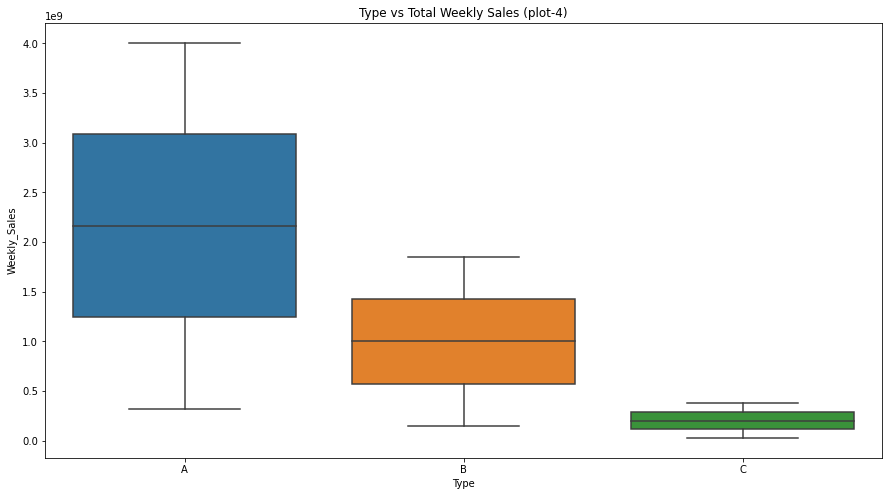

In [716]:
# grouping data by Type and isholiday and box plotting type vs weekly Sales with hue as Isholiday
df1 = df.groupby(['Type','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.boxplot(x=df1['Type'], y=df1['Weekly_Sales'])
plt.title('Type vs Total Weekly Sales (plot-4)')
plt.show()

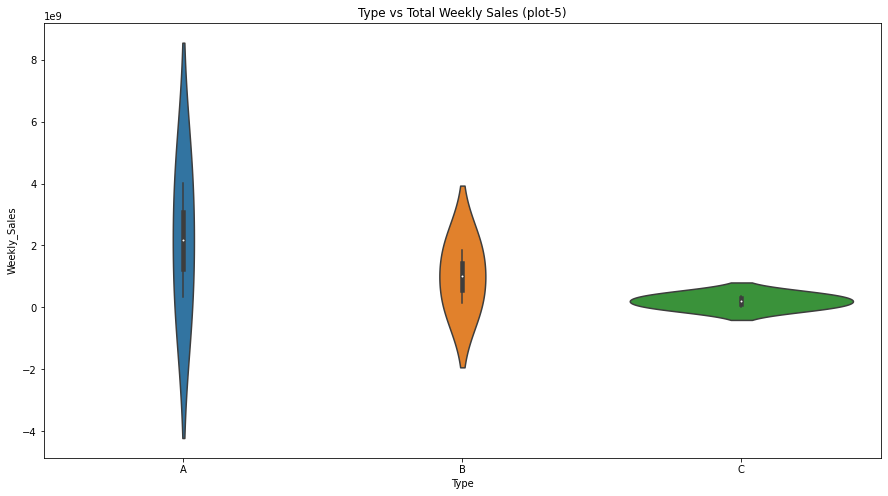

In [715]:
# grouping data by Type and isholiday and violin plotting type vs weekly Sales with hue as Isholiday
df1 = df.groupby(['Type','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.violinplot(x=df1['Type'], y=df1['Weekly_Sales'])
plt.title('Type vs Total Weekly Sales (plot-5)')
plt.show()

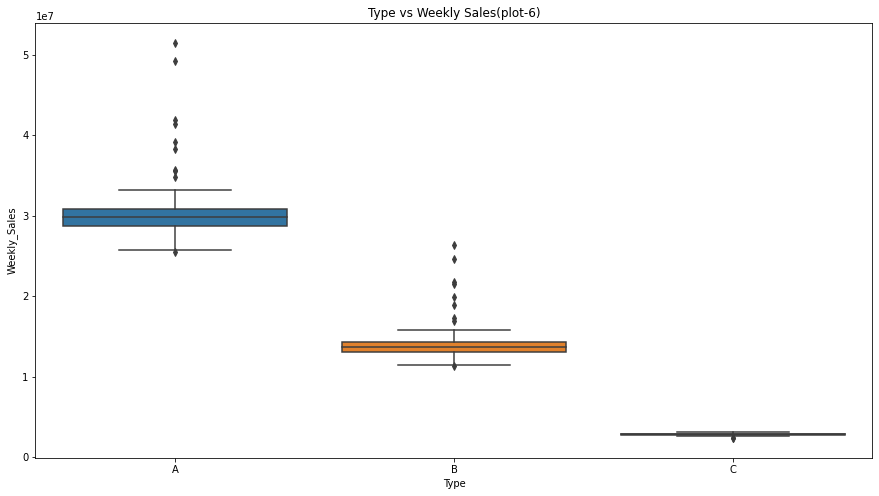

In [714]:
# grouping data by Type and isholiday and box plotting type vs weekly Sales with hue as Date
df1 = df.groupby(['Type','Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.boxplot(x=df1['Type'], y=df1['Weekly_Sales'])
plt.title('Type vs Weekly Sales(plot-6)')
plt.show()

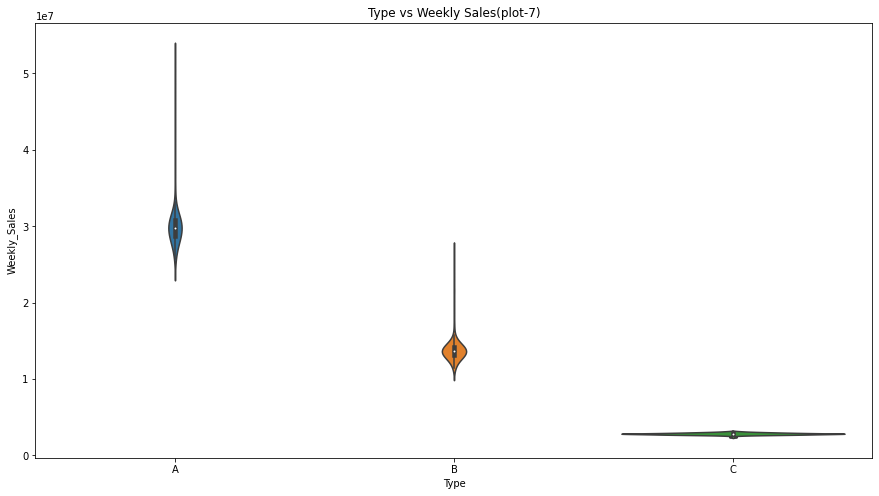

In [713]:
# grouping data by Type and isholiday and violin plotting type vs weekly Sales with hue as Date
df1 = df.groupby(['Type','Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(15,8))
sns.violinplot(x=df1['Type'], y=df1['Weekly_Sales'])
plt.title('Type vs Weekly Sales(plot-7)')
plt.show()

##### Observation:
    1. From plot-1, in type A, median of weekly sales during holiday weeks is more than non-holiday weeks.
    2. From plot-2, average weekly sales of type A and type B is more when holiday weeks.
    3. From plot-3, total weekly sales of type A and type B is more when non-holiday weeks.
    4. From plot-4&5, after grouping dataset by type and isholiday we can observe that weekly sales for 3 types
    of stores are in different zones and gaussian distributed.
    5. From plot-6&7, after grouping dataset by type and date we can observe that weekly sales for 3 types
    of stores are in different zones and can be seprated easily.

Text(0.5, 1.0, 'Size vs Weekly Sales (plot-1)')

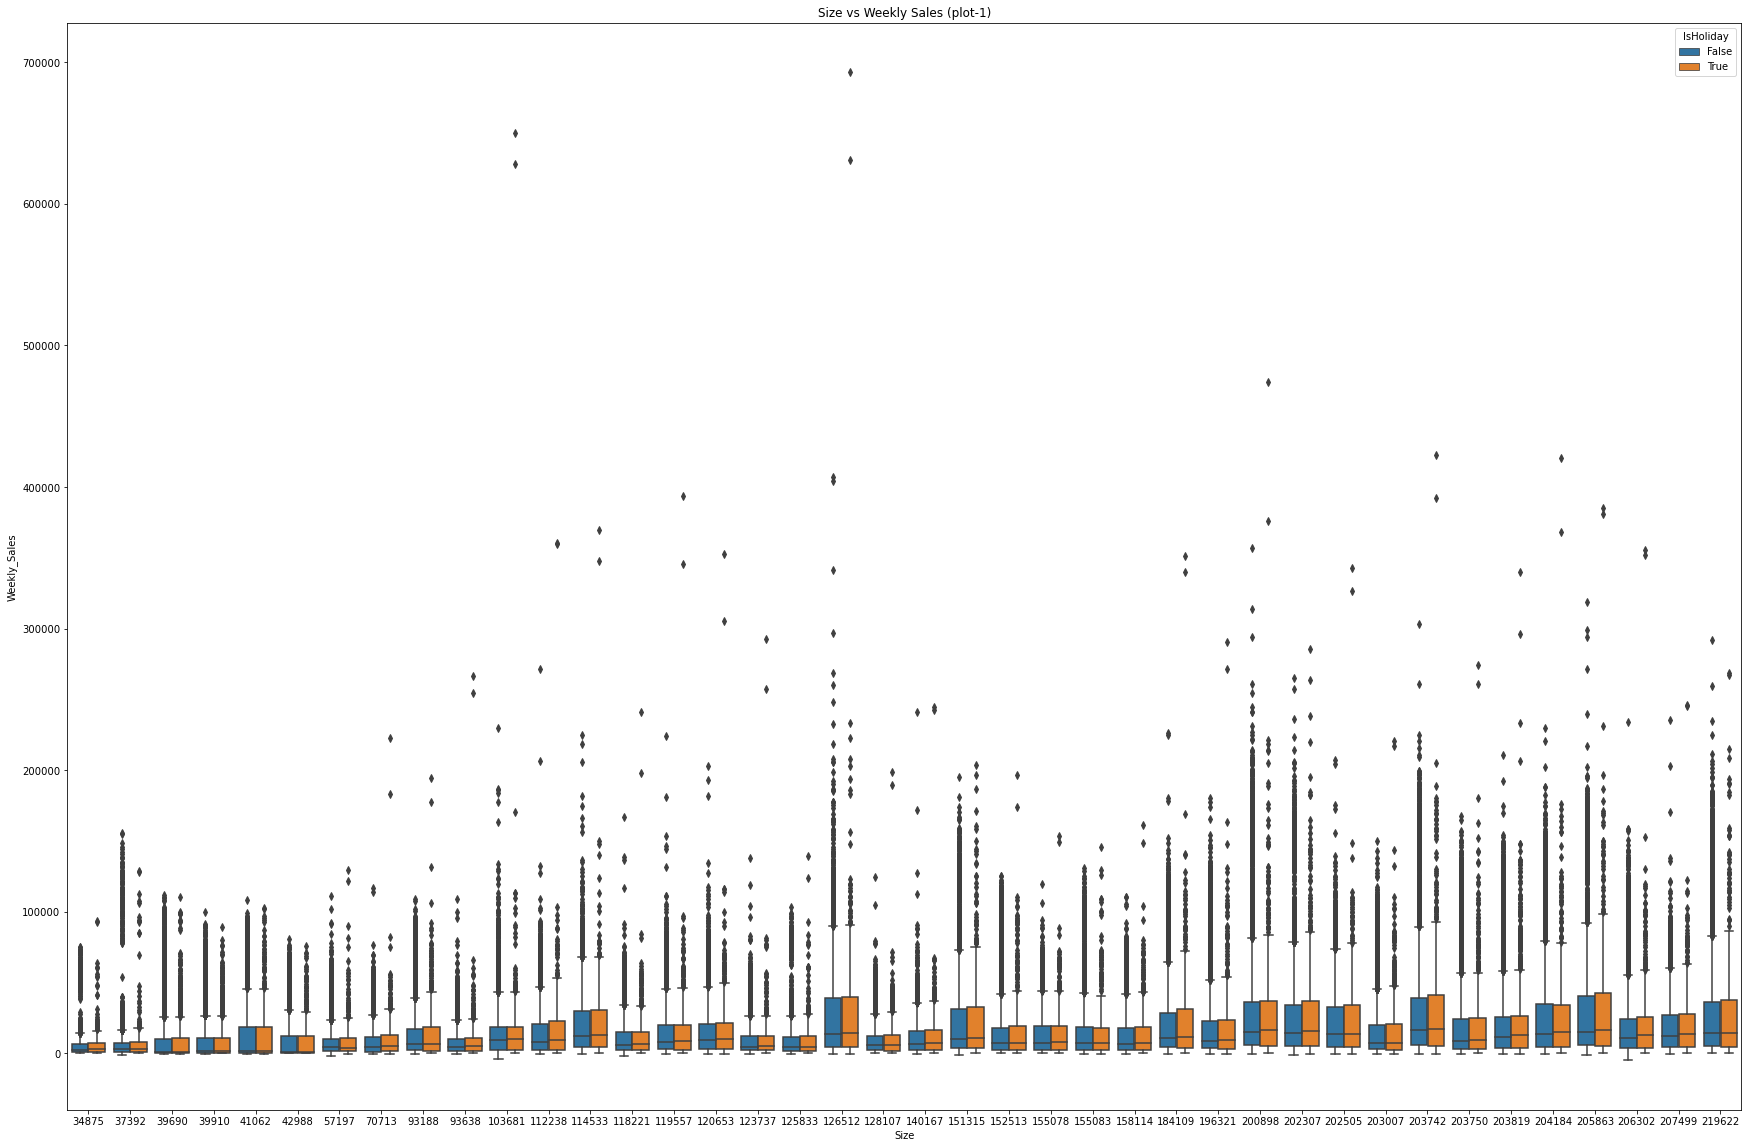

In [718]:
# Box plot of weekly sales over Size with hue as IsHoliday
plt.figure(figsize=(30,20))
sns.boxplot(x=df['Size'],y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Size vs Weekly Sales (plot-1)')

Text(0.5, 1.0, 'Size vs Average weekly Sales (plot-2)')

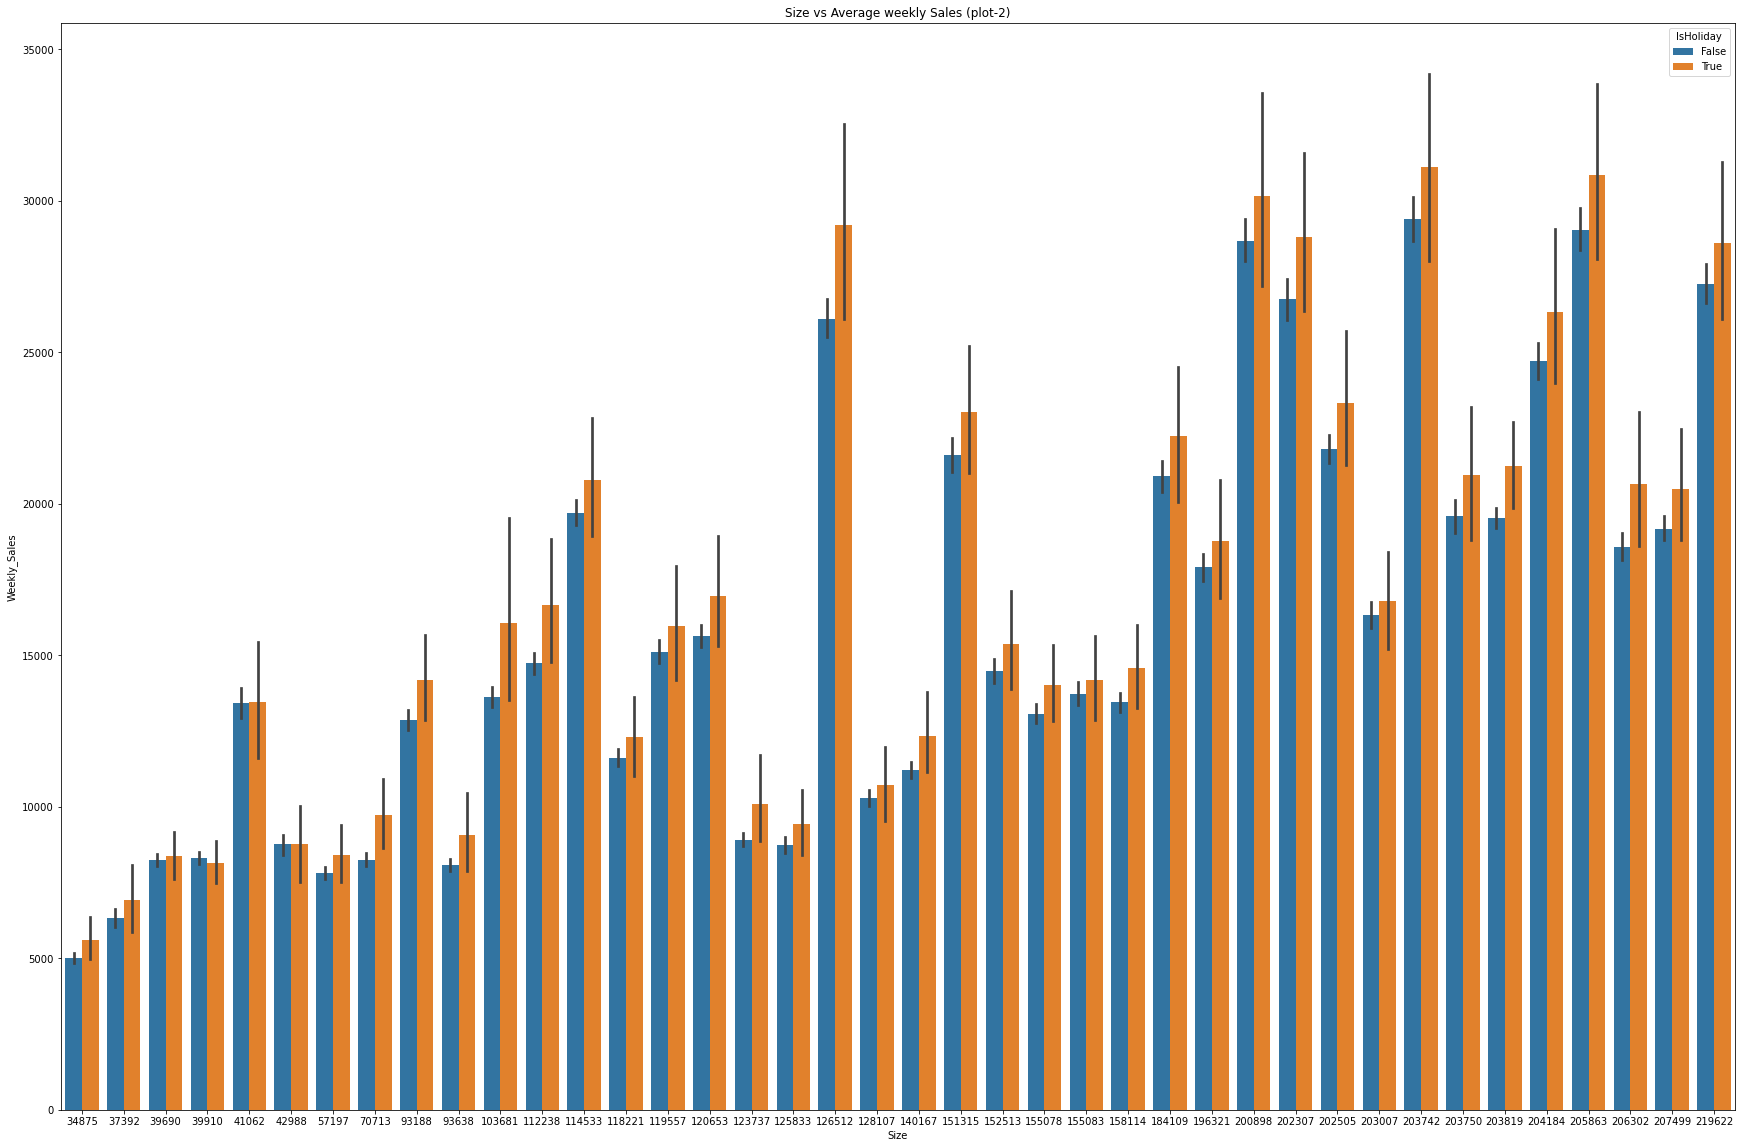

In [720]:
# Bar plot of weekly sales over Size with hue as IsHoliday
plt.figure(figsize=(30,20))
sns.barplot(x=df['Size'],y=df['Weekly_Sales'], hue=df['IsHoliday'])
plt.title('Size vs Average weekly Sales (plot-2)')

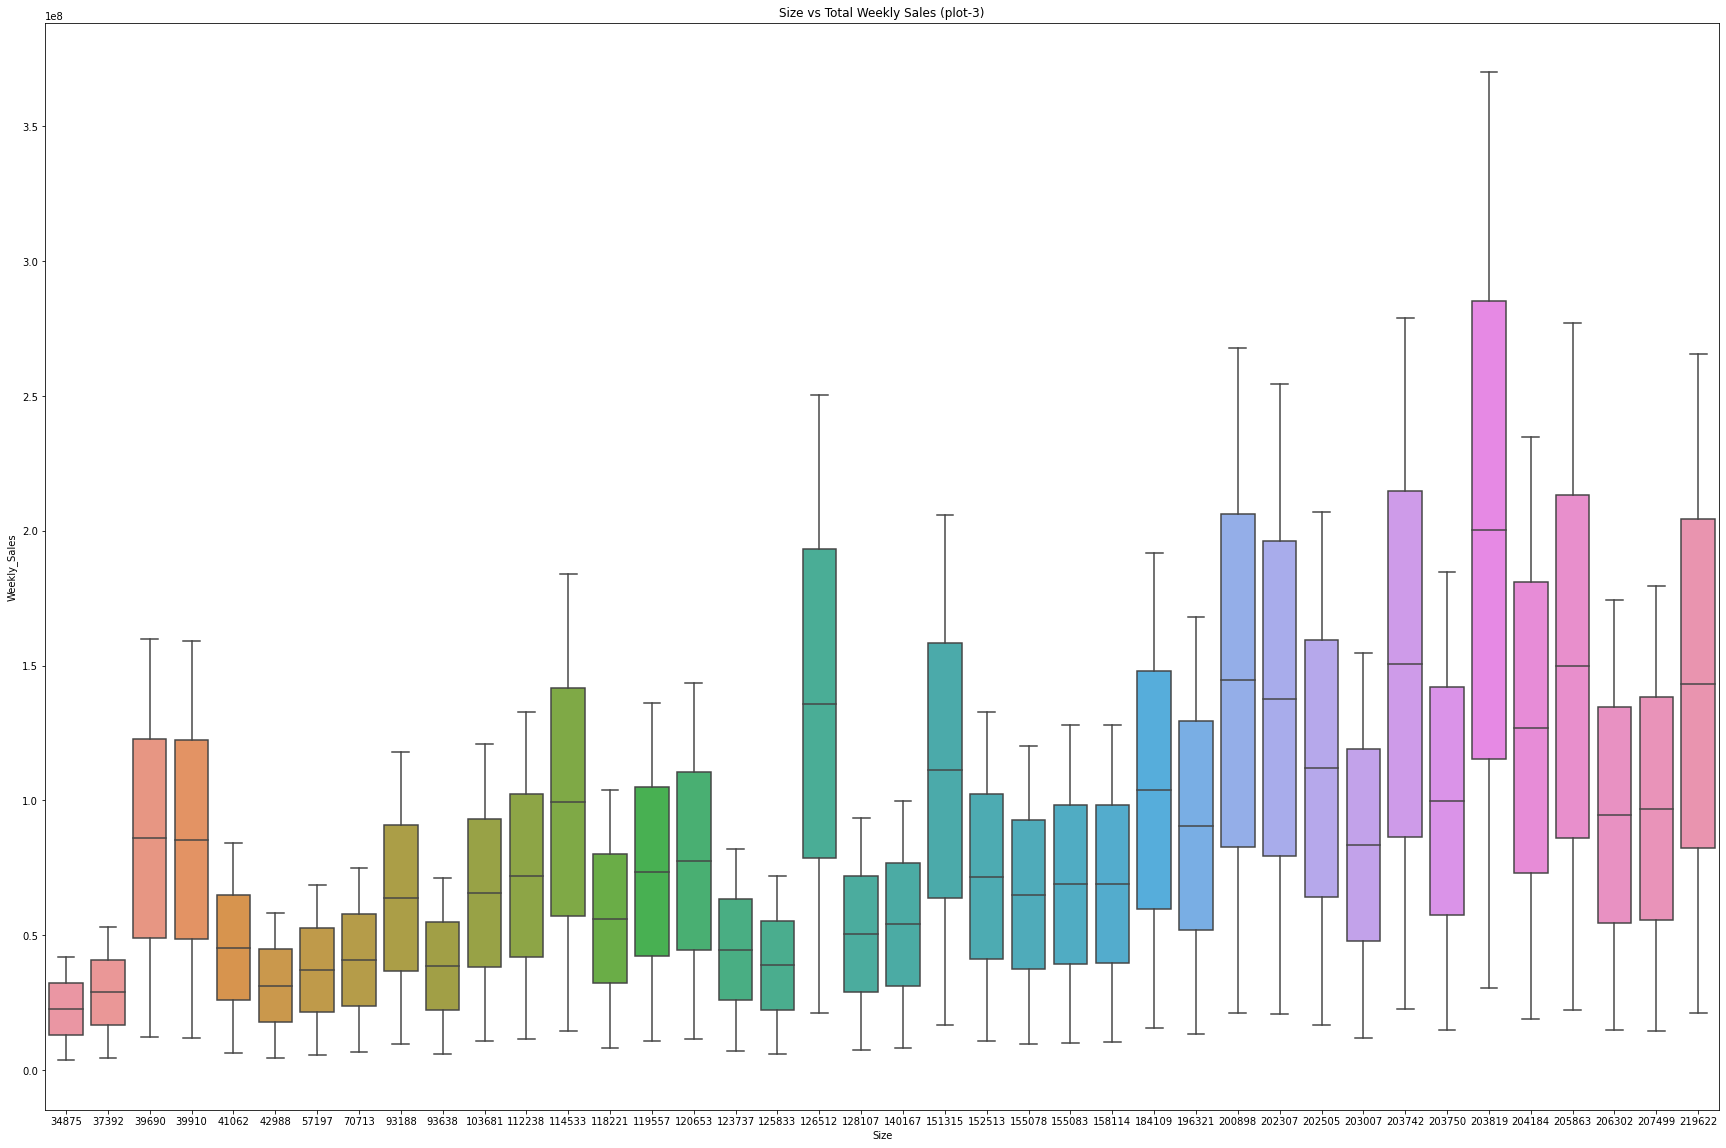

In [723]:
# grouping data by Size and isholiday and box plotting type vs weekly Sales with hue as Isholiday
df1 = df.groupby(['Size','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.boxplot(x=df1['Size'], y=df1['Weekly_Sales'])
plt.title('Size vs Total Weekly Sales (plot-3)')
plt.show()

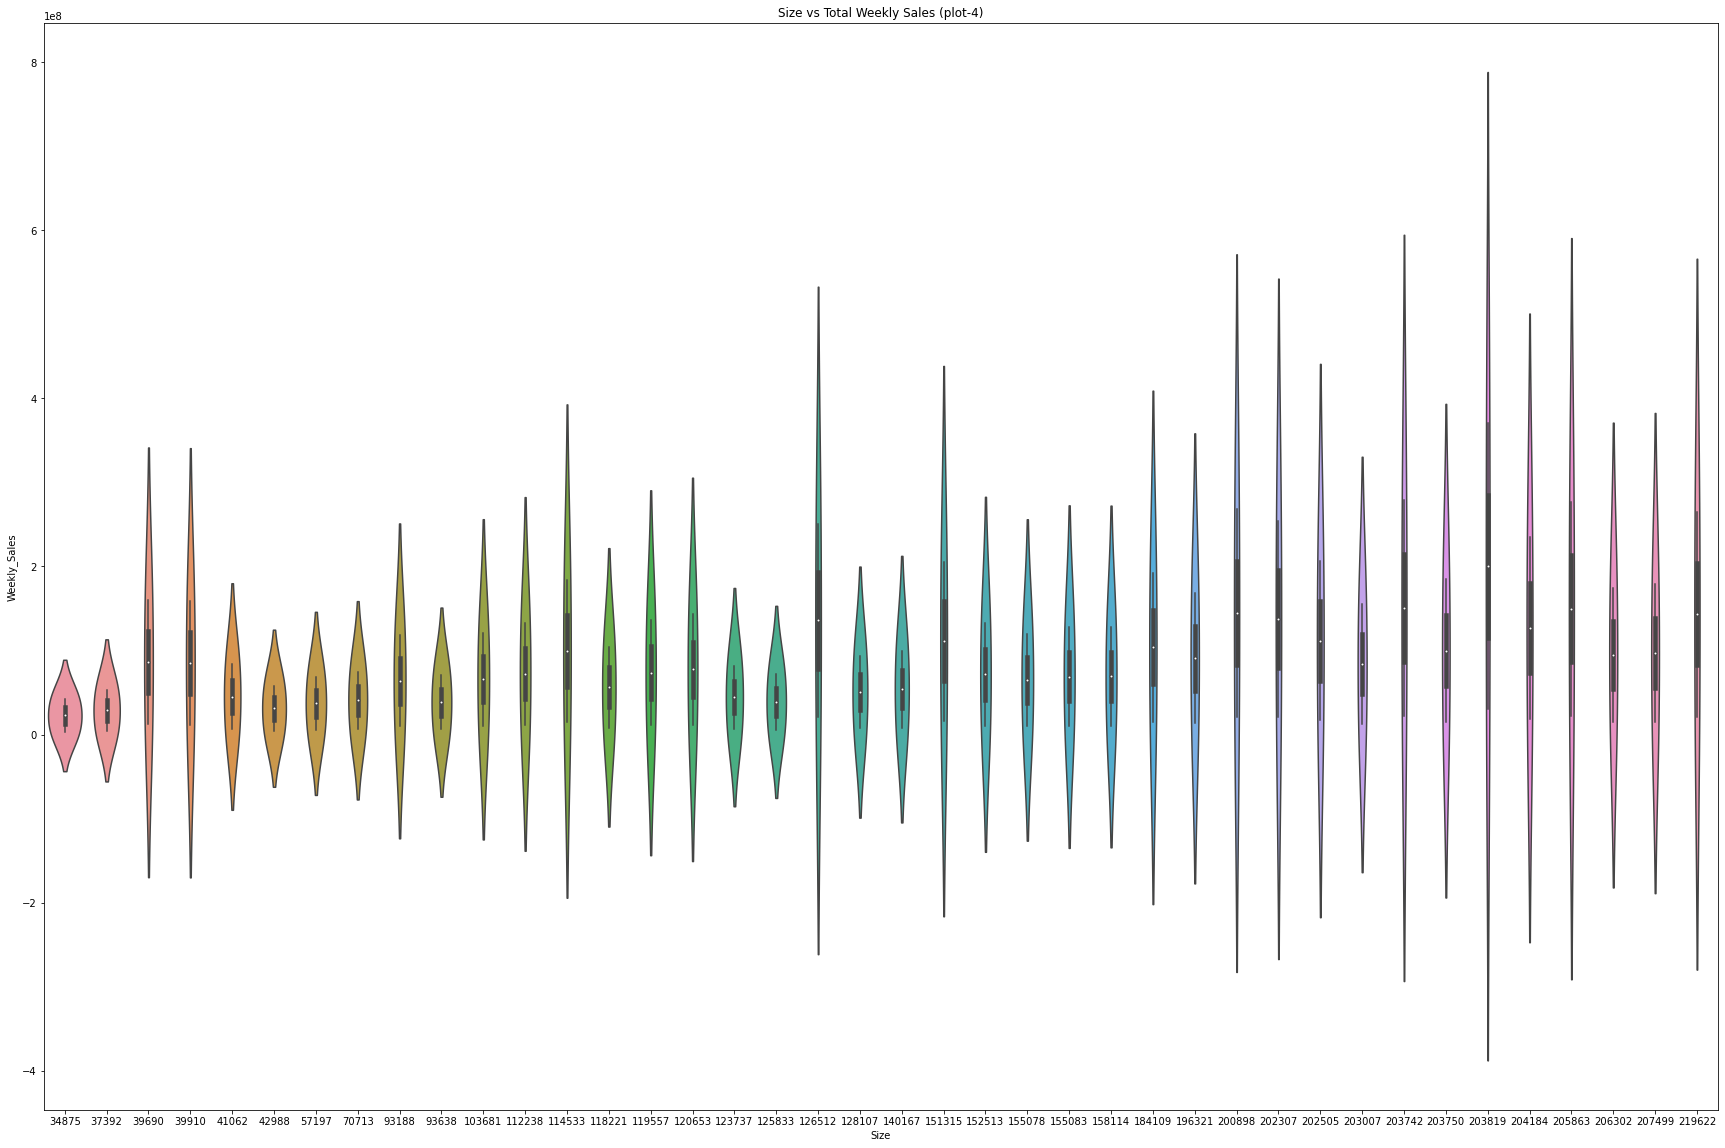

In [732]:
# grouping data by Size and isholiday and box plotting type vs weekly Sales with hue as Isholiday
df1 = df.groupby(['Size','IsHoliday'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.violinplot(x=df1['Size'], y=df1['Weekly_Sales'])
plt.title('Size vs Total Weekly Sales (plot-4)')
plt.show()

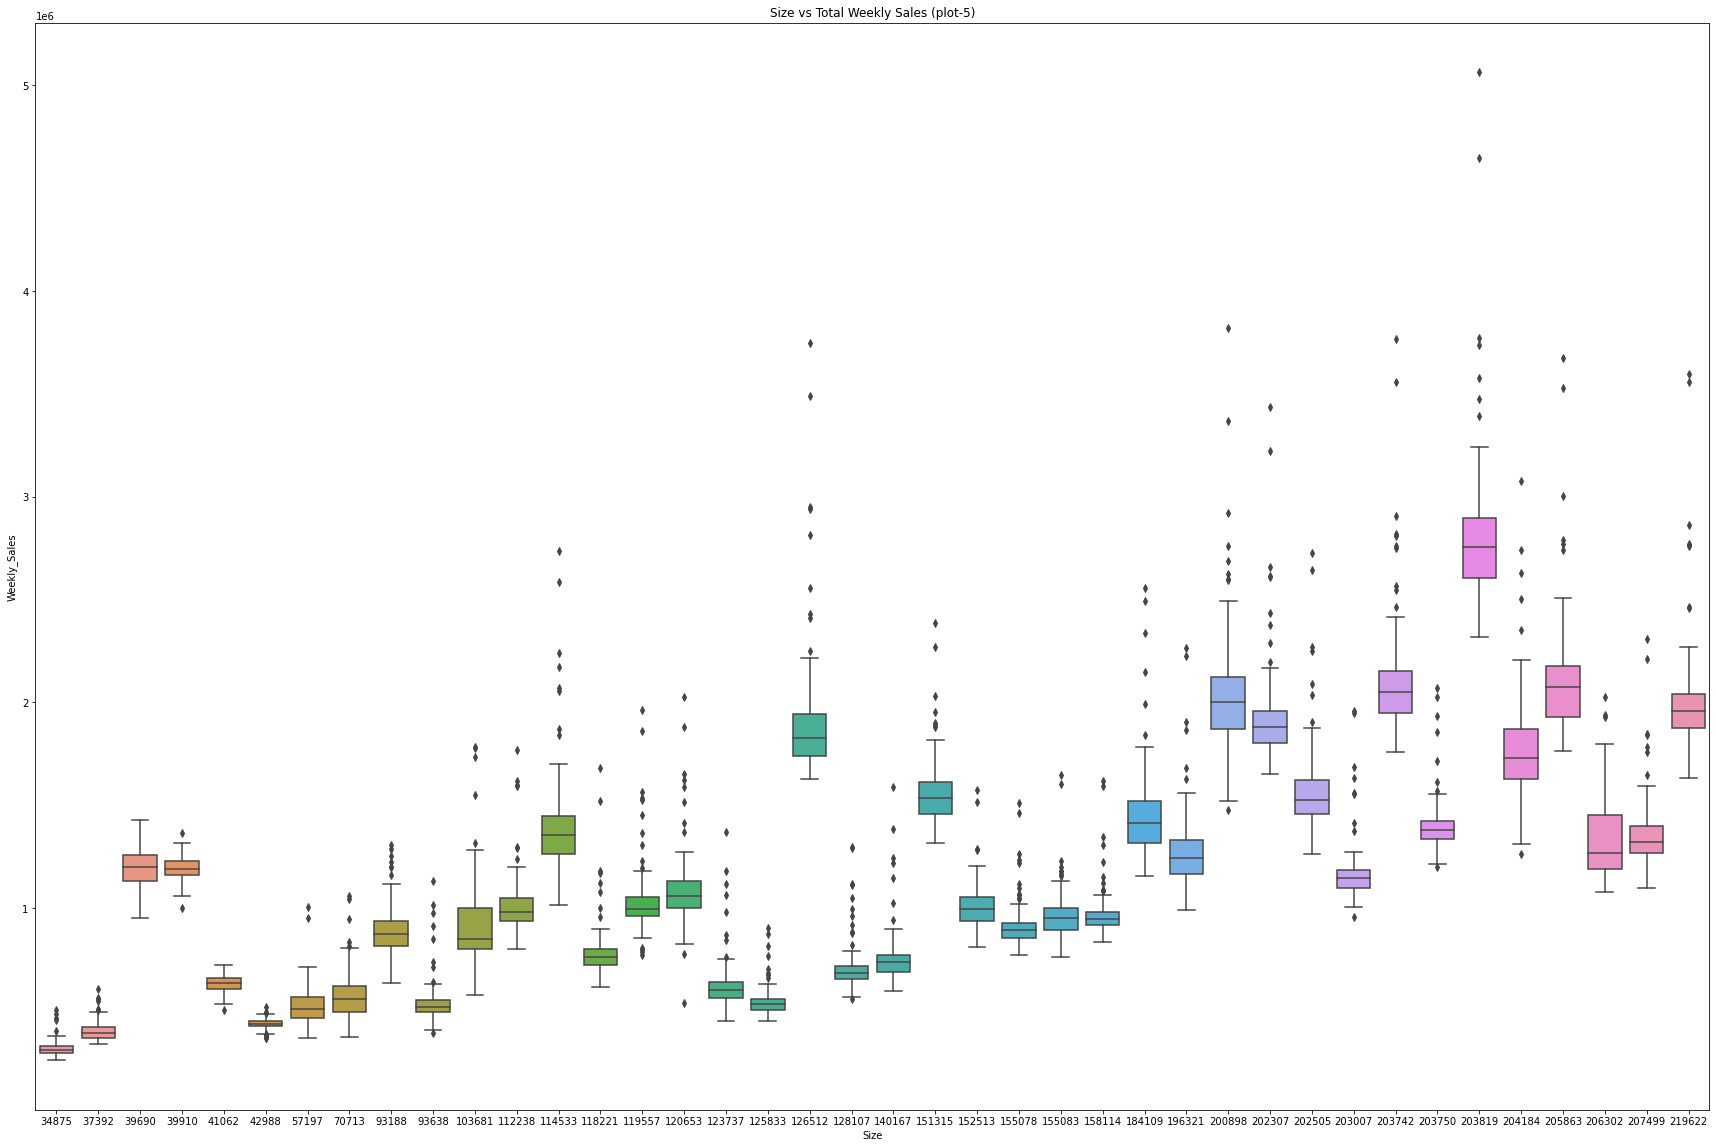

In [733]:
# grouping data by Size and isholiday and box plotting type vs weekly Sales with hue as Isholiday
df1 = df.groupby(['Size','Date'])['Weekly_Sales'].sum().reset_index()
plt.figure(figsize=(30,20))
sns.boxplot(x=df1['Size'], y=df1['Weekly_Sales'])
plt.title('Size vs Total Weekly Sales (plot-5)')
plt.show()

###### Observation:
    1. From plot-1, median of Weekly sales for most of the size is more in holidays than non-holidays. 
    2. From plot-2, average weekly sales is high more when holiday weeks.
    3. From plot-3&4, after grouping dataset by size and isholiday we can observe that weekly sales for all 
    sizes of stores have medians of weekly sales in different zones and gaussian distributed weekly sales.
    4. From plot-5, after grouping dataset by size and isholiday we can observe that weekly sales for all 
    sizes of stores have medians of weekly sales is very different.